# Метрики

**CLIP-I** - среднее попарное косинусное сходство между сгенерированными и настоящими картинкой в латентном пространстве эмбеддингов модели CLIP

**CLIP-T** - среднее косинусное сходство между сгенерированными картинками и базовым промптом в пространстве модели CLIP

**G-R** - среднее косинусное сходство между сгенерированными картинками и контекстными промптами в пространстве модели CLIP

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd
import numpy as np

sns.set_theme(style="whitegrid", palette=sns.color_palette("Set2"))

In [22]:
# Load the example diamonds dataset
data = pd.read_excel('metrics_lora.xlsx')

def label_point_c(x, y, rank, checkpoint, ax):
    a = pd.concat({'x': x, 'y': y, 'rank': rank, 'checkpoint': checkpoint}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], f"rank {point['rank']} cpt {point['checkpoint']}")

def label_point(x, y, rank, ax):
    a = pd.concat({'x': x, 'y': y, 'rank': rank}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], f"{str(int(point['rank']))}")

data['Concept-Checkpoint'] = data["Concept"] + "-" + data["Checkpoint"].astype(str)
data['CLIP-I'] = data['CLIP-I'].astype(float)
data['CLIP-T'] = data['CLIP-T'].astype(float)
data['G-R'] = data['G-R'].astype(float)
data['Rank'] = data['Rank'].astype(int)
data.head()

Concept  Rank    CLIP-T    CLIP-I       G-R Method  Checkpoint  \
0       dog     4  0.258453  0.935770  0.849218   LoRA         500   
1  backpack     4  0.243433  0.902074  0.845222   LoRA         500   
2       cat     4  0.238631  0.940667  0.902354   LoRA         500   
3       dog     4  0.247694  0.932003  0.872276   LoRA        1000   
4  backpack     4  0.236736  0.891832  0.857880   LoRA        1000   

  Concept-Checkpoint  
0            dog-500  
1       backpack-500  
2            cat-500  
3           dog-1000  
4      backpack-1000

## Все концепты

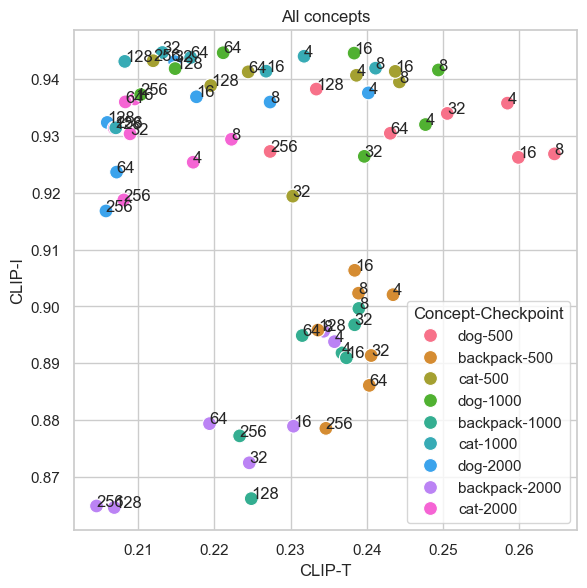

In [23]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.scatterplot(x="CLIP-T", y="CLIP-I",
                hue="Concept-Checkpoint",
                data=data, ax=ax,
                s=100).set(title='All concepts')

label_point(data["CLIP-T"], data["CLIP-I"], data["Rank"], plt.gca())

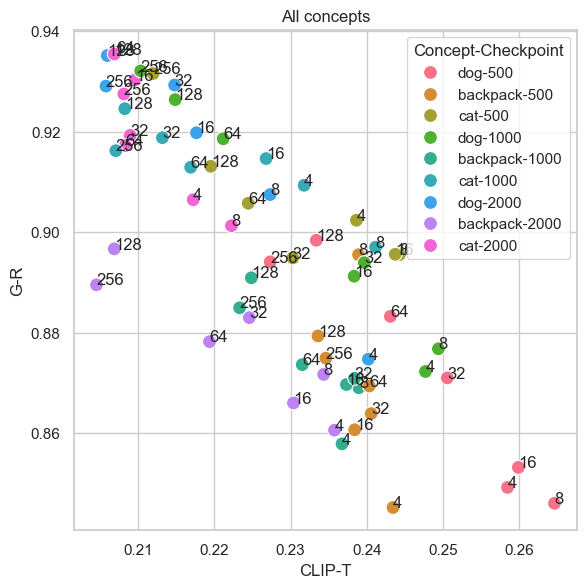

In [24]:
f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.scatterplot(x="CLIP-T", y="G-R",
                hue="Concept-Checkpoint",
                data=data, ax=ax,
                s=100).set(title='All concepts')

label_point(data["CLIP-T"], data["G-R"], data["Rank"], plt.gca())

## Отдельно по концептам

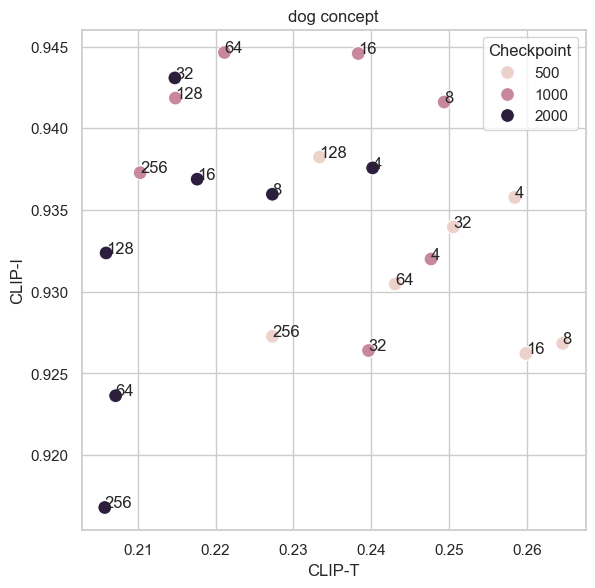

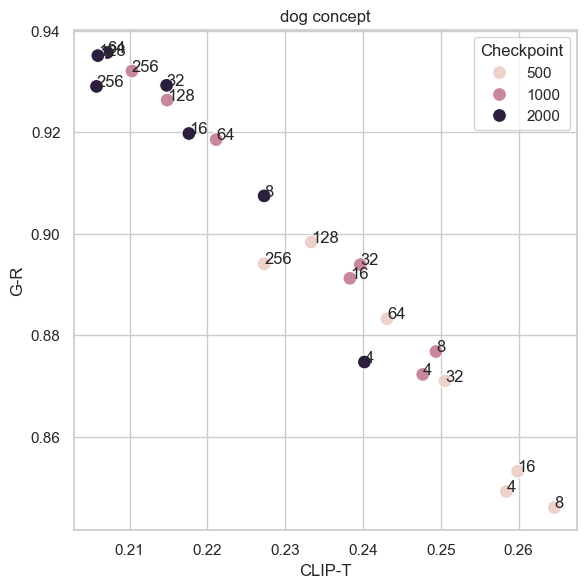

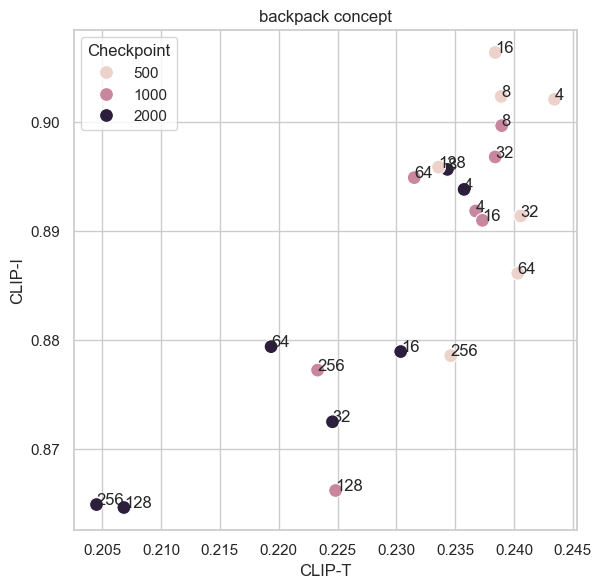

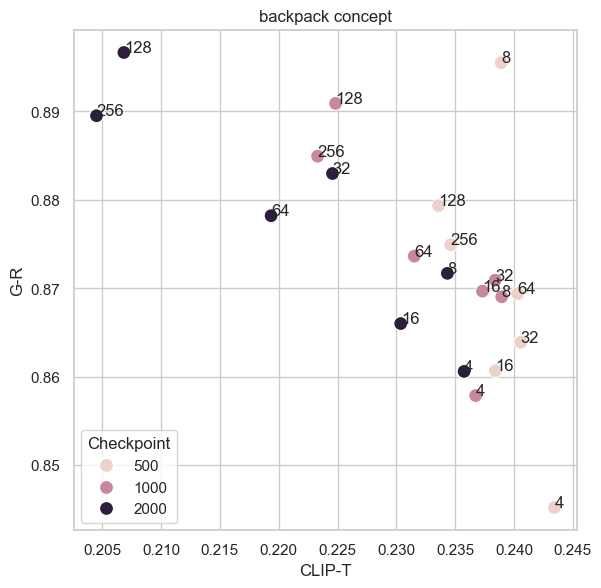

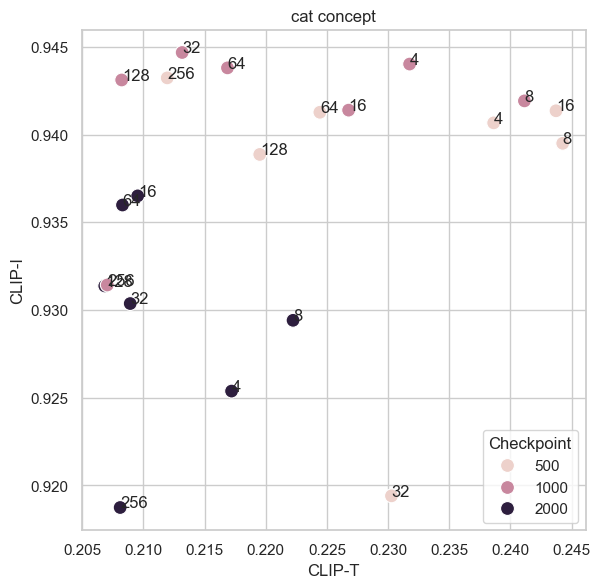

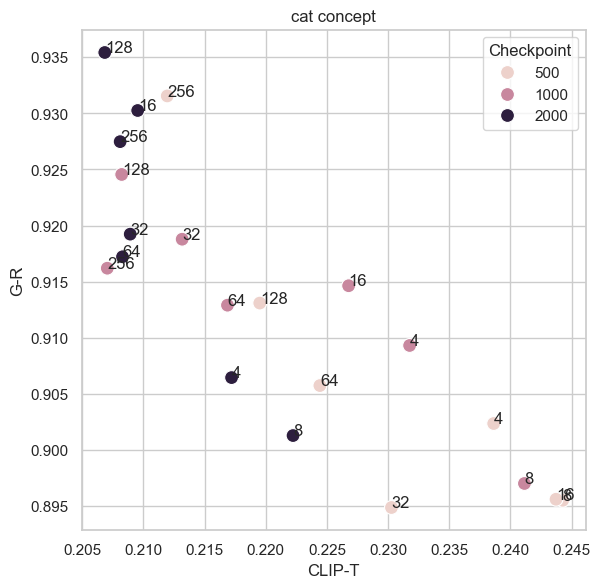

In [25]:
for concept in data["Concept"].unique():
    f, ax = plt.subplots(figsize=(6.5, 6.5))
    
    concept_data = data[data["Concept"] == concept]
    sns.scatterplot(x="CLIP-T", y="CLIP-I",
                data=concept_data, ax=ax,
                hue="Checkpoint",
                s=100).set(title=f'{concept} concept')
    label_point(concept_data["CLIP-T"], concept_data["CLIP-I"], concept_data["Rank"], plt.gca())

    f, ax = plt.subplots(figsize=(6.5, 6.5))
    sns.scatterplot(x="CLIP-T", y="G-R",
                data=concept_data, ax=ax,
                hue="Checkpoint",
                s=100).set(title=f'{concept} concept')
    label_point(concept_data["CLIP-T"], concept_data["G-R"], concept_data["Rank"], plt.gca())


# Примеры сгенерированных изображений

In [26]:
from glob import glob
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

from mpl_toolkits.axes_grid1 import ImageGrid

def get_examples(prompts_path):
    images_with_prompts = []
    last_prompt = ''
    for prompts_file in glob(prompts_path + '/*.txt'):
        filename, ext = os.path.basename(prompts_file).split('.')
        prompt = filename.split('_')[0]
        if prompt == last_prompt:
            continue

        n_gen_images = len(glob(f'{prompts_path}/{prompt}*.png'))
        id_image = random.randint(0, n_gen_images - 1)

        img = Image.open(f'{prompts_path}/{prompt}_{id_image}.png')
        
        images_with_prompts.append((prompt, img))
        
        last_prompt = prompt
    return images_with_prompts
    
def draw_examples(images_with_prompts):
    fig = plt.figure(figsize=(25., 25.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(5, 5),
                     axes_pad=1
                     )

    for ax, im in zip(grid, images_with_prompts):
        ax.imshow(im[1])
        ax.set_title(im[0])
        ax.grid(False)

    plt.show()

### LoRA

Concept: dog6

Rank 4 Checkpoint 500


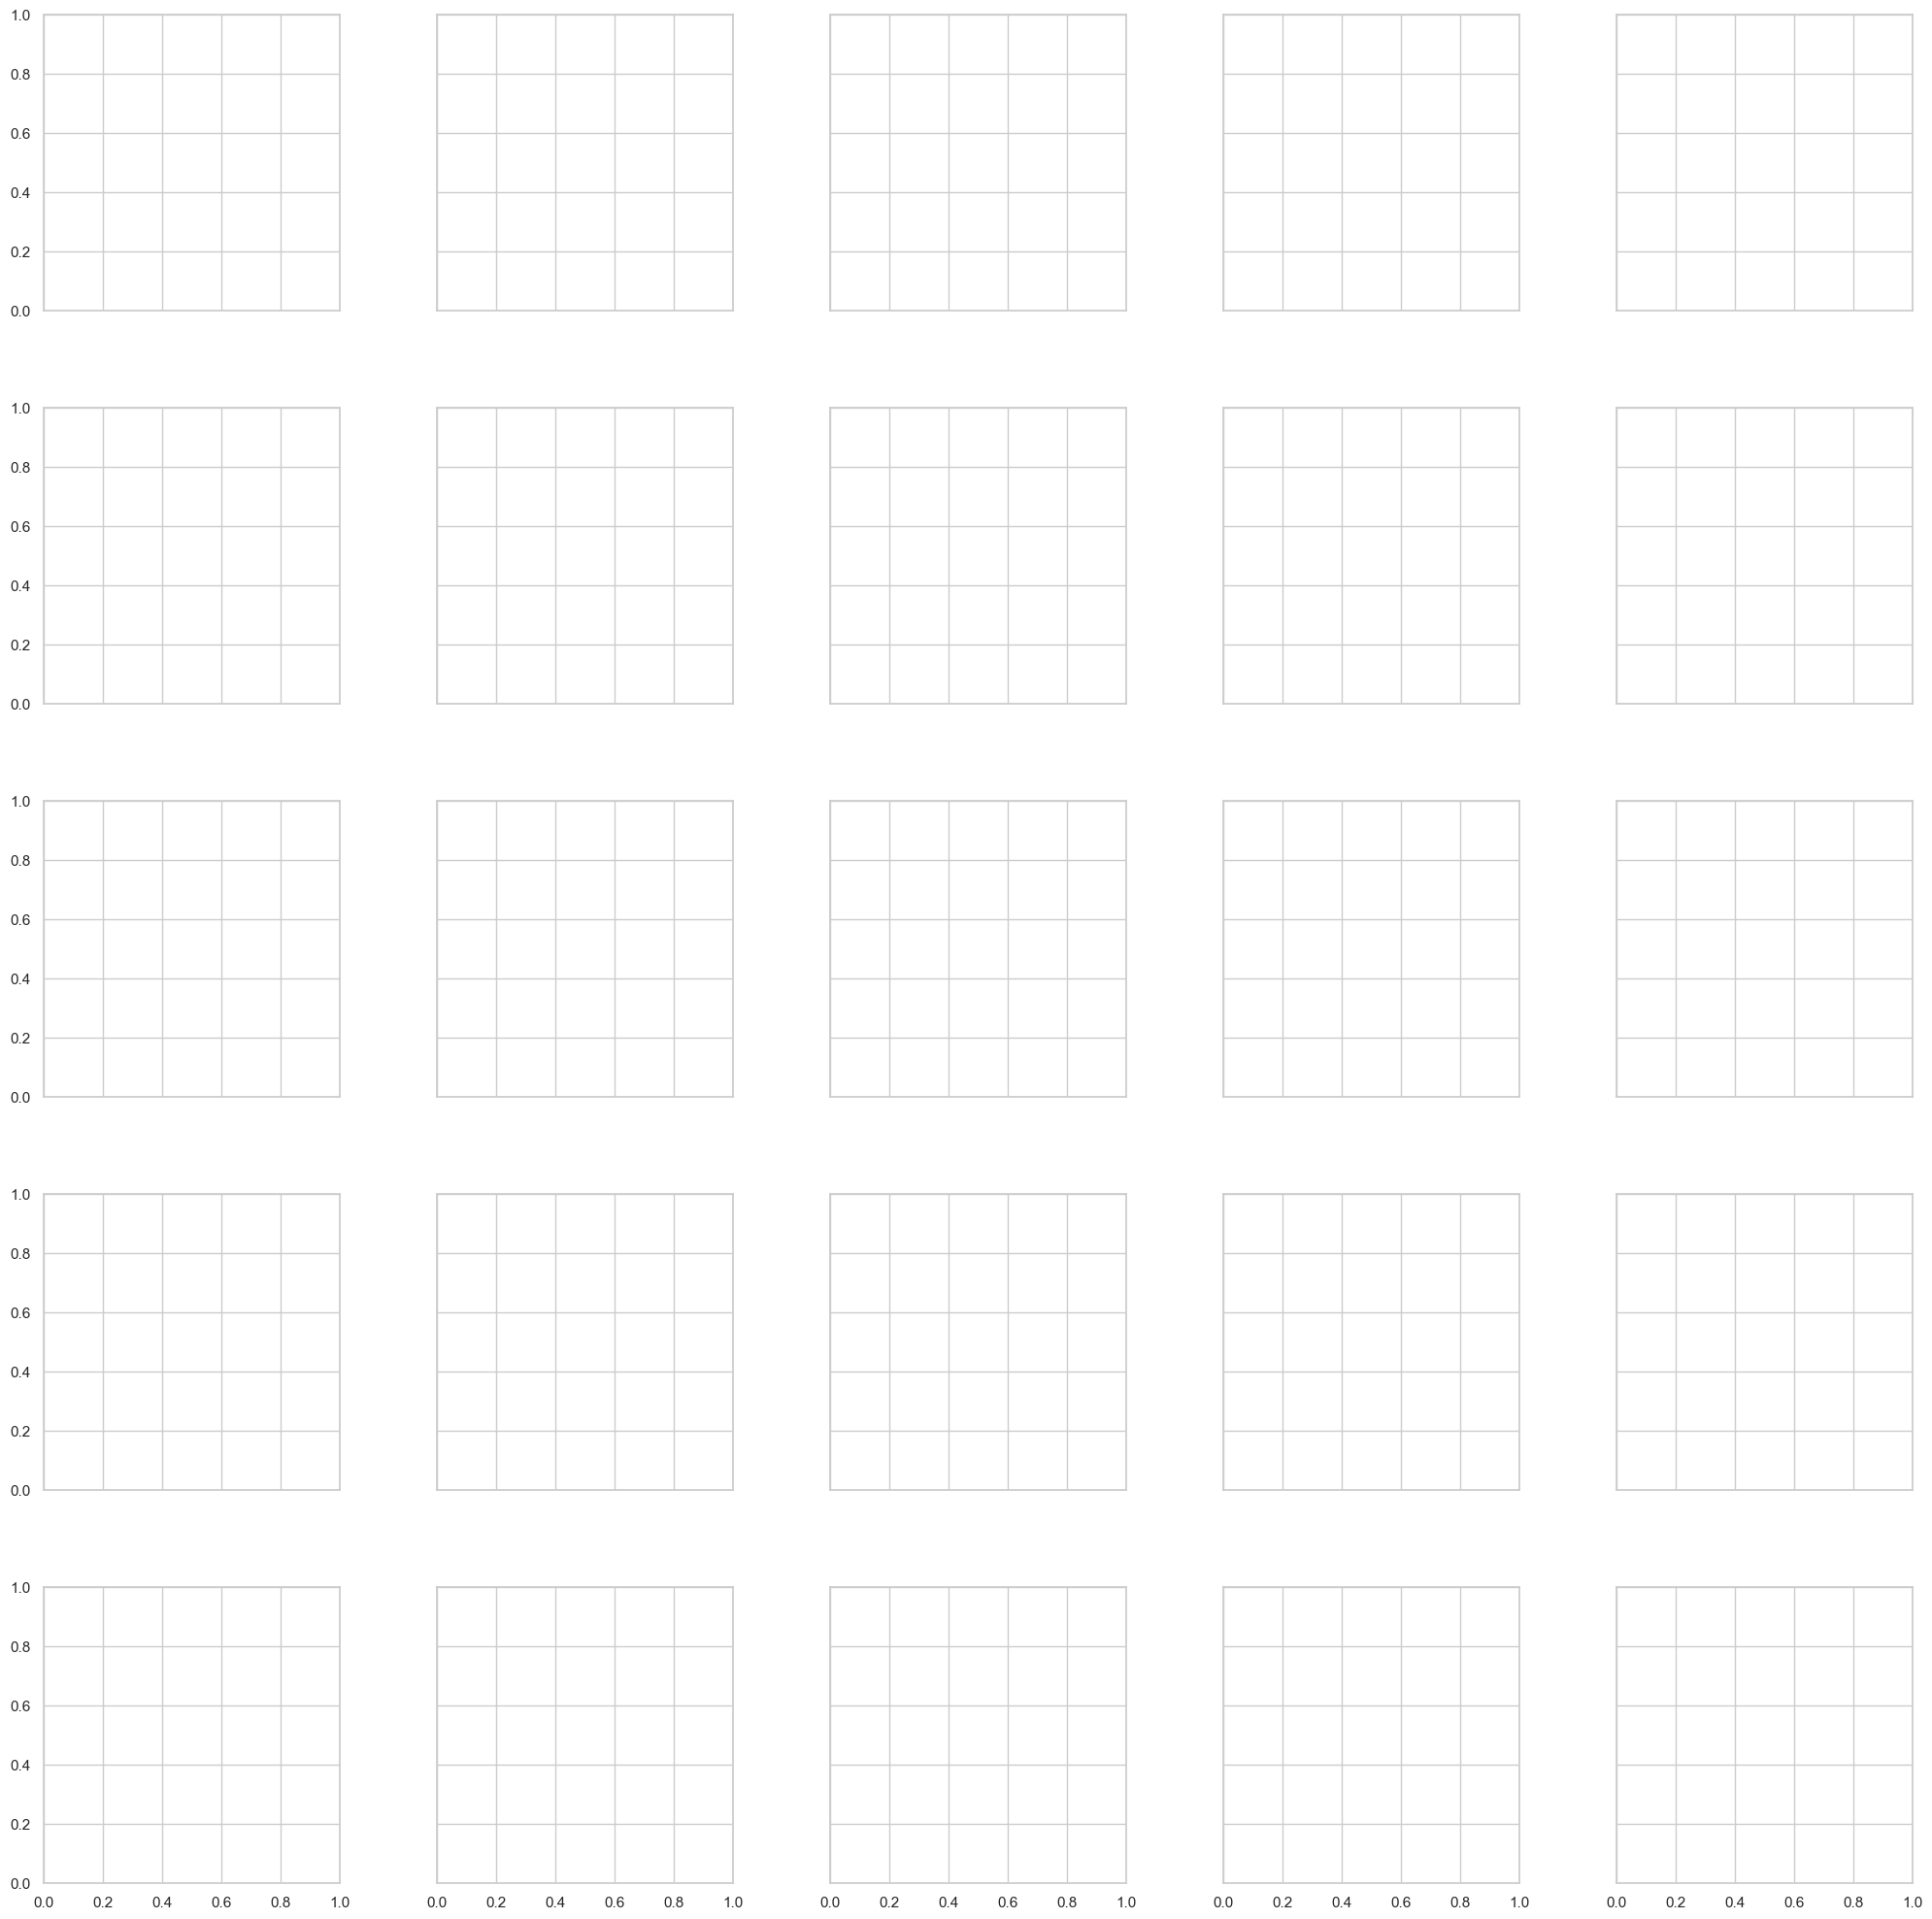

Rank 4 Checkpoint 1000


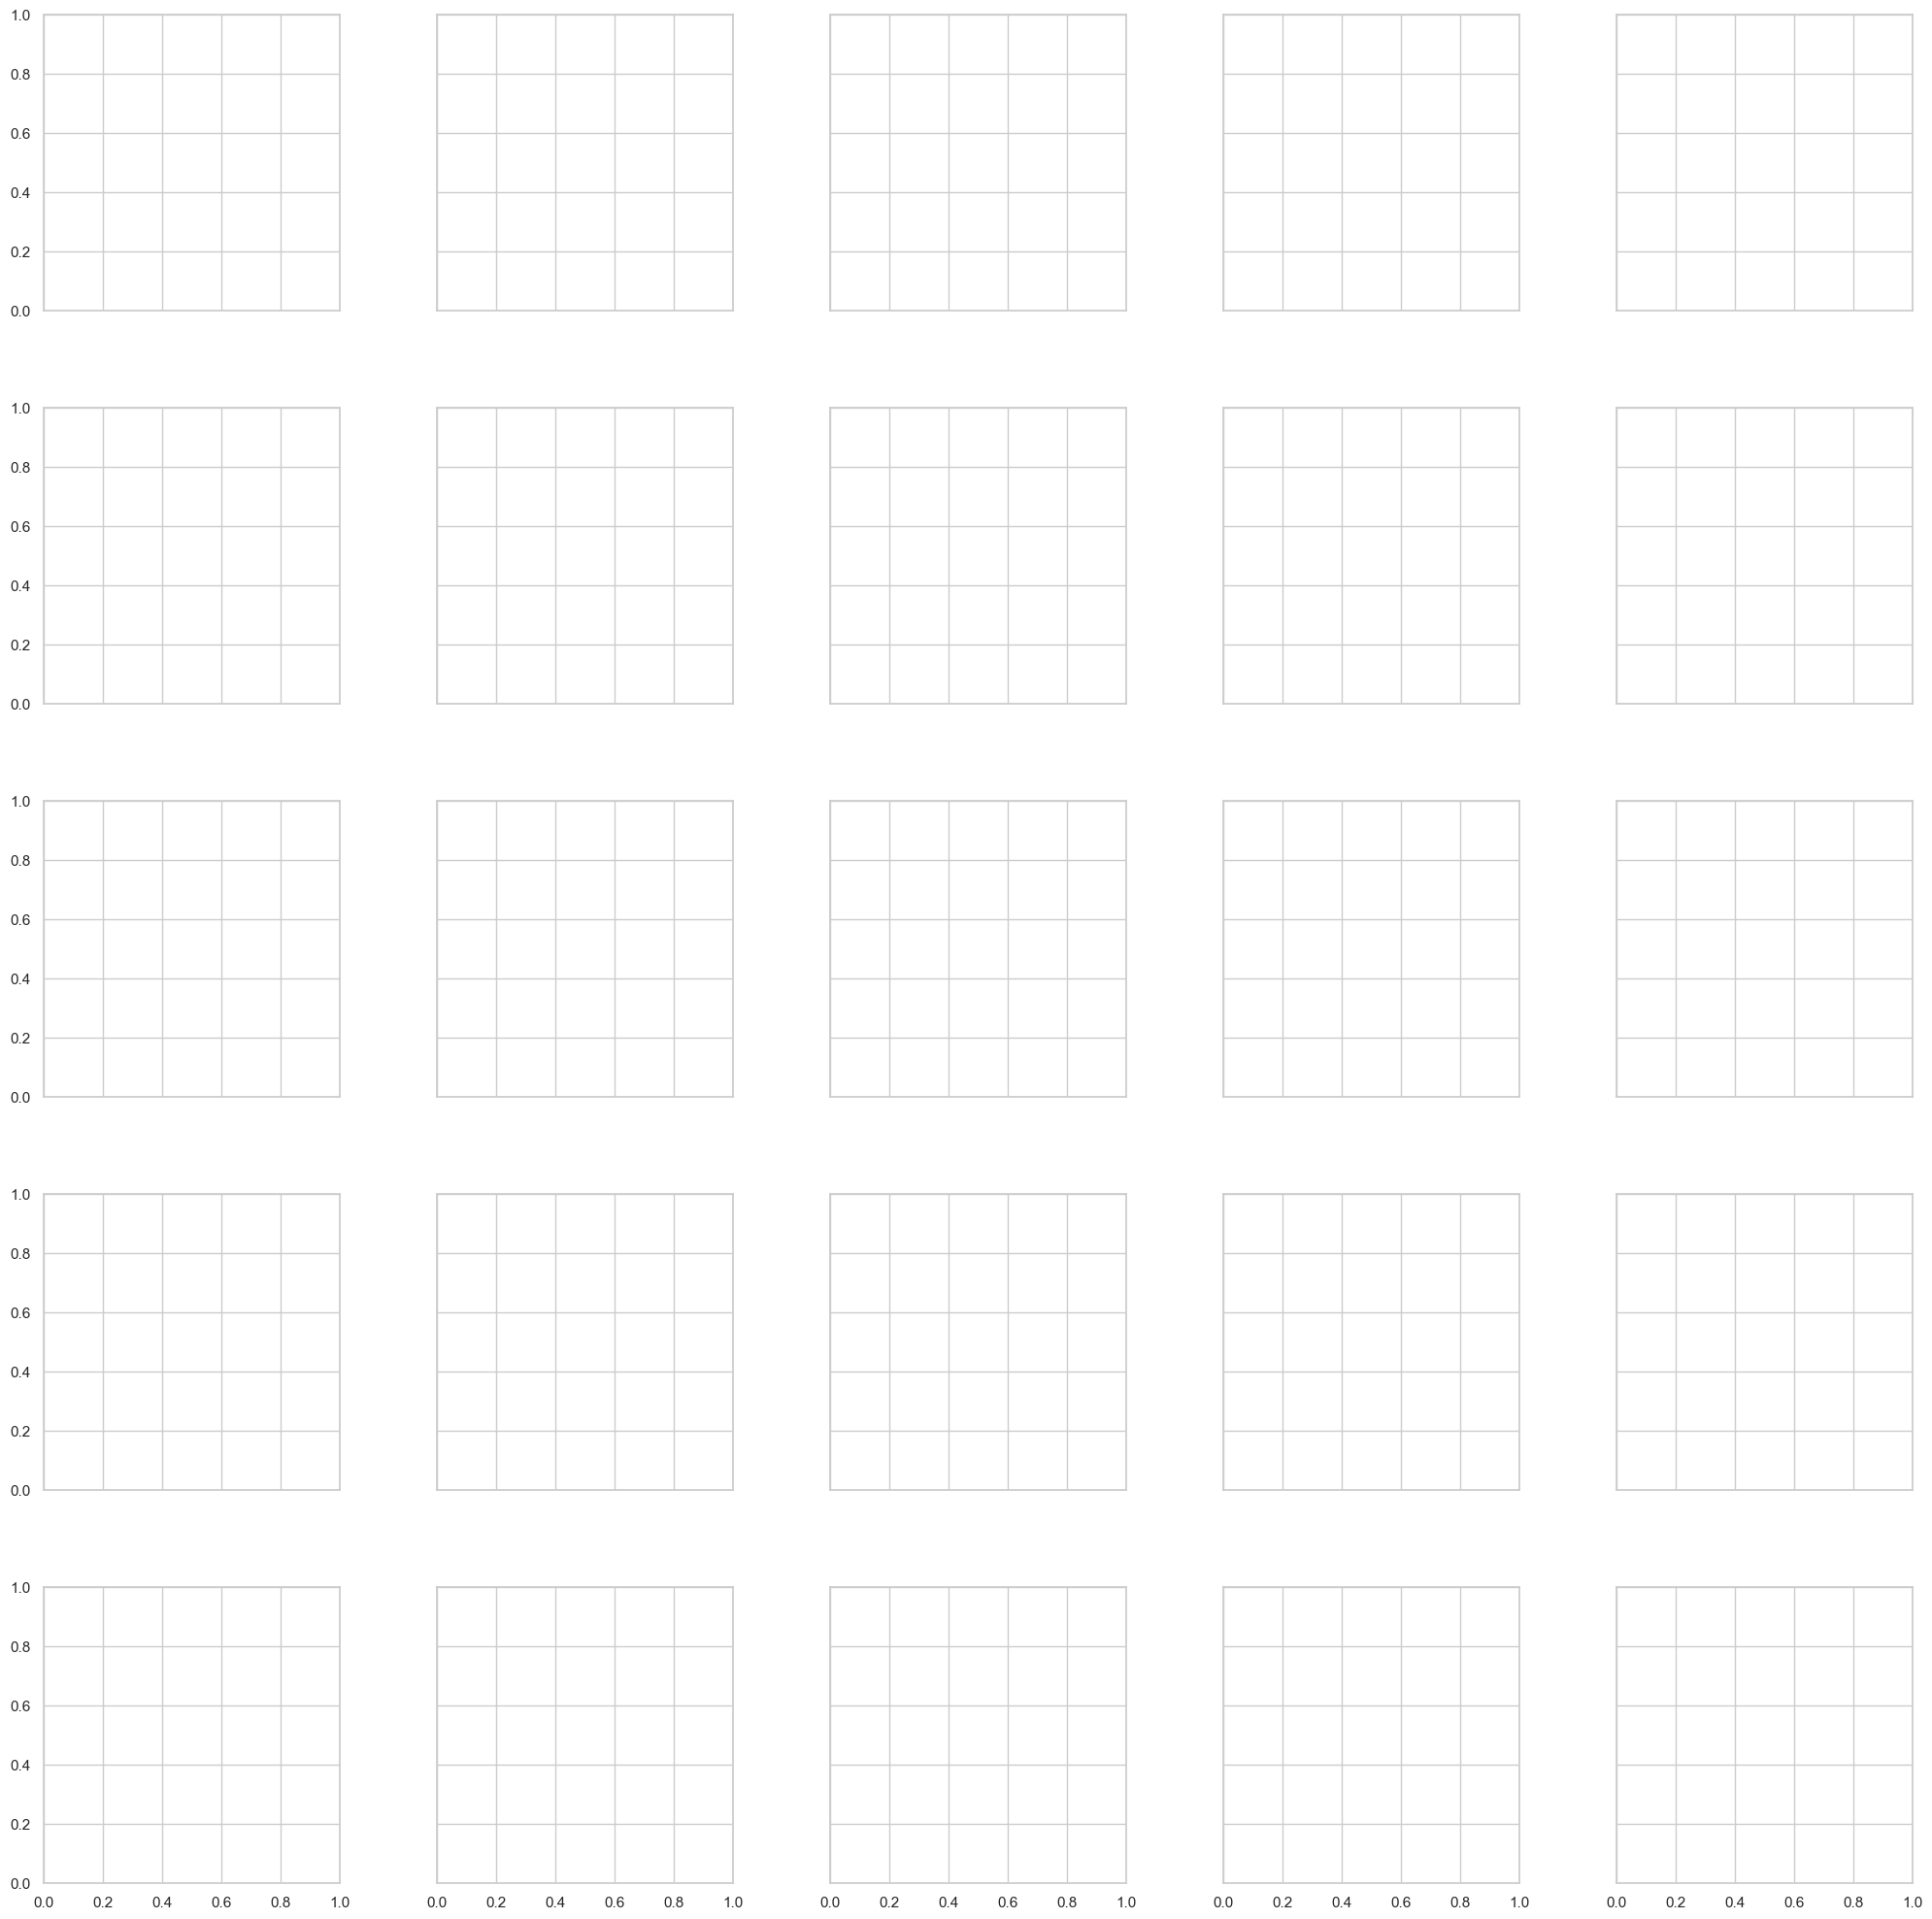

Rank 4 Checkpoint 2000


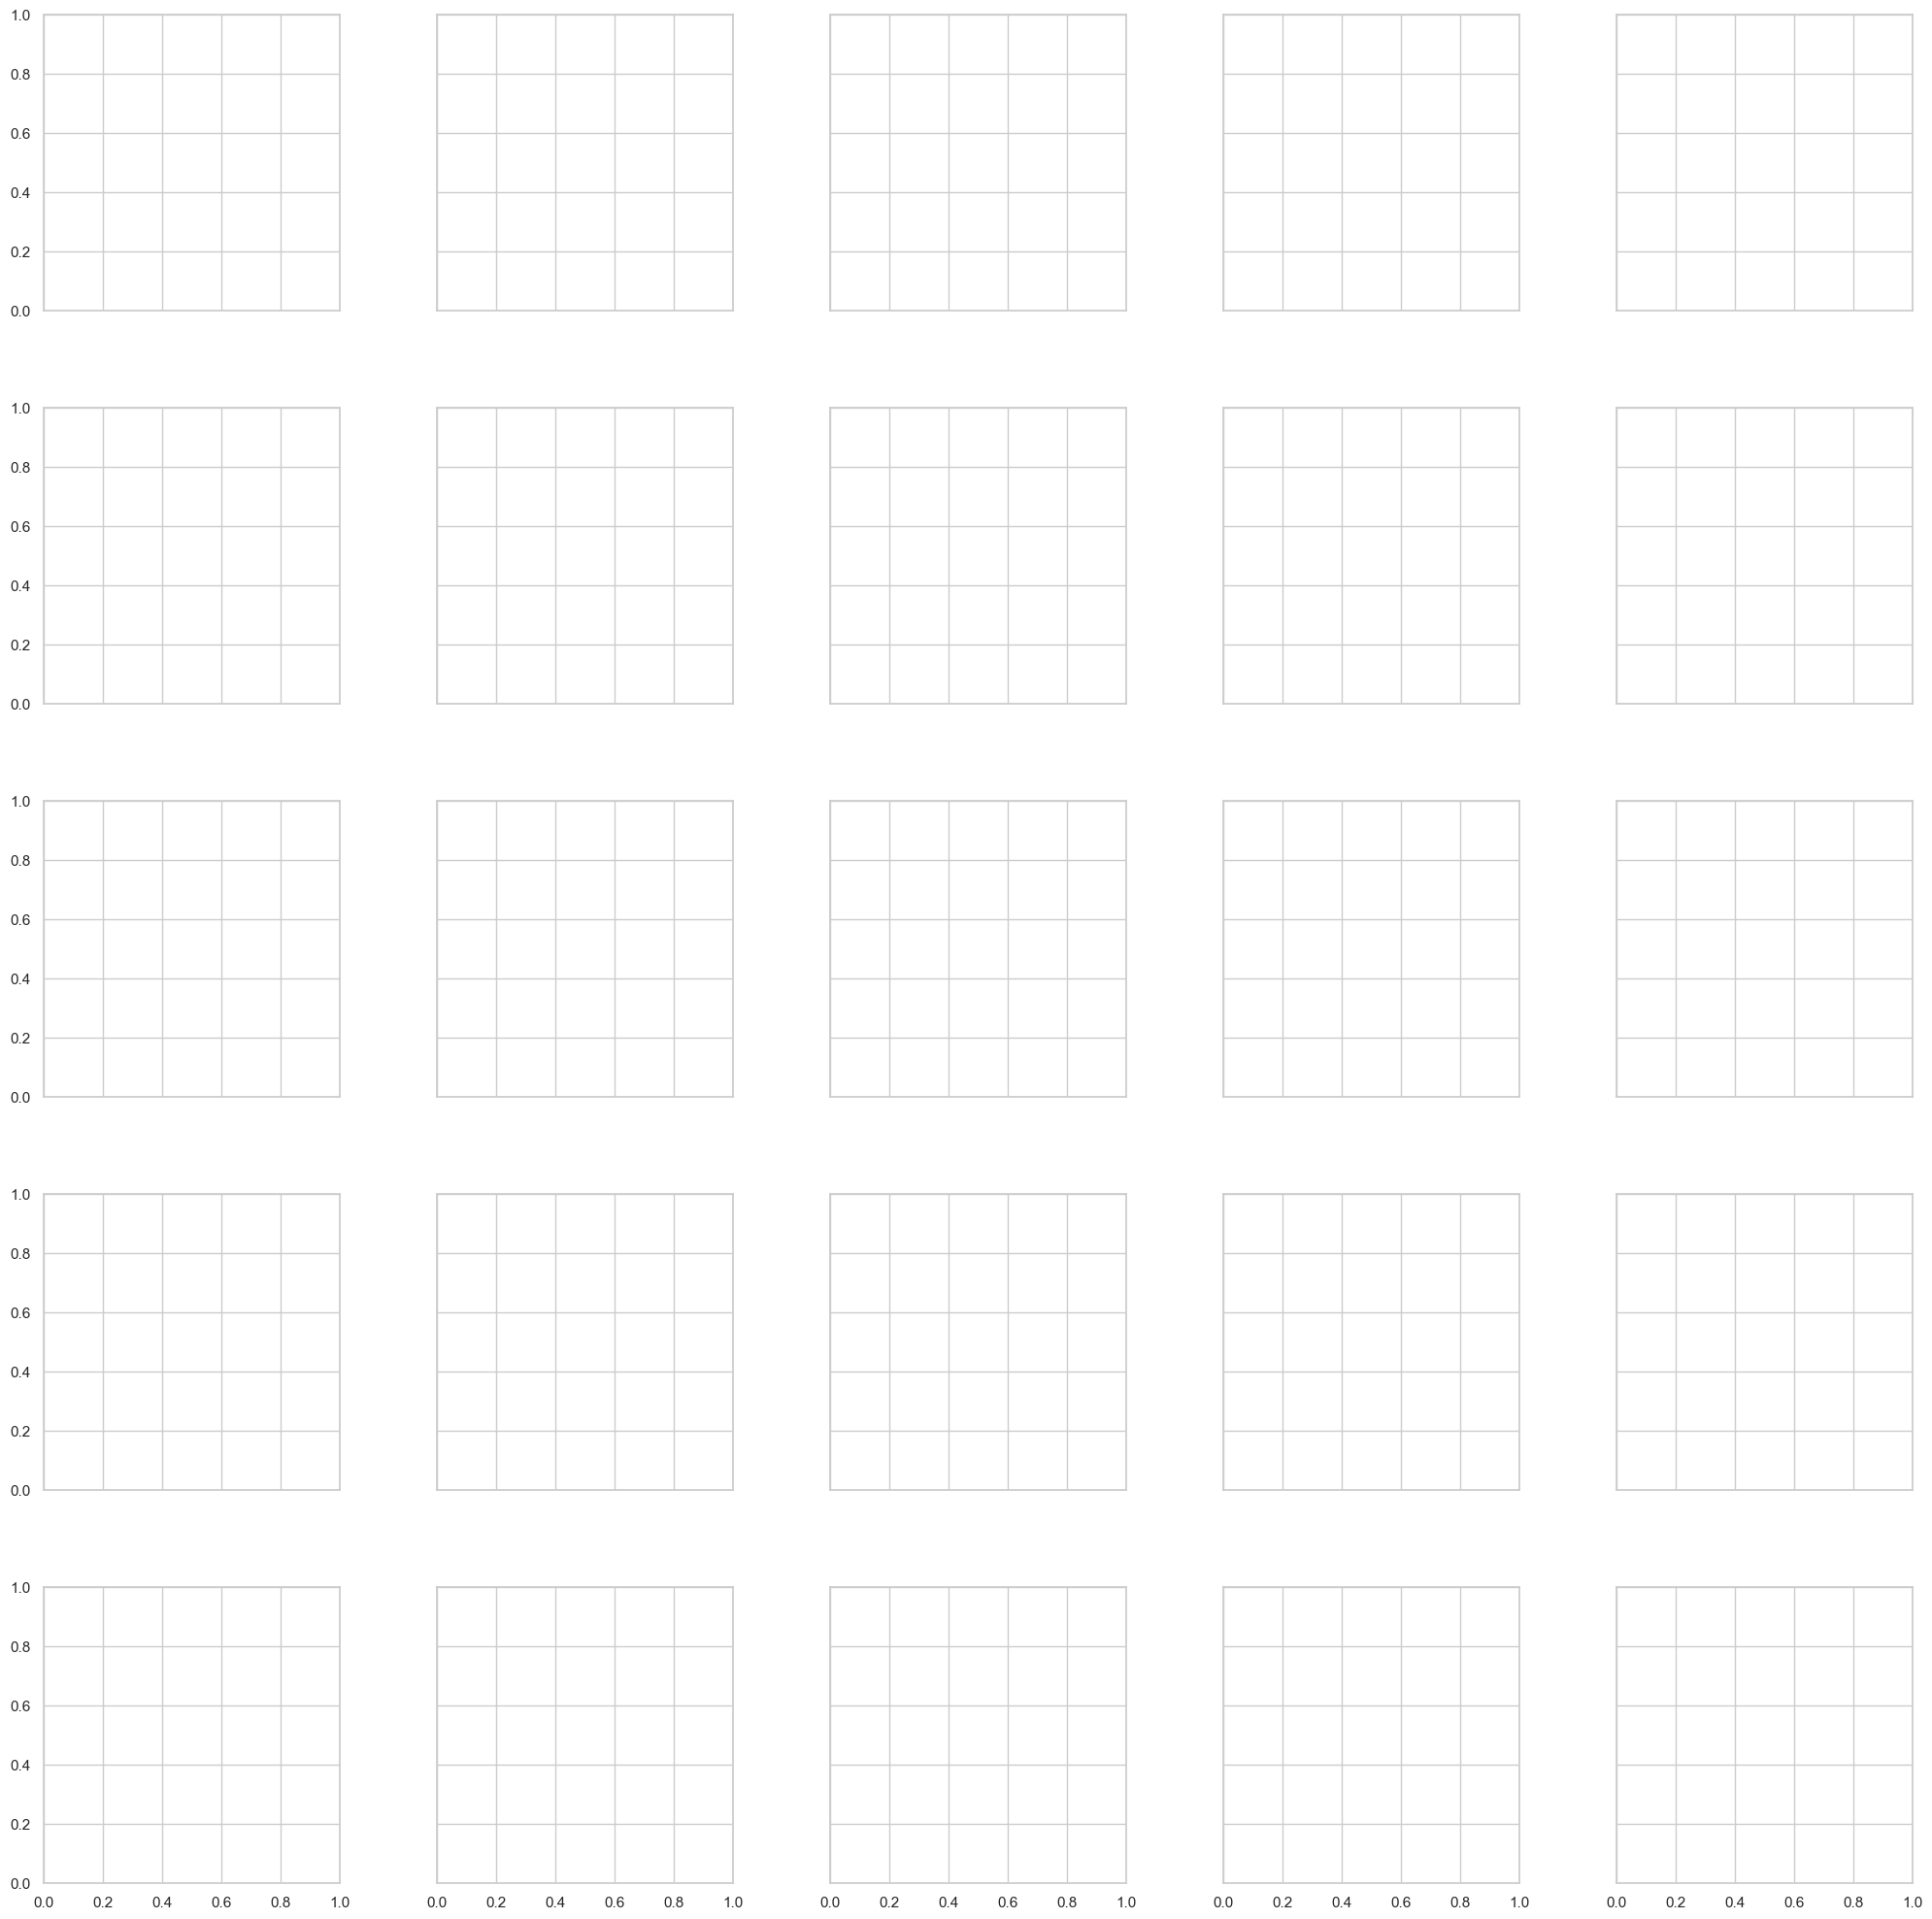

Rank 8 Checkpoint 500


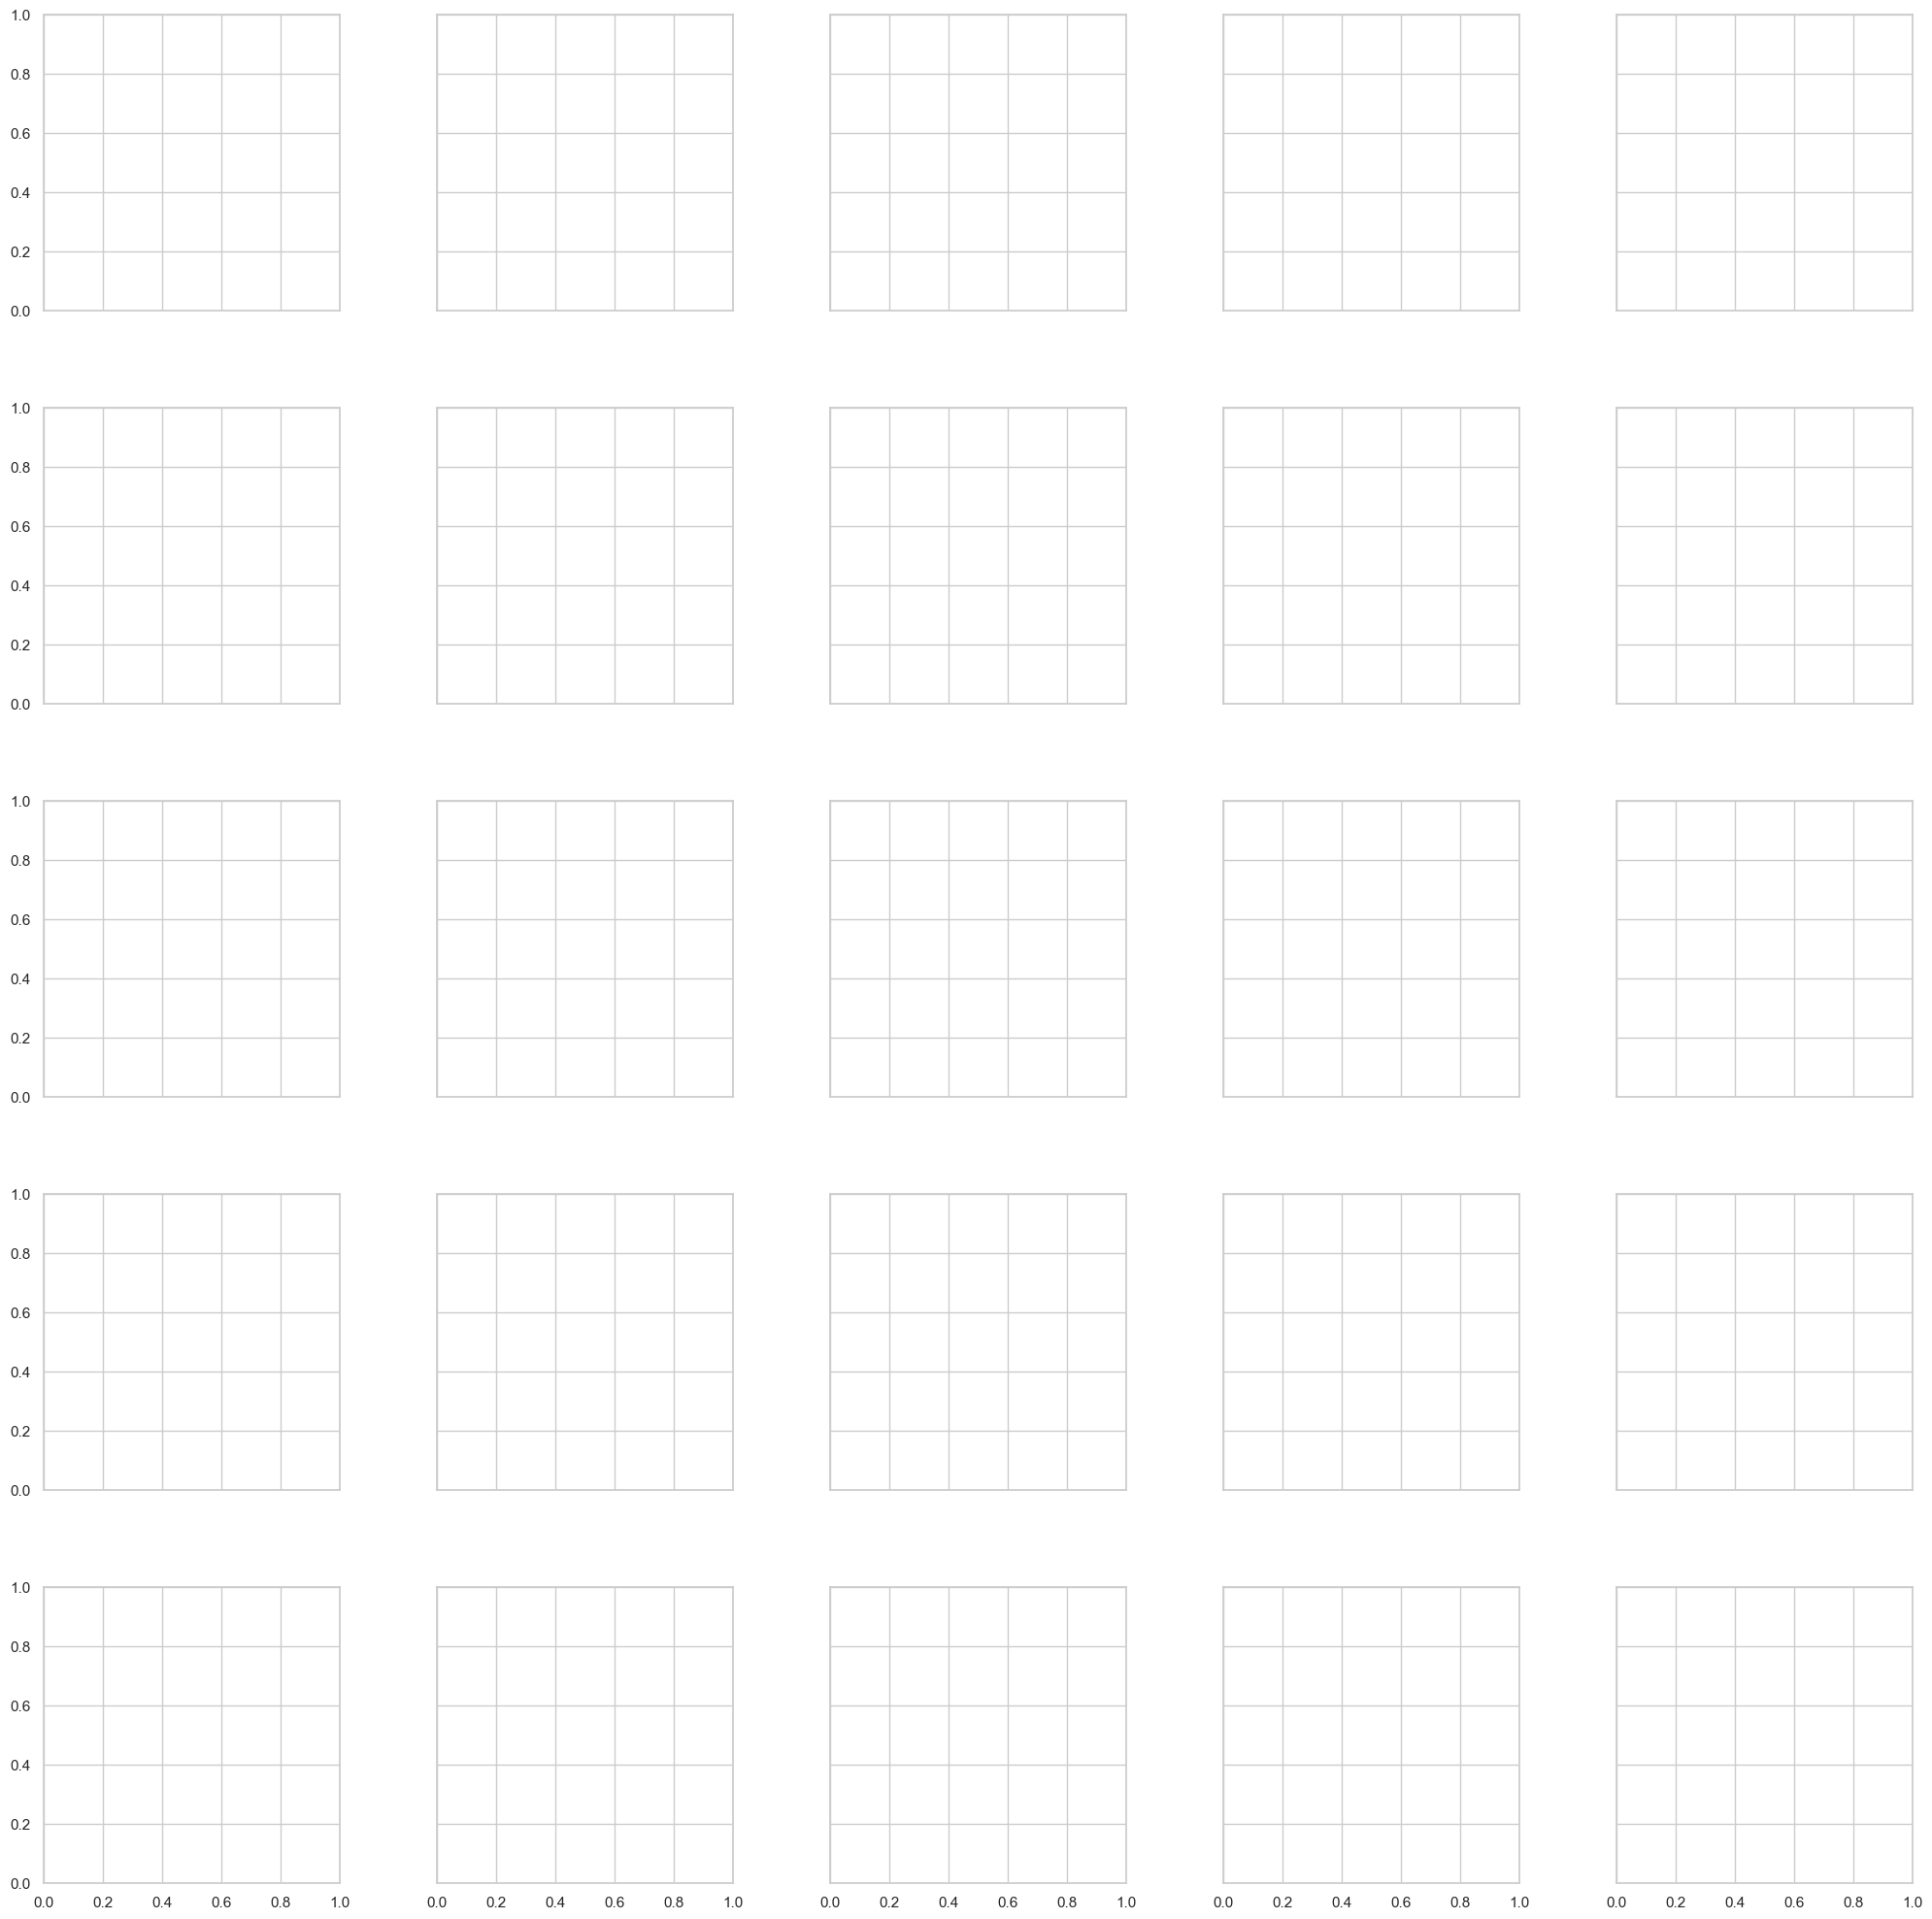

Rank 8 Checkpoint 1000


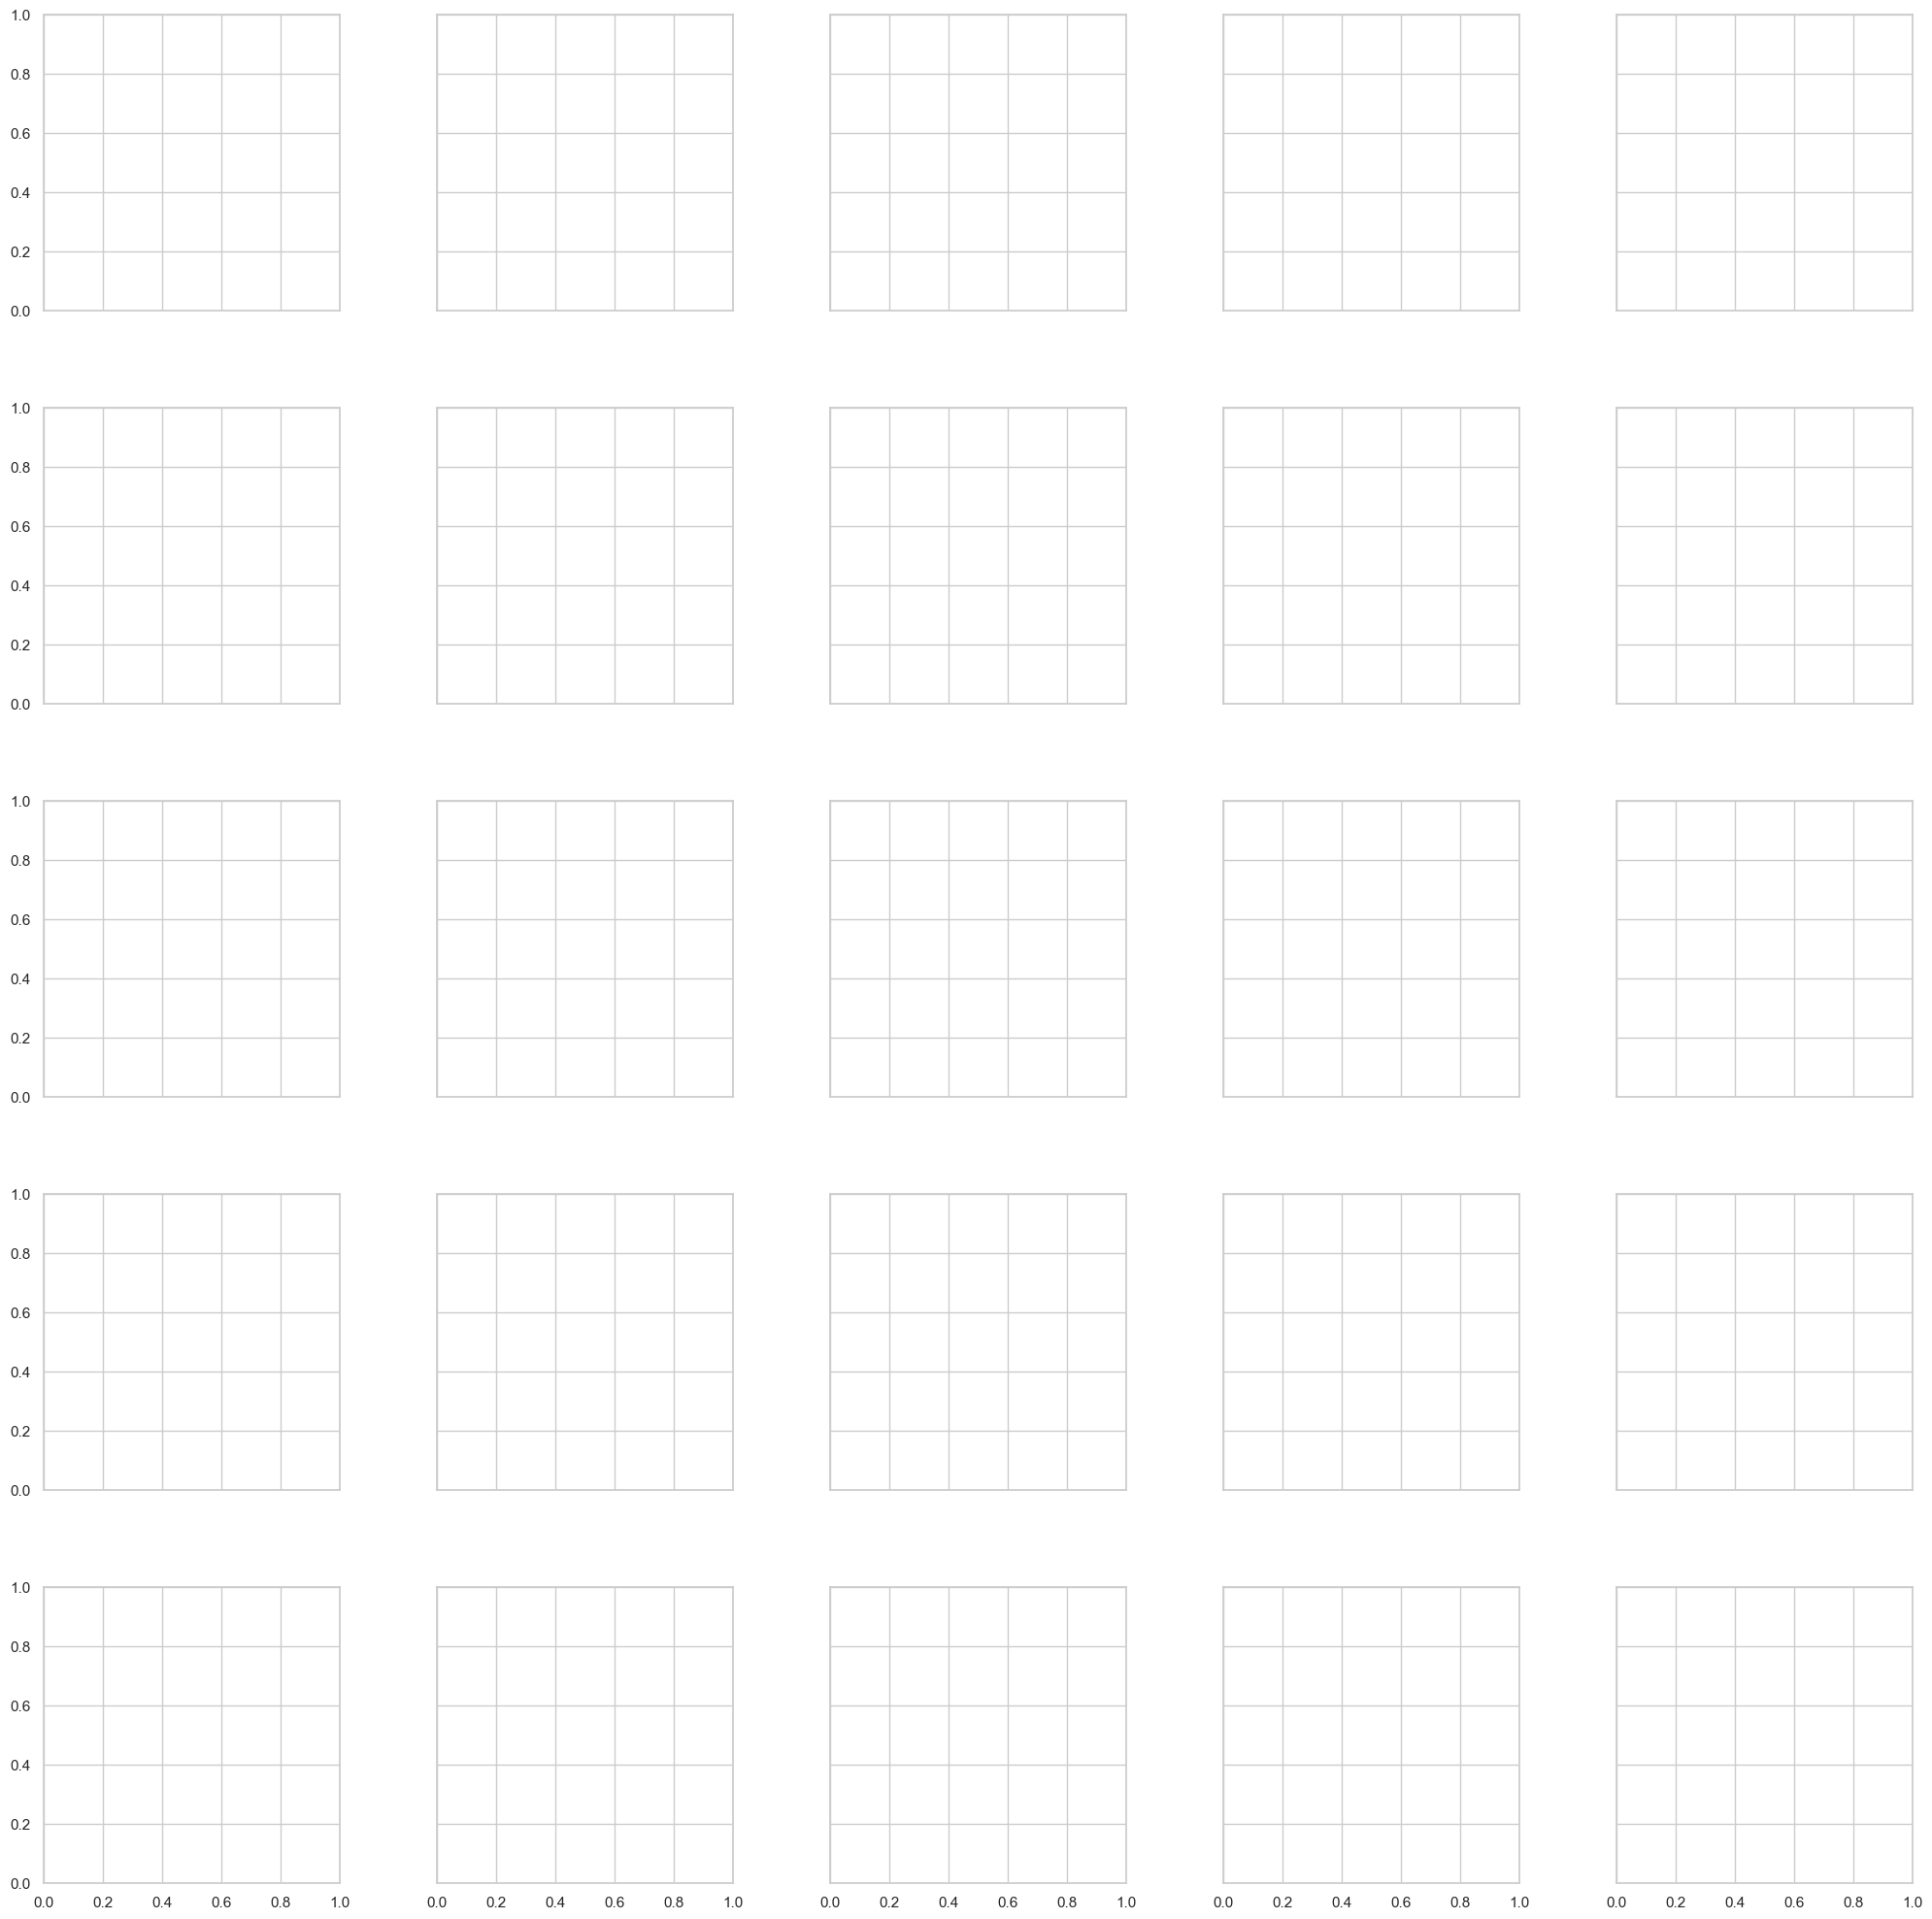

Rank 8 Checkpoint 2000


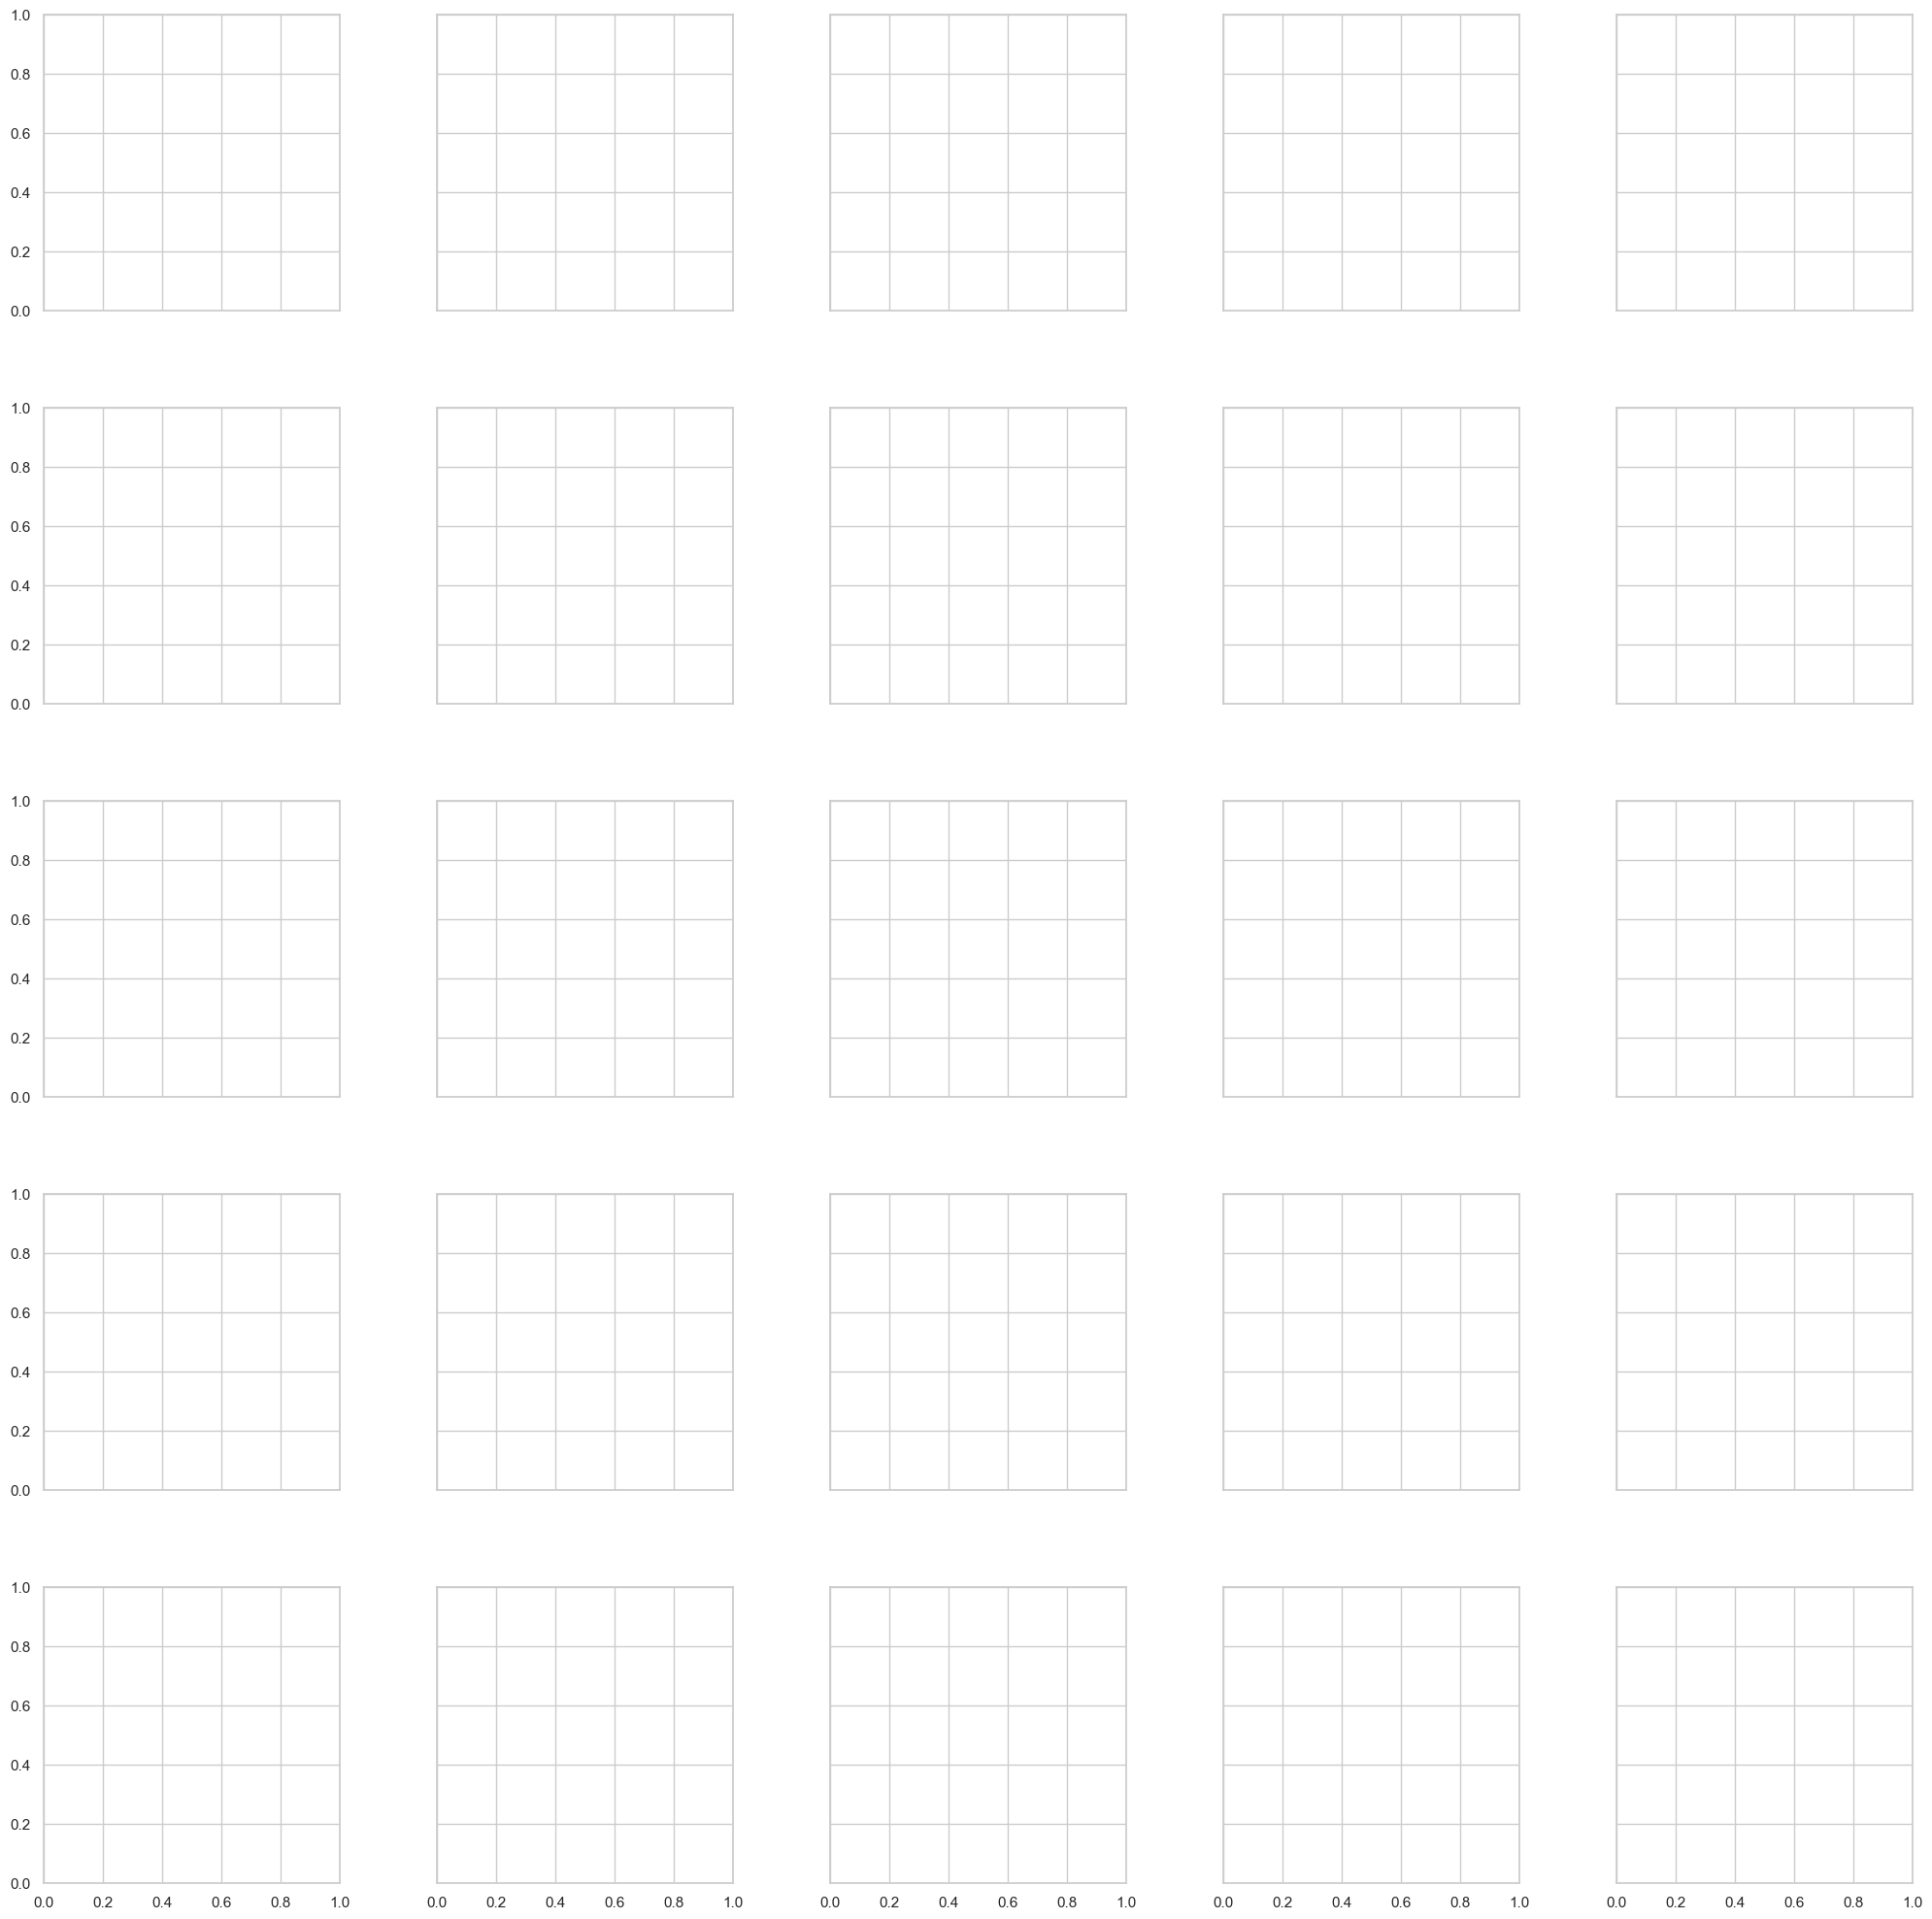

Rank 16 Checkpoint 500


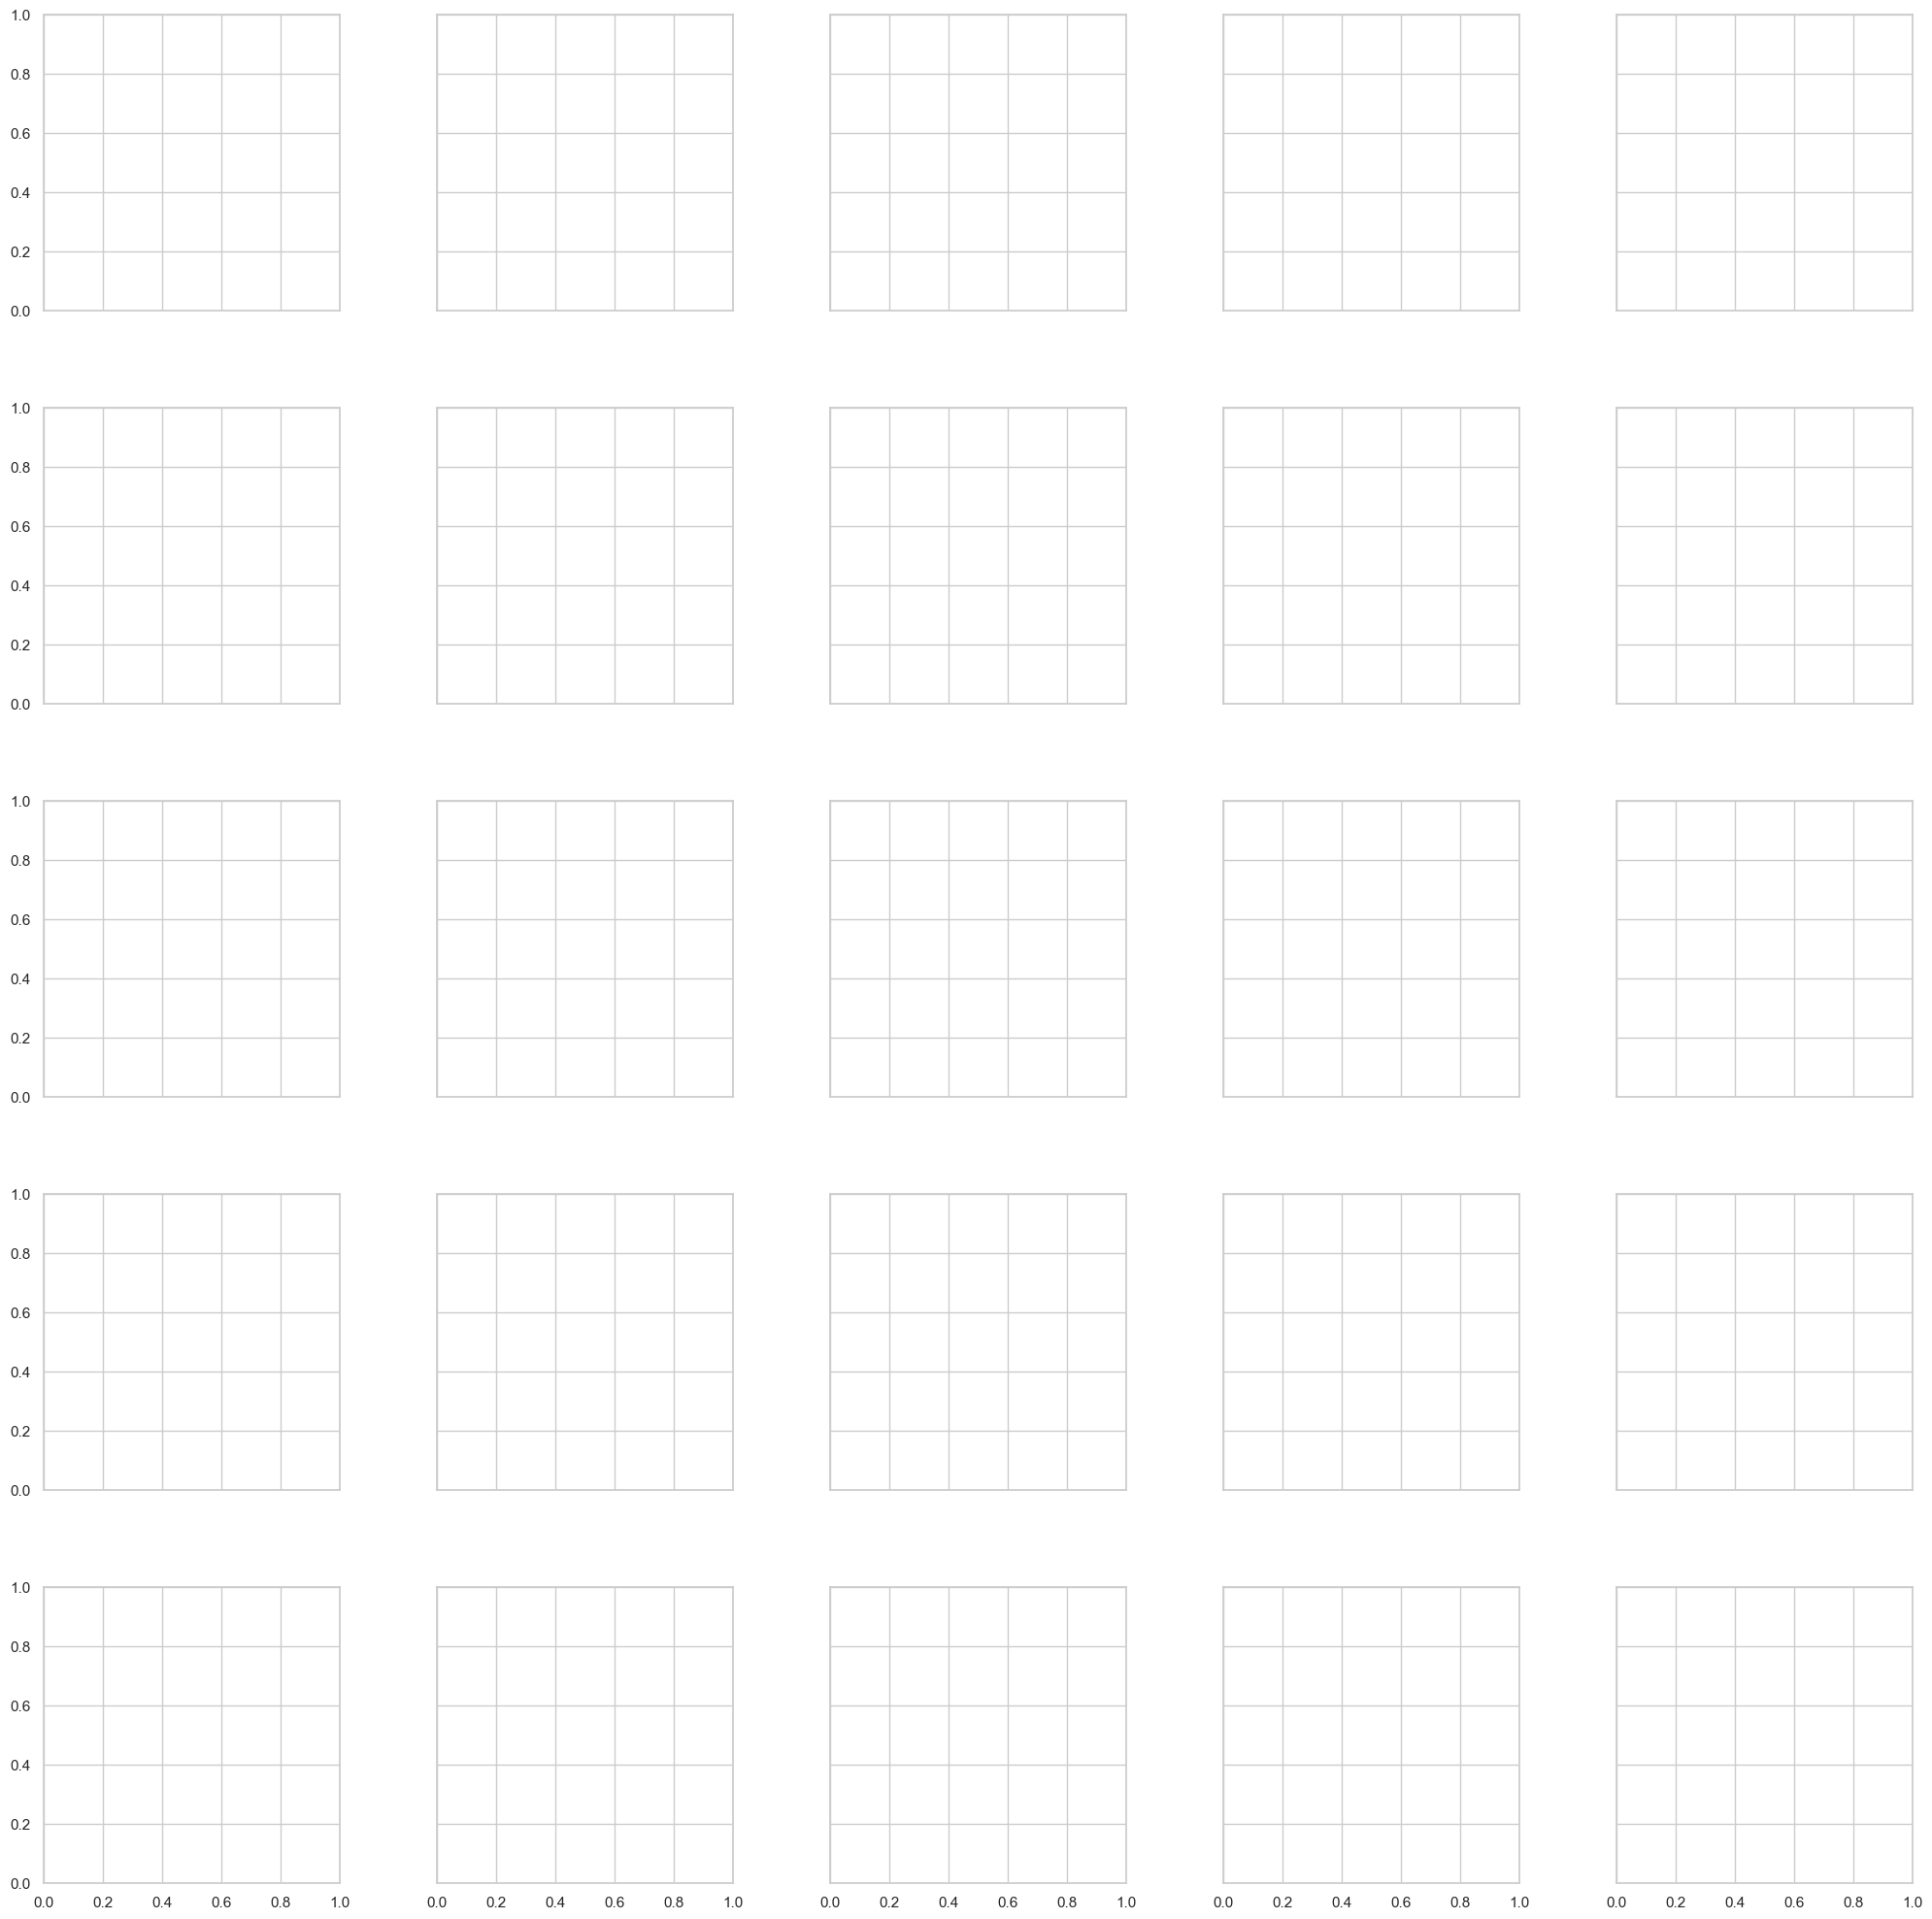

Rank 16 Checkpoint 1000


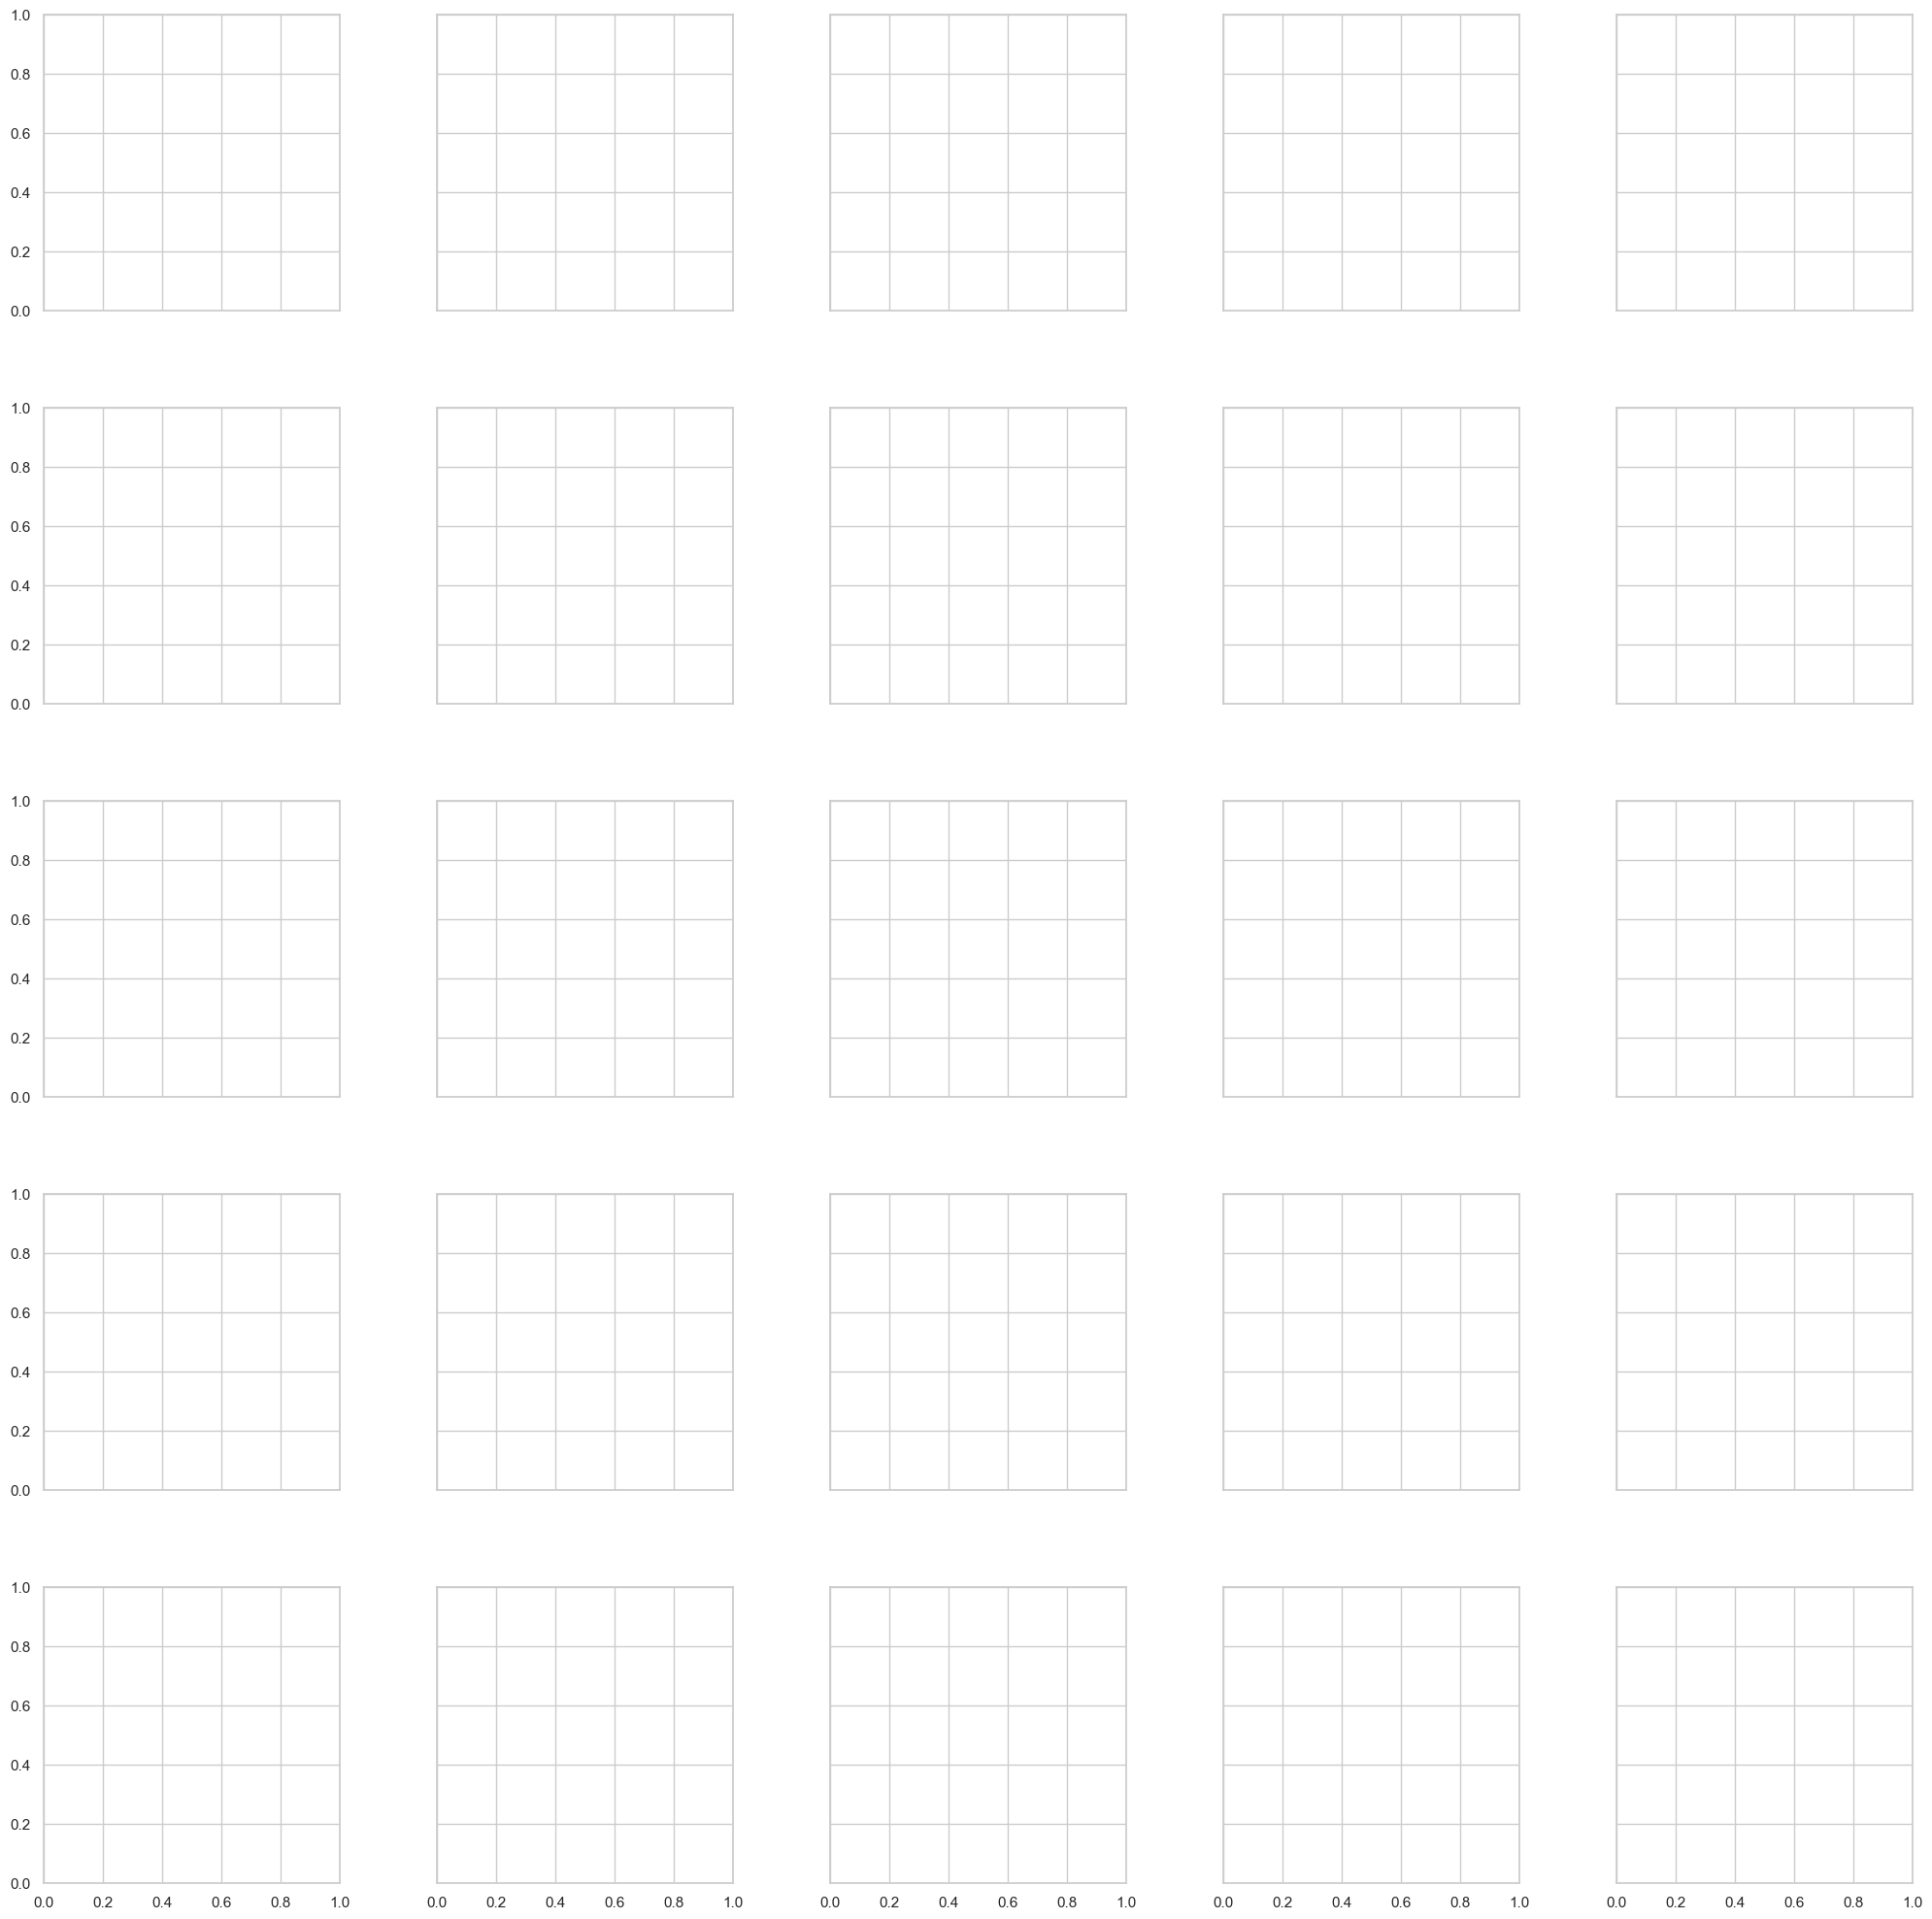

Rank 16 Checkpoint 2000


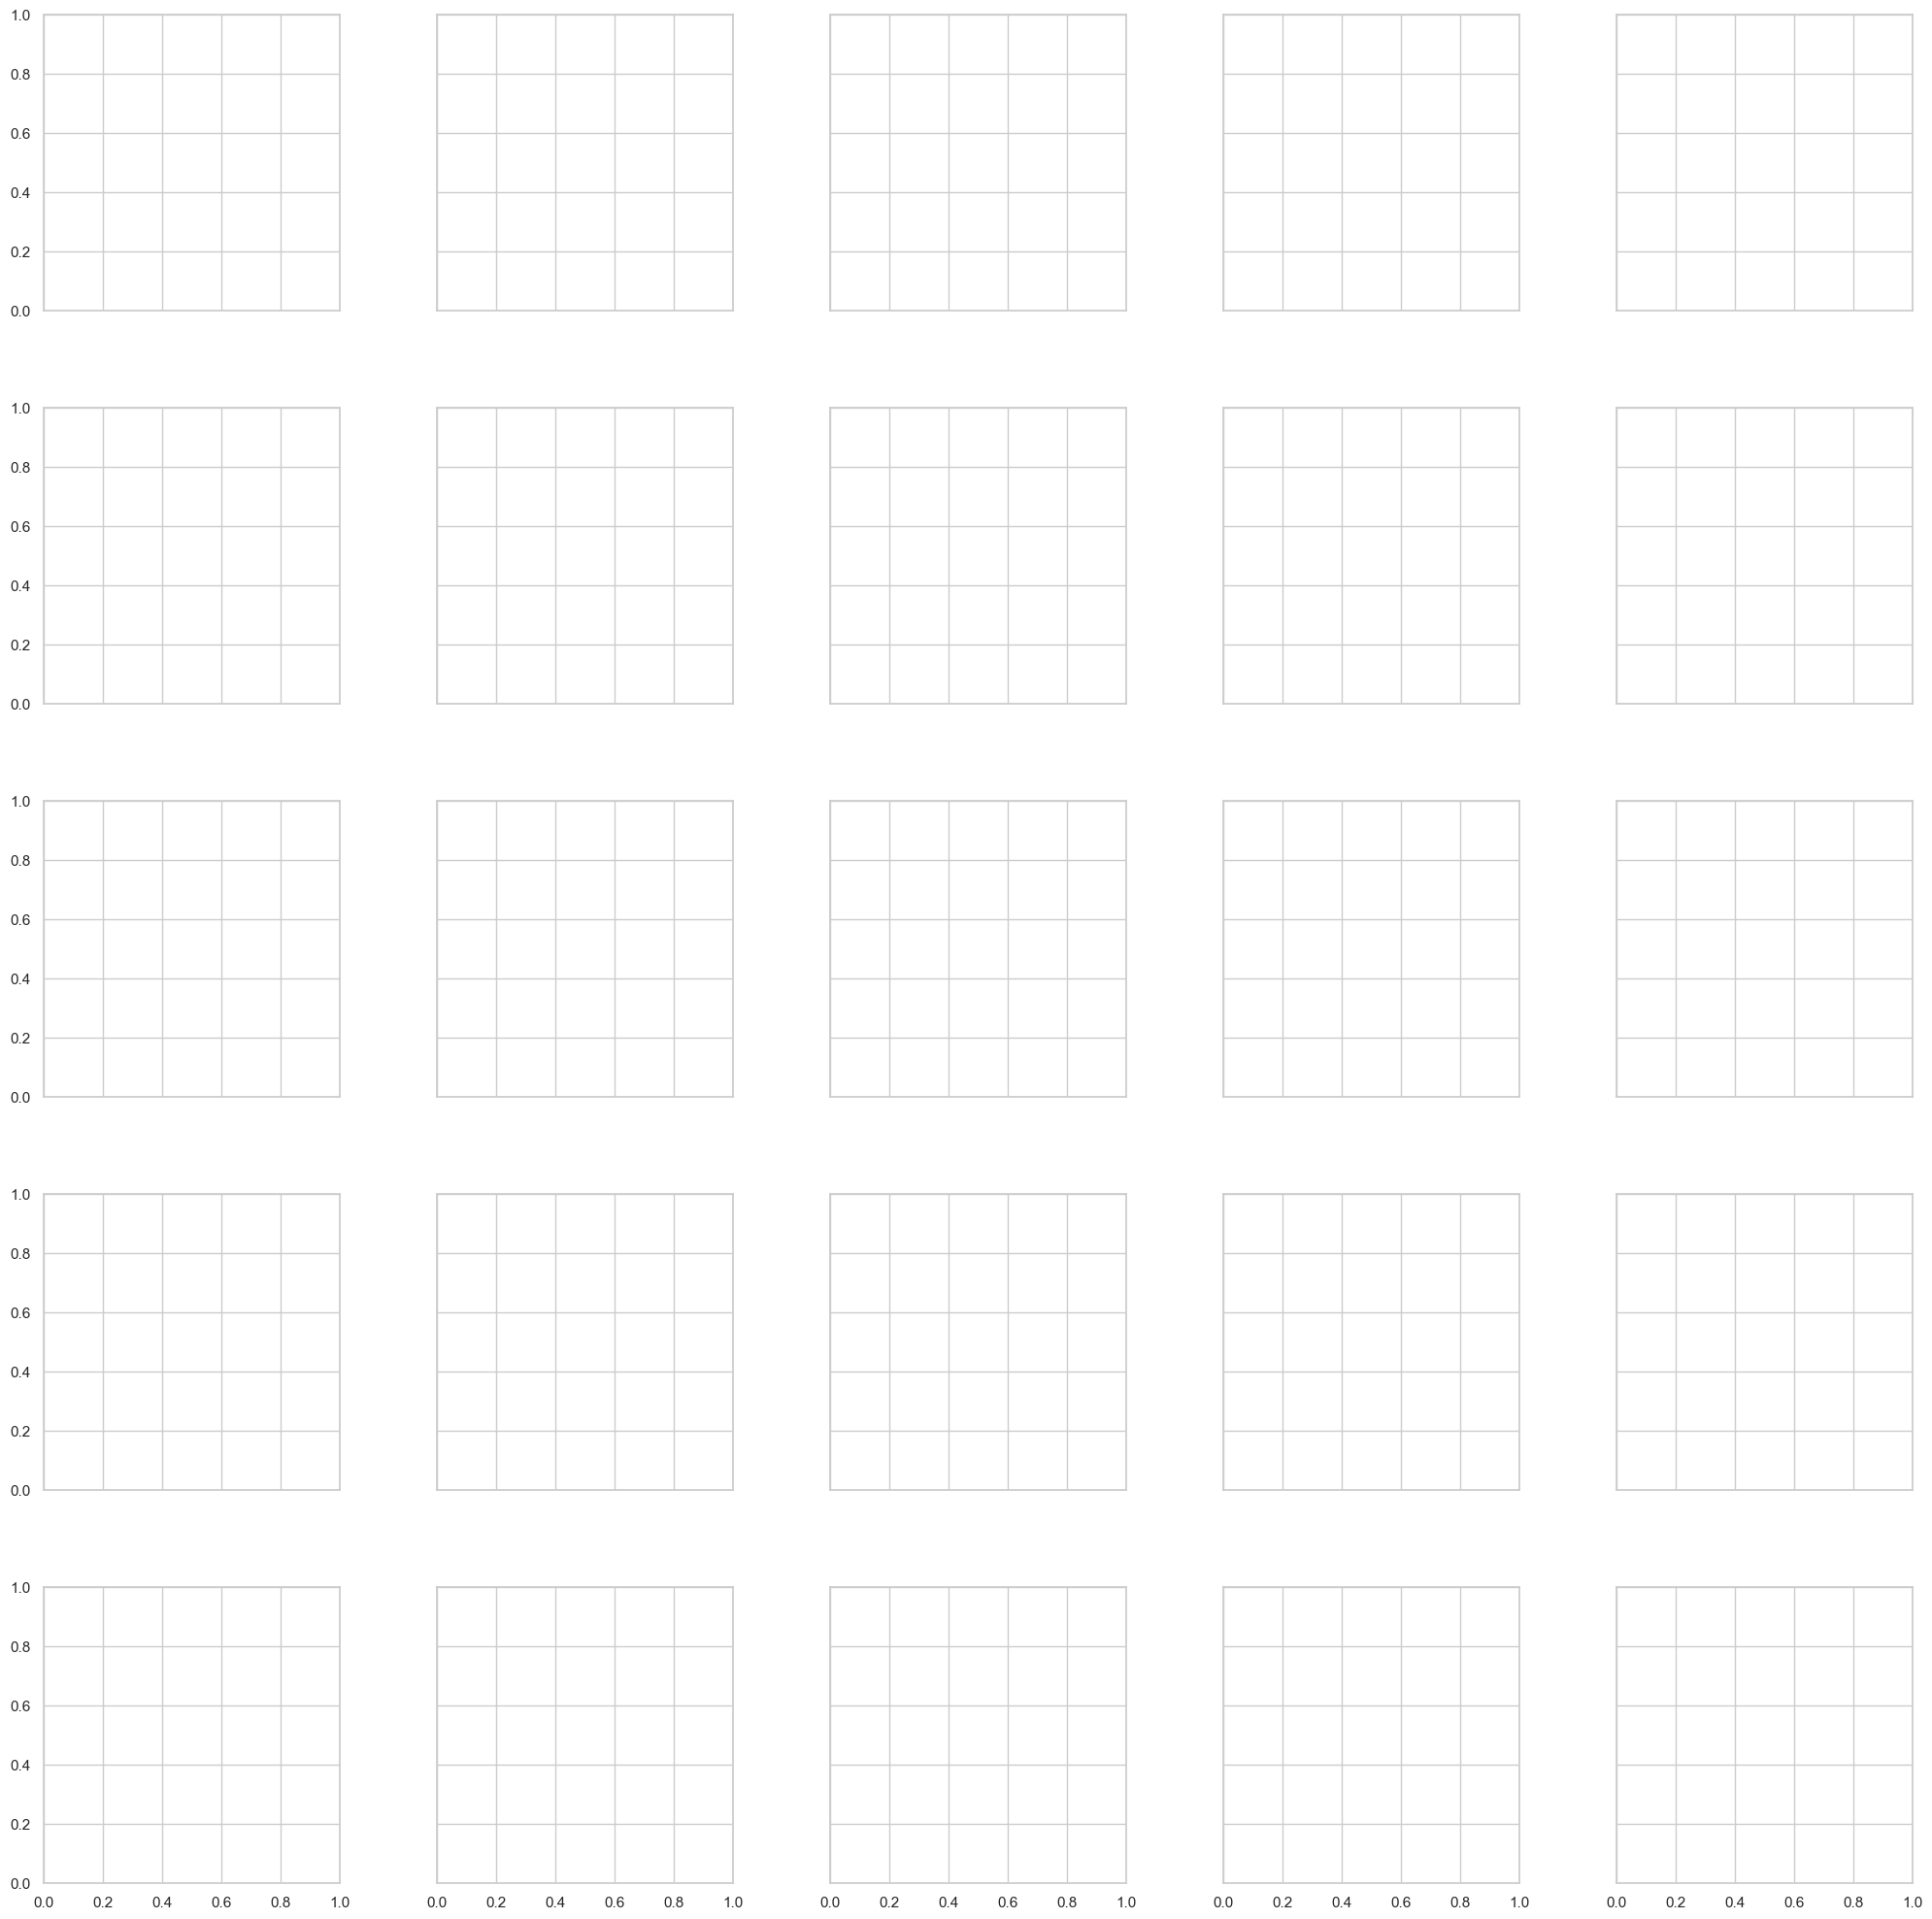

Rank 32 Checkpoint 500


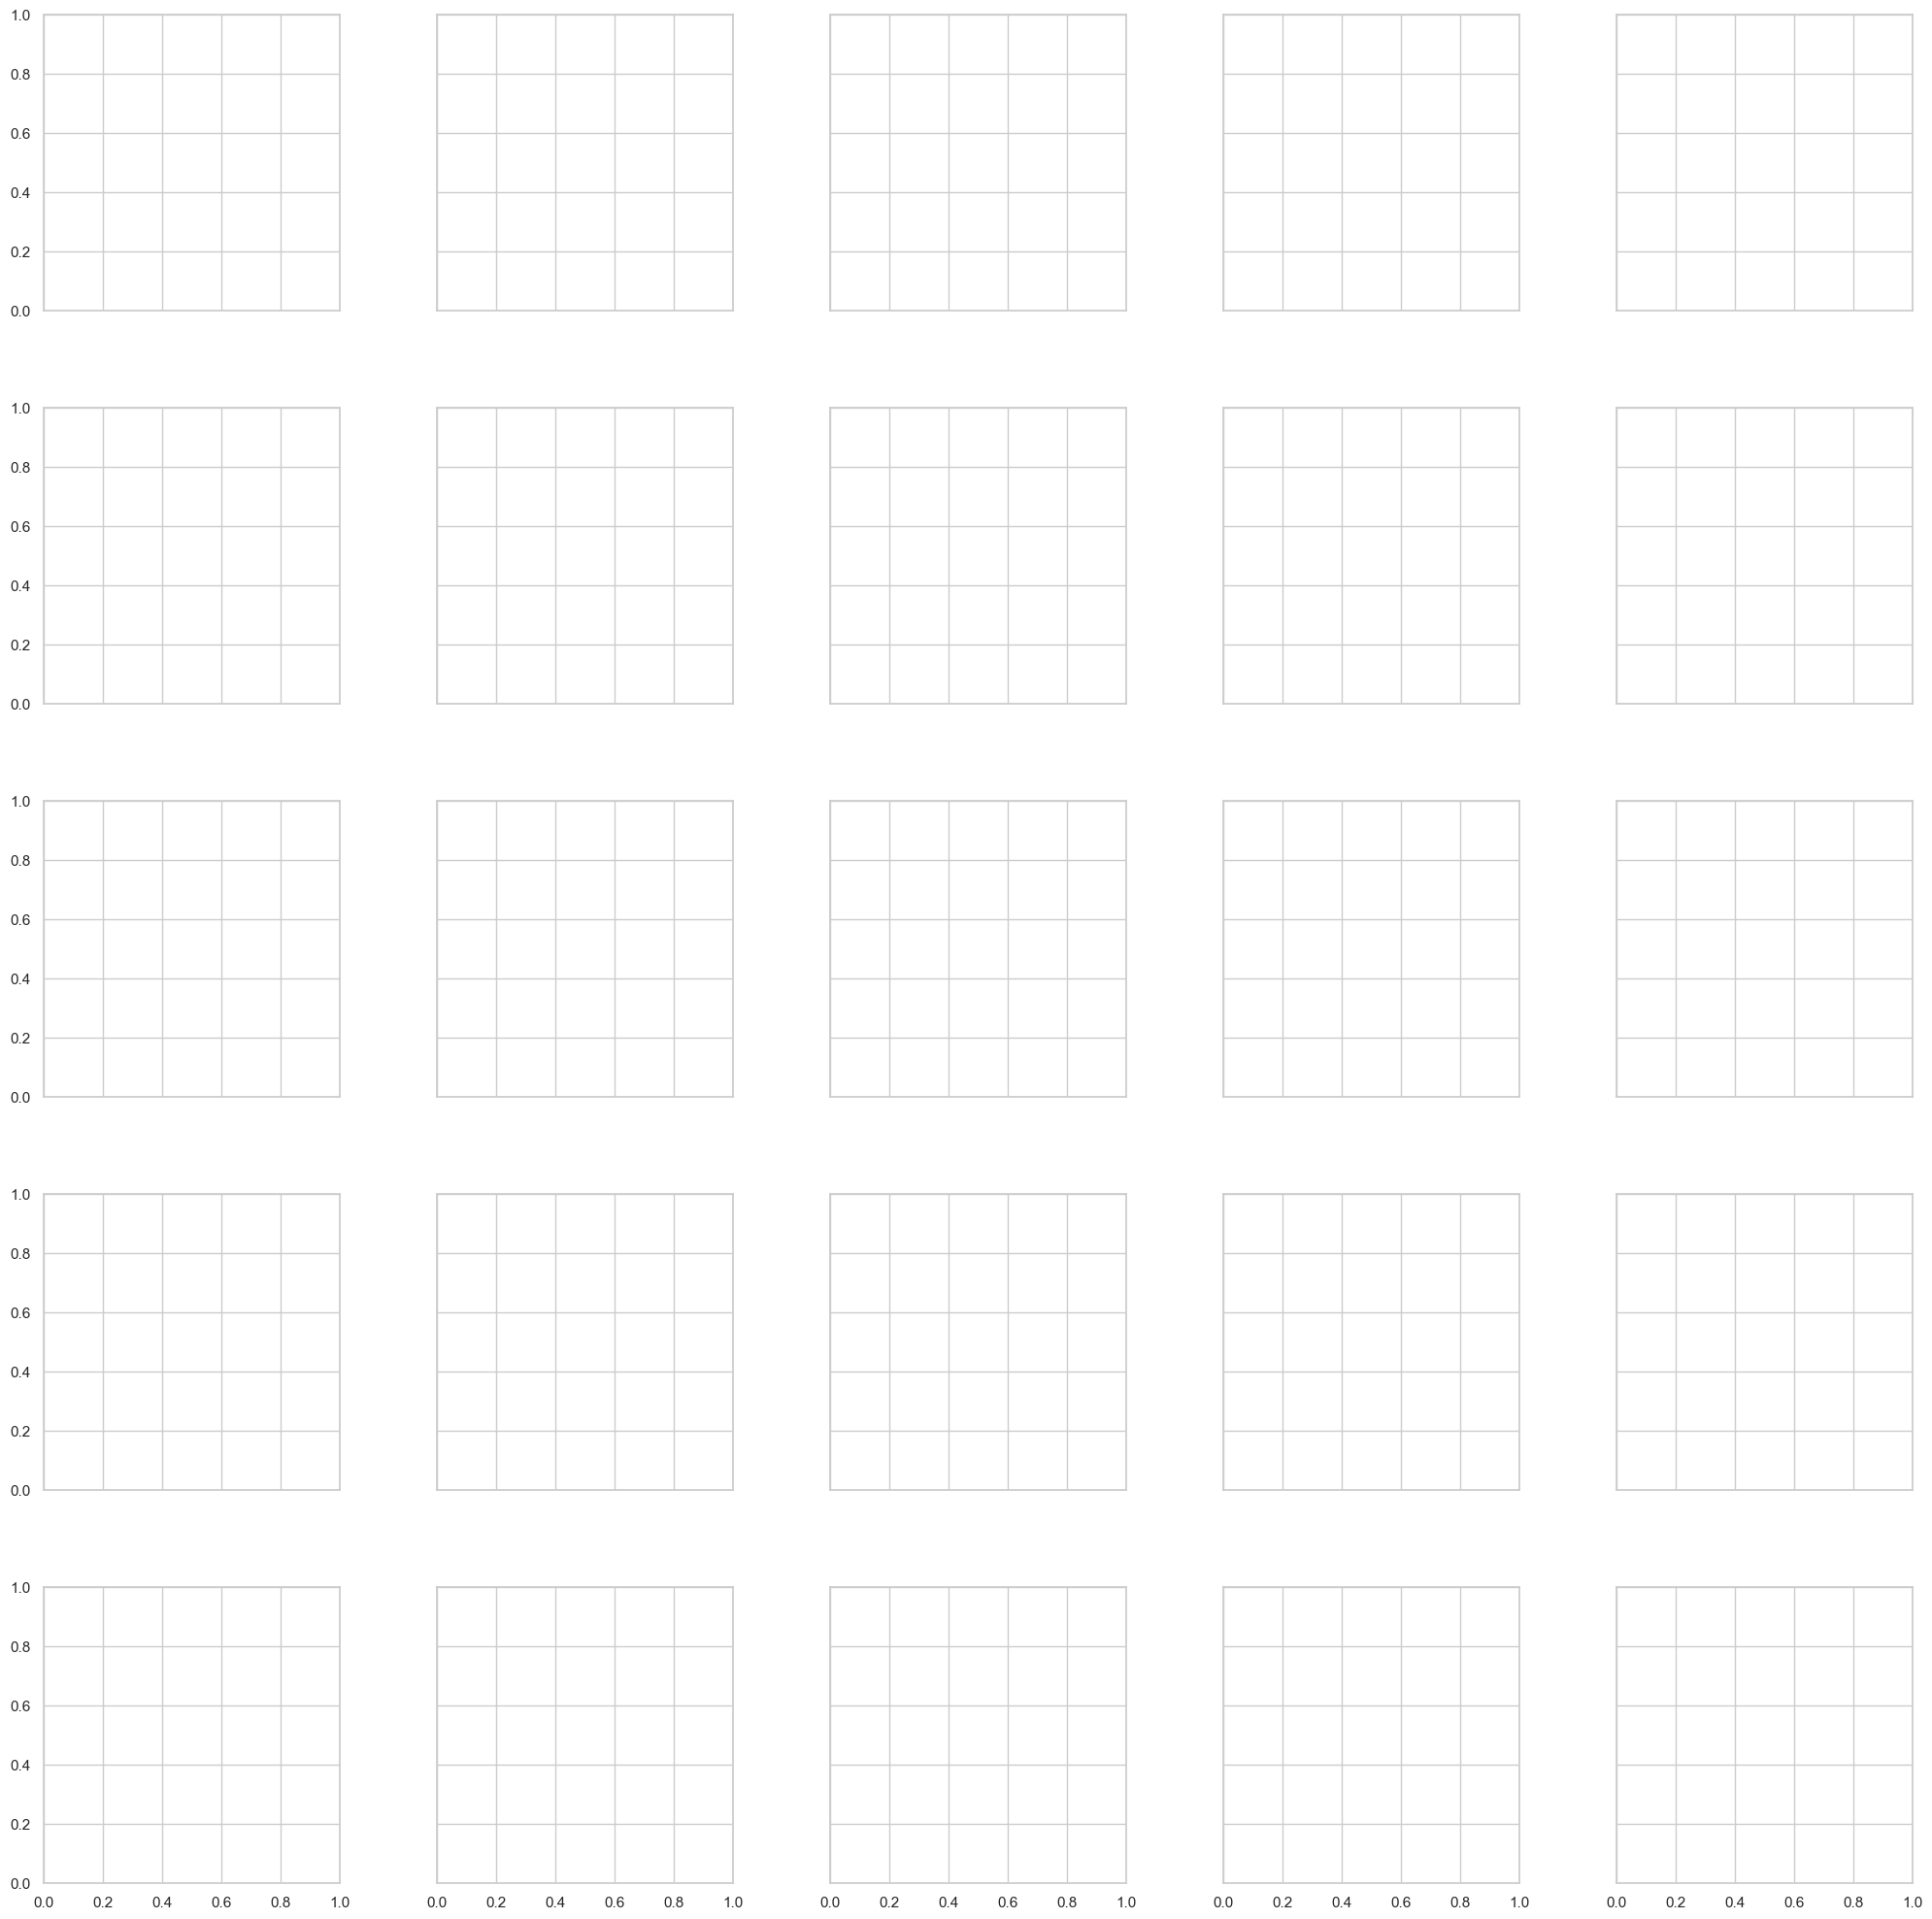

Rank 32 Checkpoint 1000


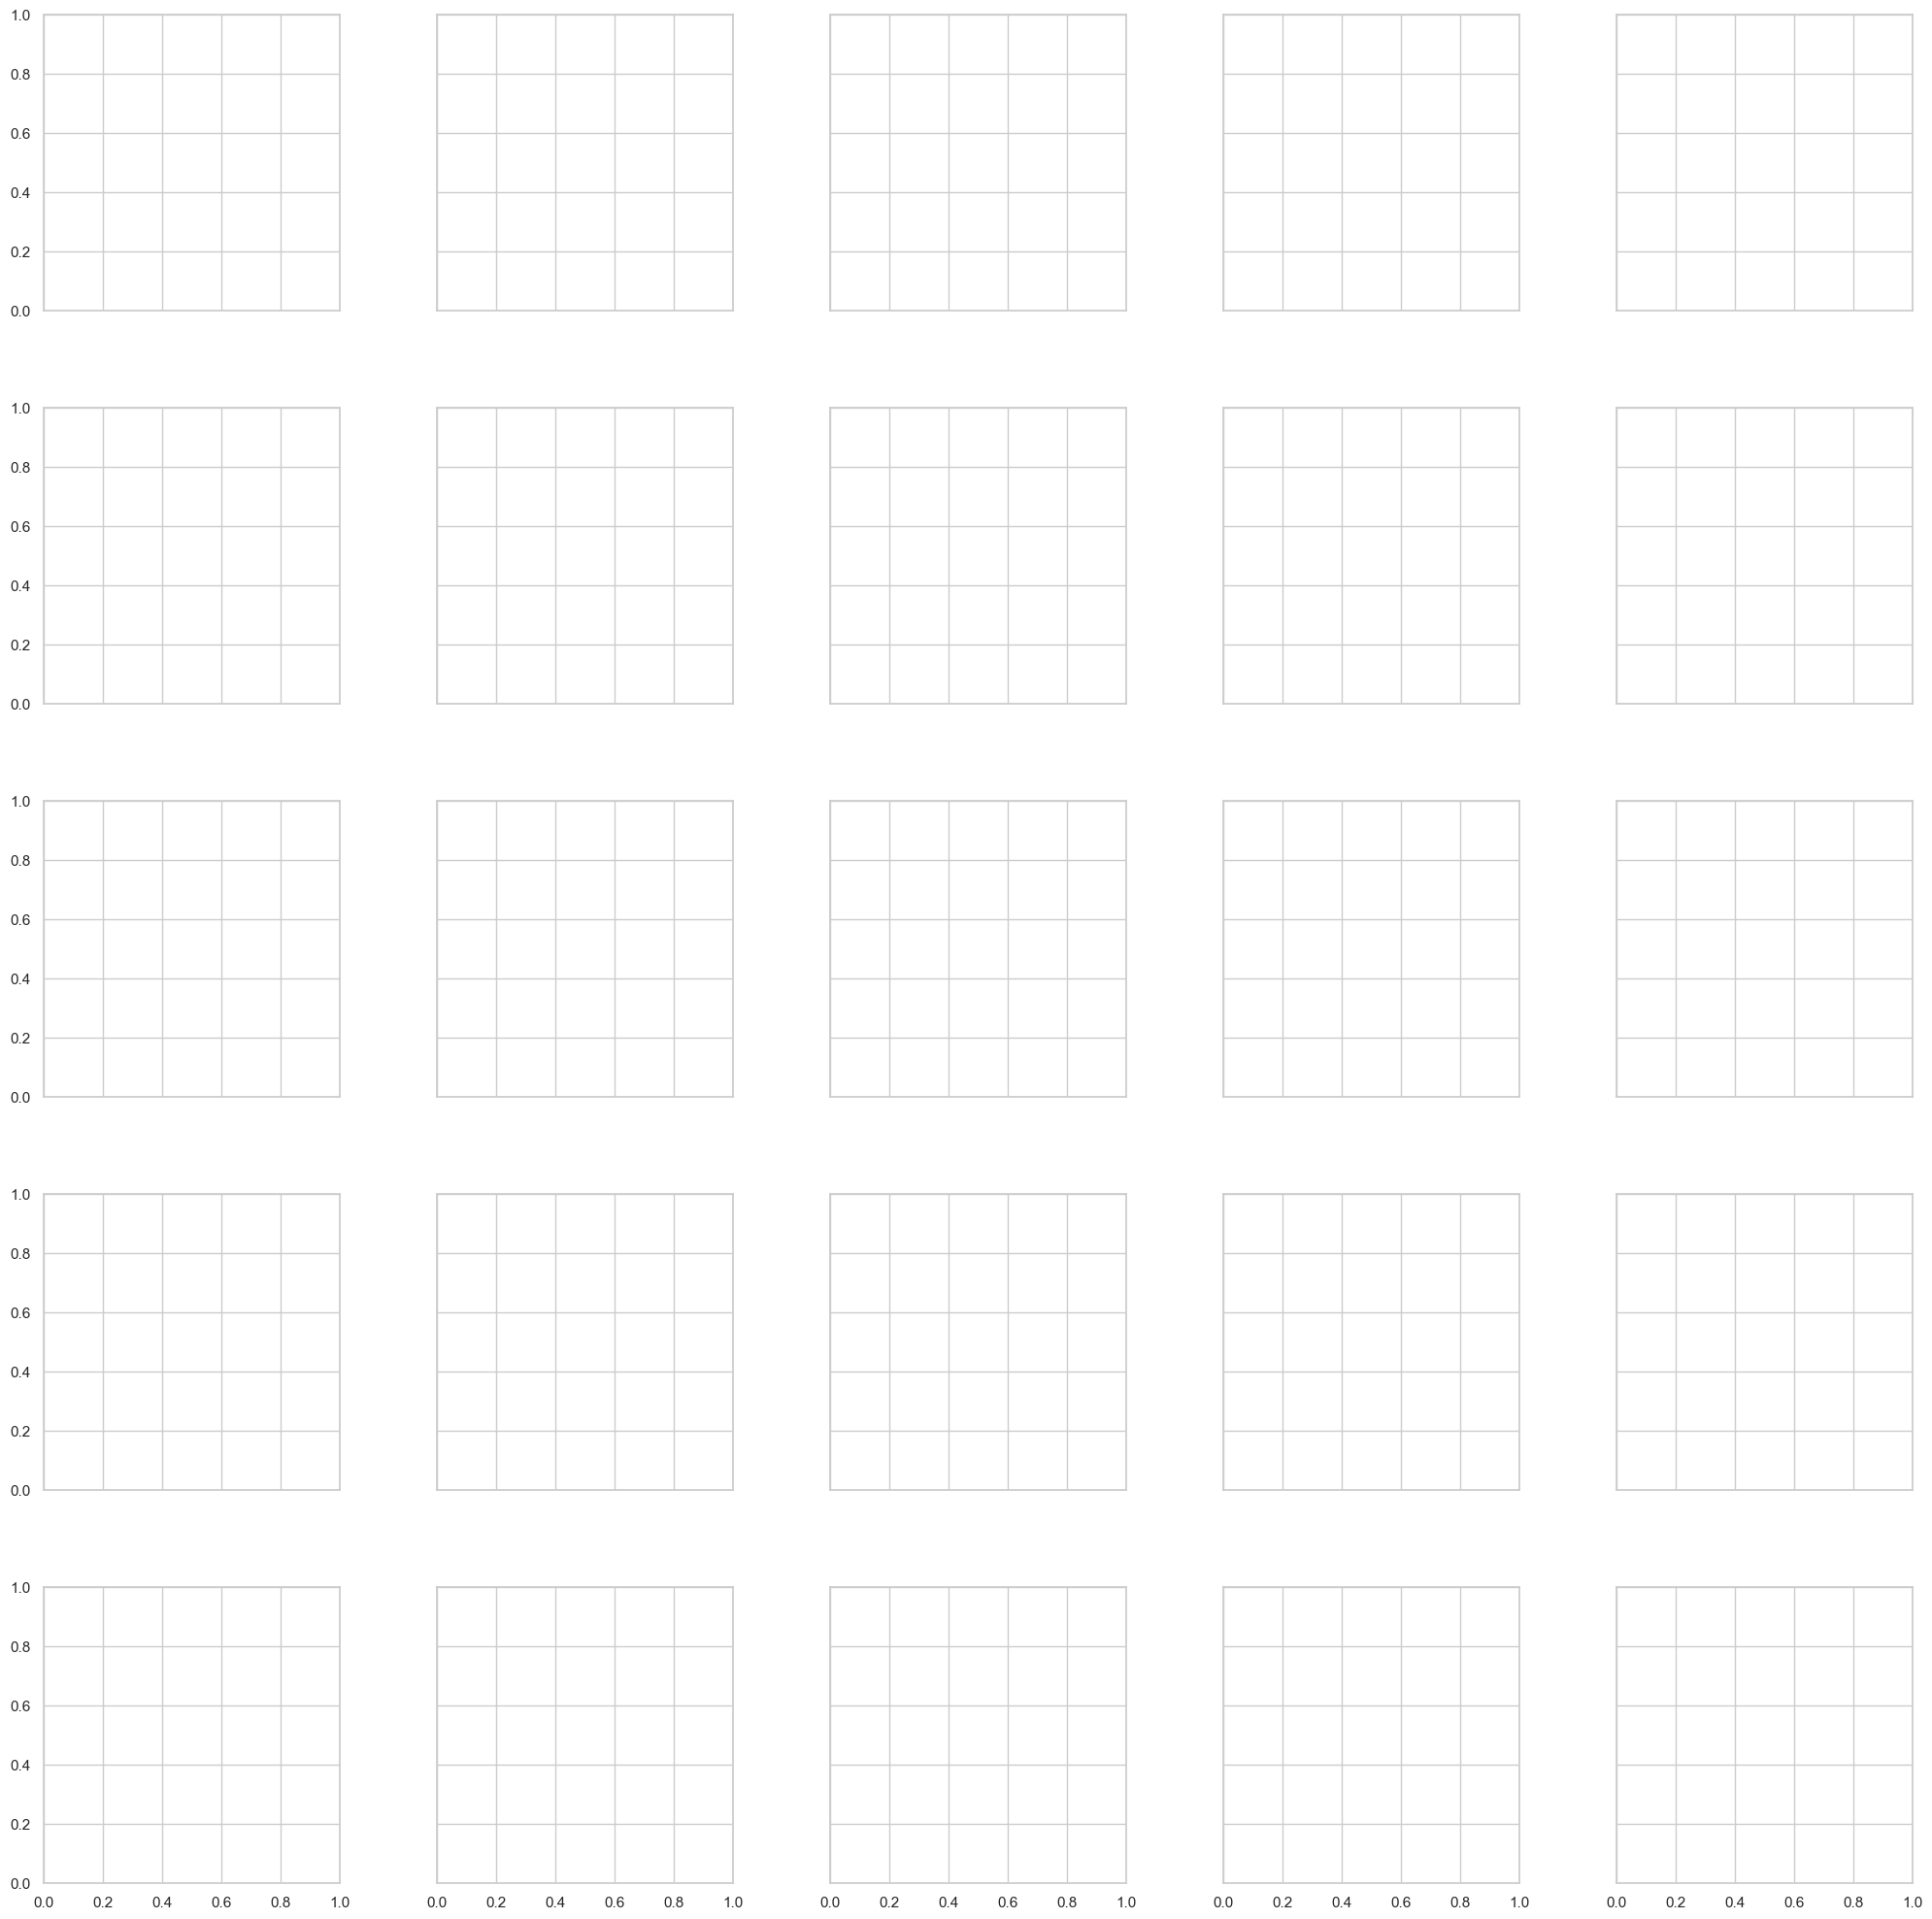

Rank 32 Checkpoint 2000


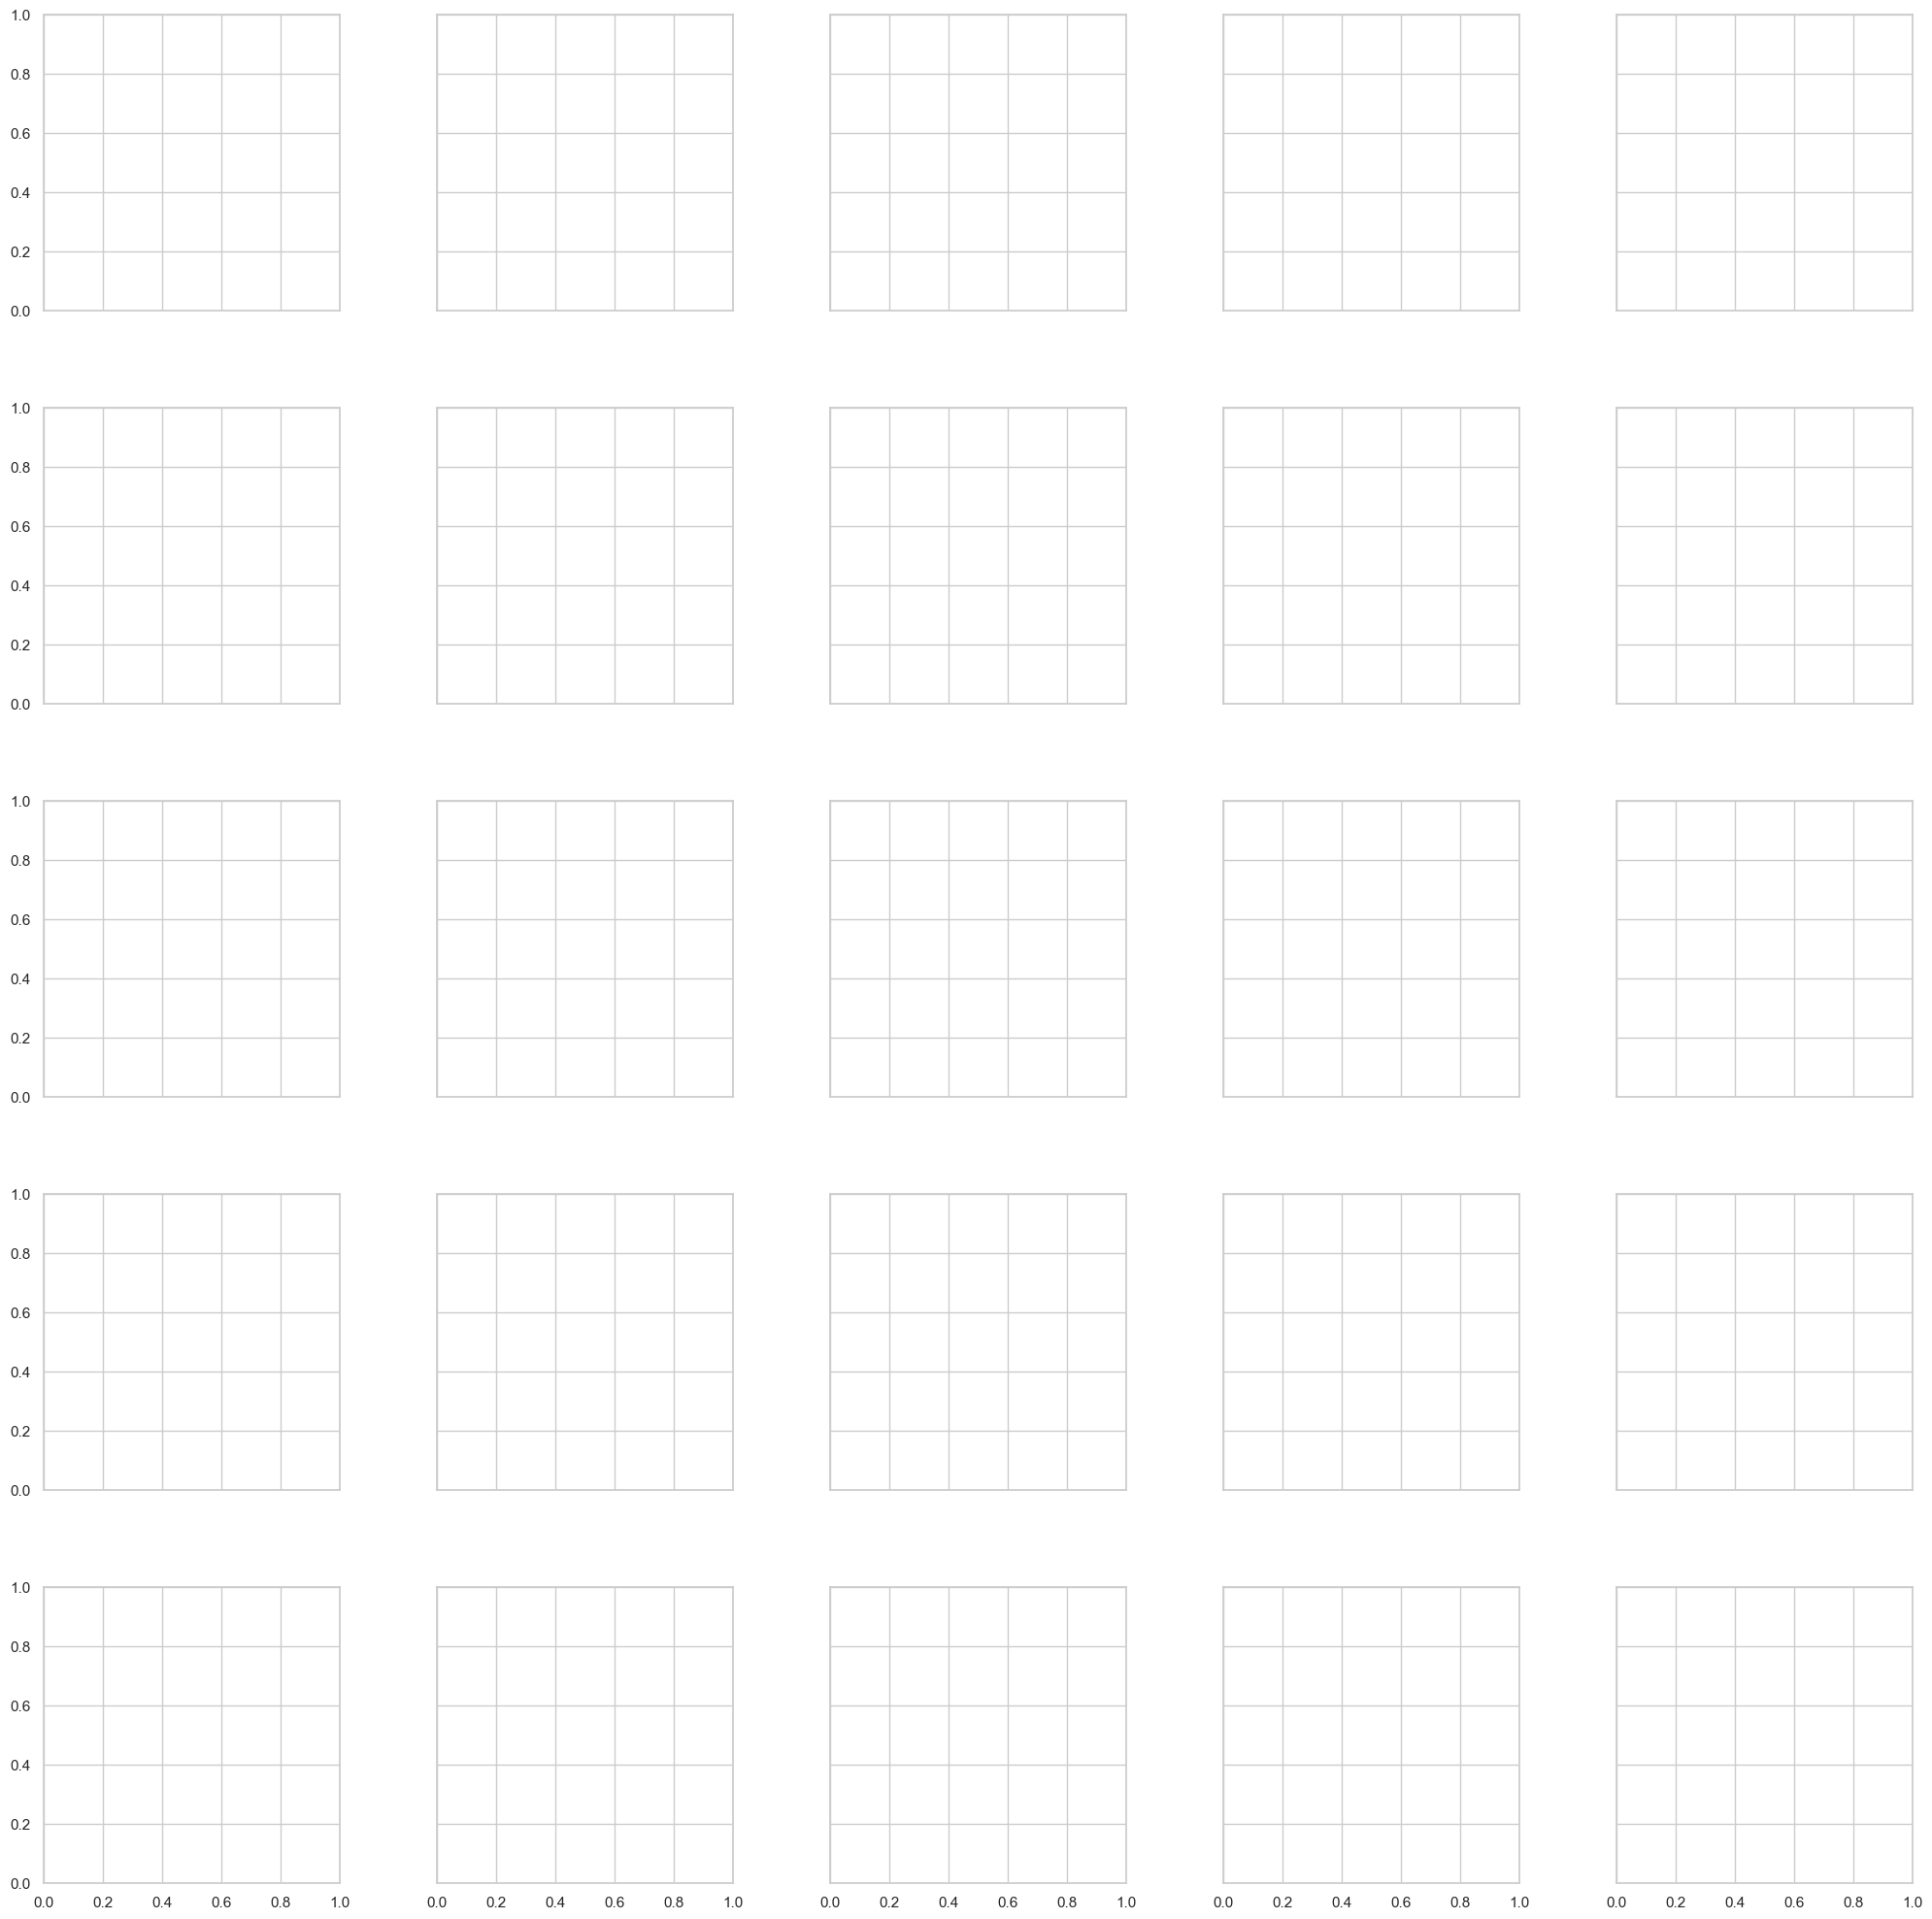

Rank 64 Checkpoint 500


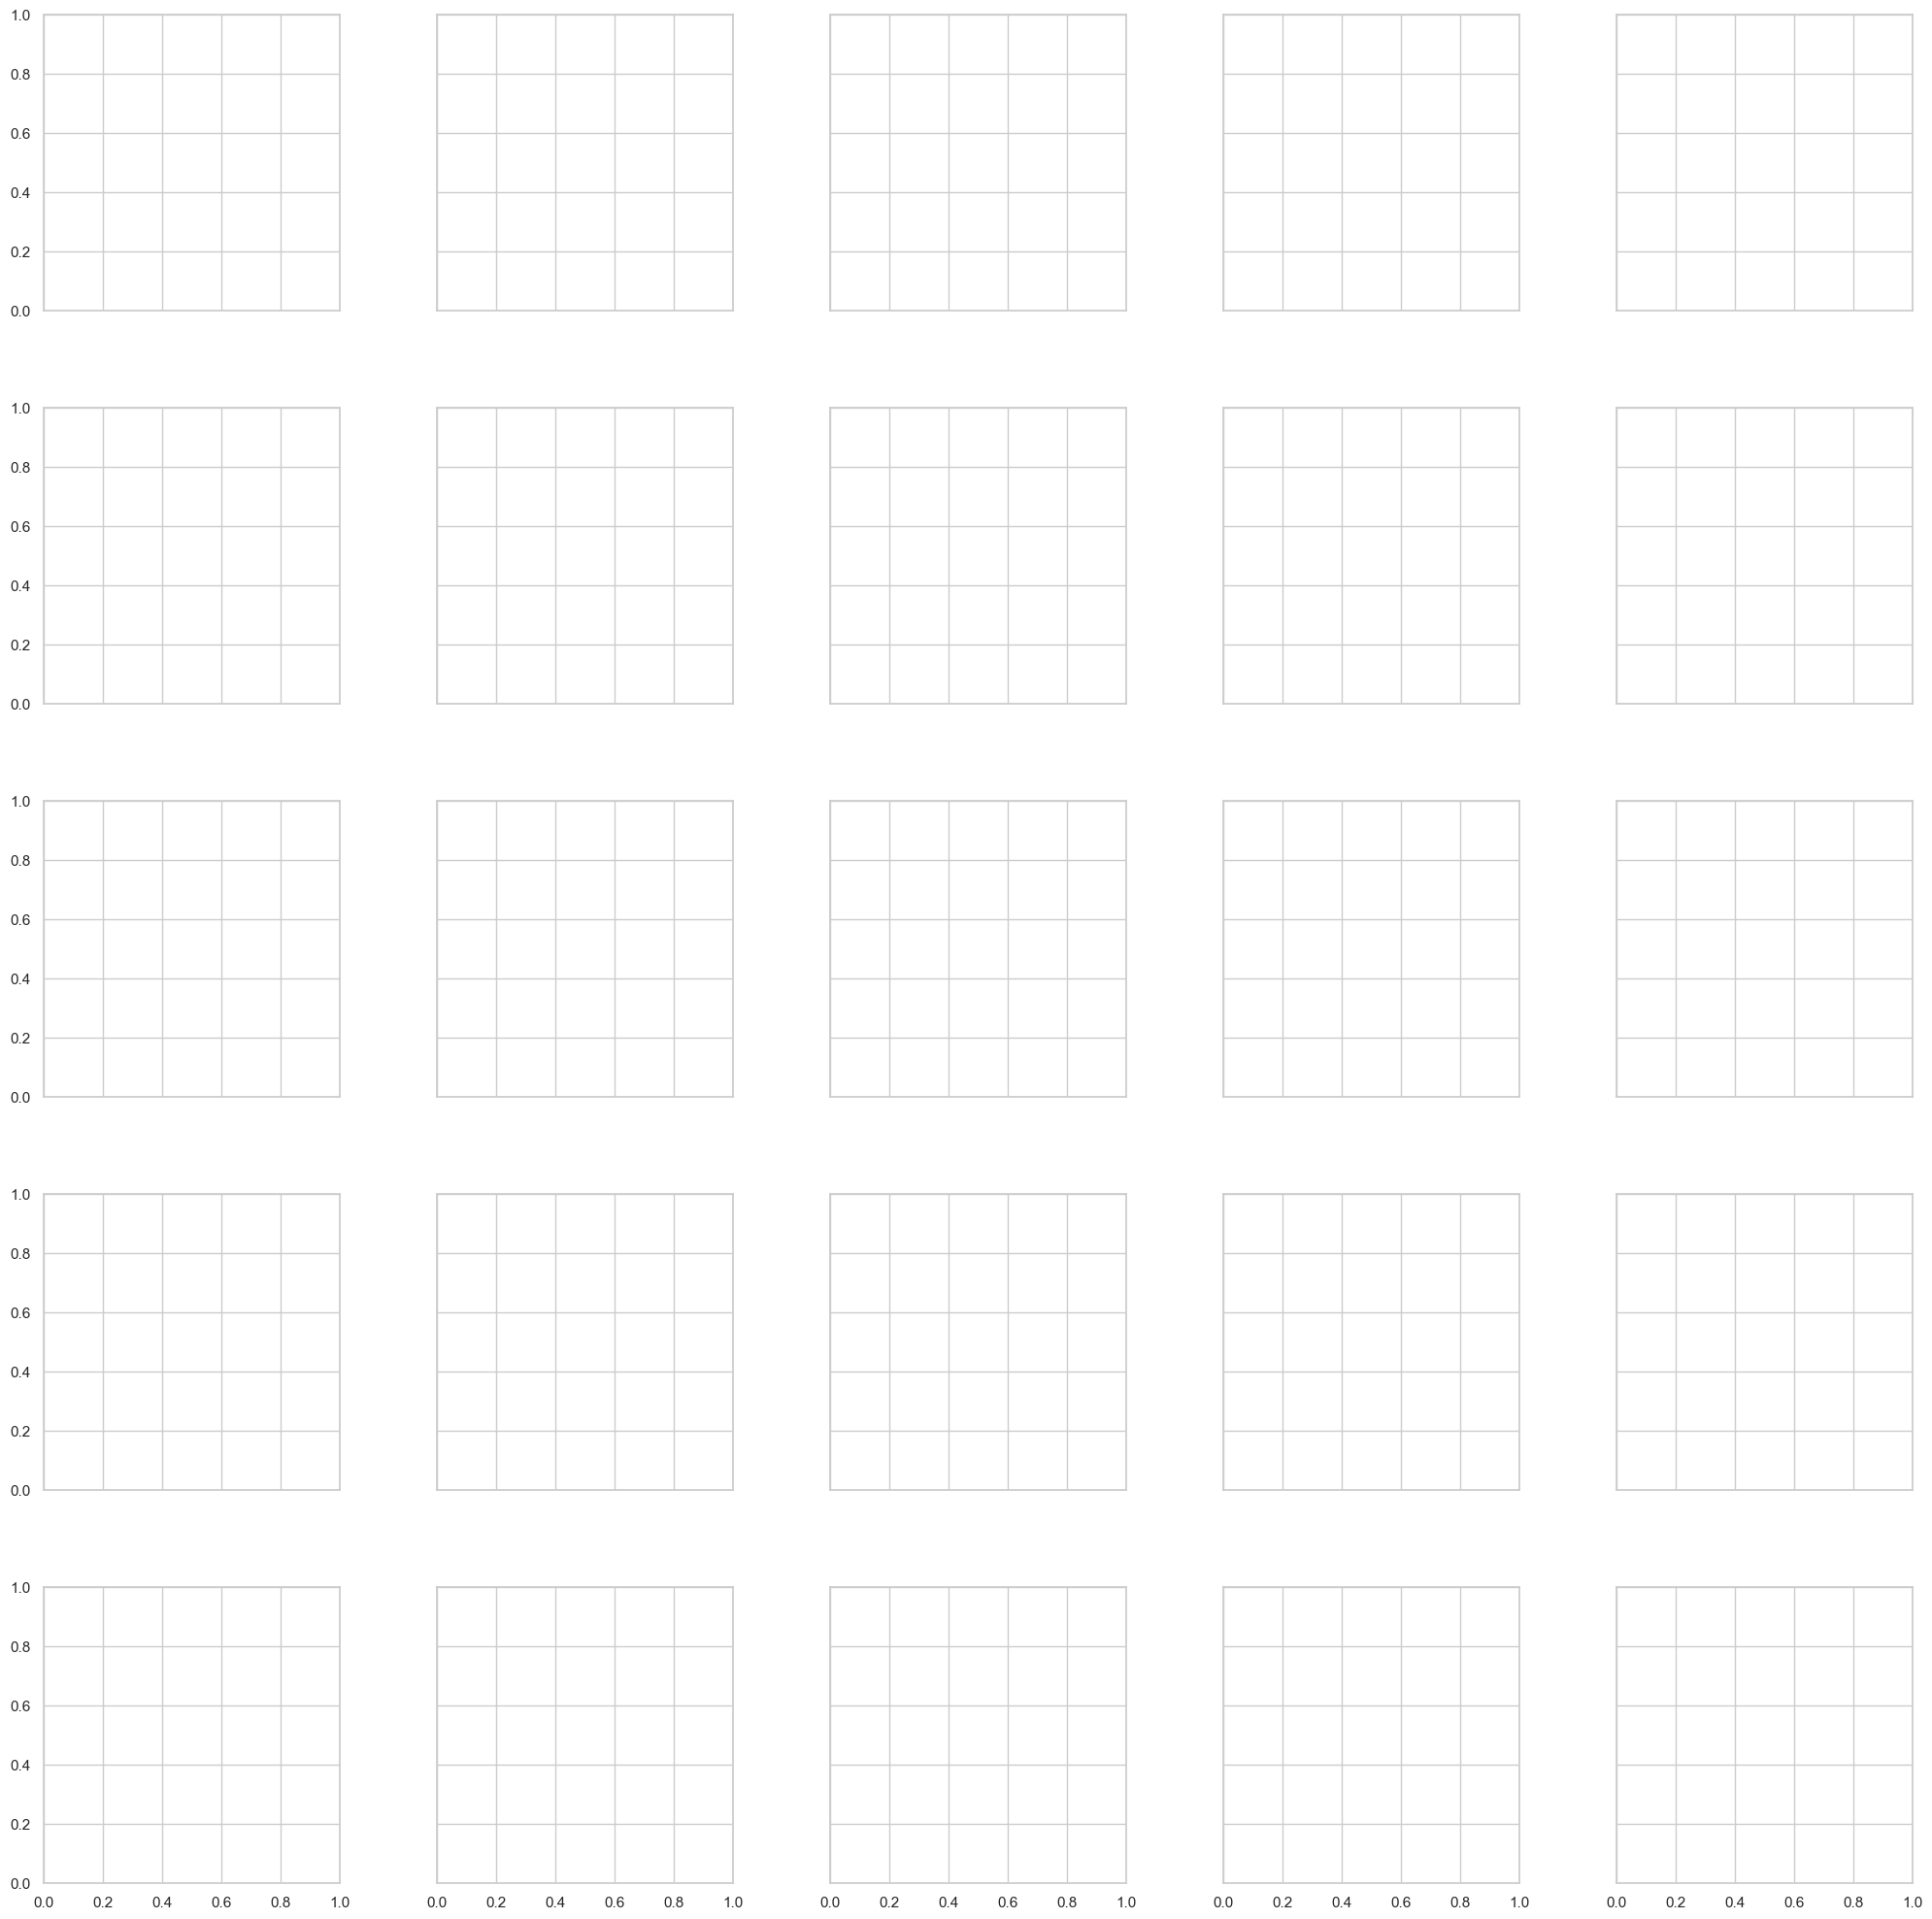

Rank 64 Checkpoint 1000


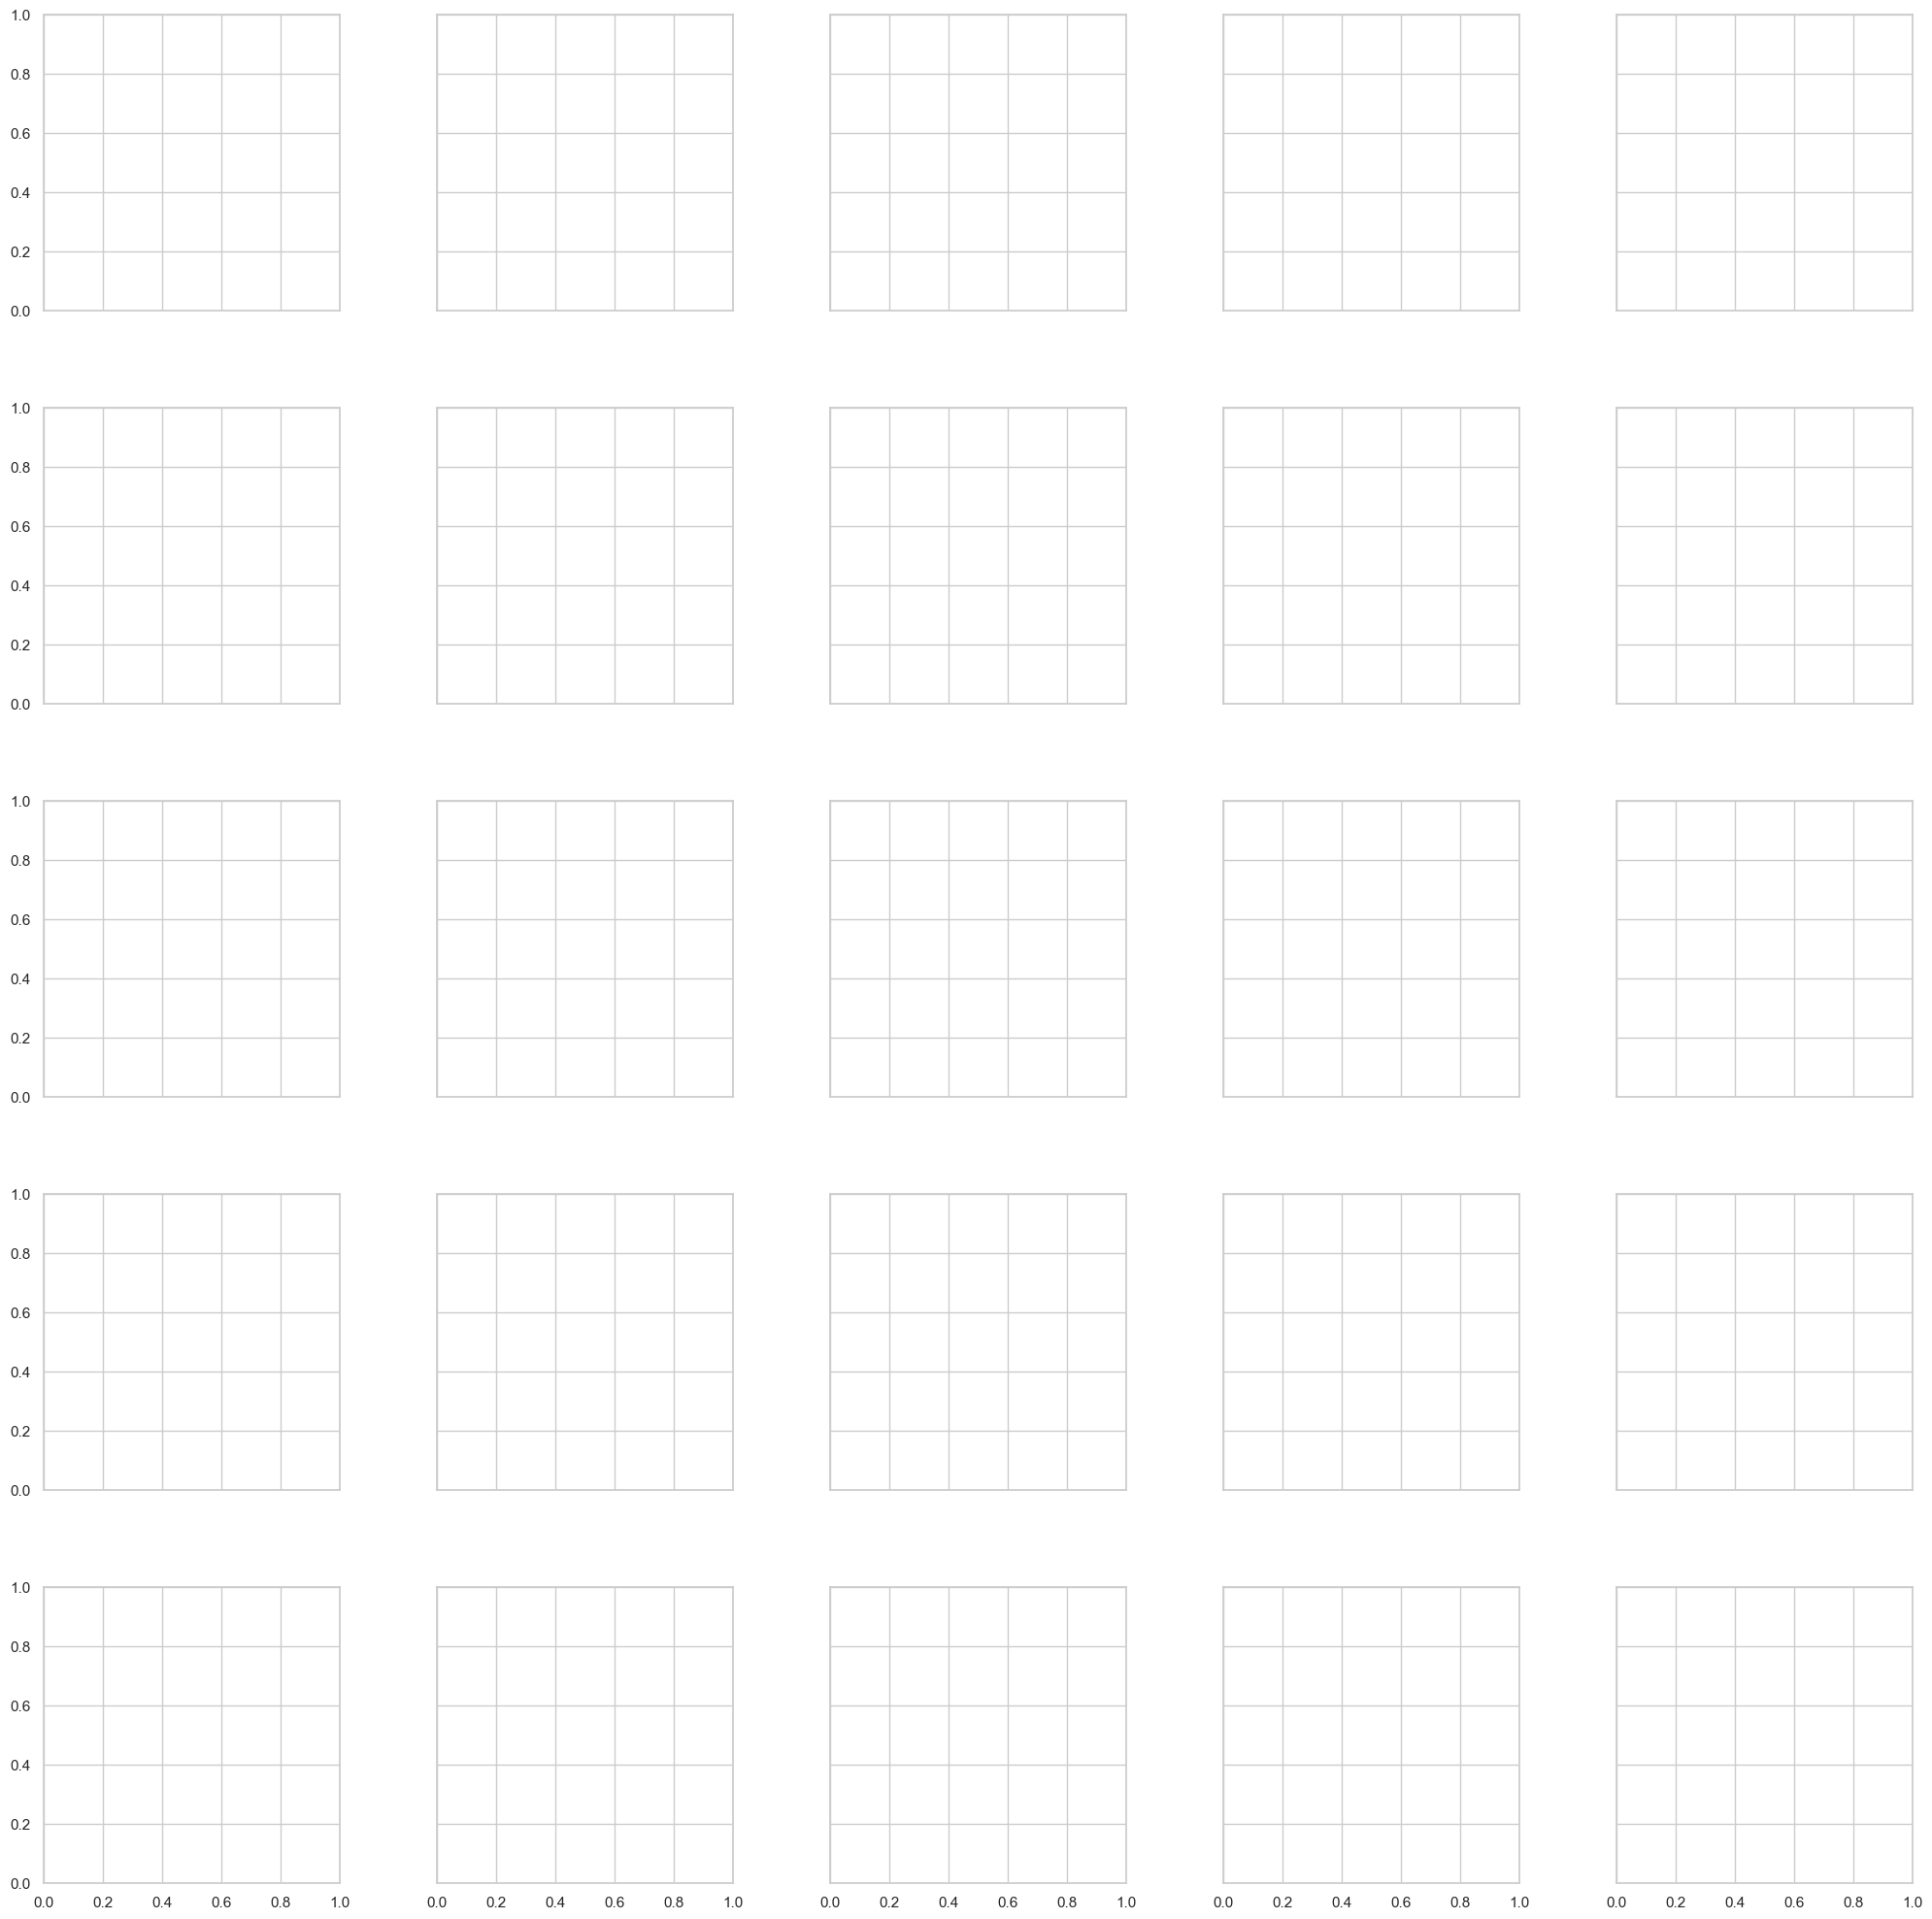

Rank 64 Checkpoint 2000


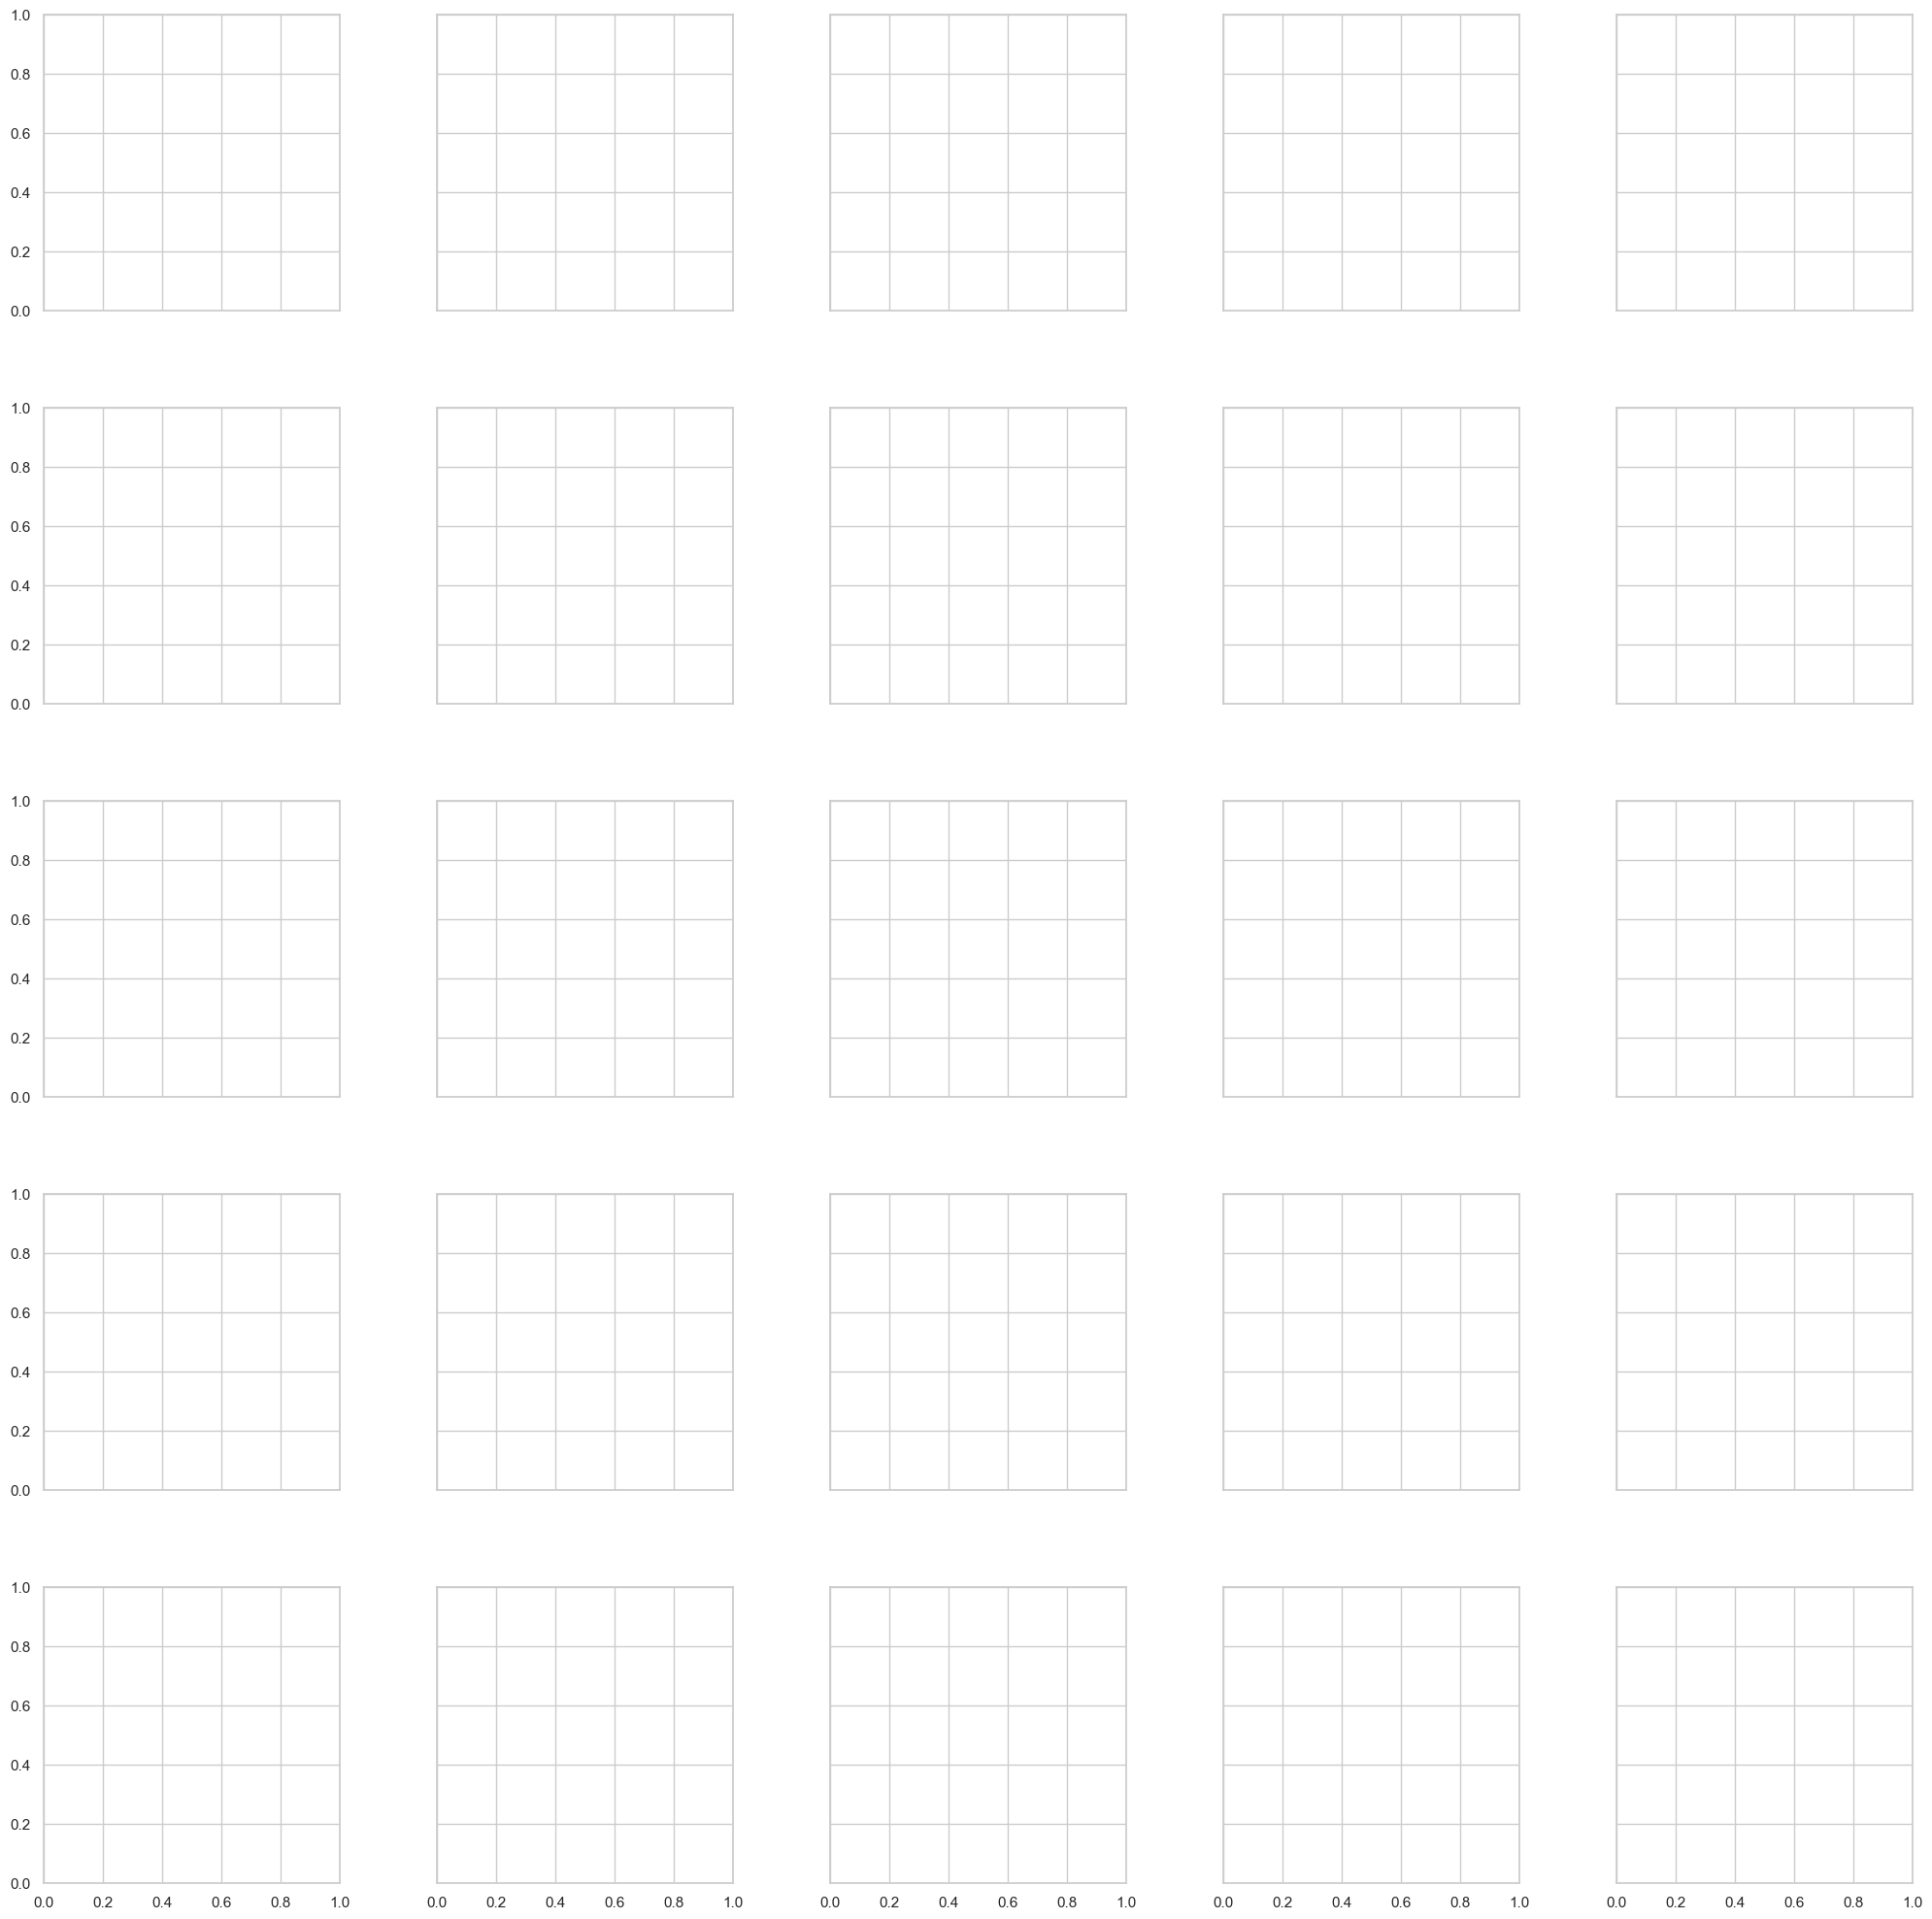

Rank 128 Checkpoint 500


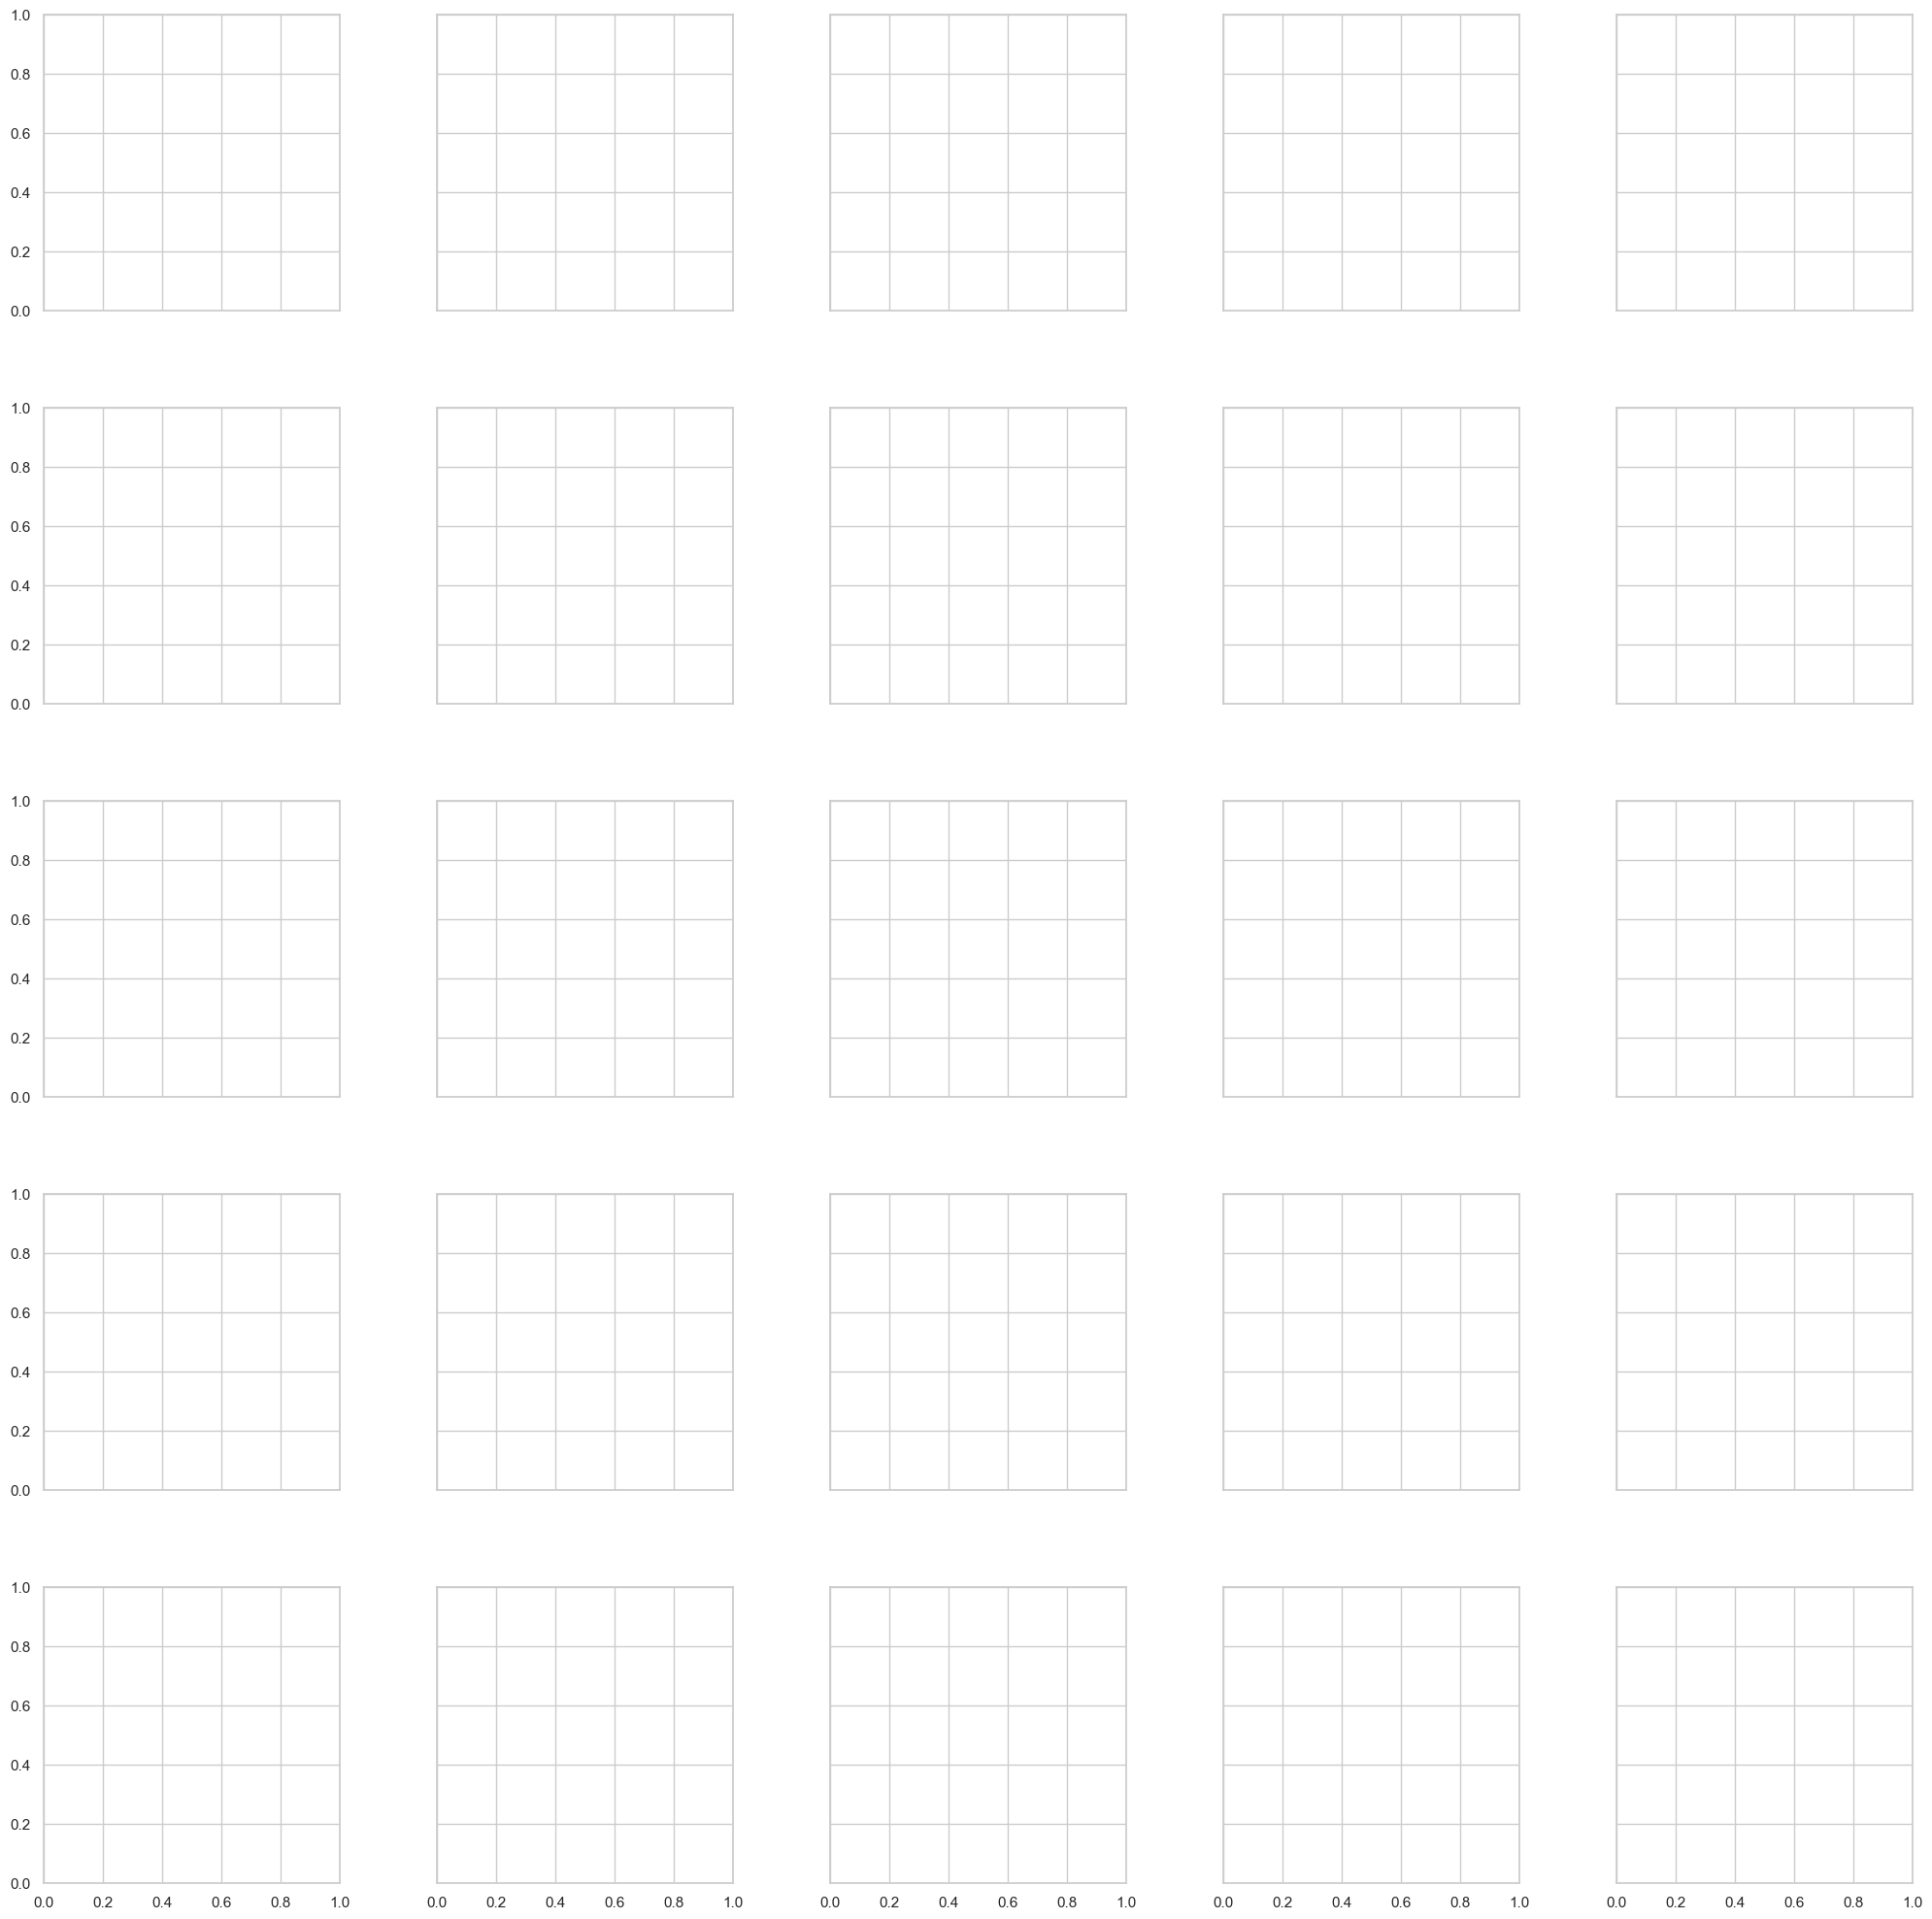

Rank 128 Checkpoint 1000


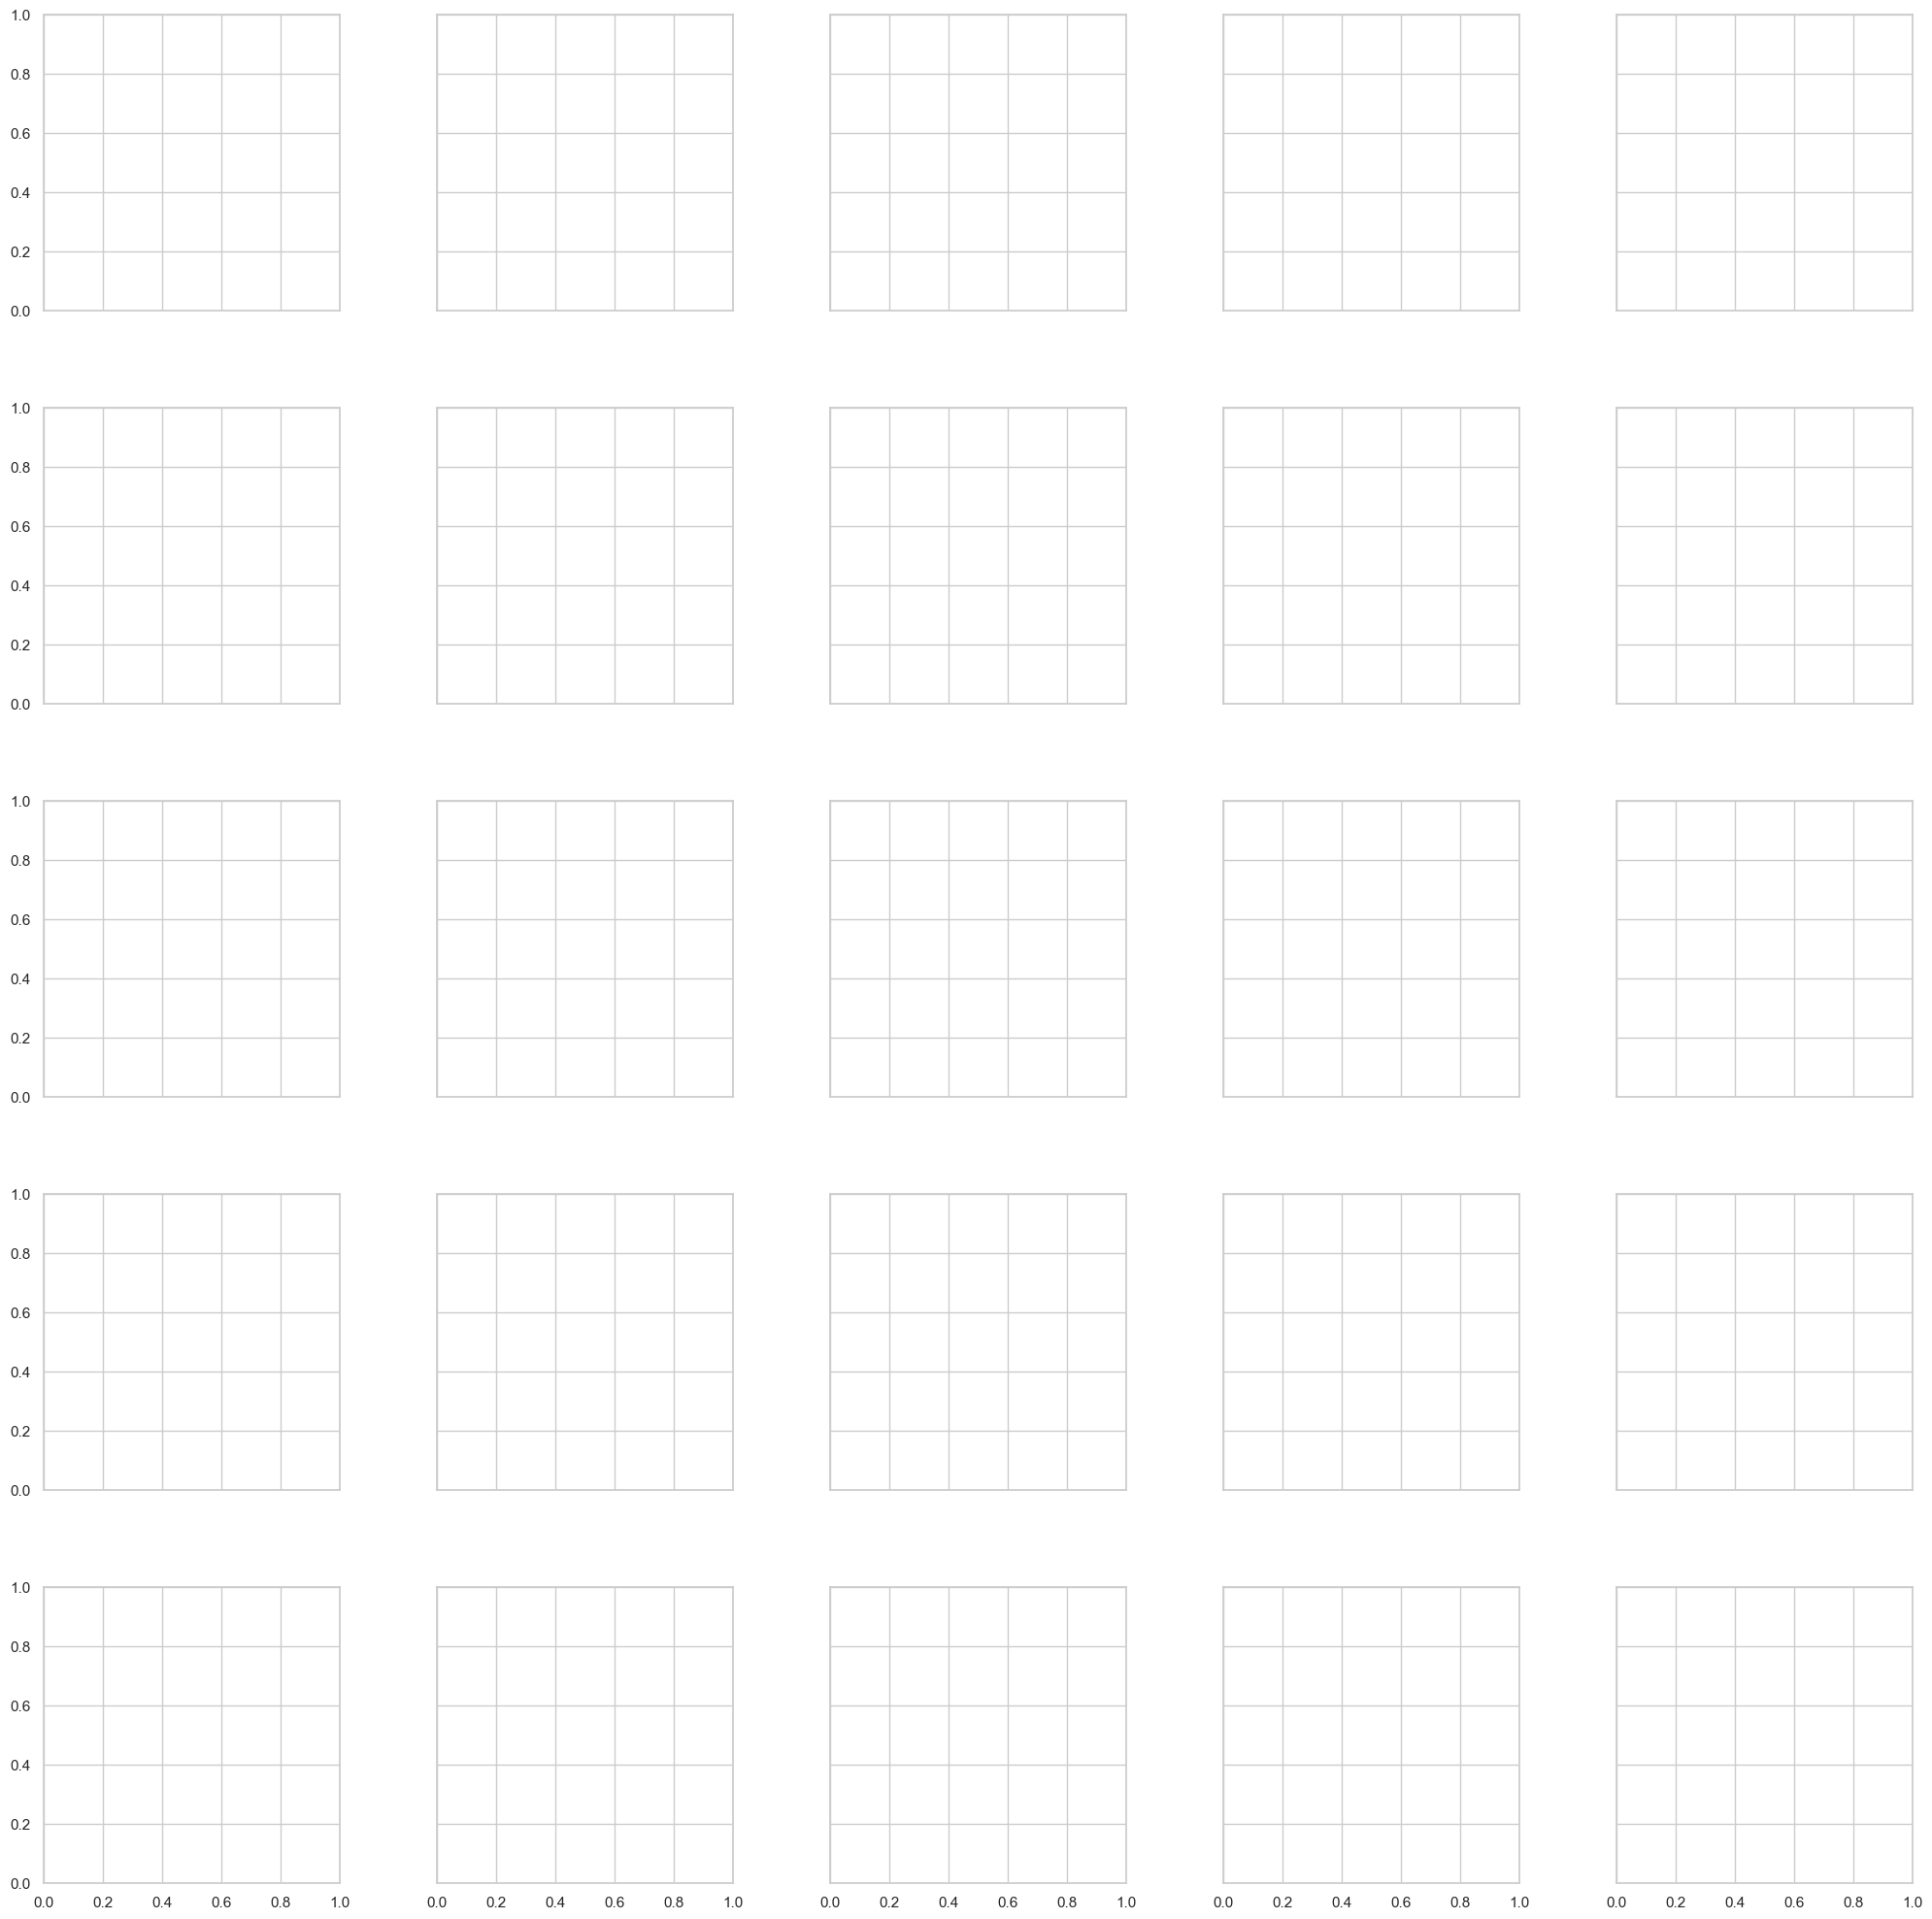

Rank 128 Checkpoint 2000


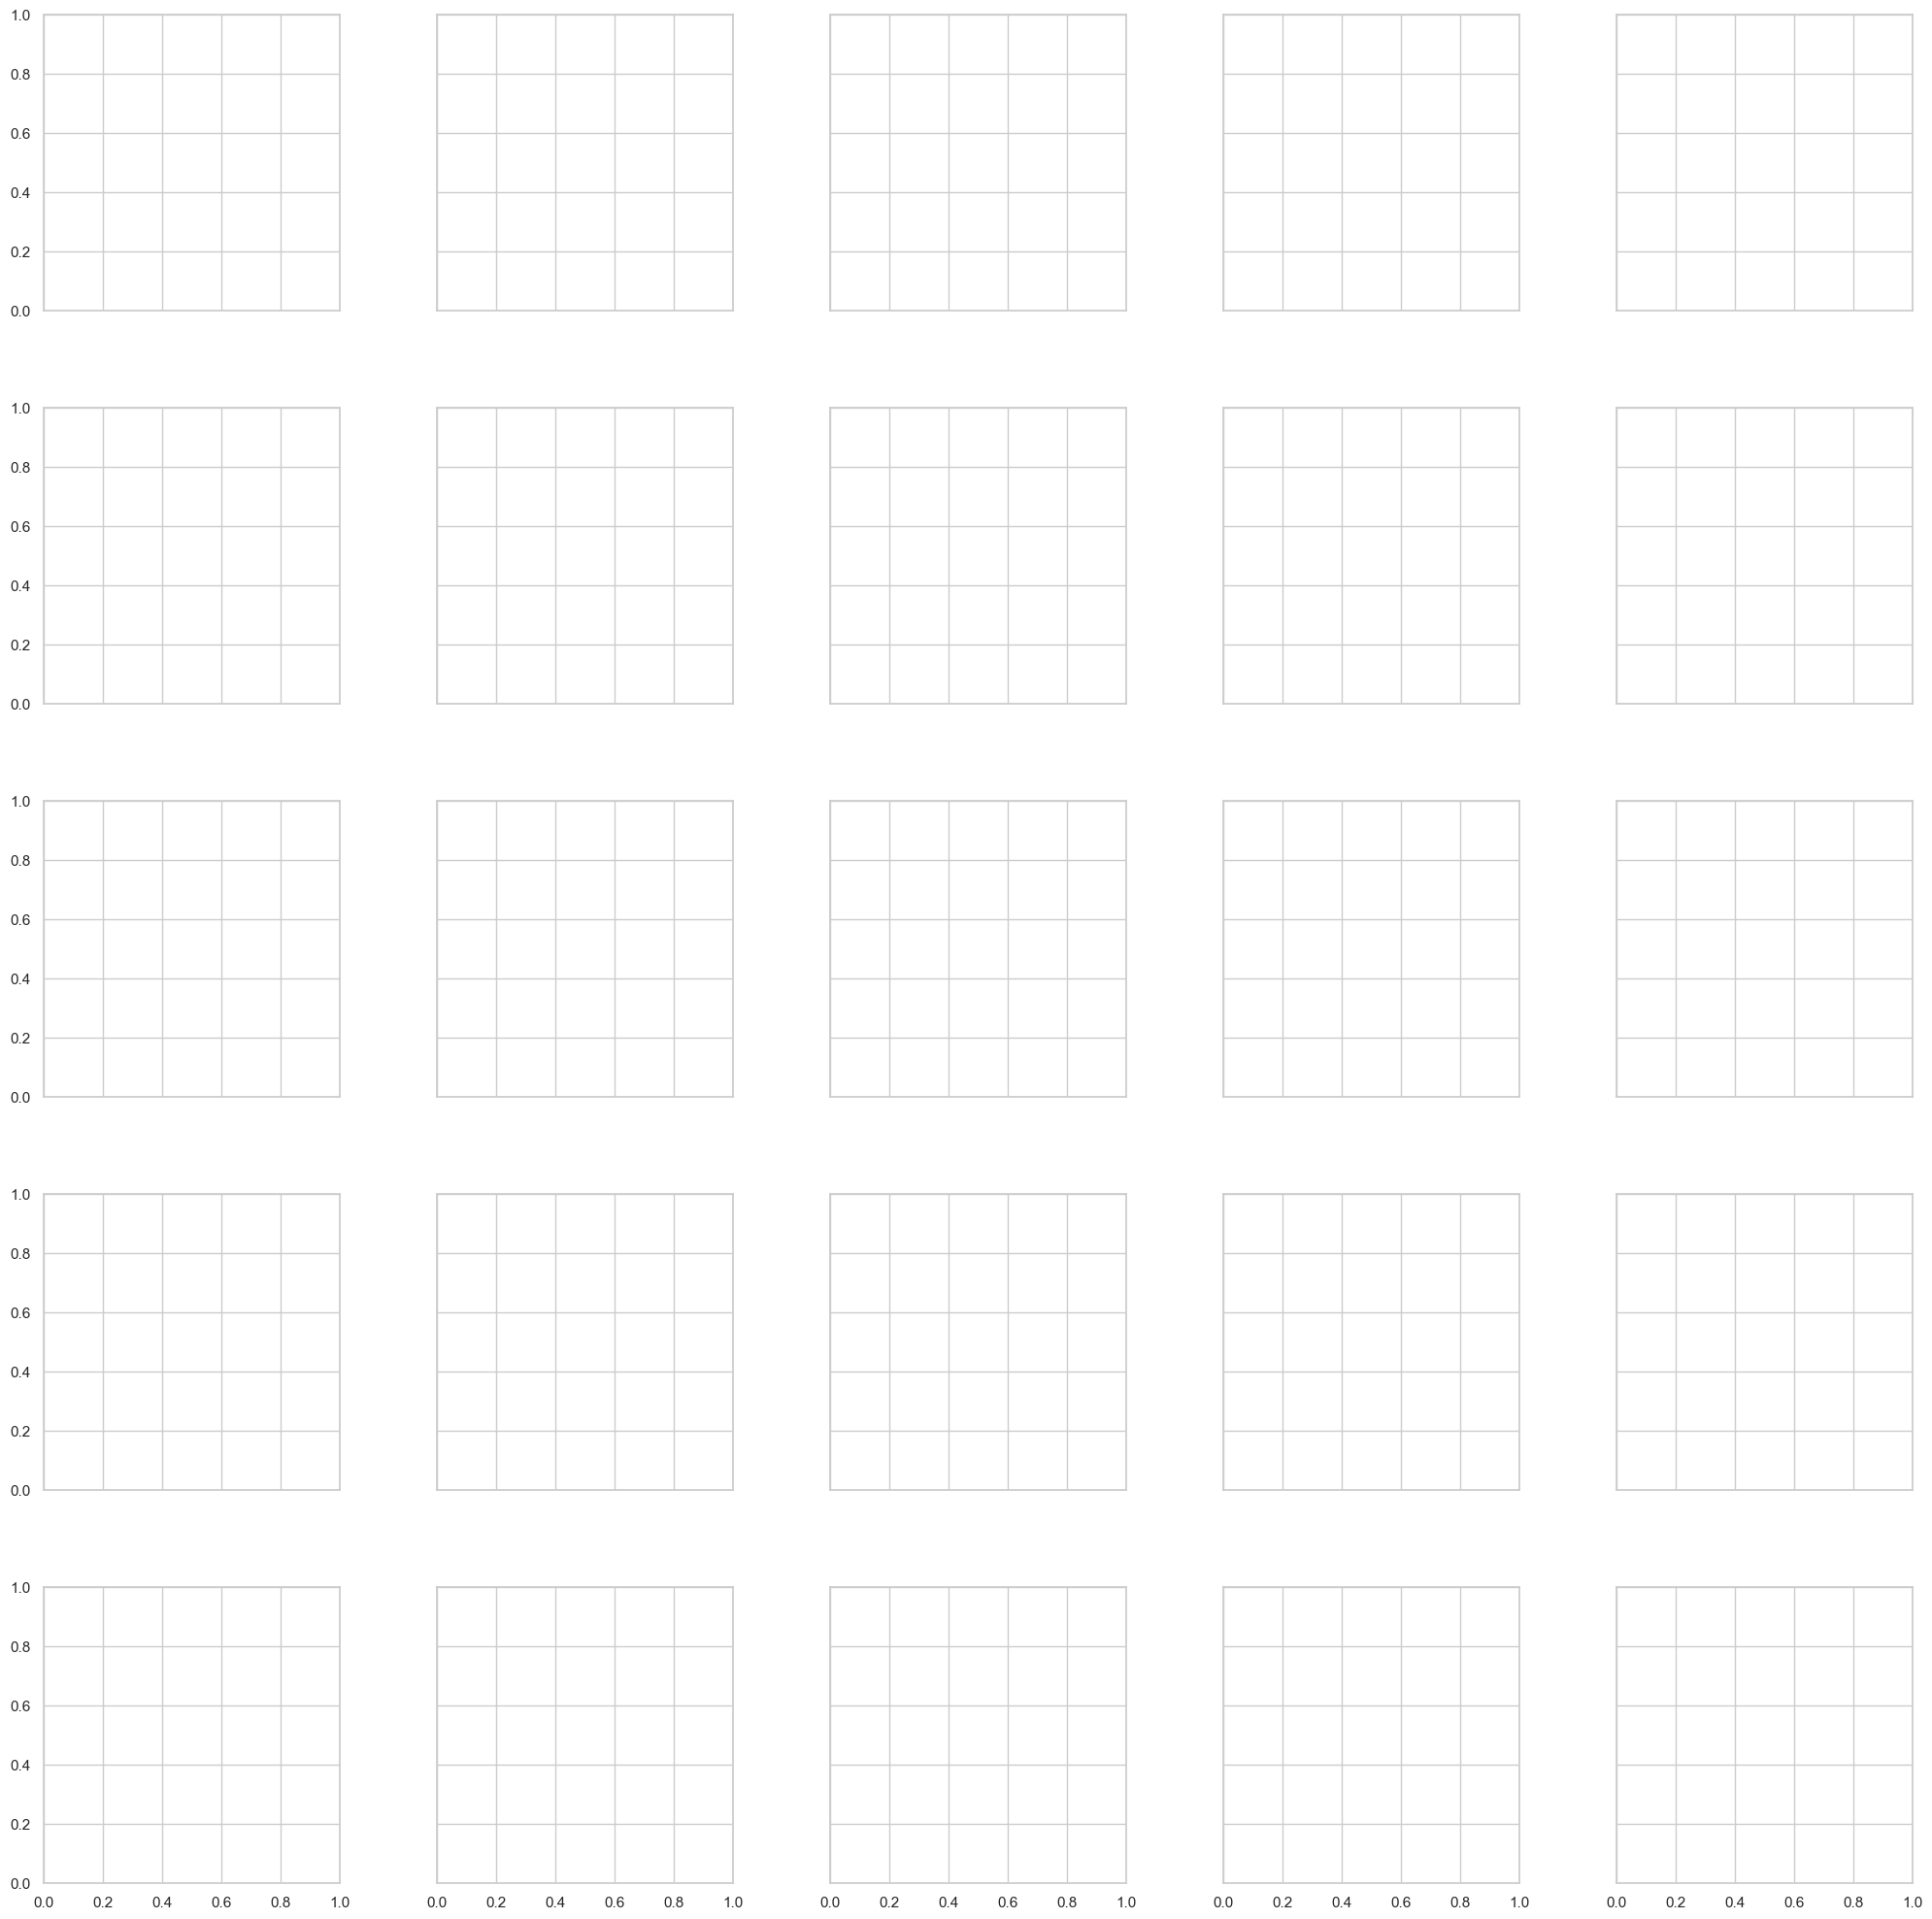

Rank 256 Checkpoint 500


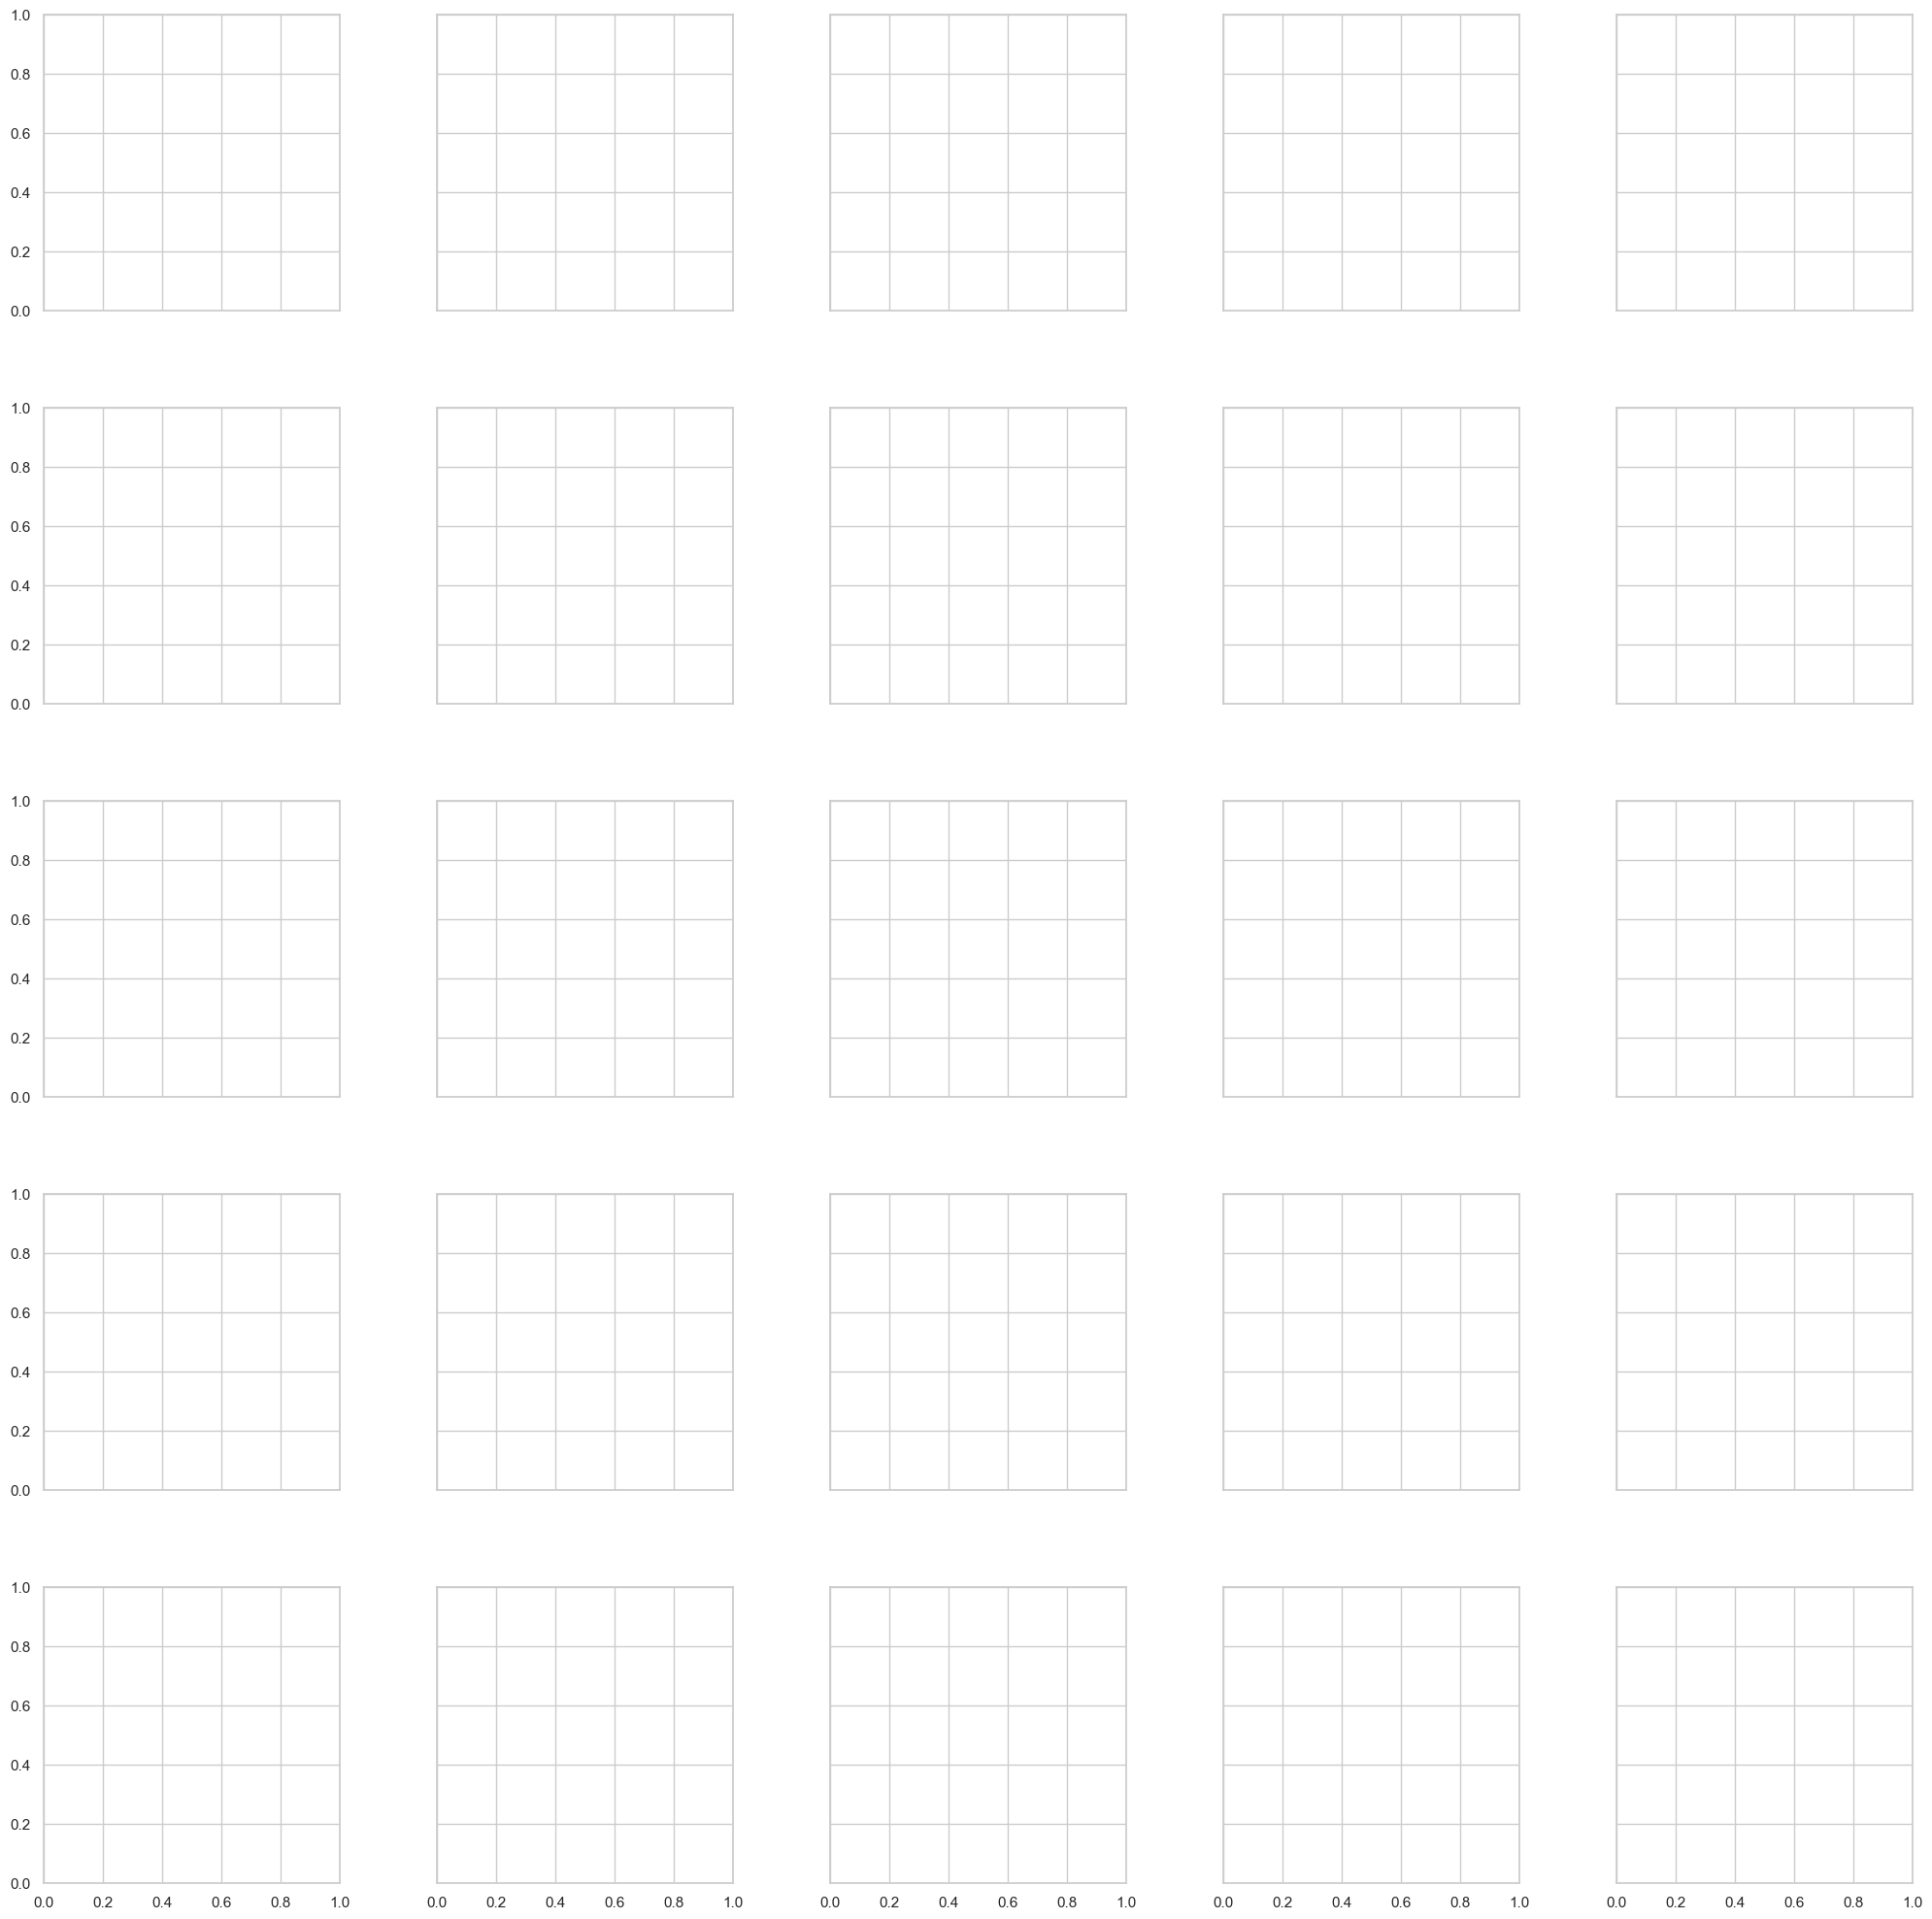

Rank 256 Checkpoint 1000


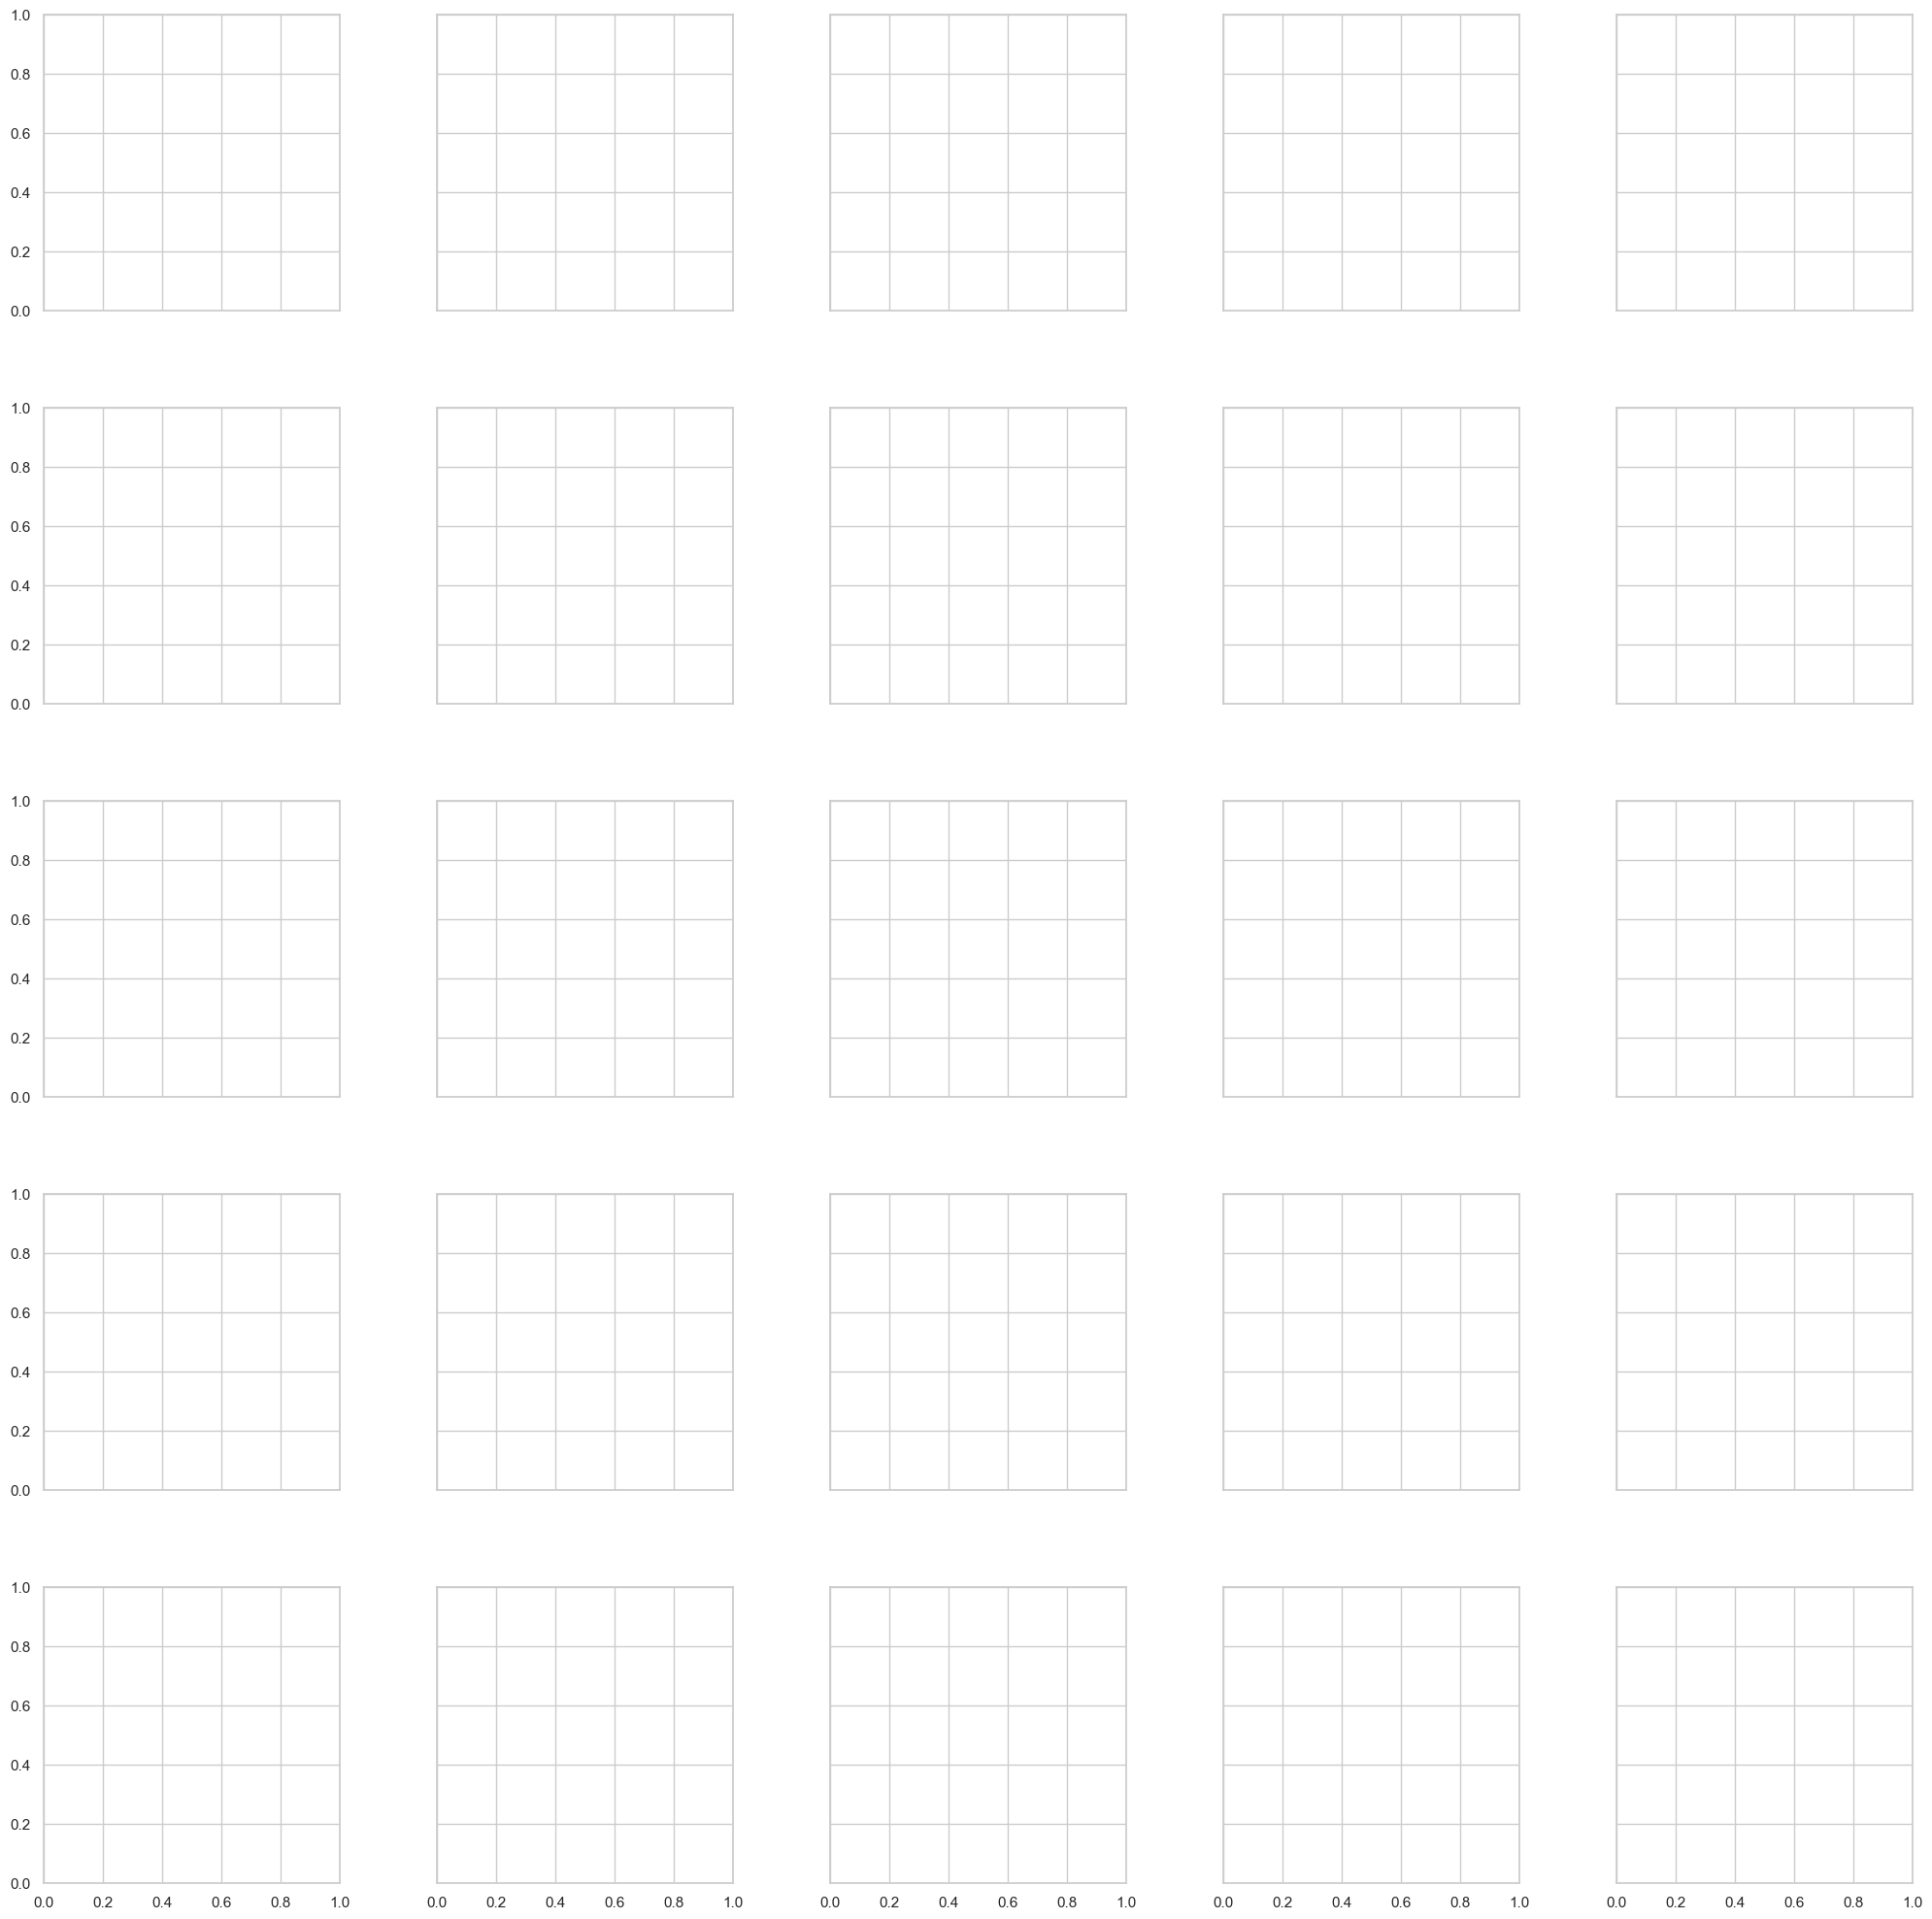

Rank 256 Checkpoint 2000


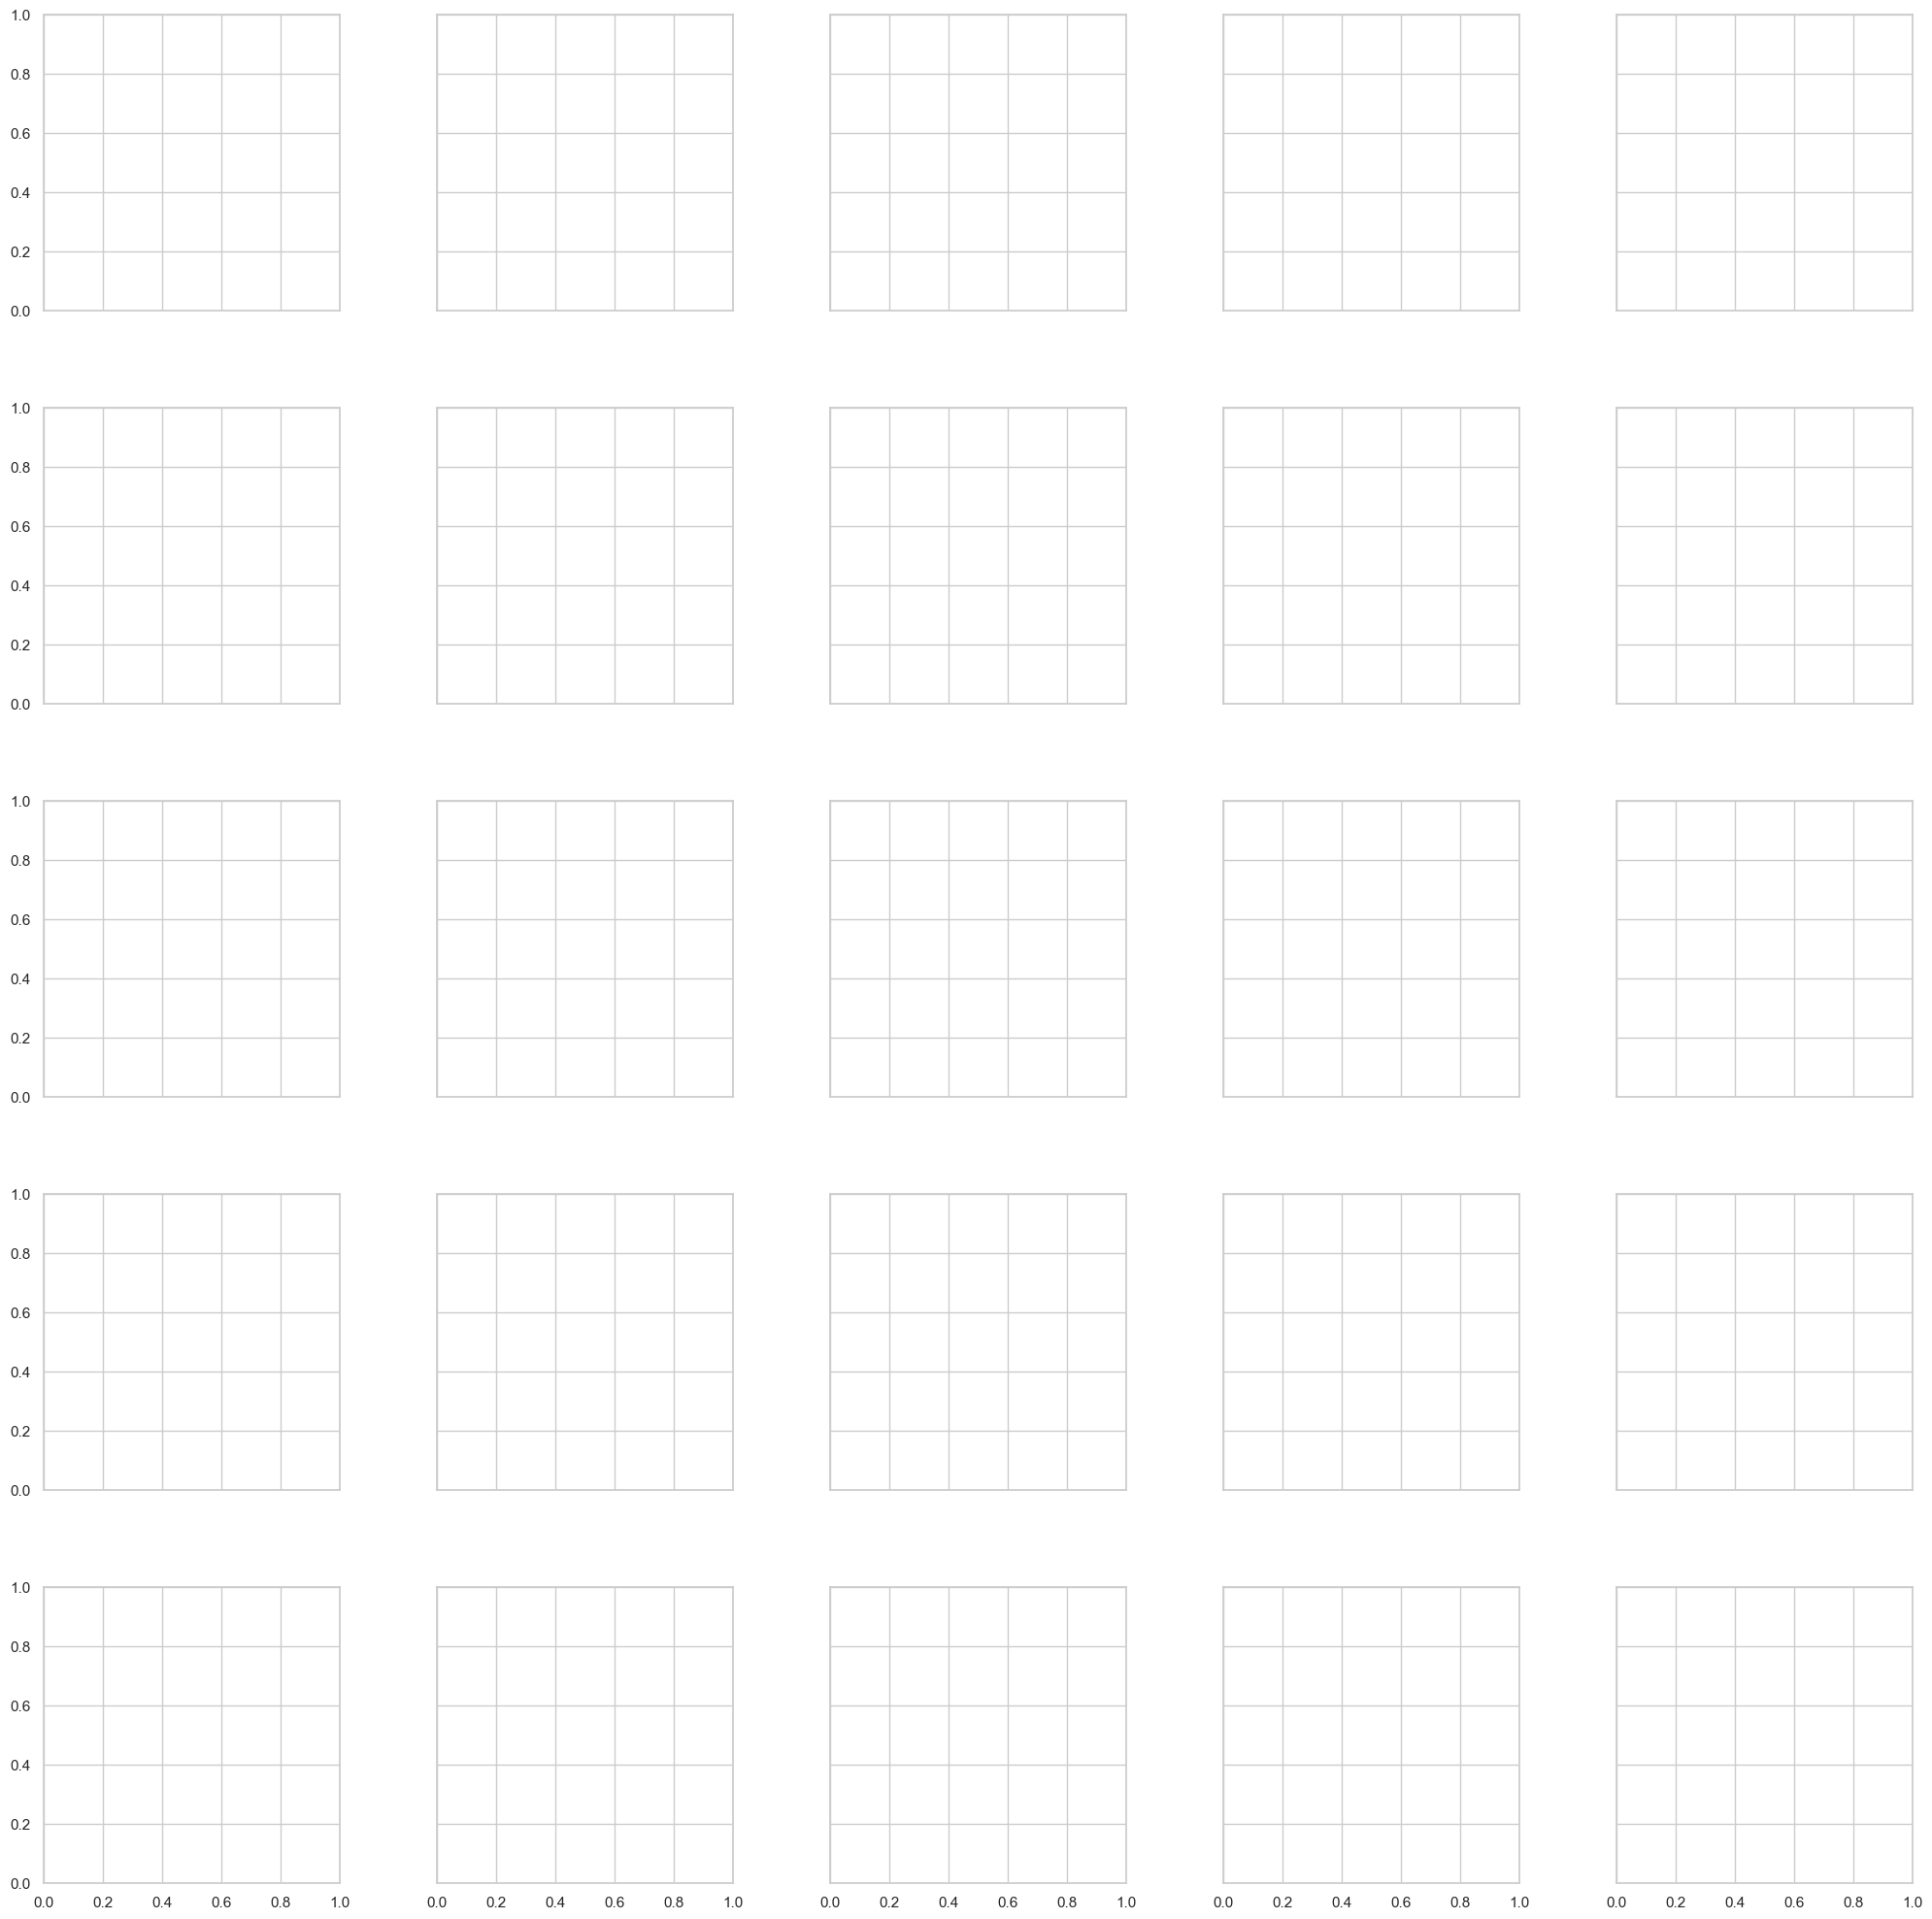

In [27]:
for i in range(2, 9):
    for c in [500, 1000, 2000]:
        j = 2 ** i
        examples = get_examples(f'../inference/generated_images/dog/t2i/lora_checkpoint_{c}_rank_{j}')
        print(f"Rank {j} Checkpoint {c}")
        draw_examples(examples)

Concept: backpack

Rank 4 Checkpoint 500


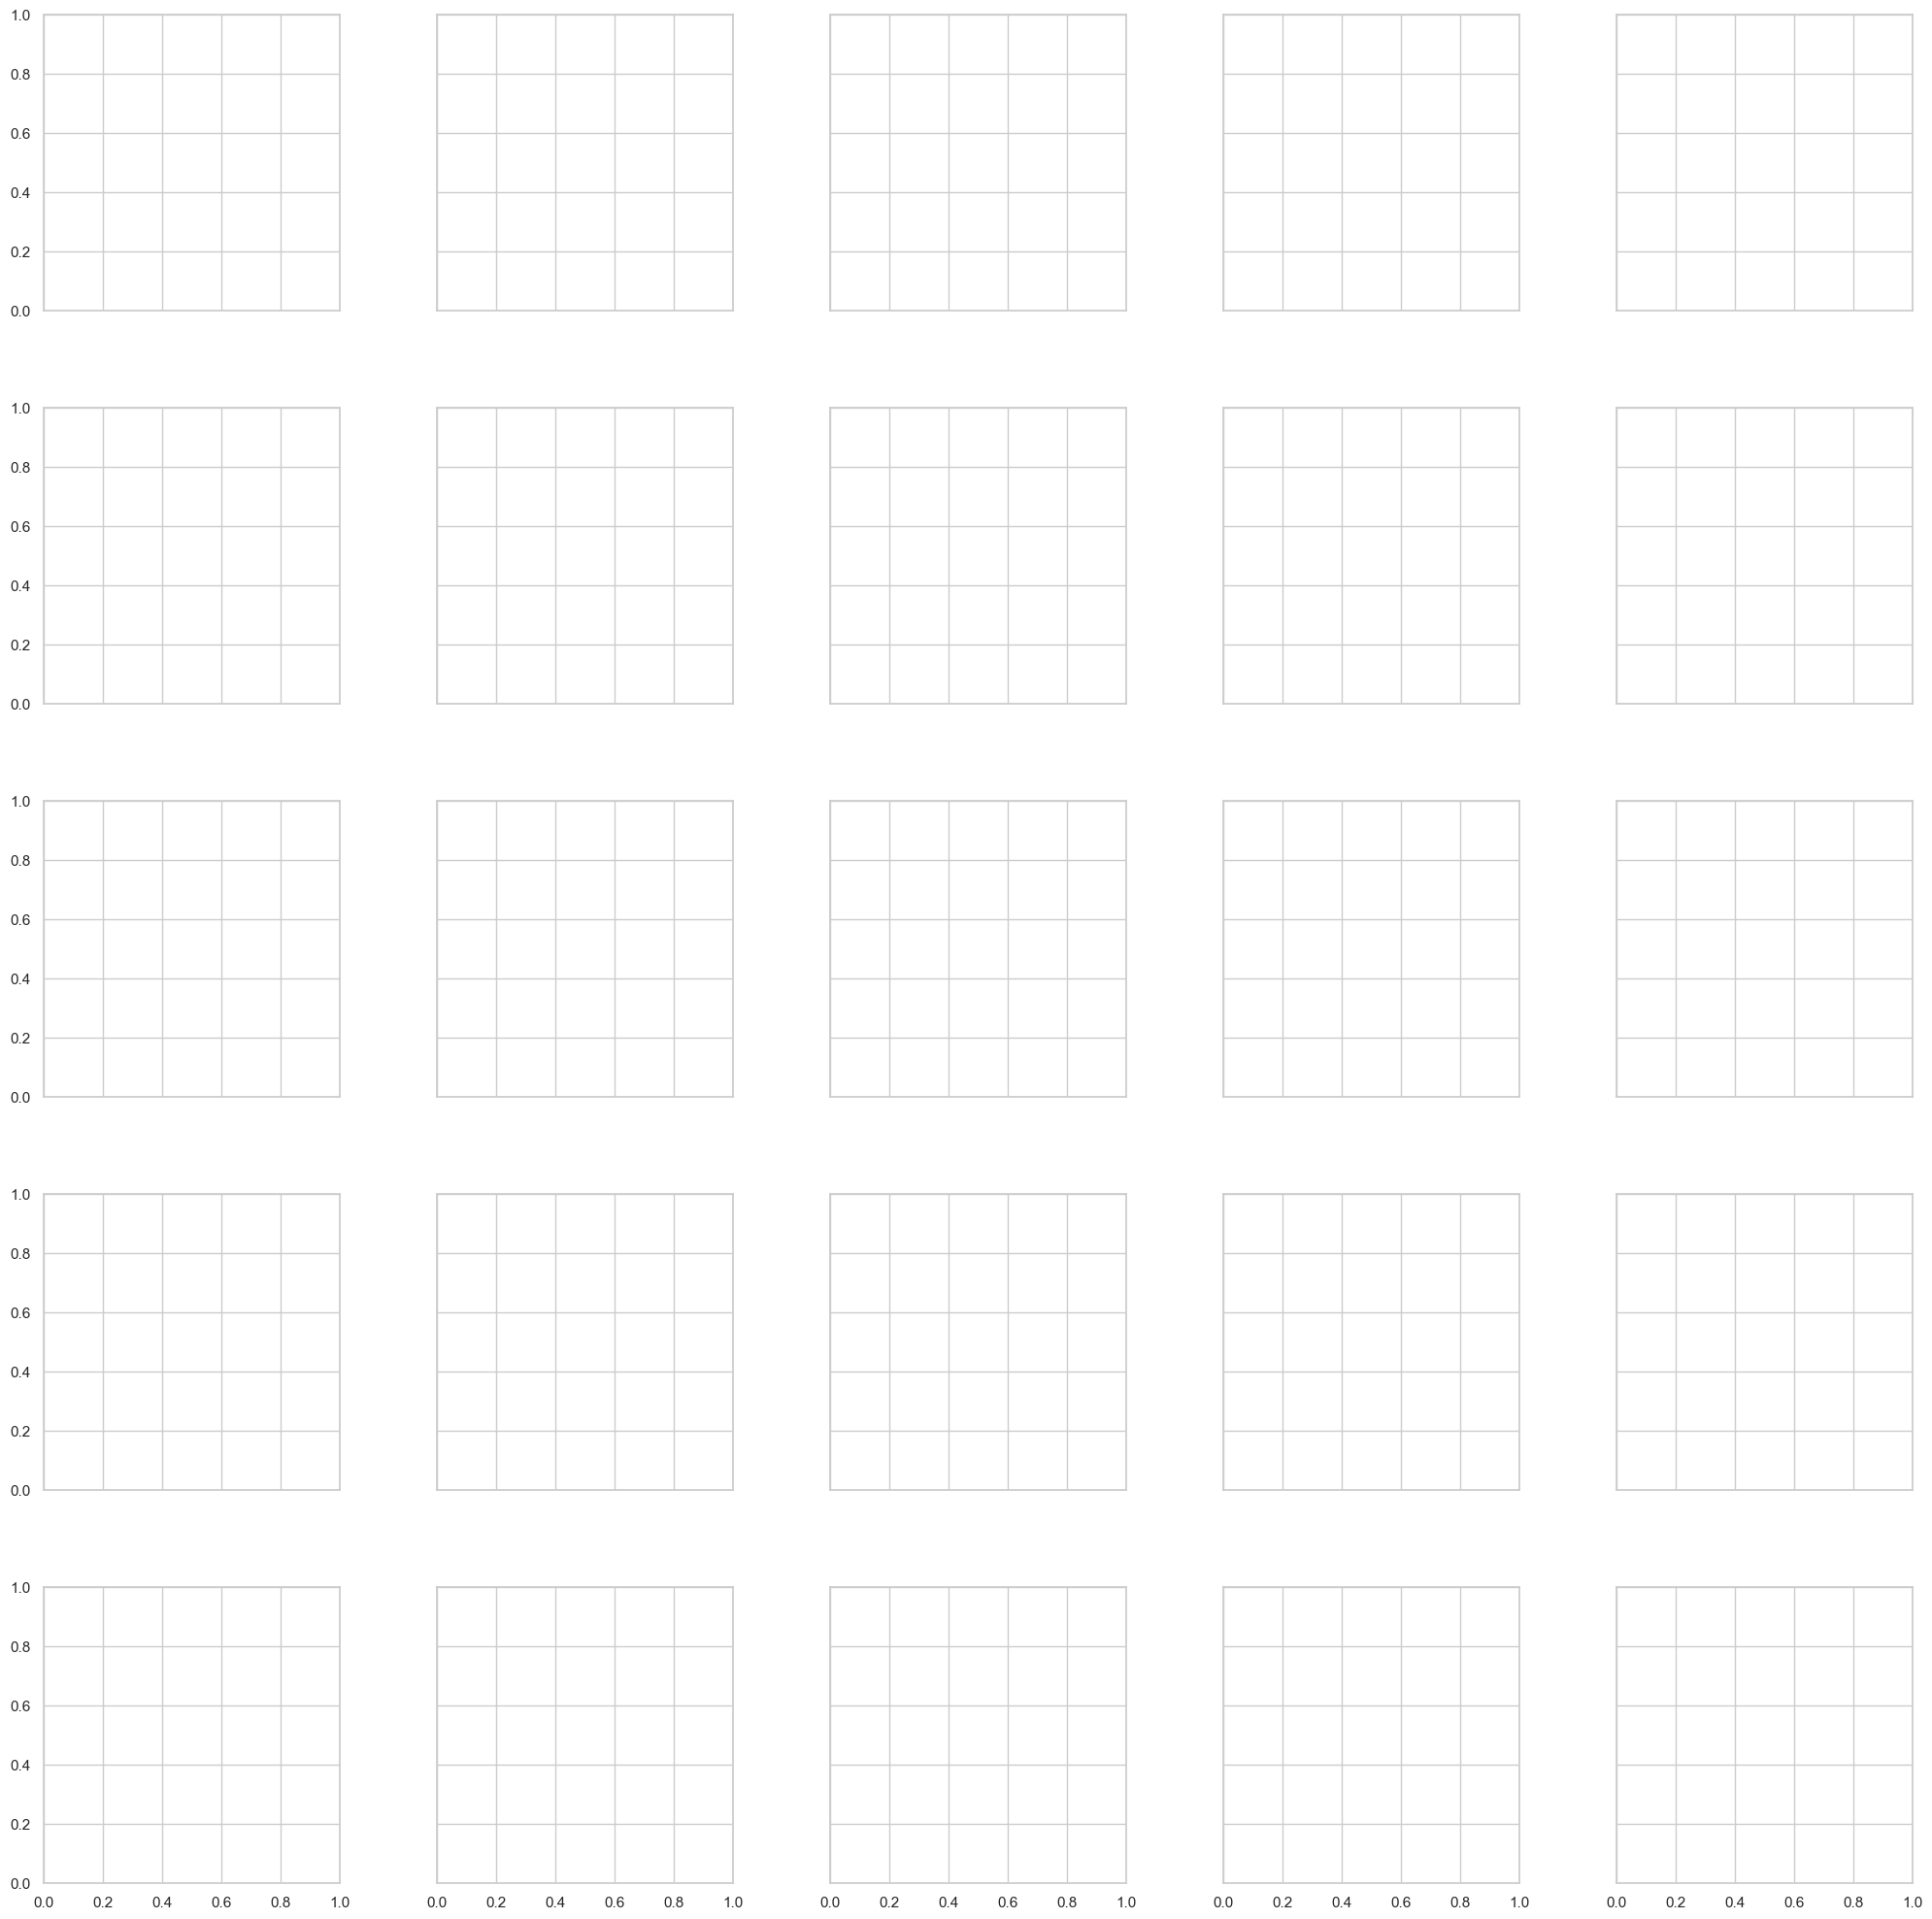

Rank 4 Checkpoint 1000


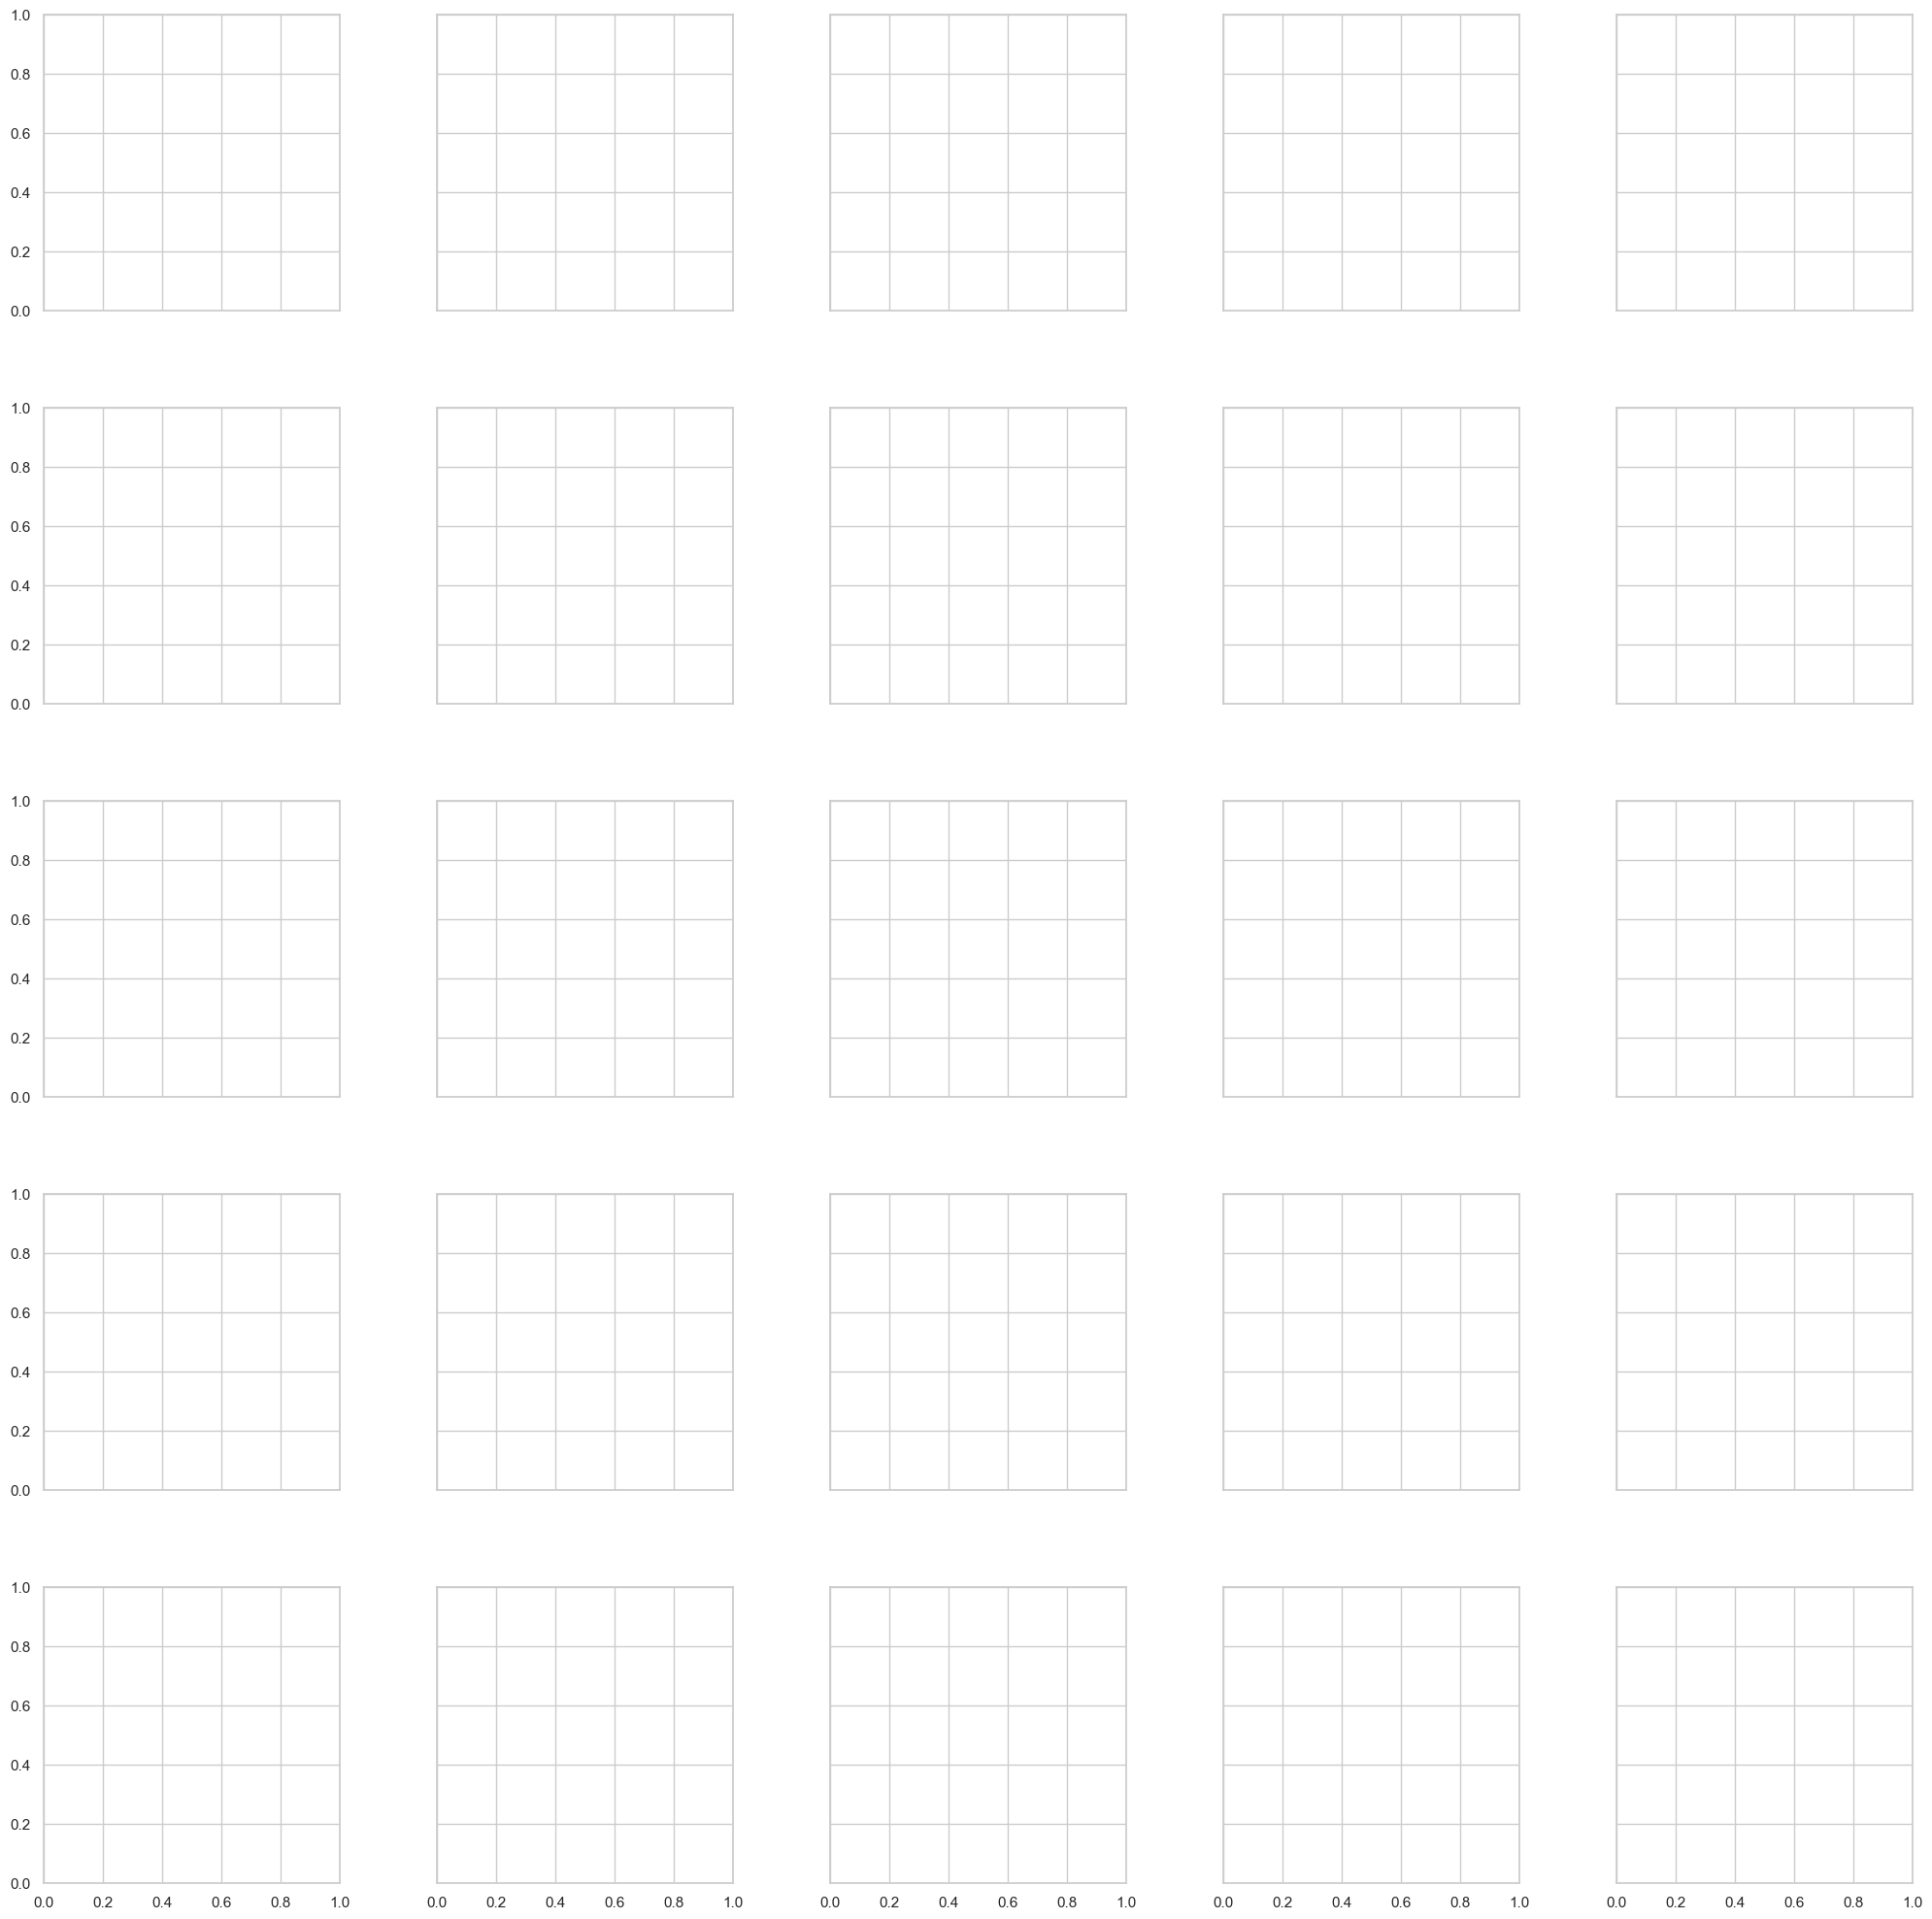

Rank 4 Checkpoint 2000


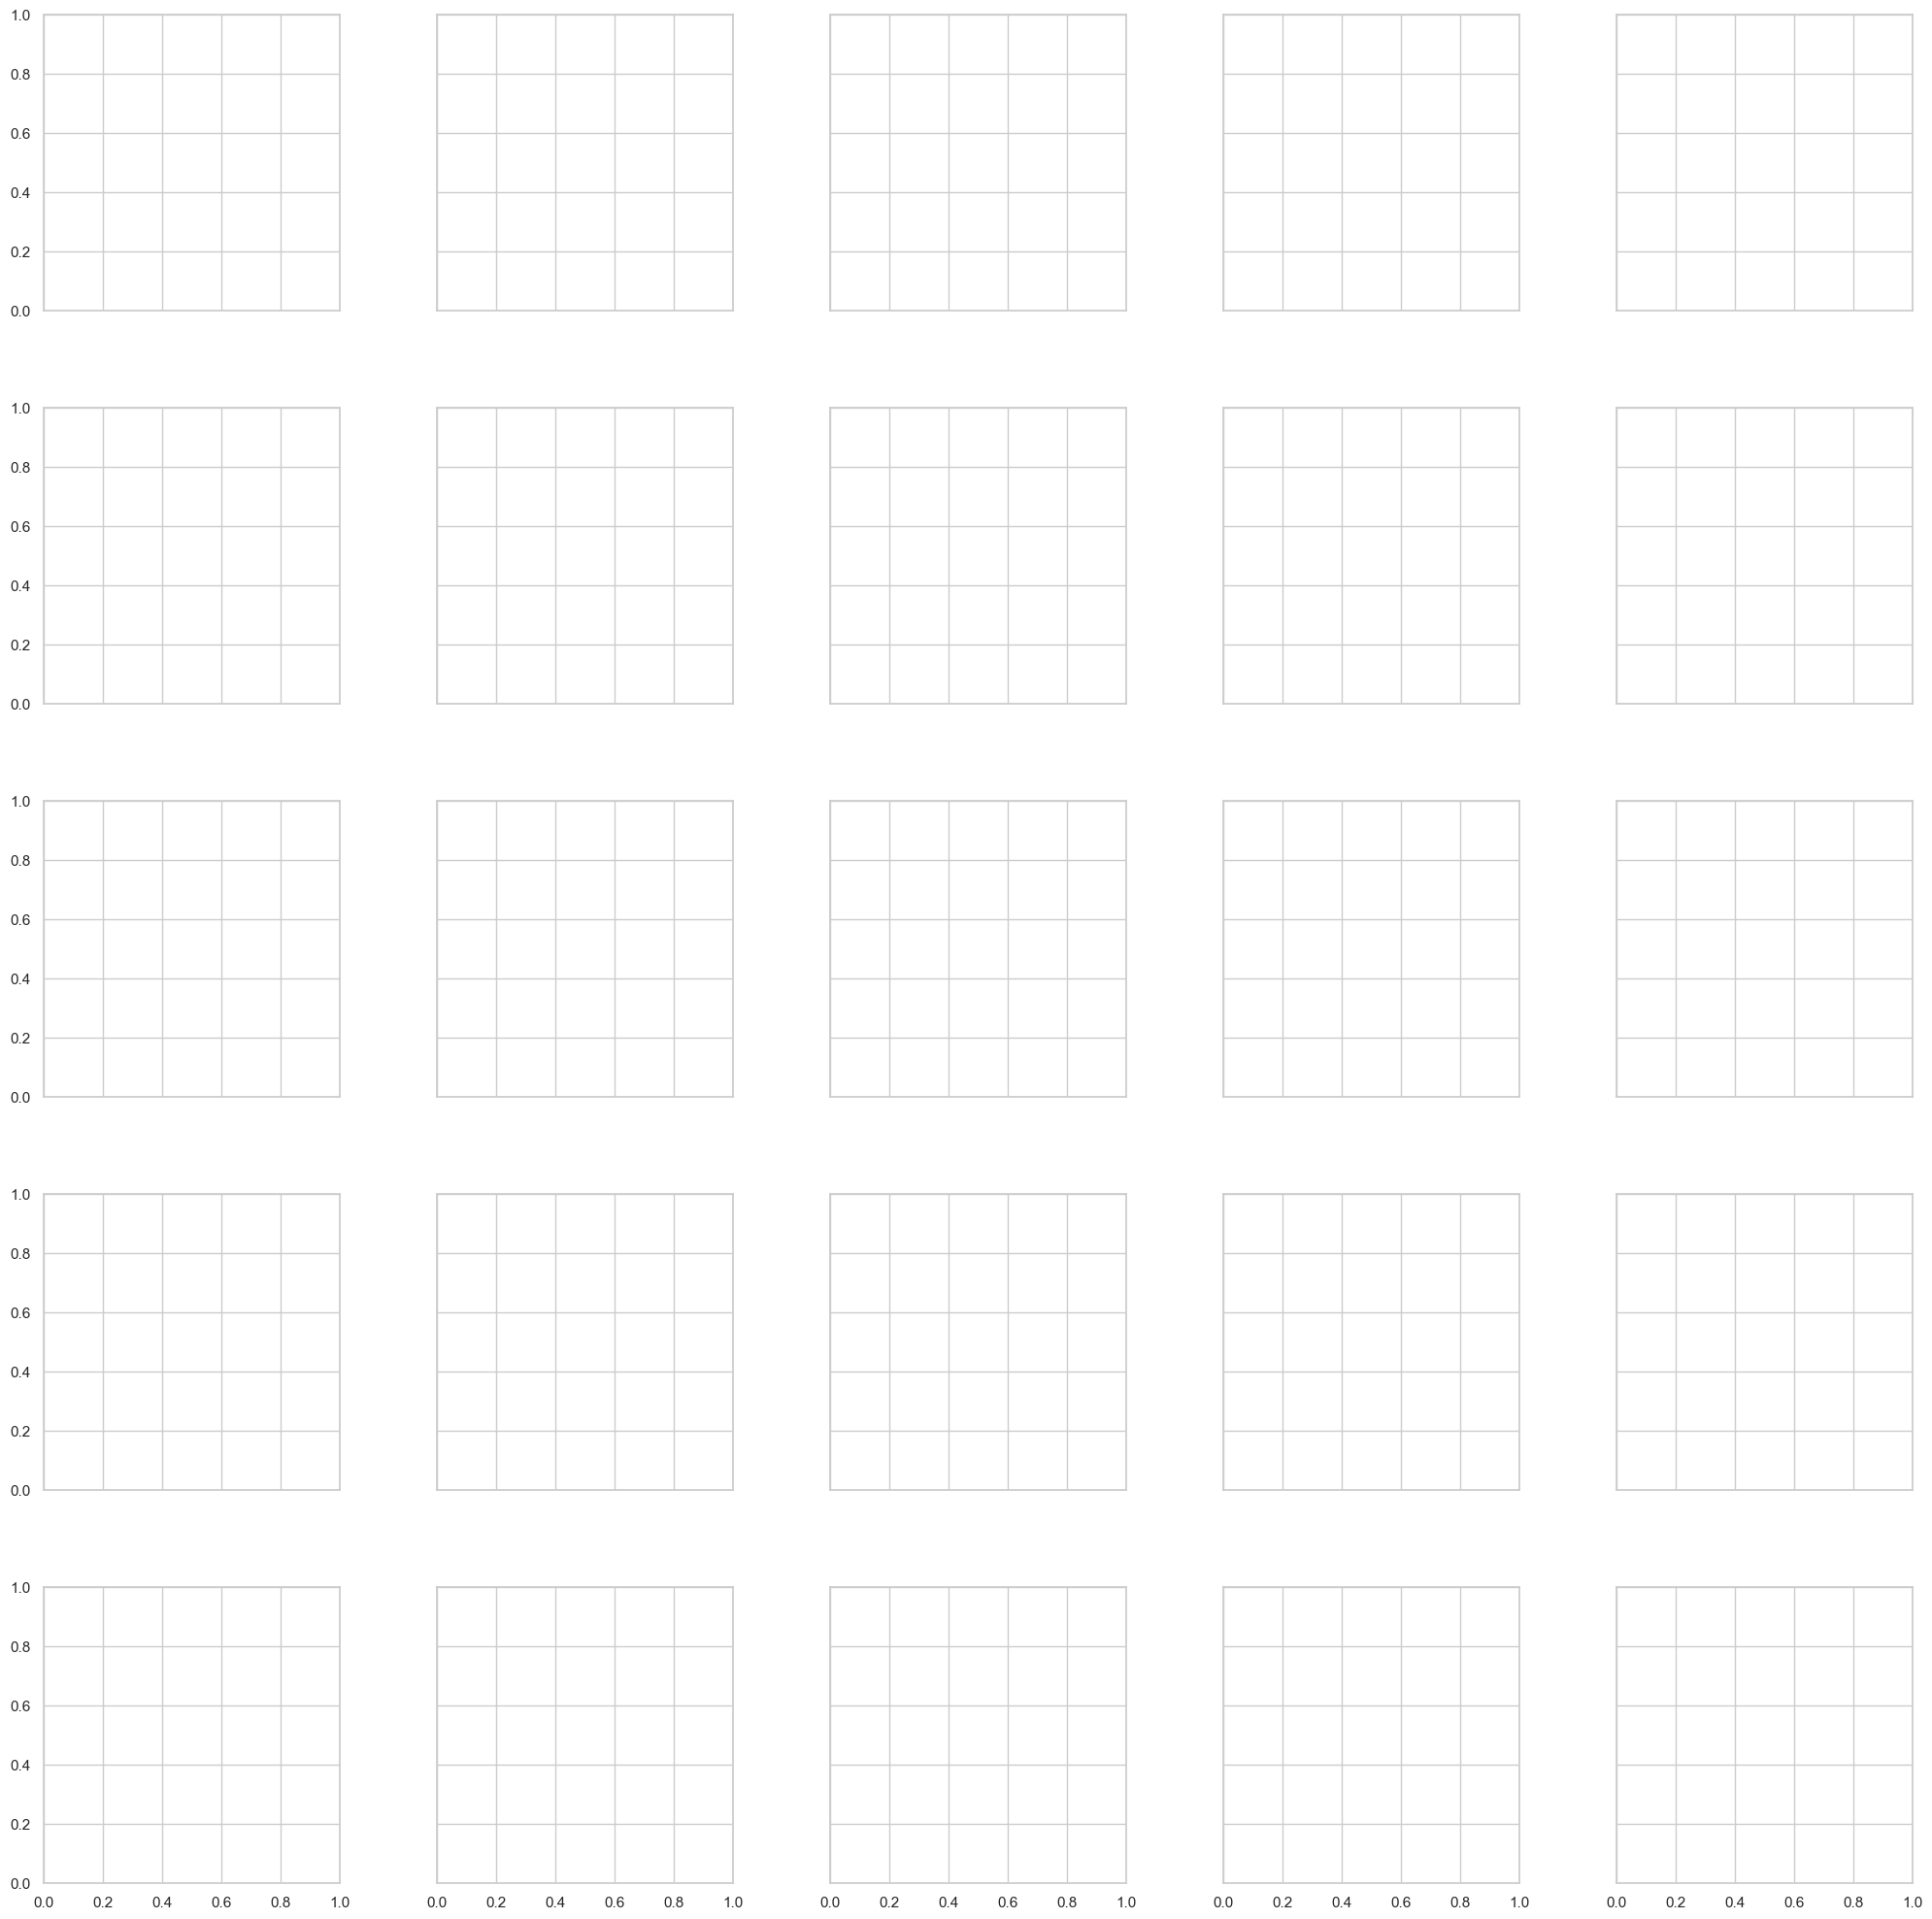

Rank 8 Checkpoint 500


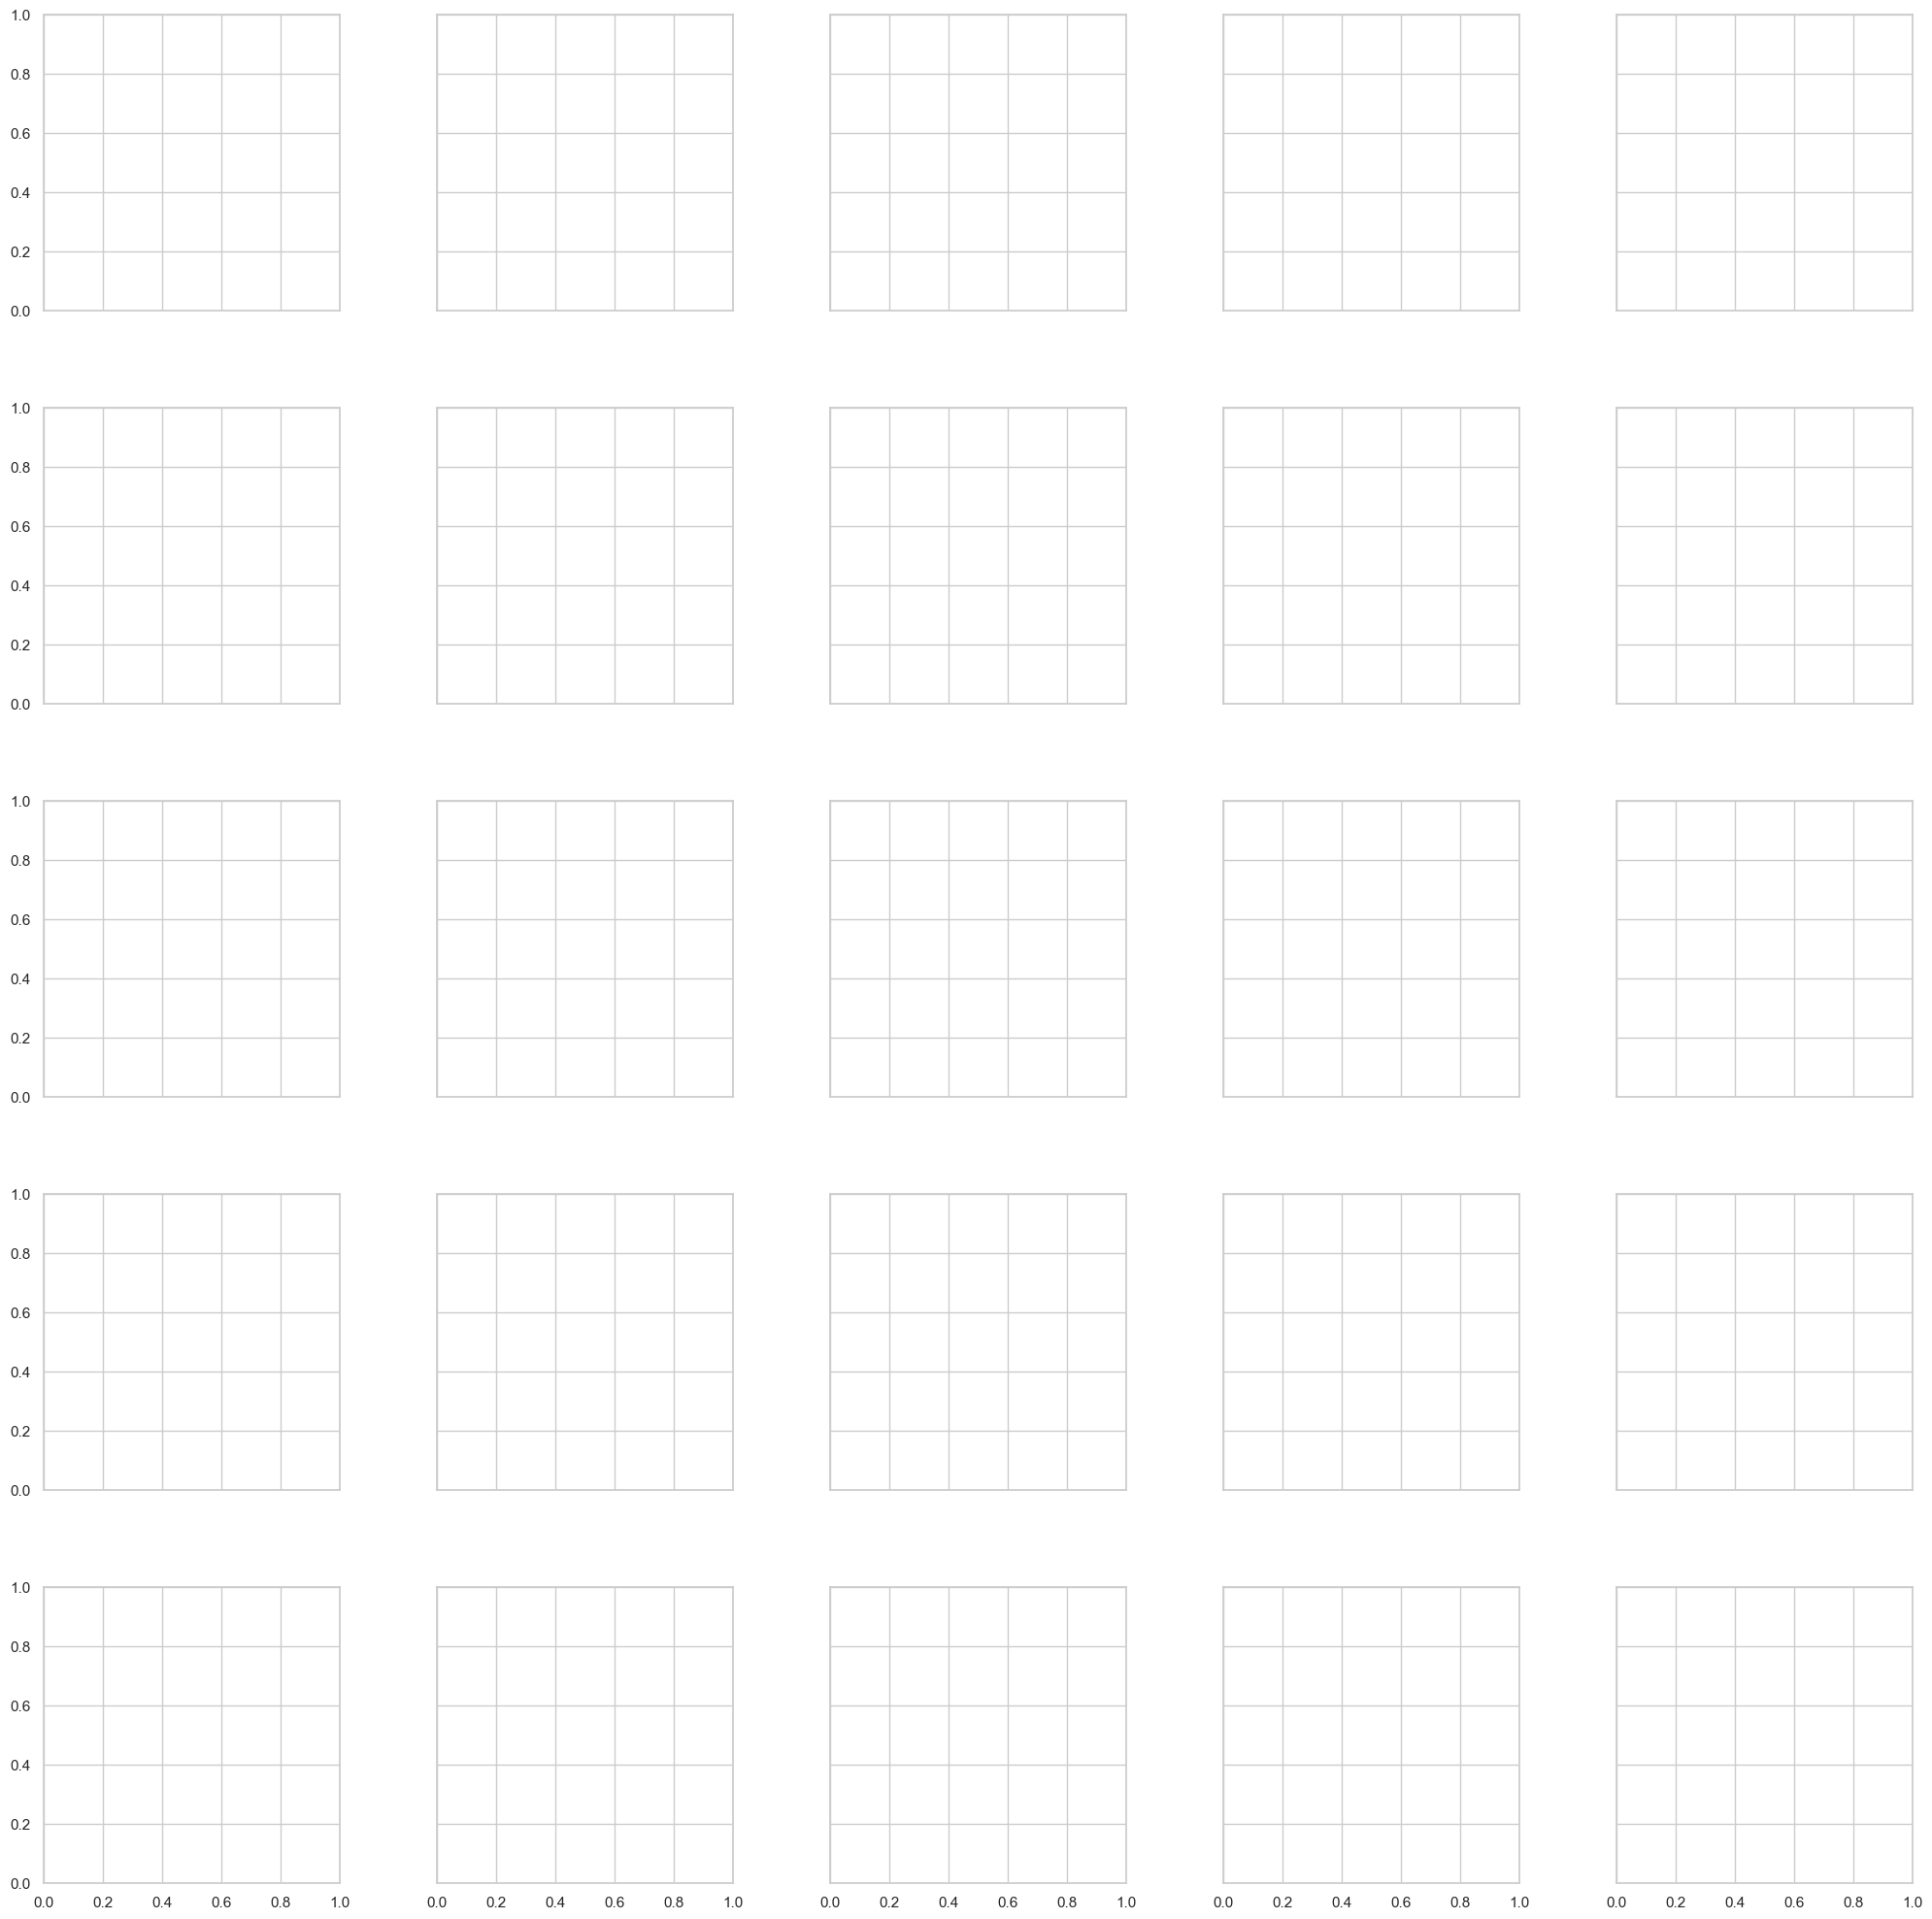

Rank 8 Checkpoint 1000


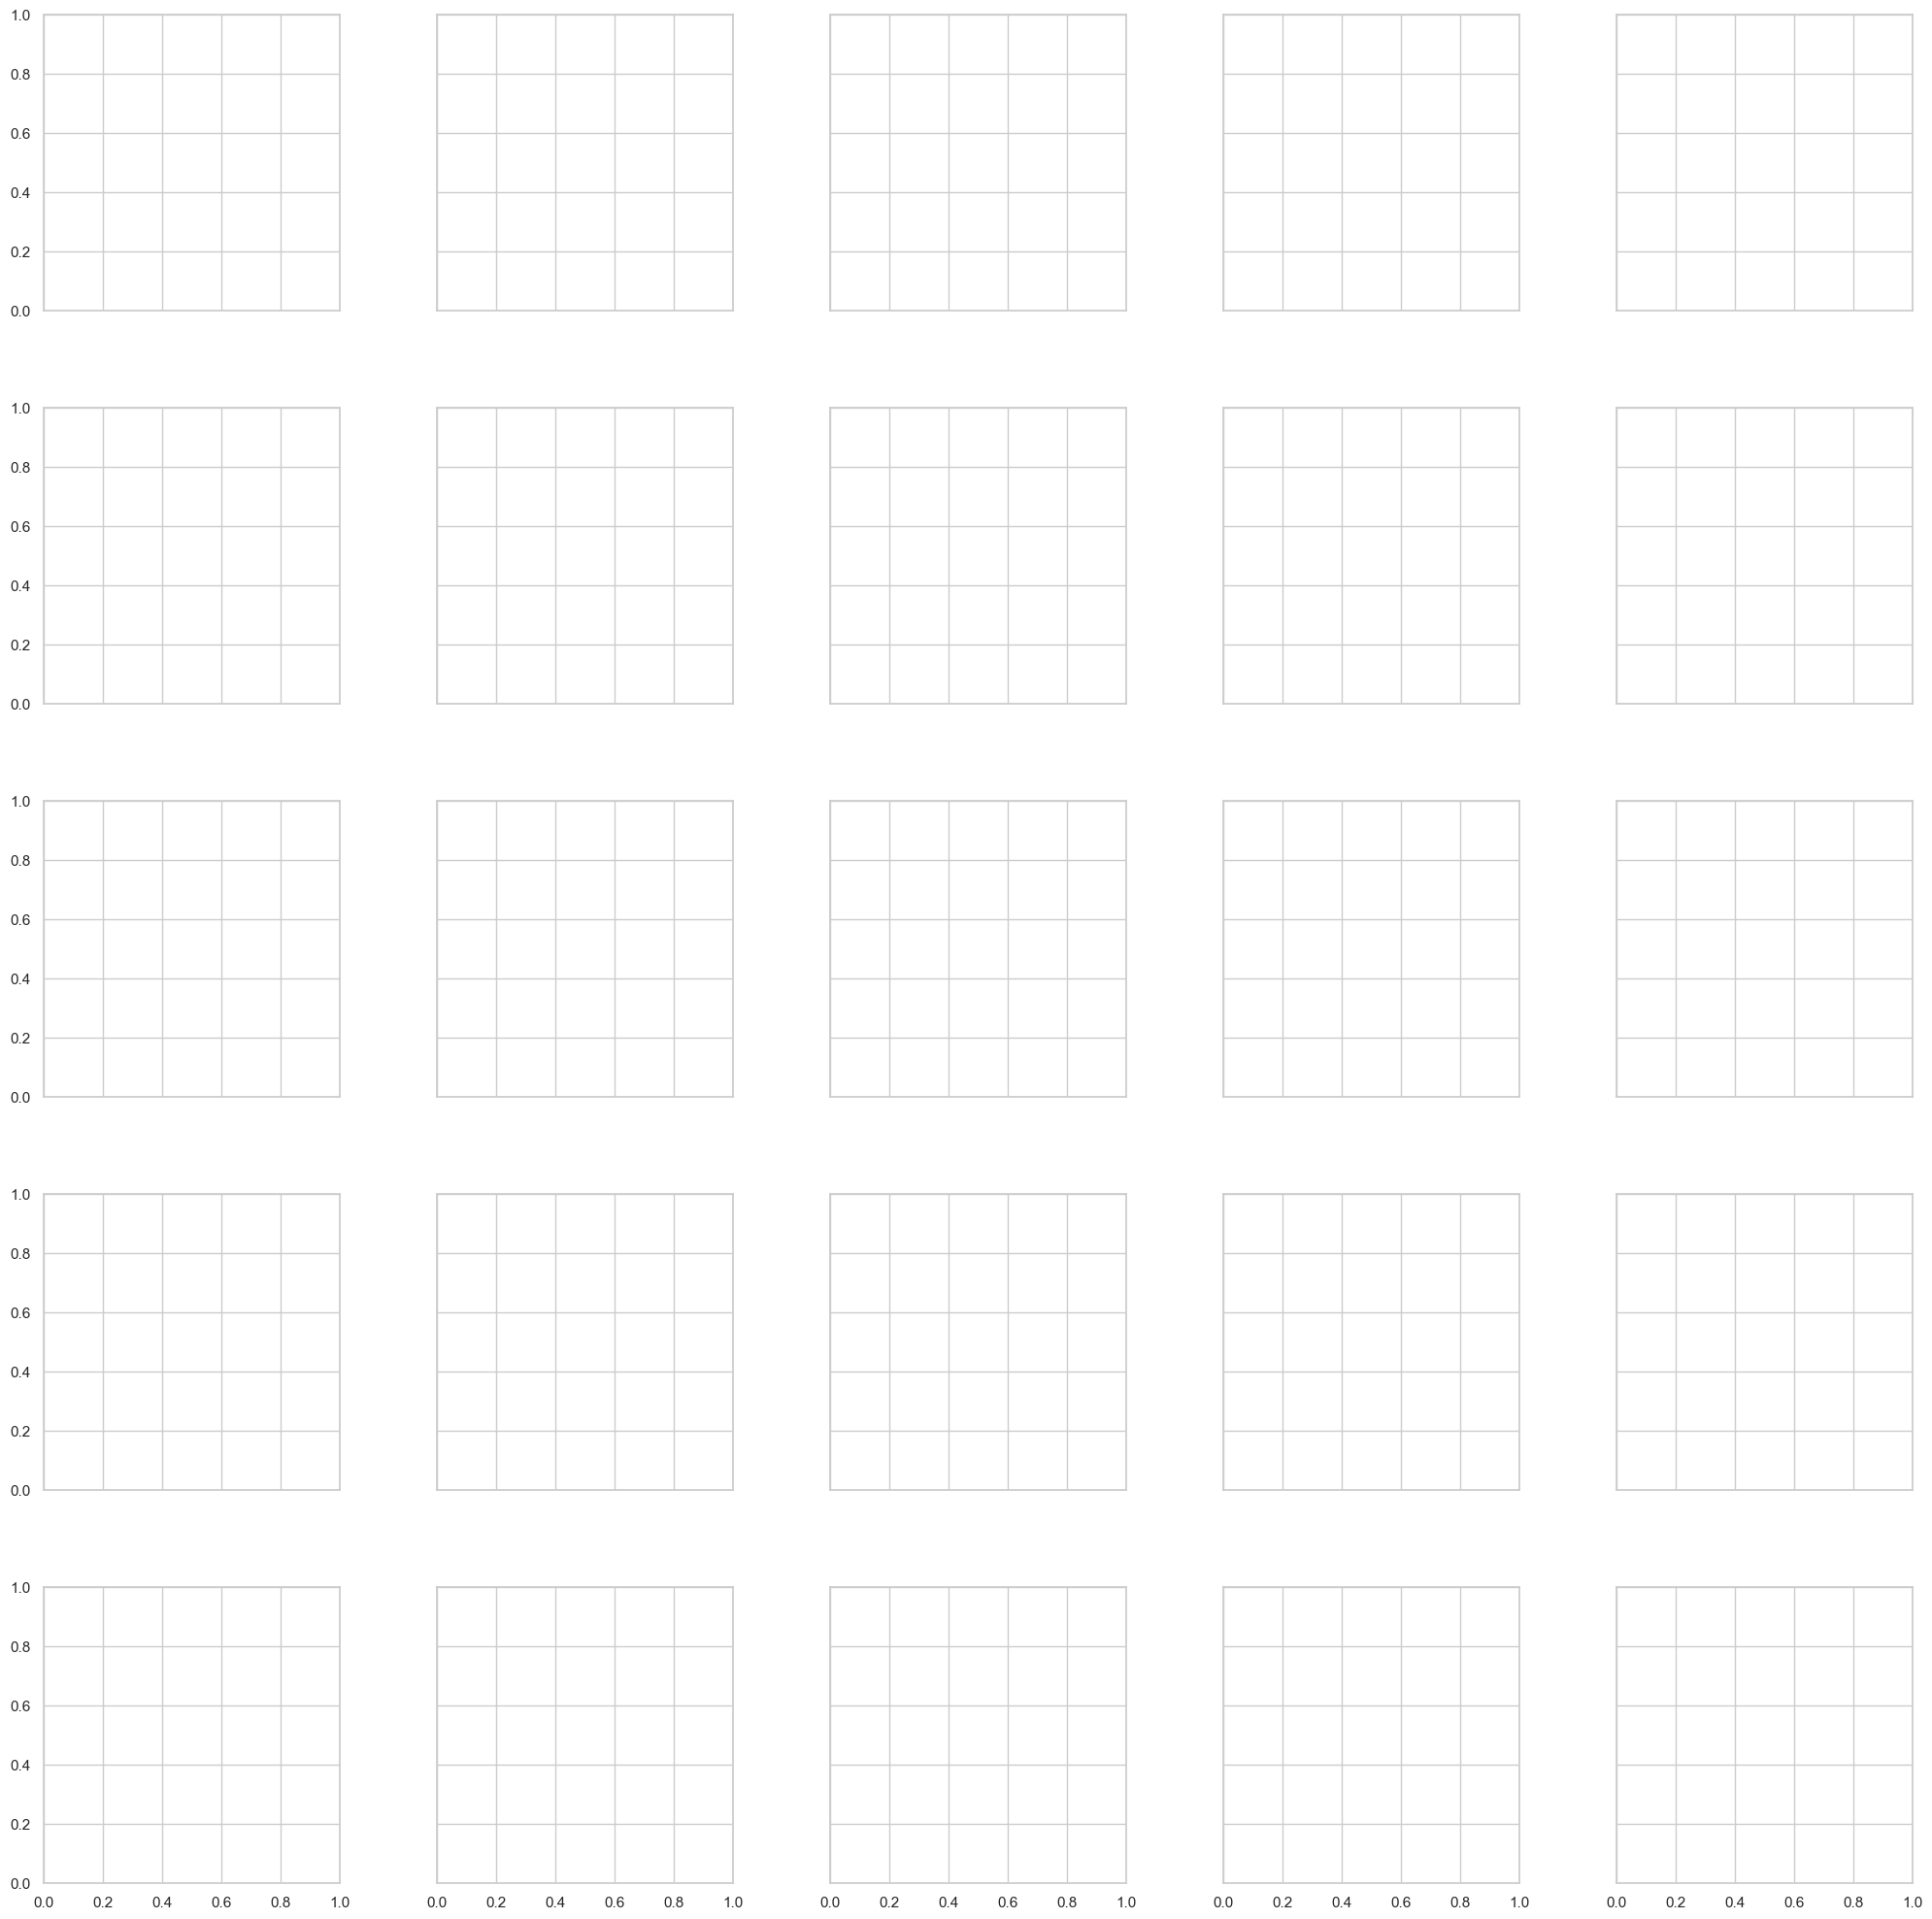

Rank 8 Checkpoint 2000


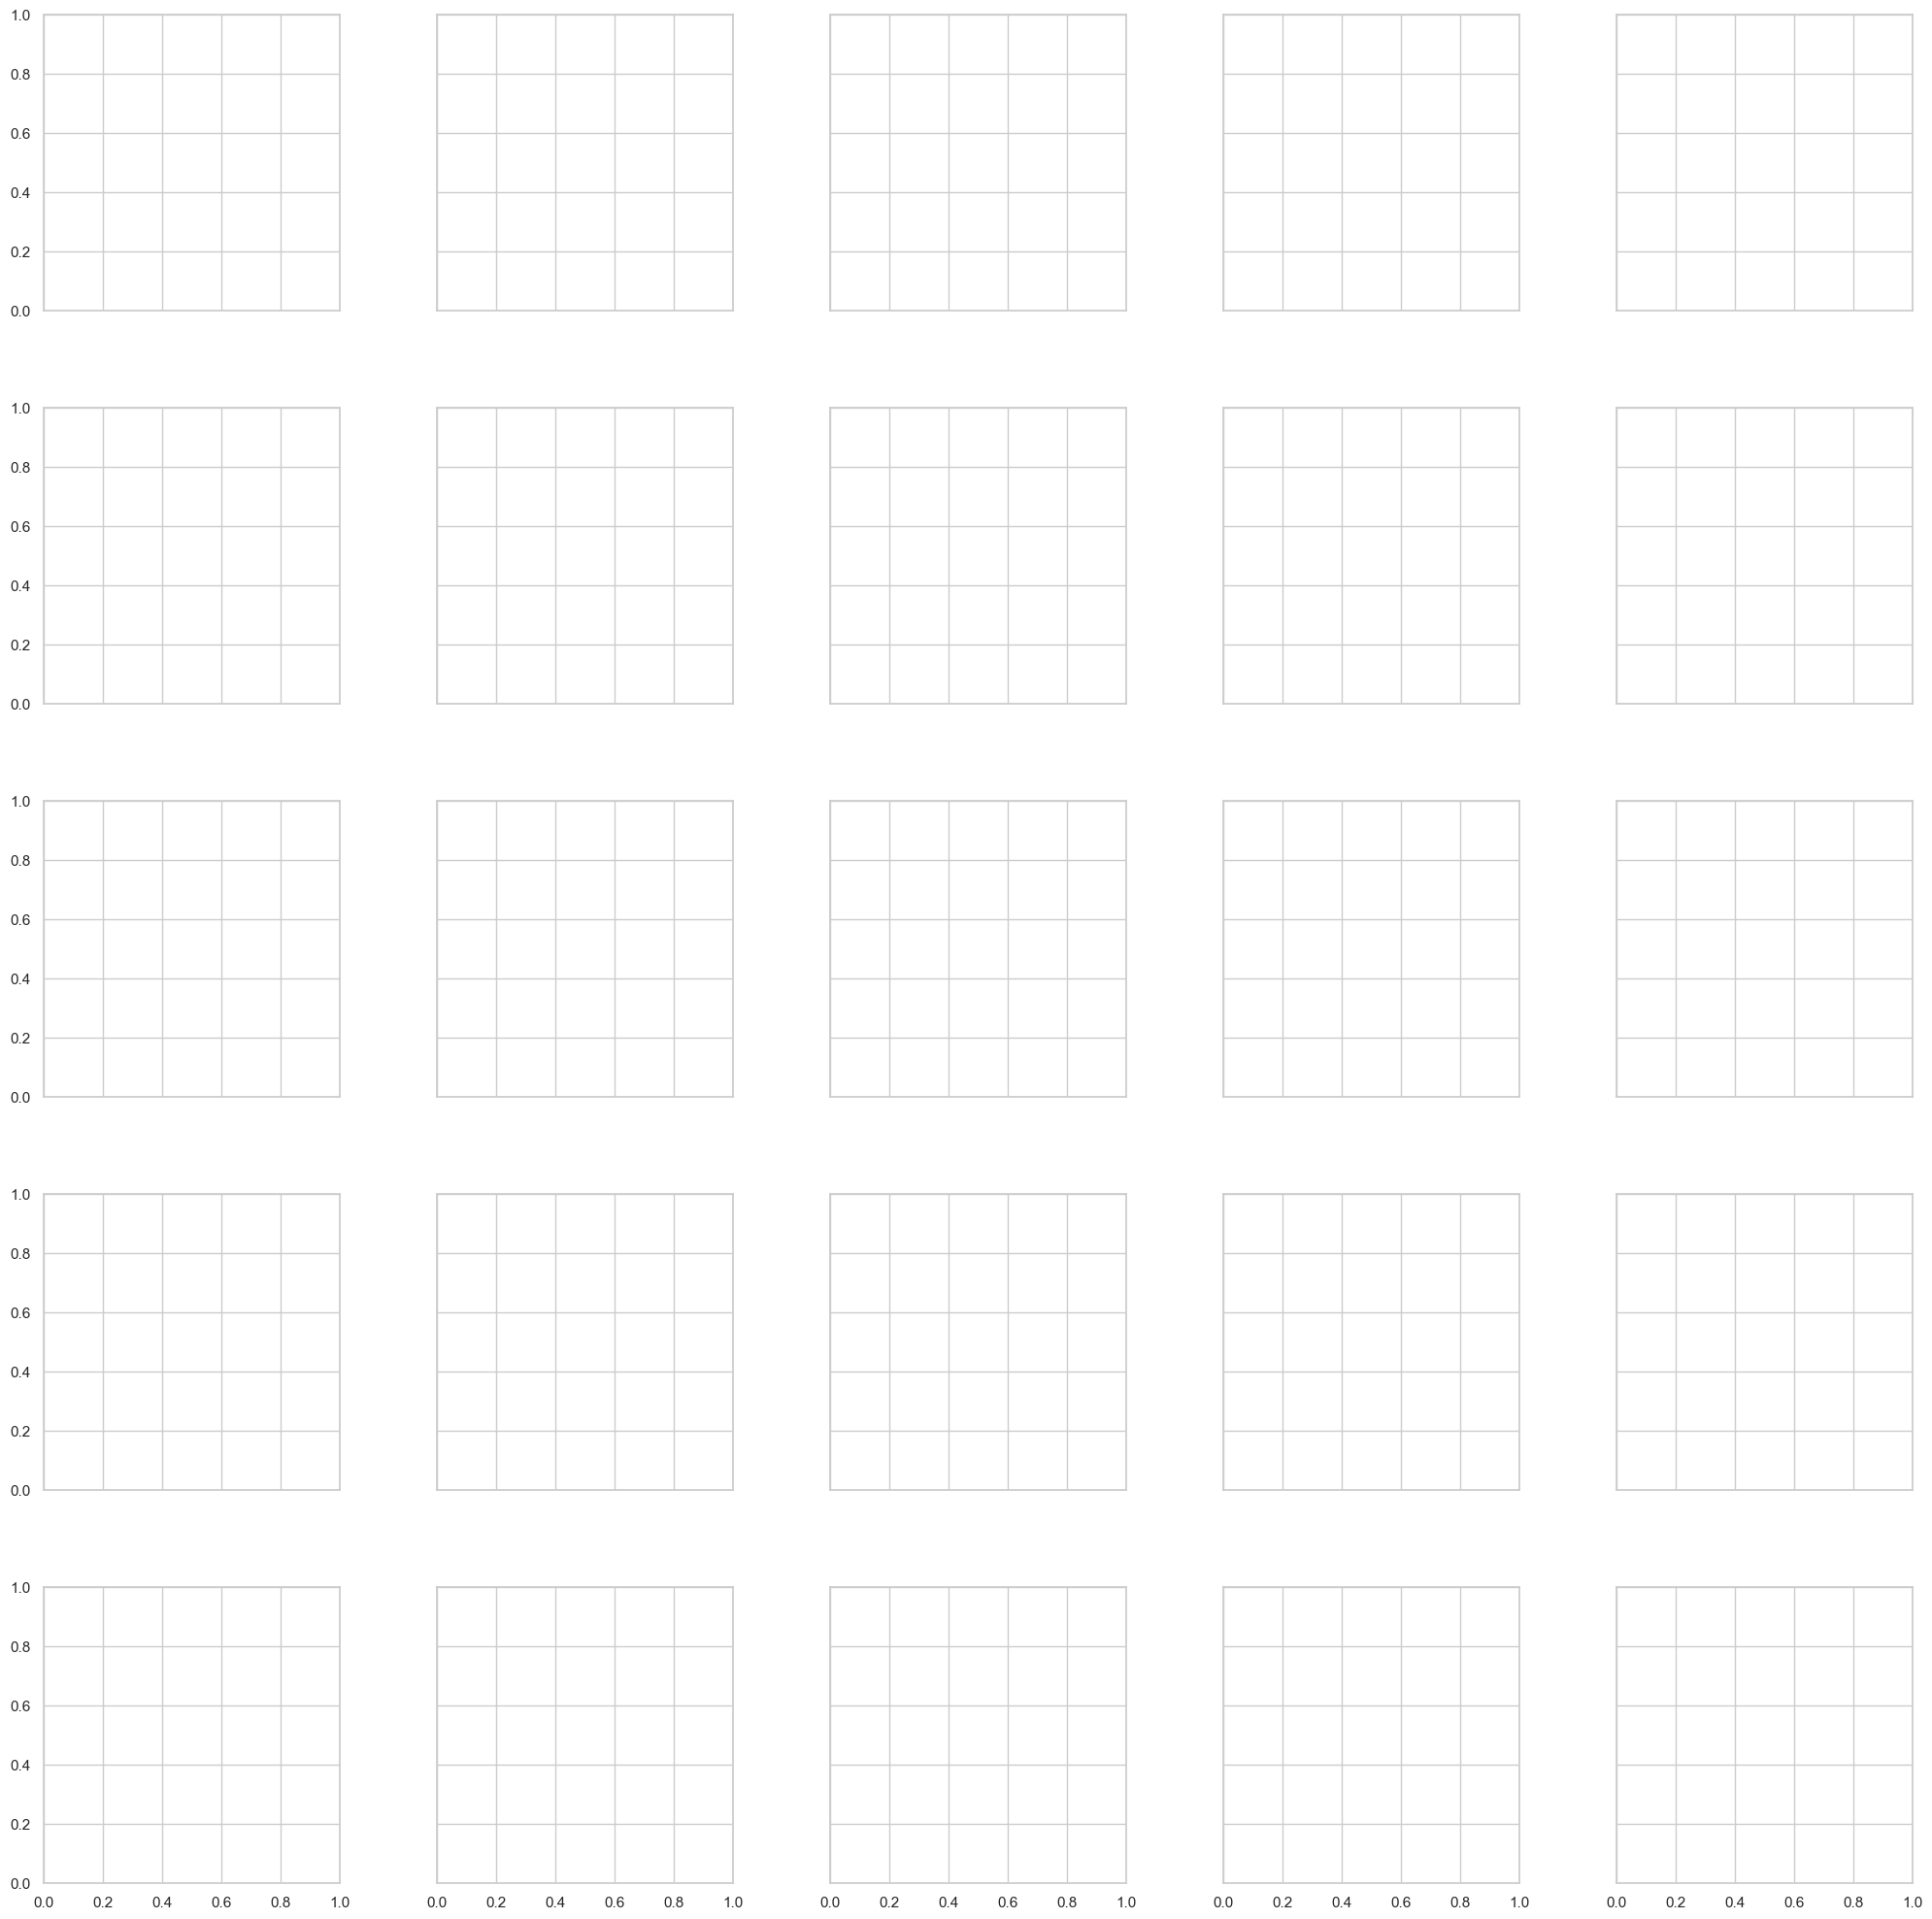

Rank 16 Checkpoint 500


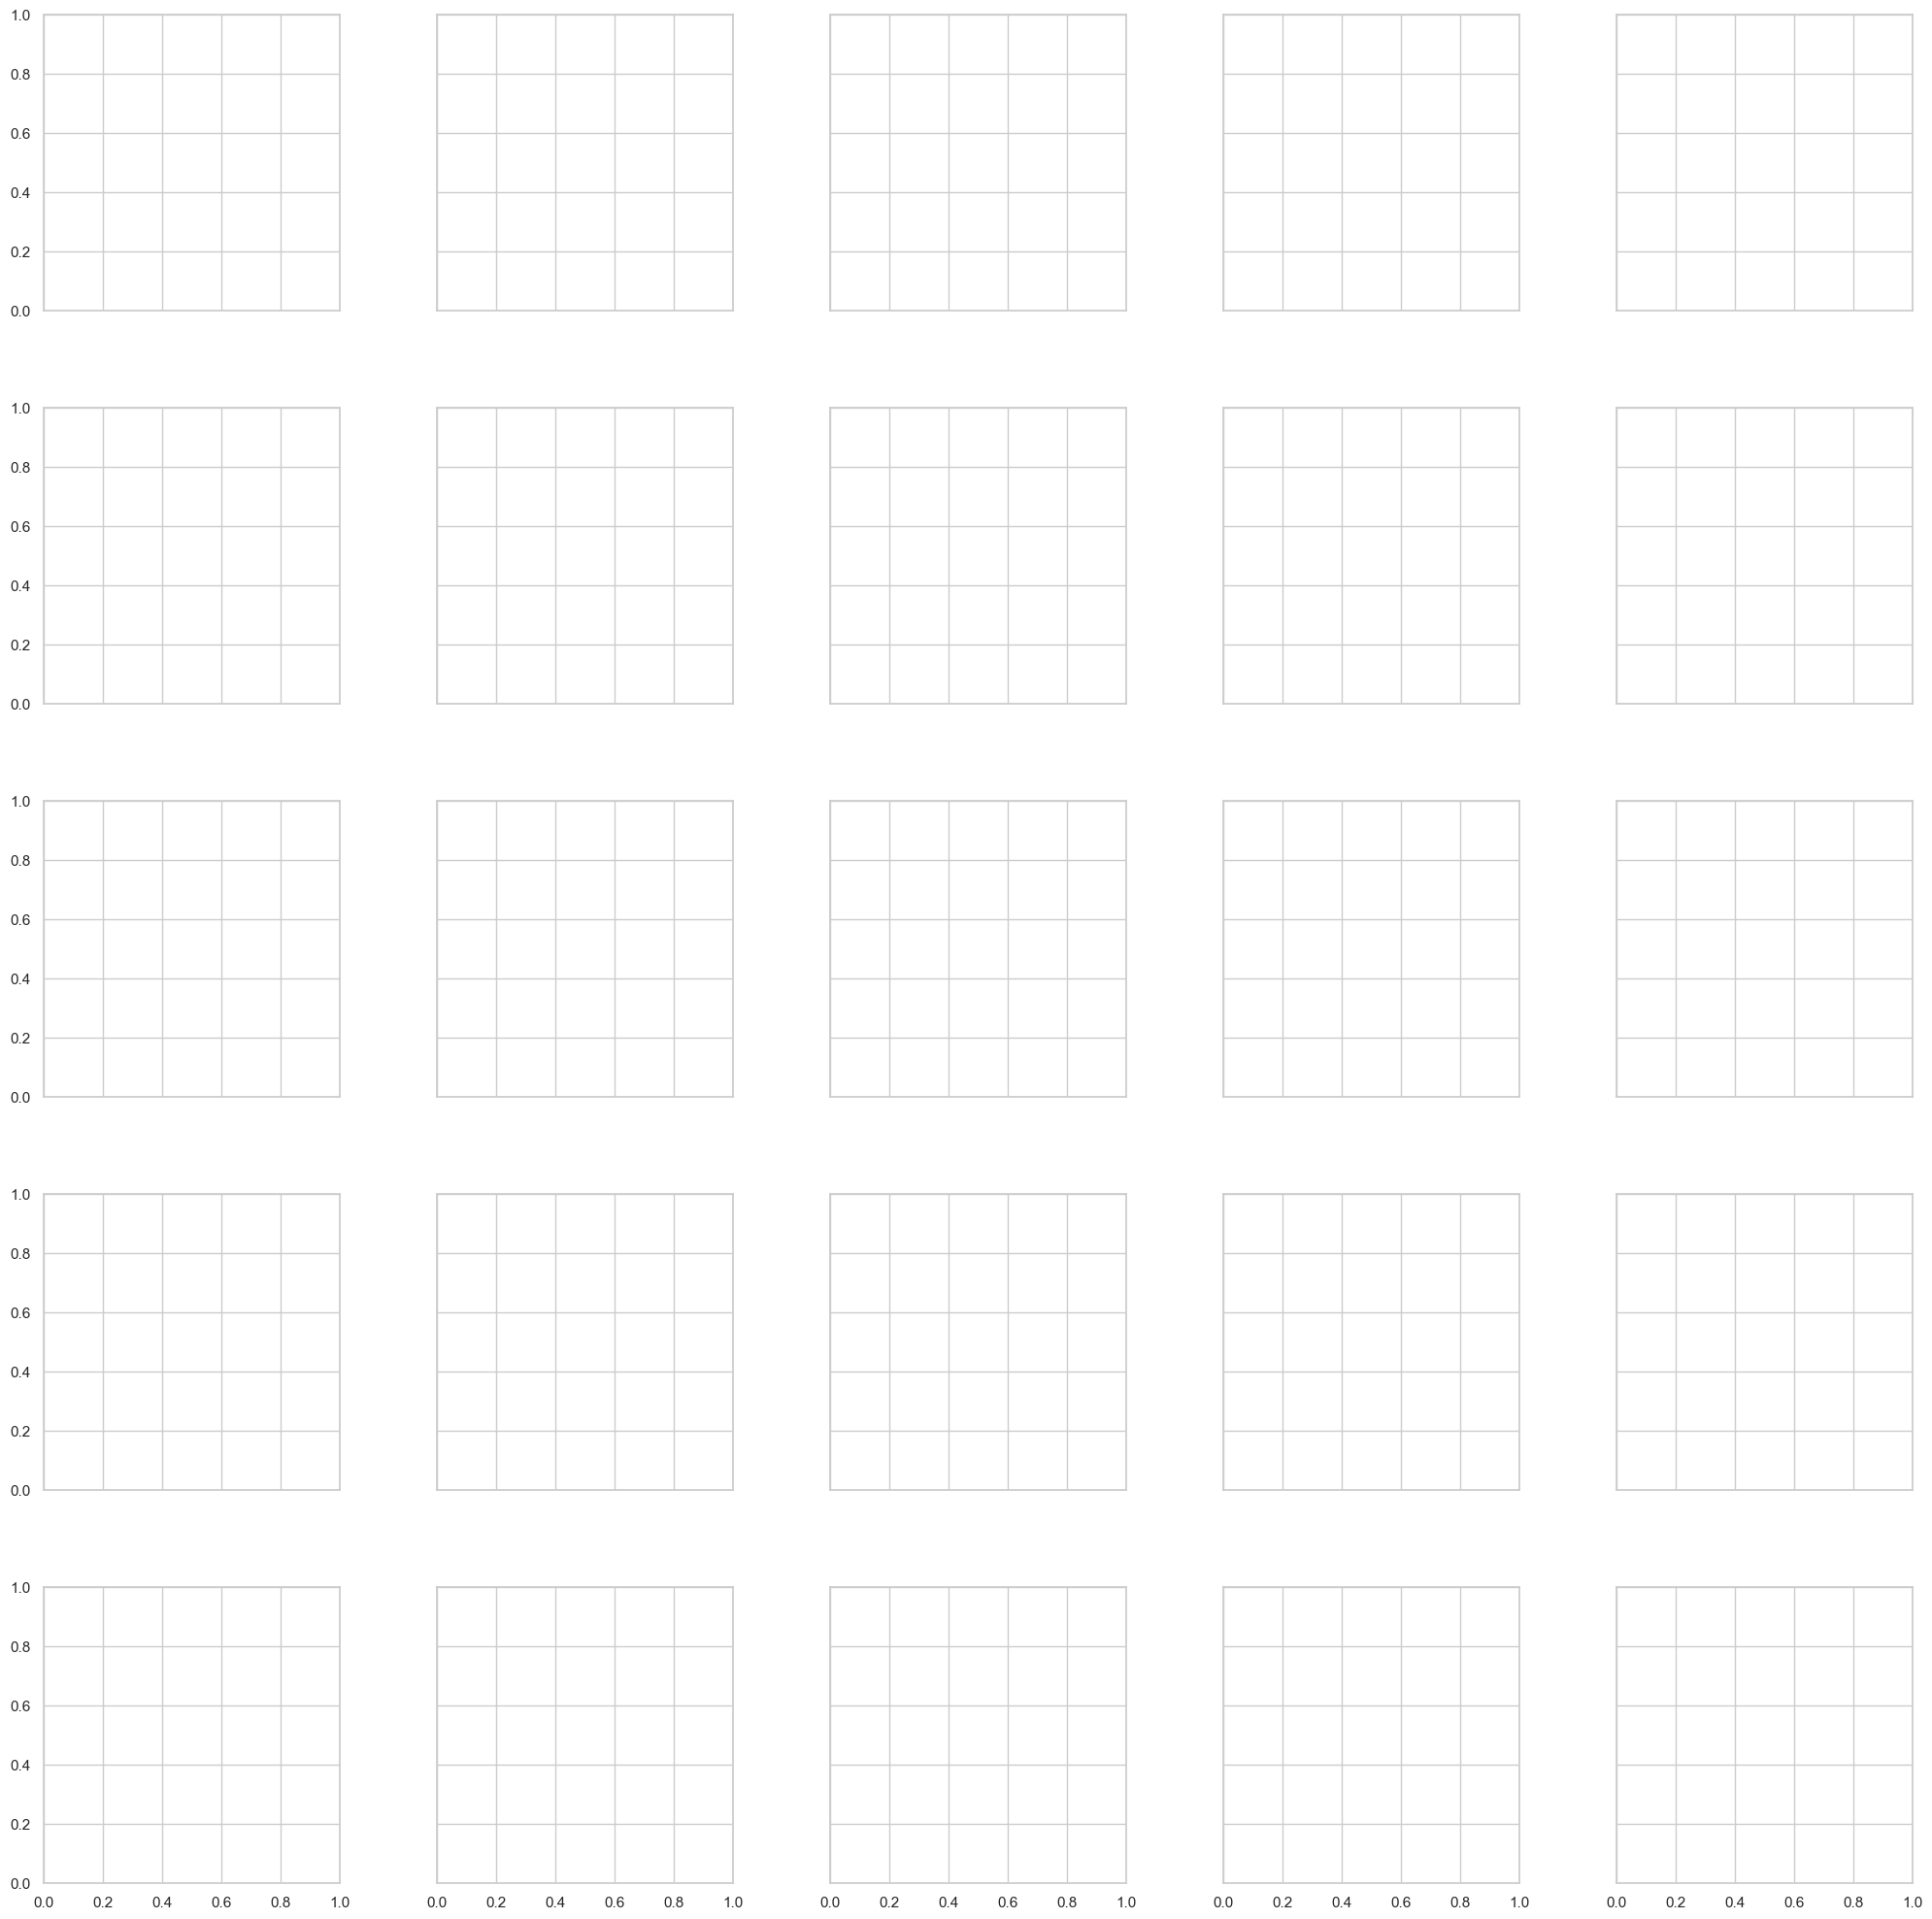

Rank 16 Checkpoint 1000


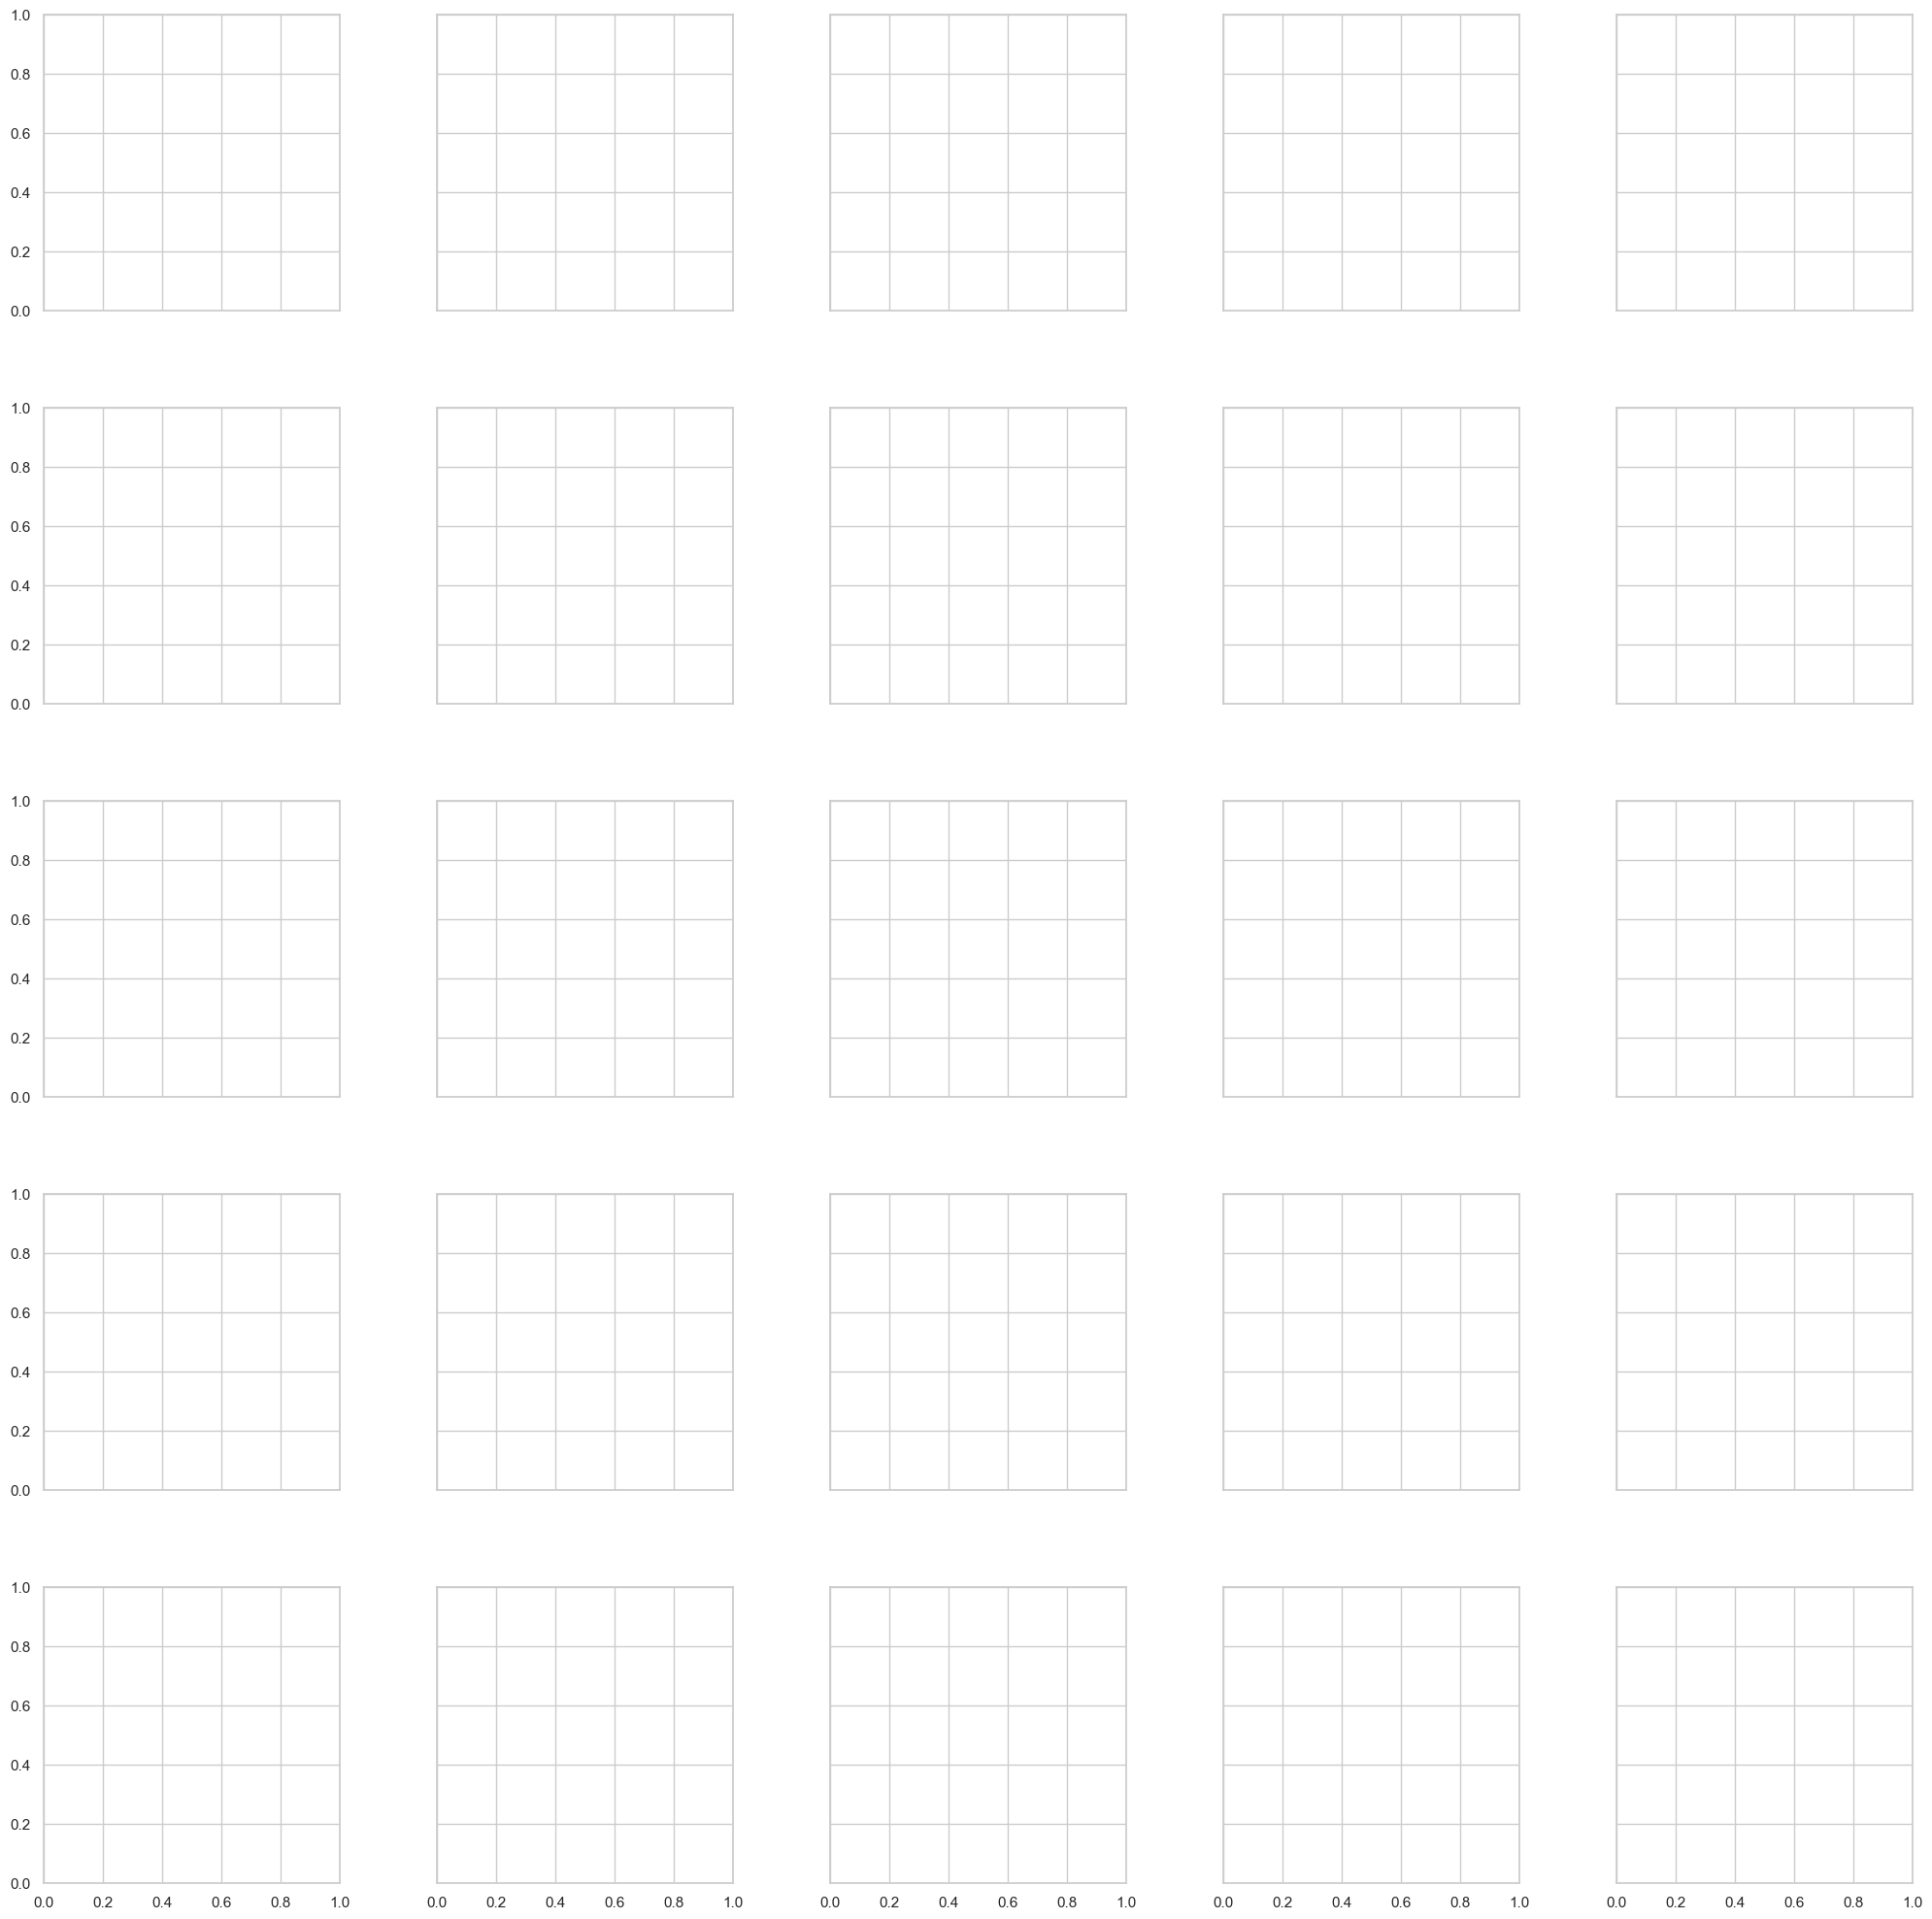

Rank 16 Checkpoint 2000


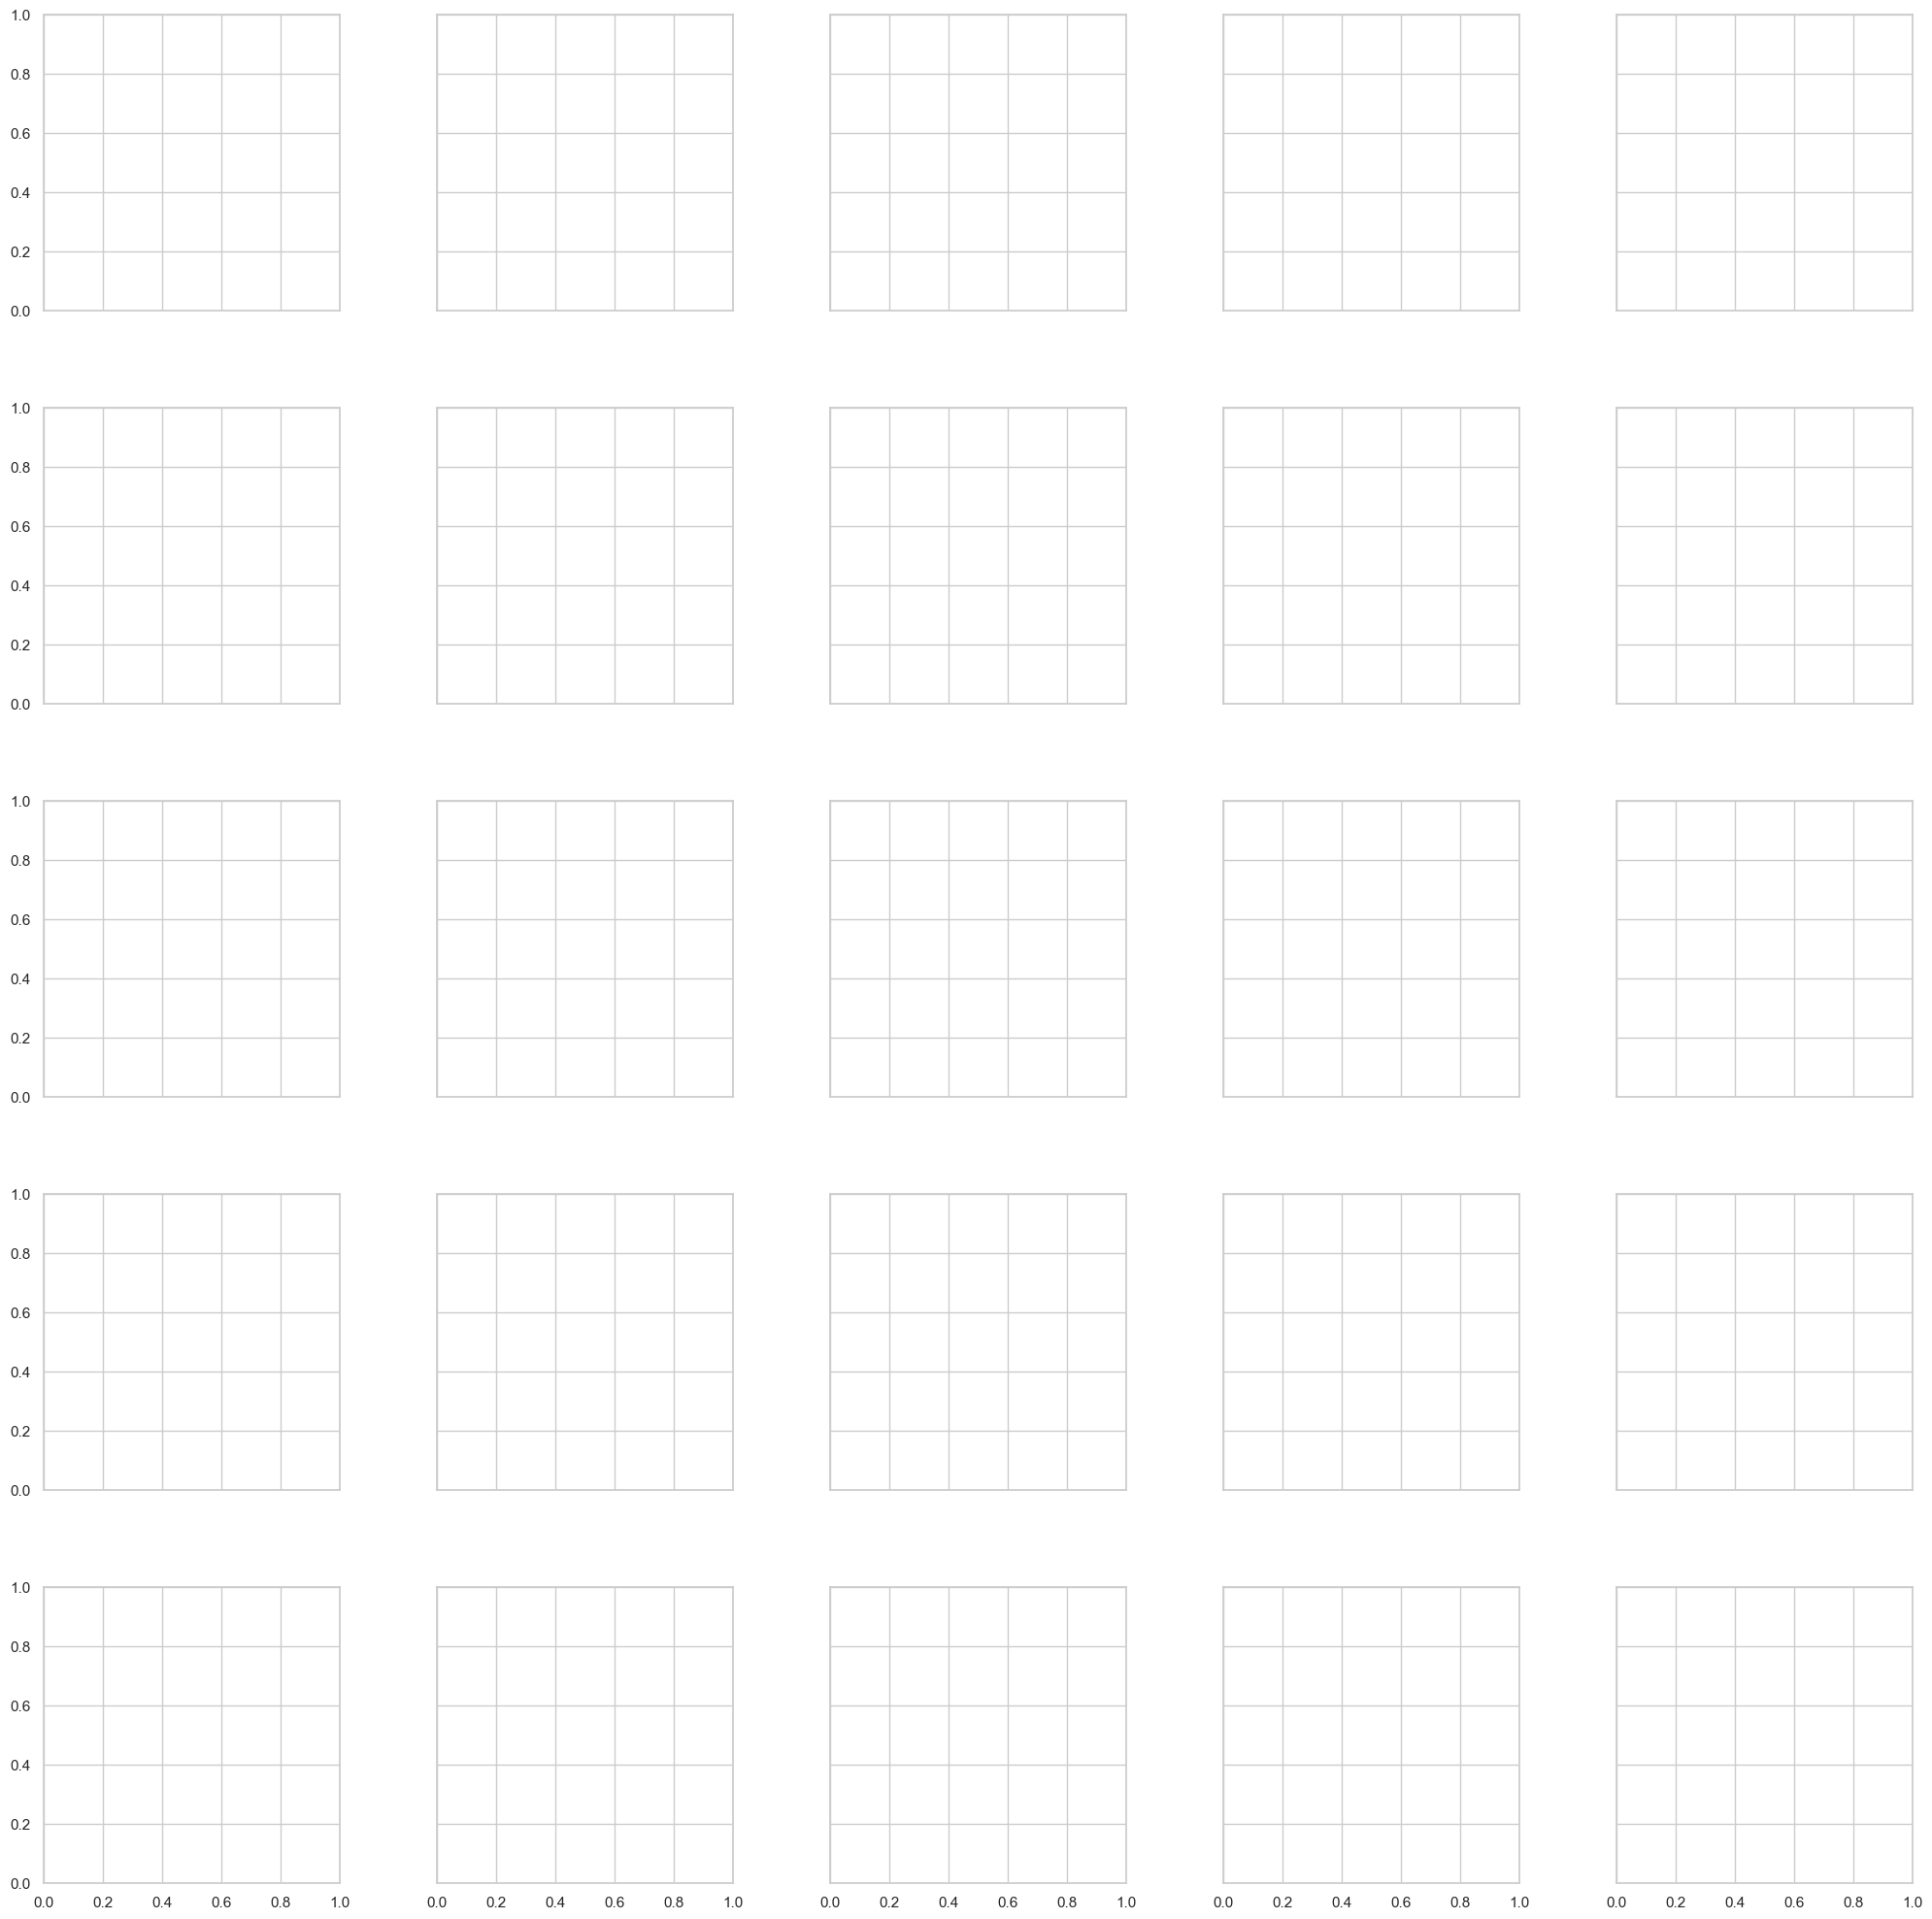

Rank 32 Checkpoint 500


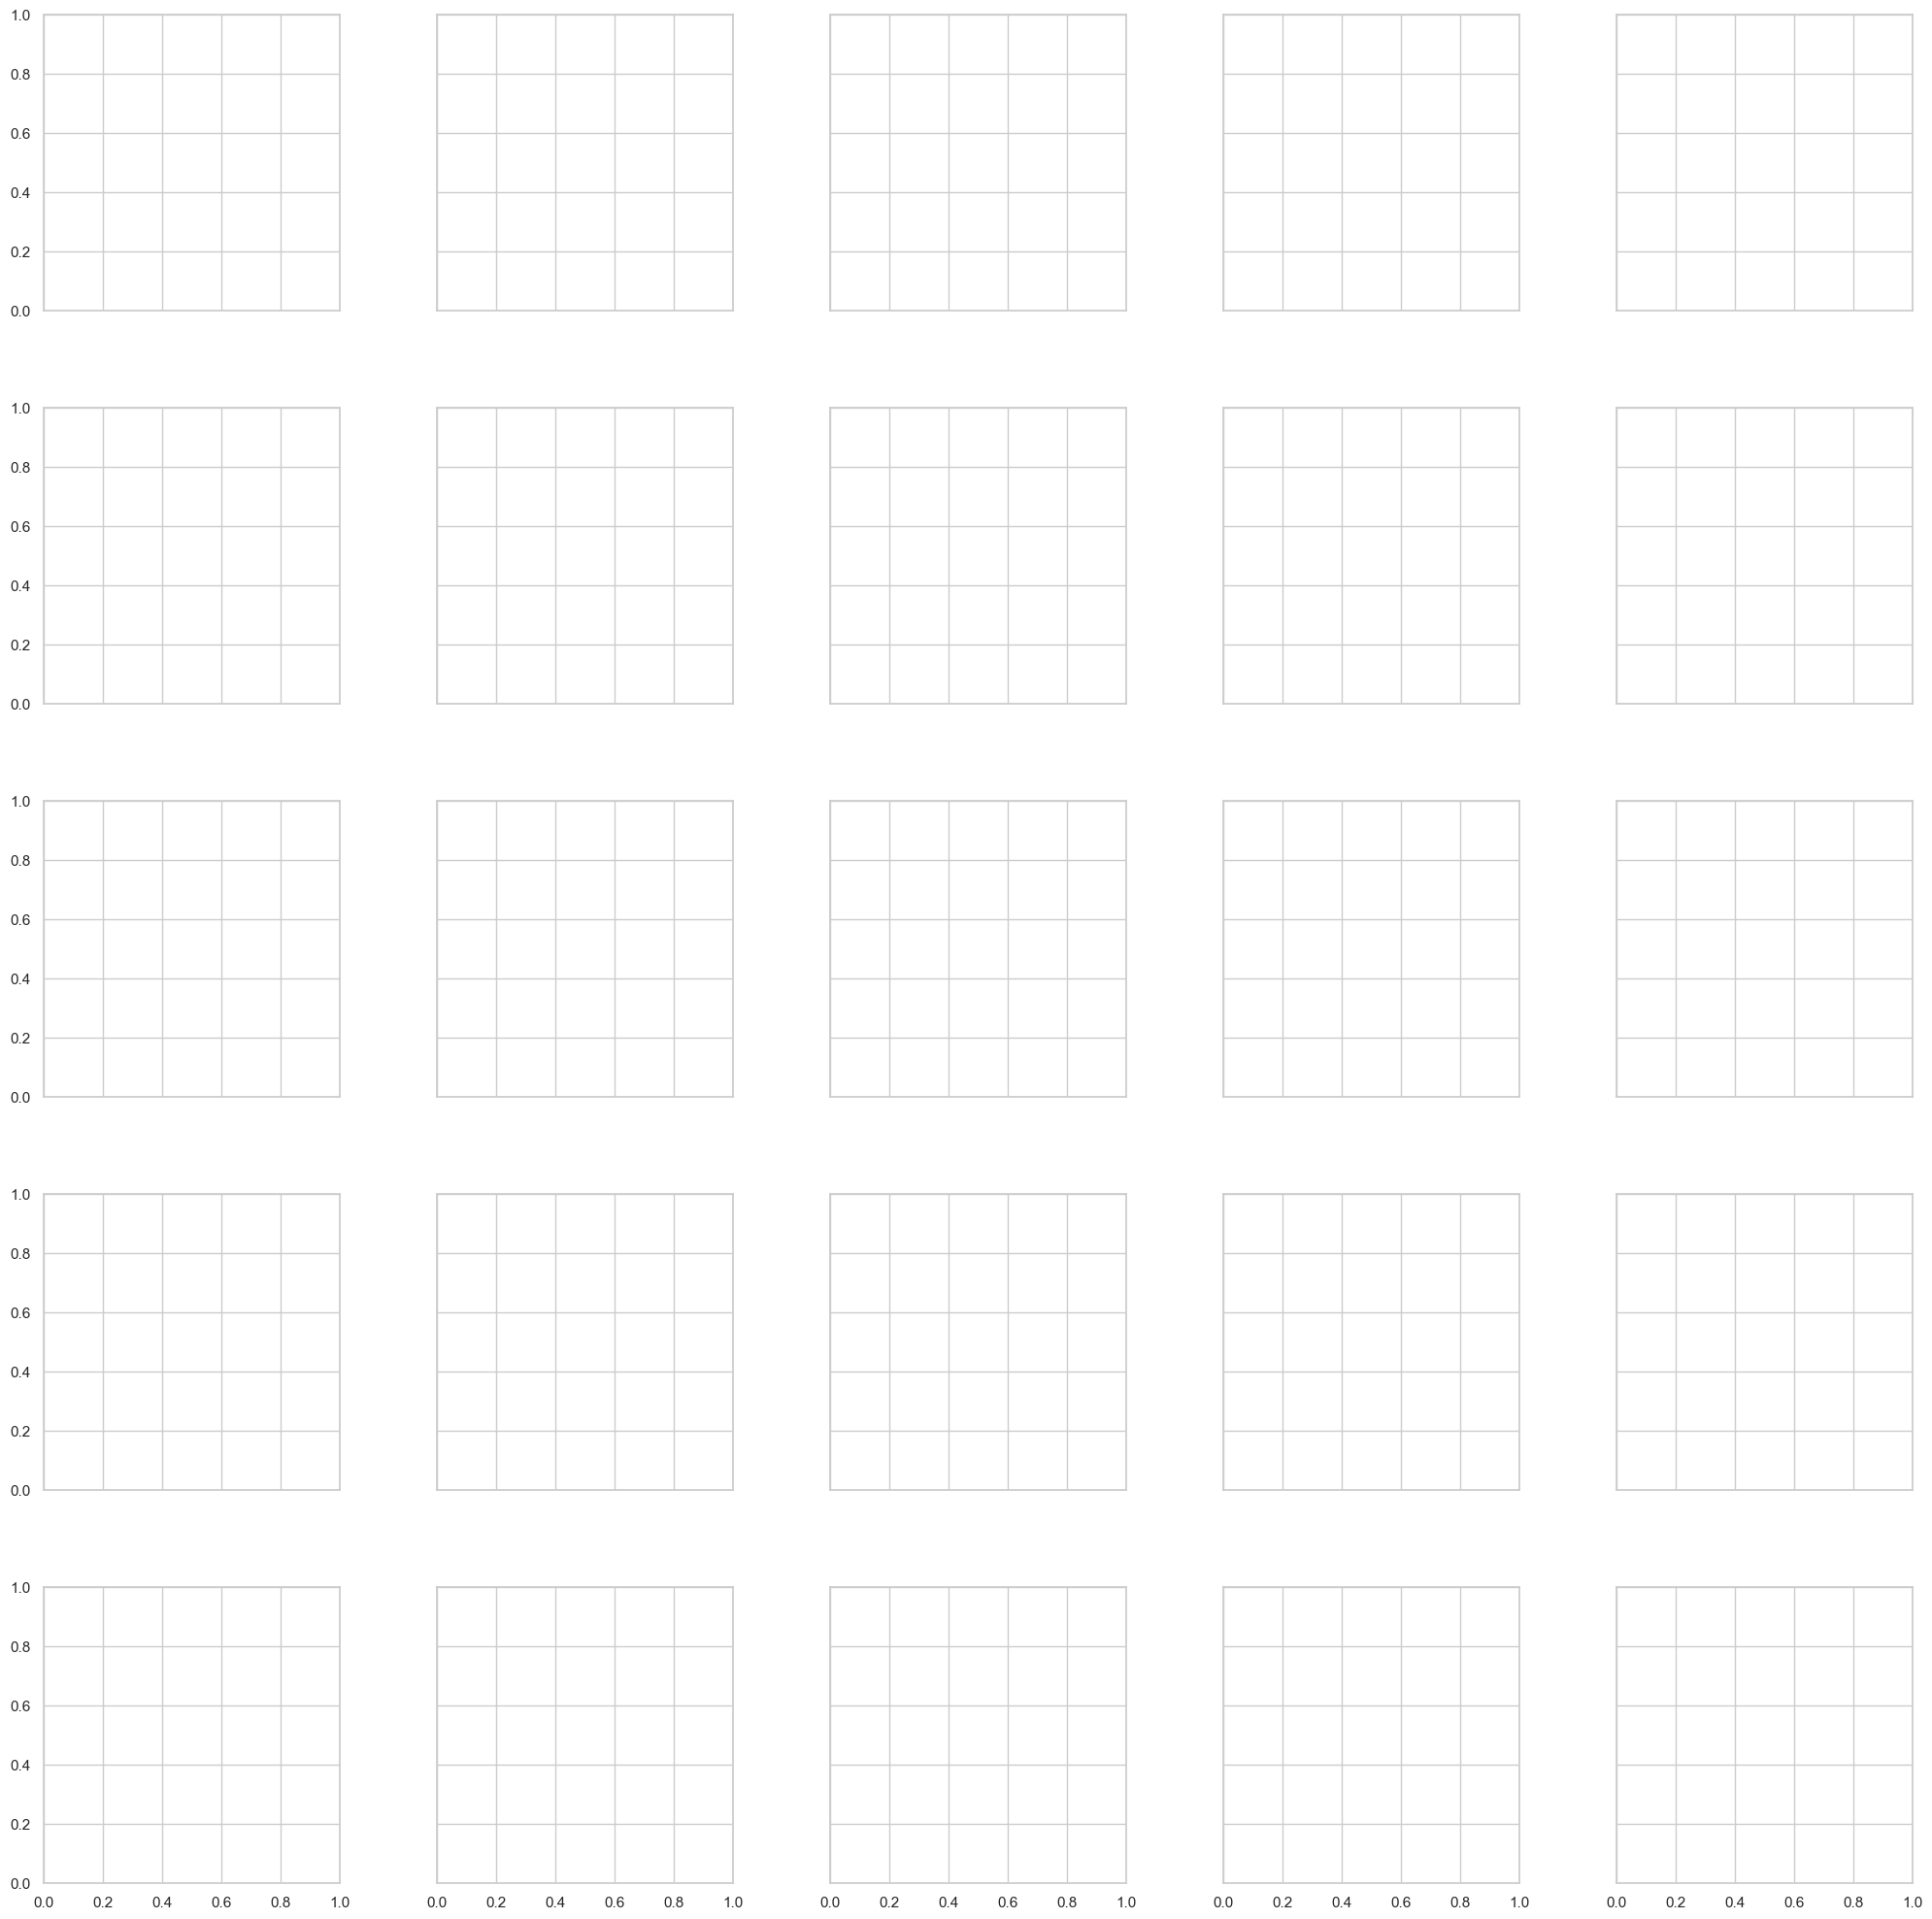

Rank 32 Checkpoint 1000


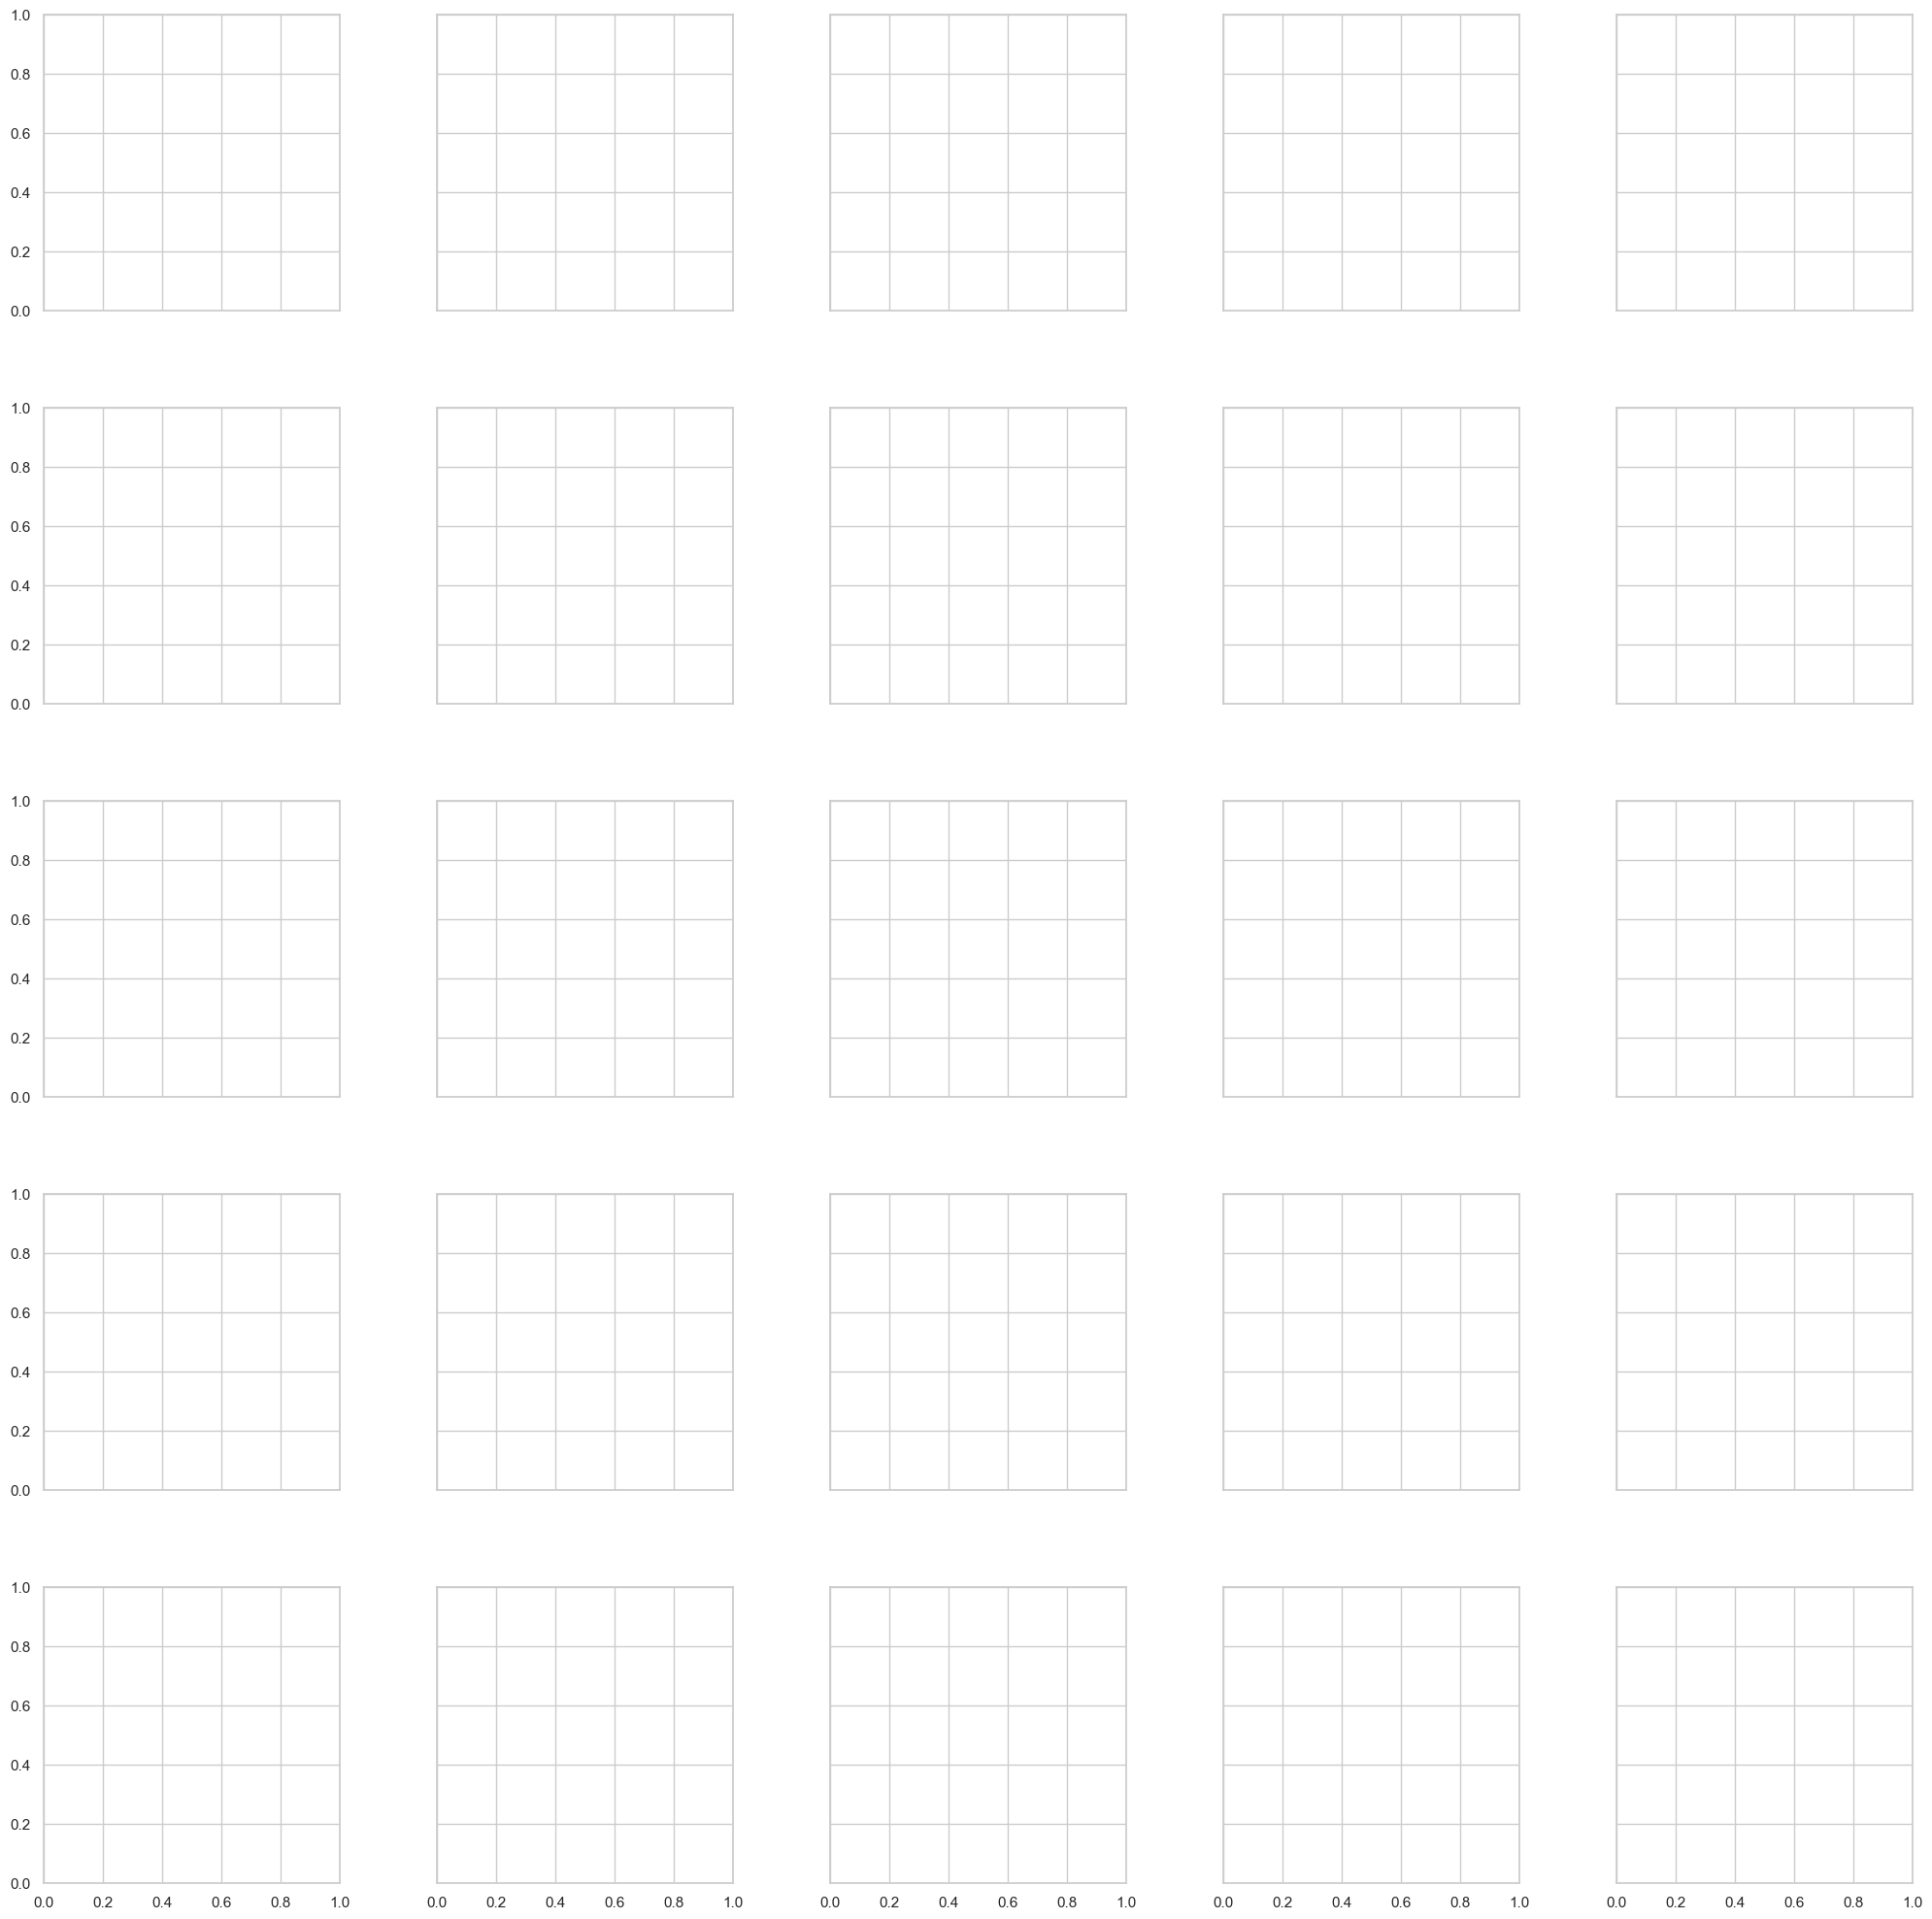

Rank 32 Checkpoint 2000


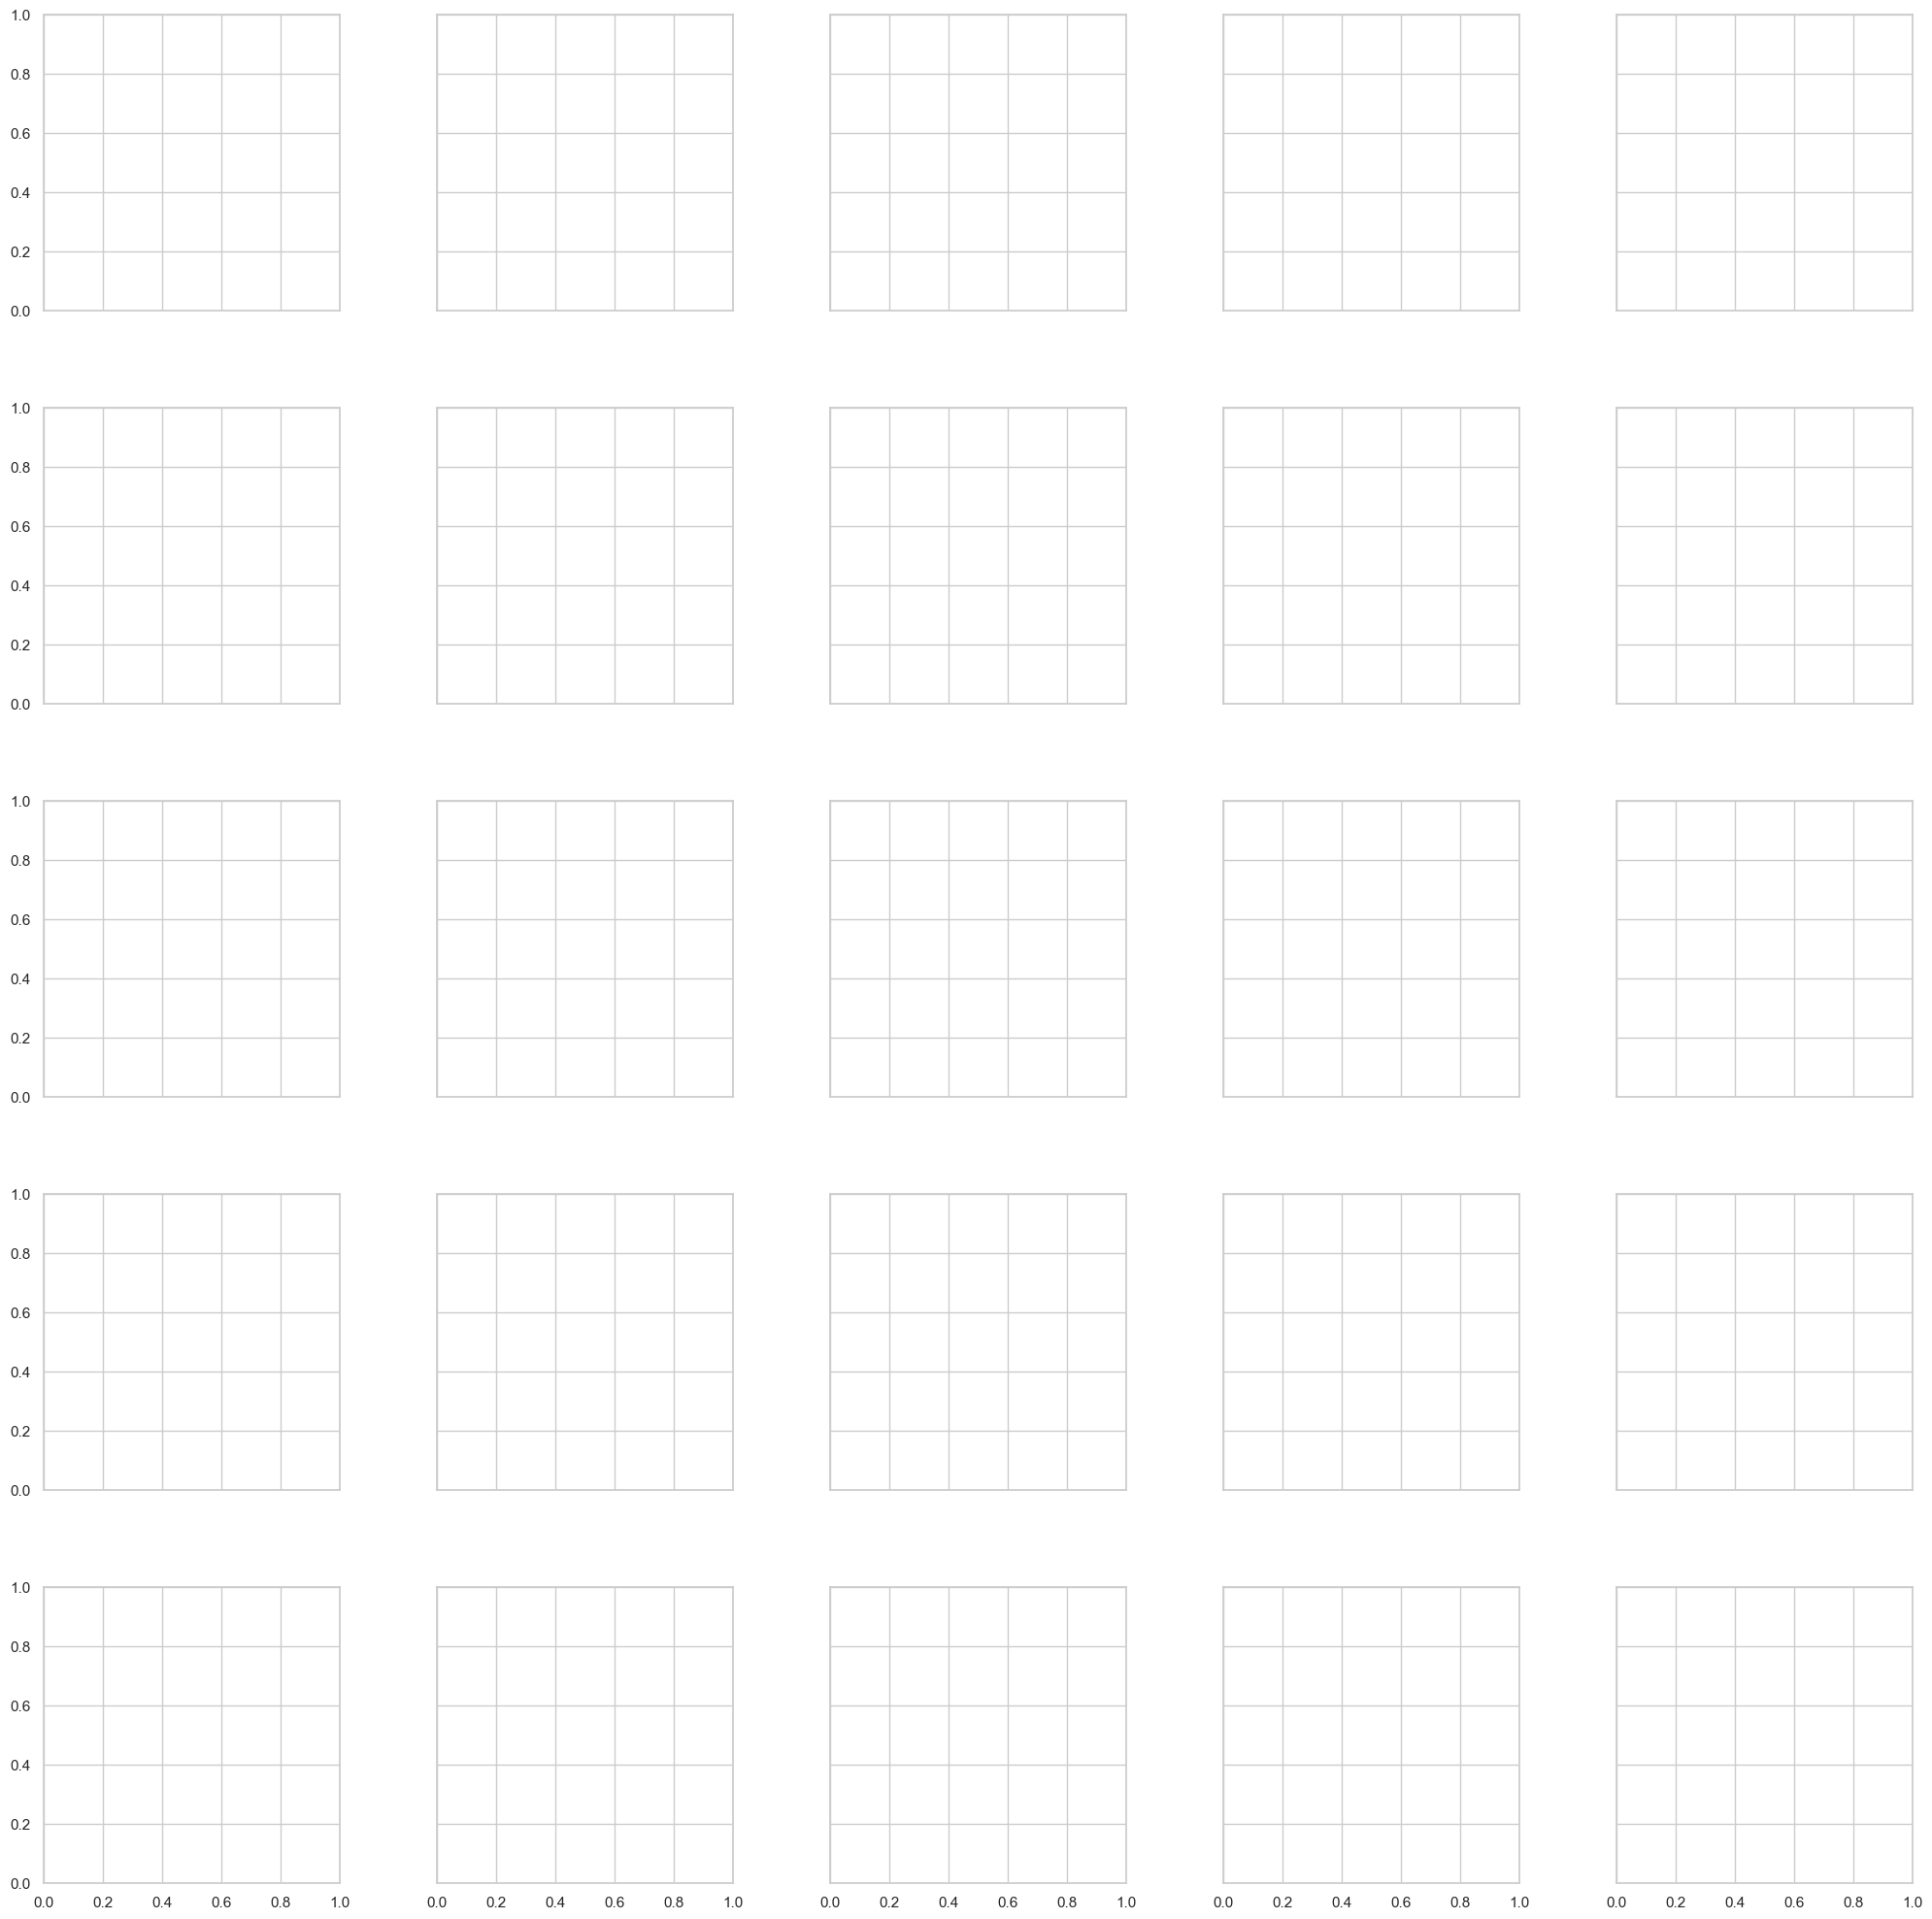

Rank 64 Checkpoint 500


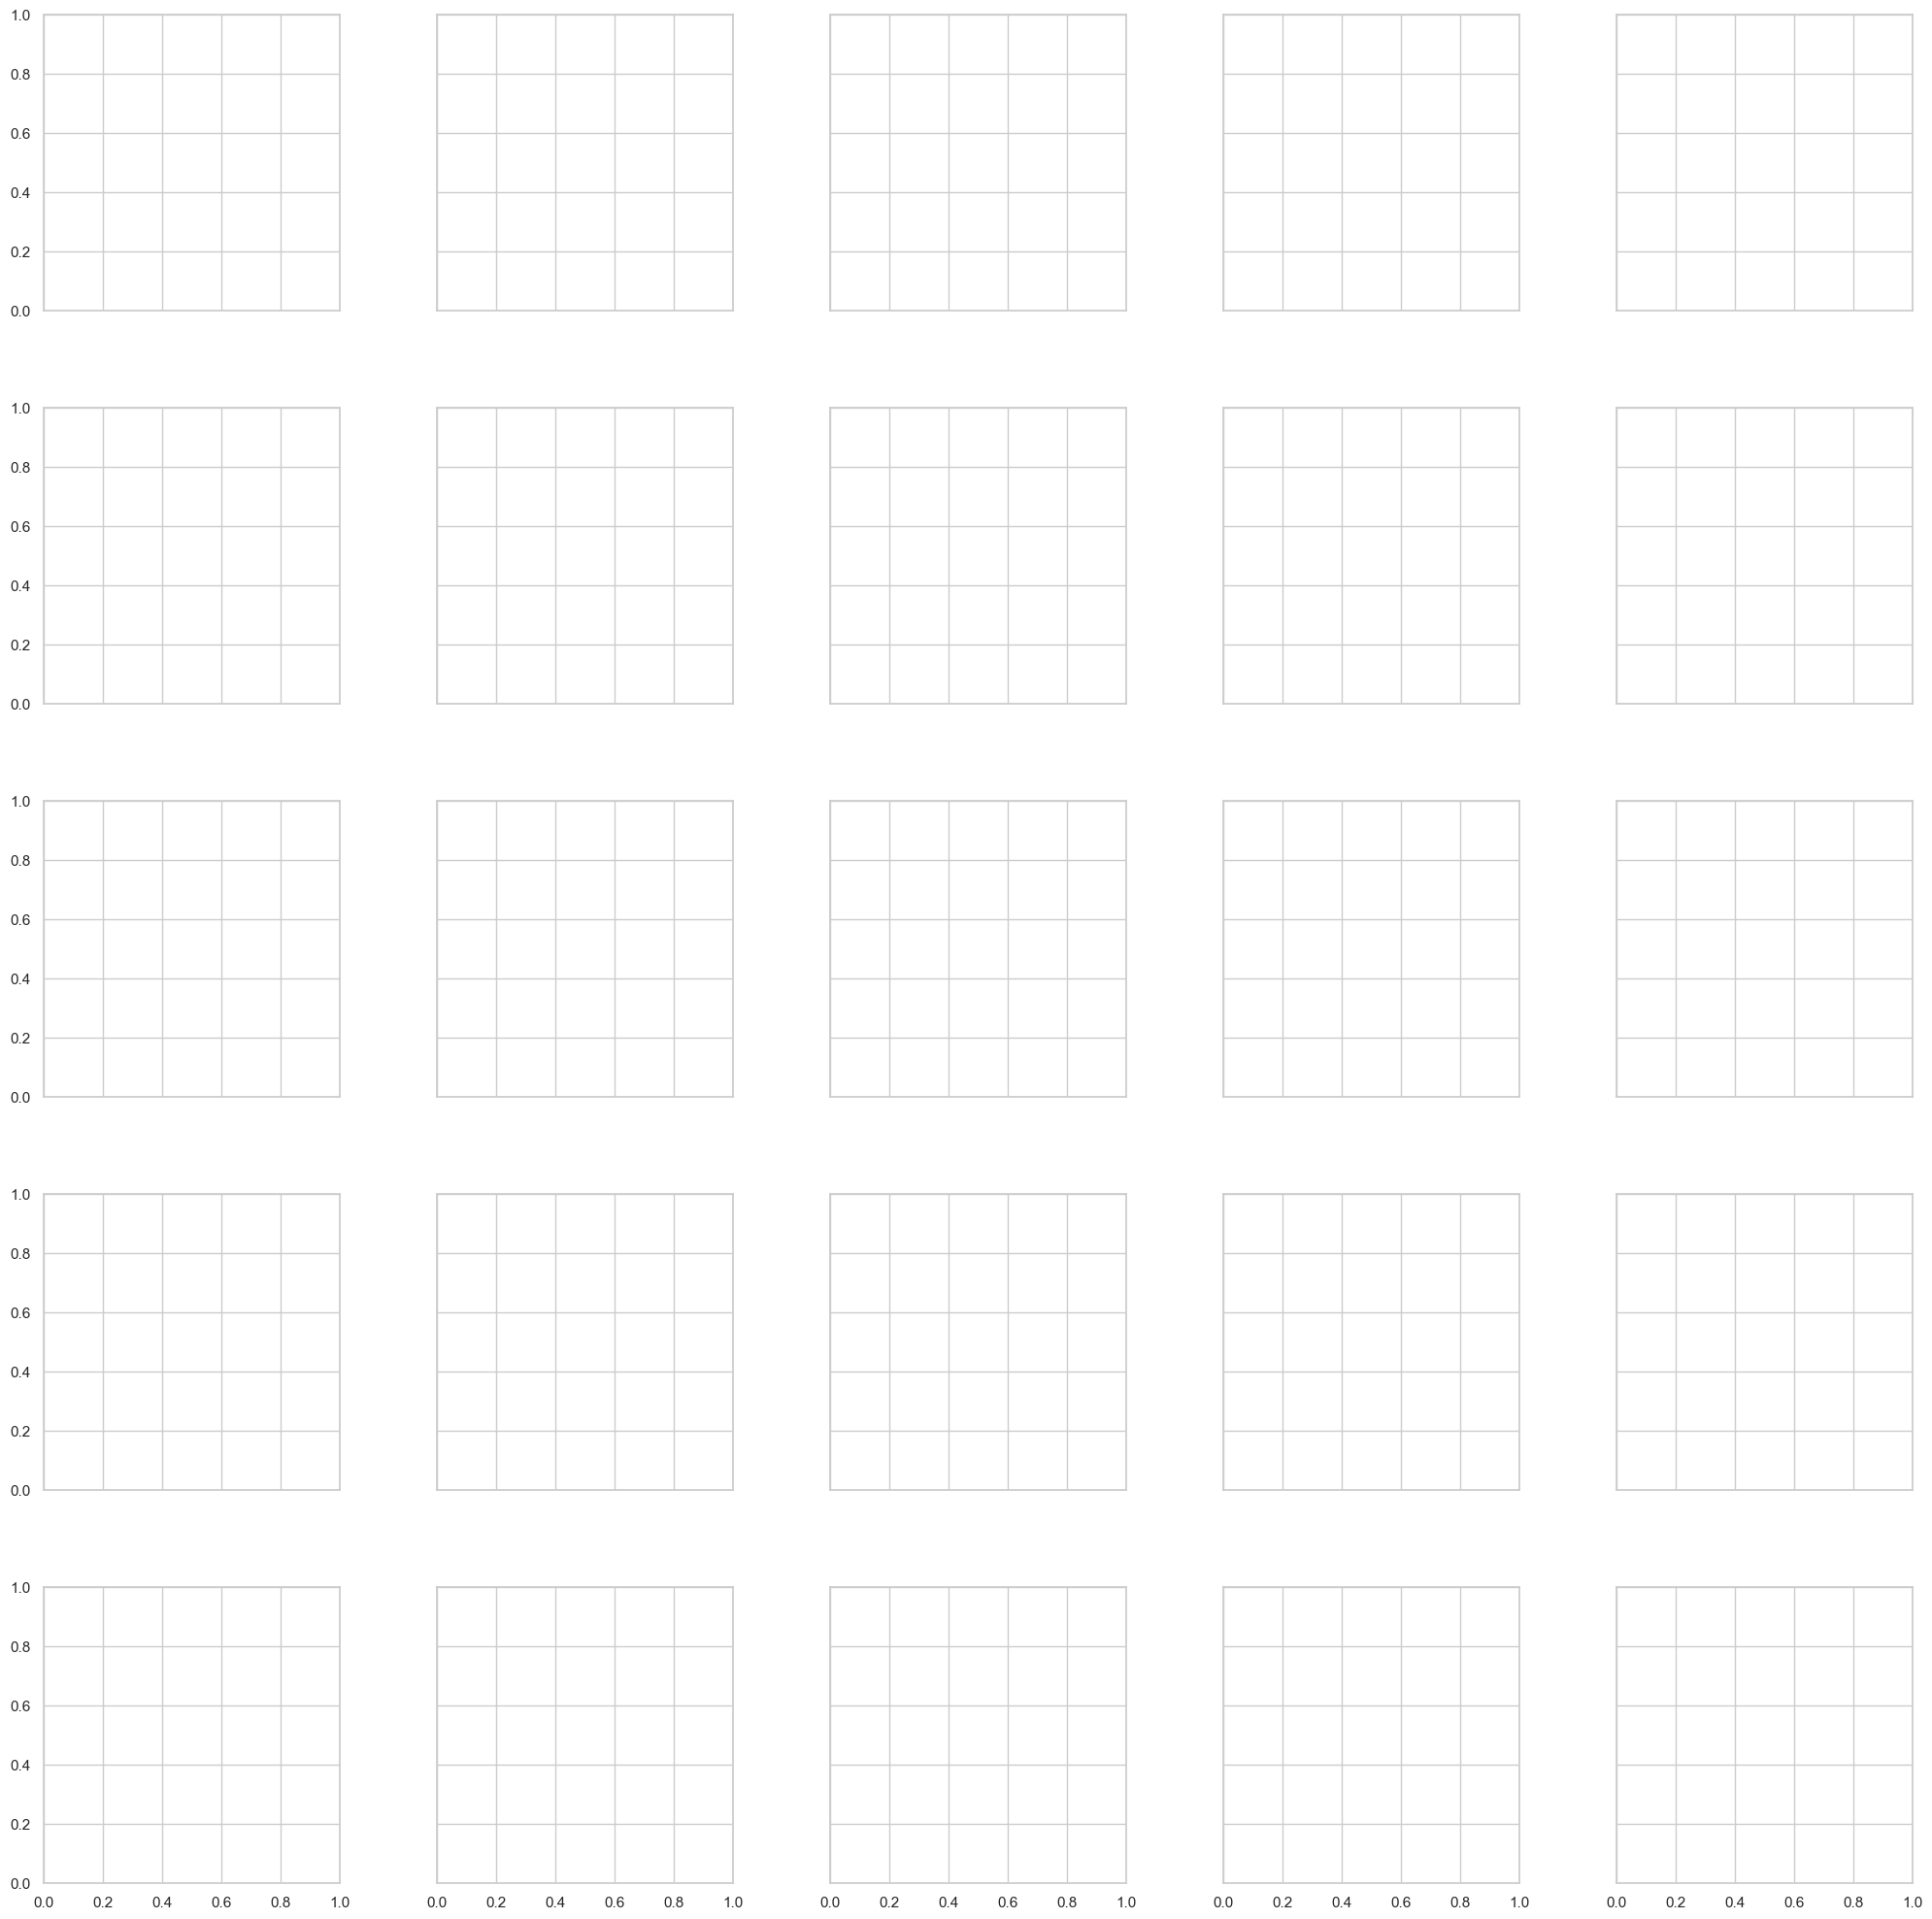

Rank 64 Checkpoint 1000


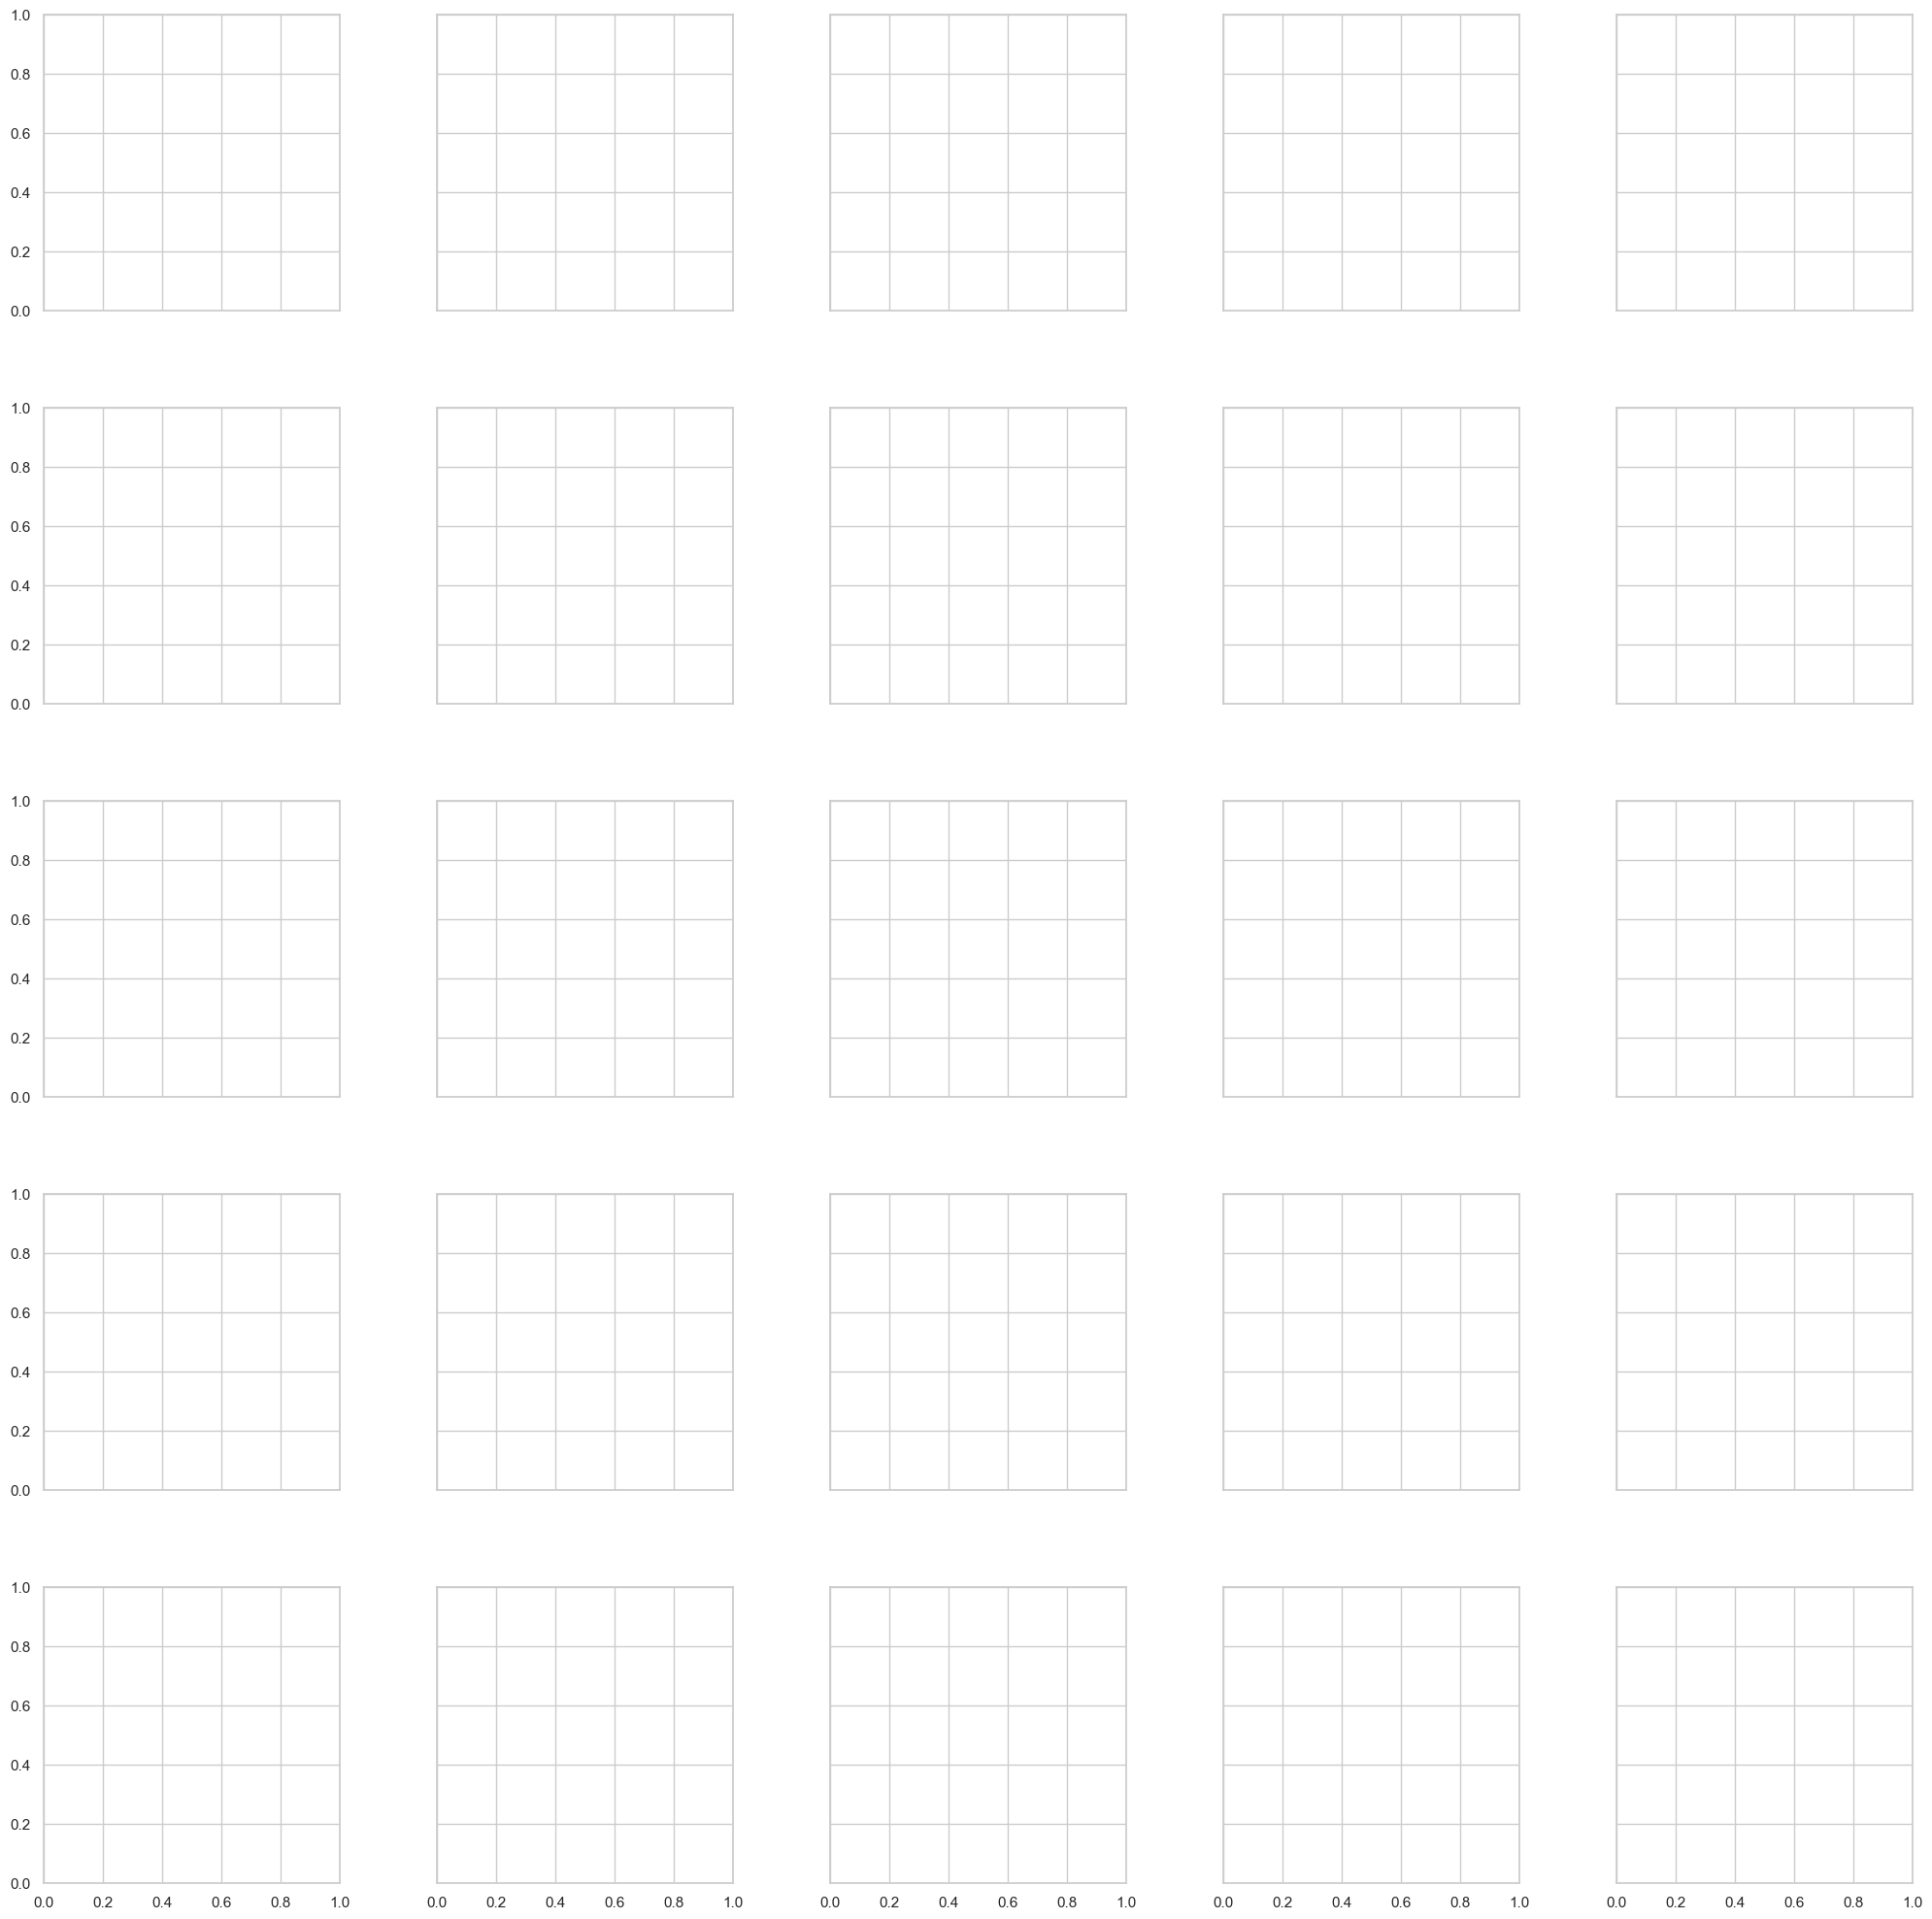

Rank 64 Checkpoint 2000


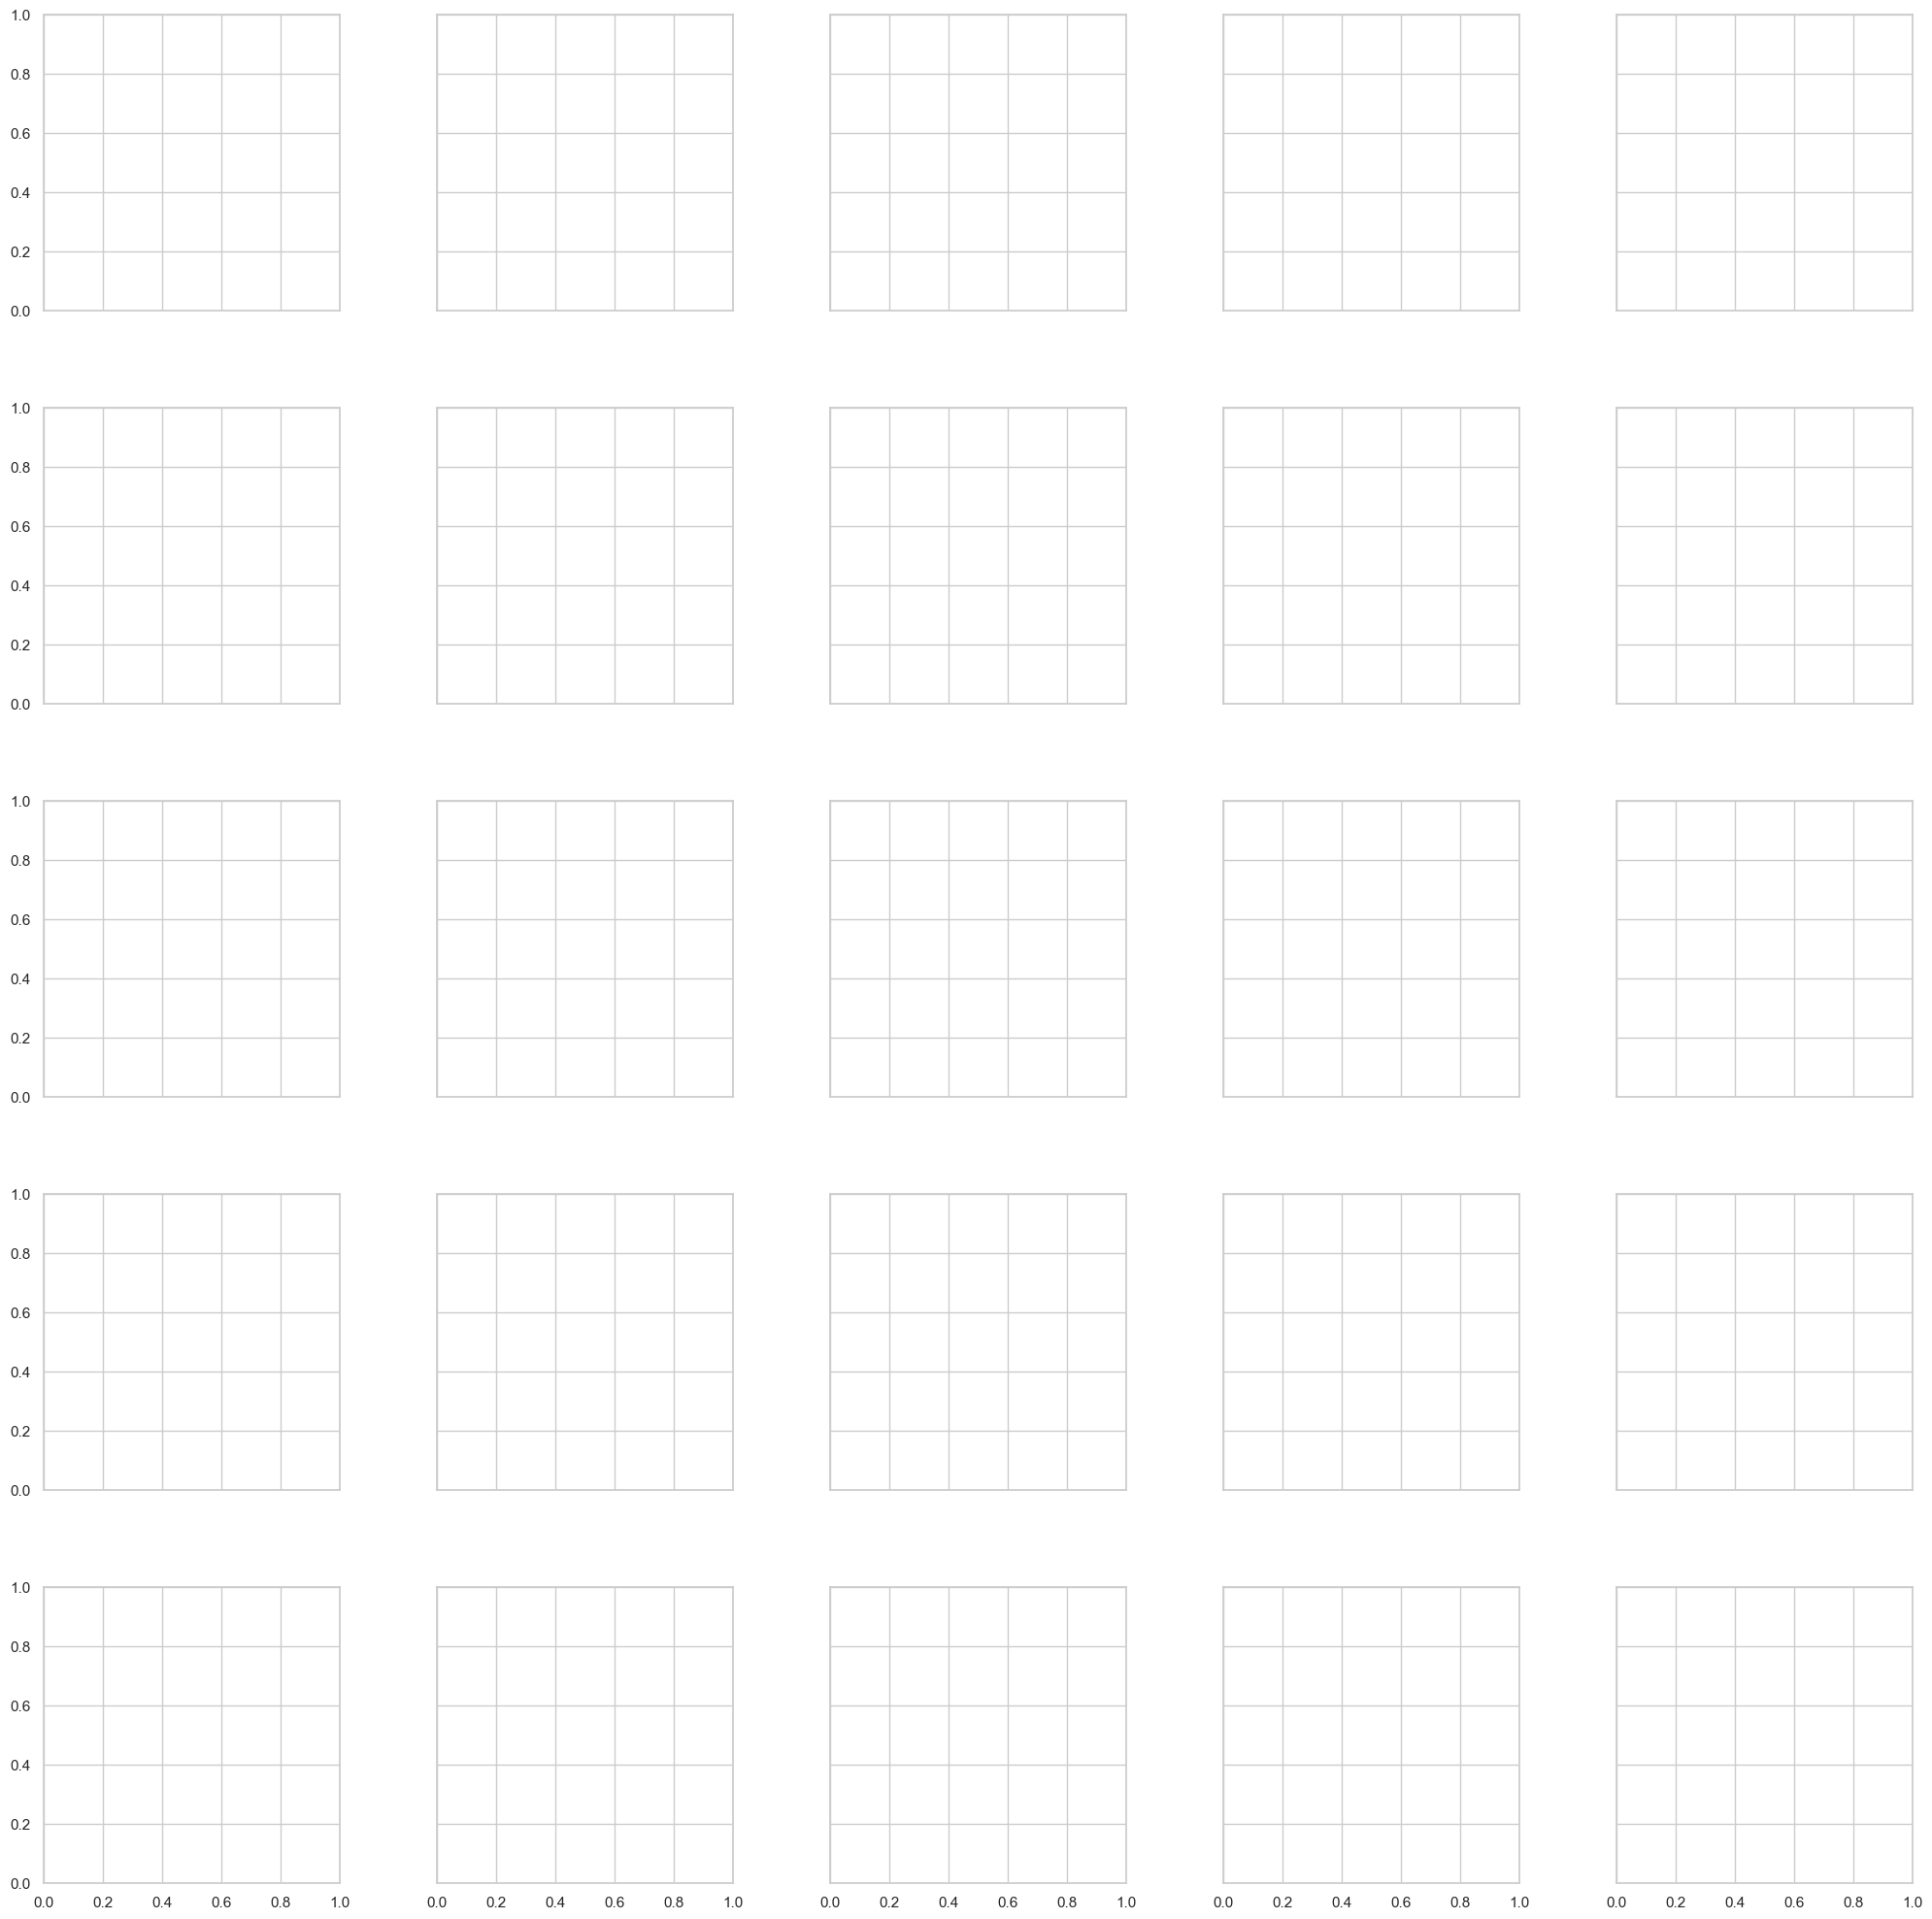

Rank 128 Checkpoint 500


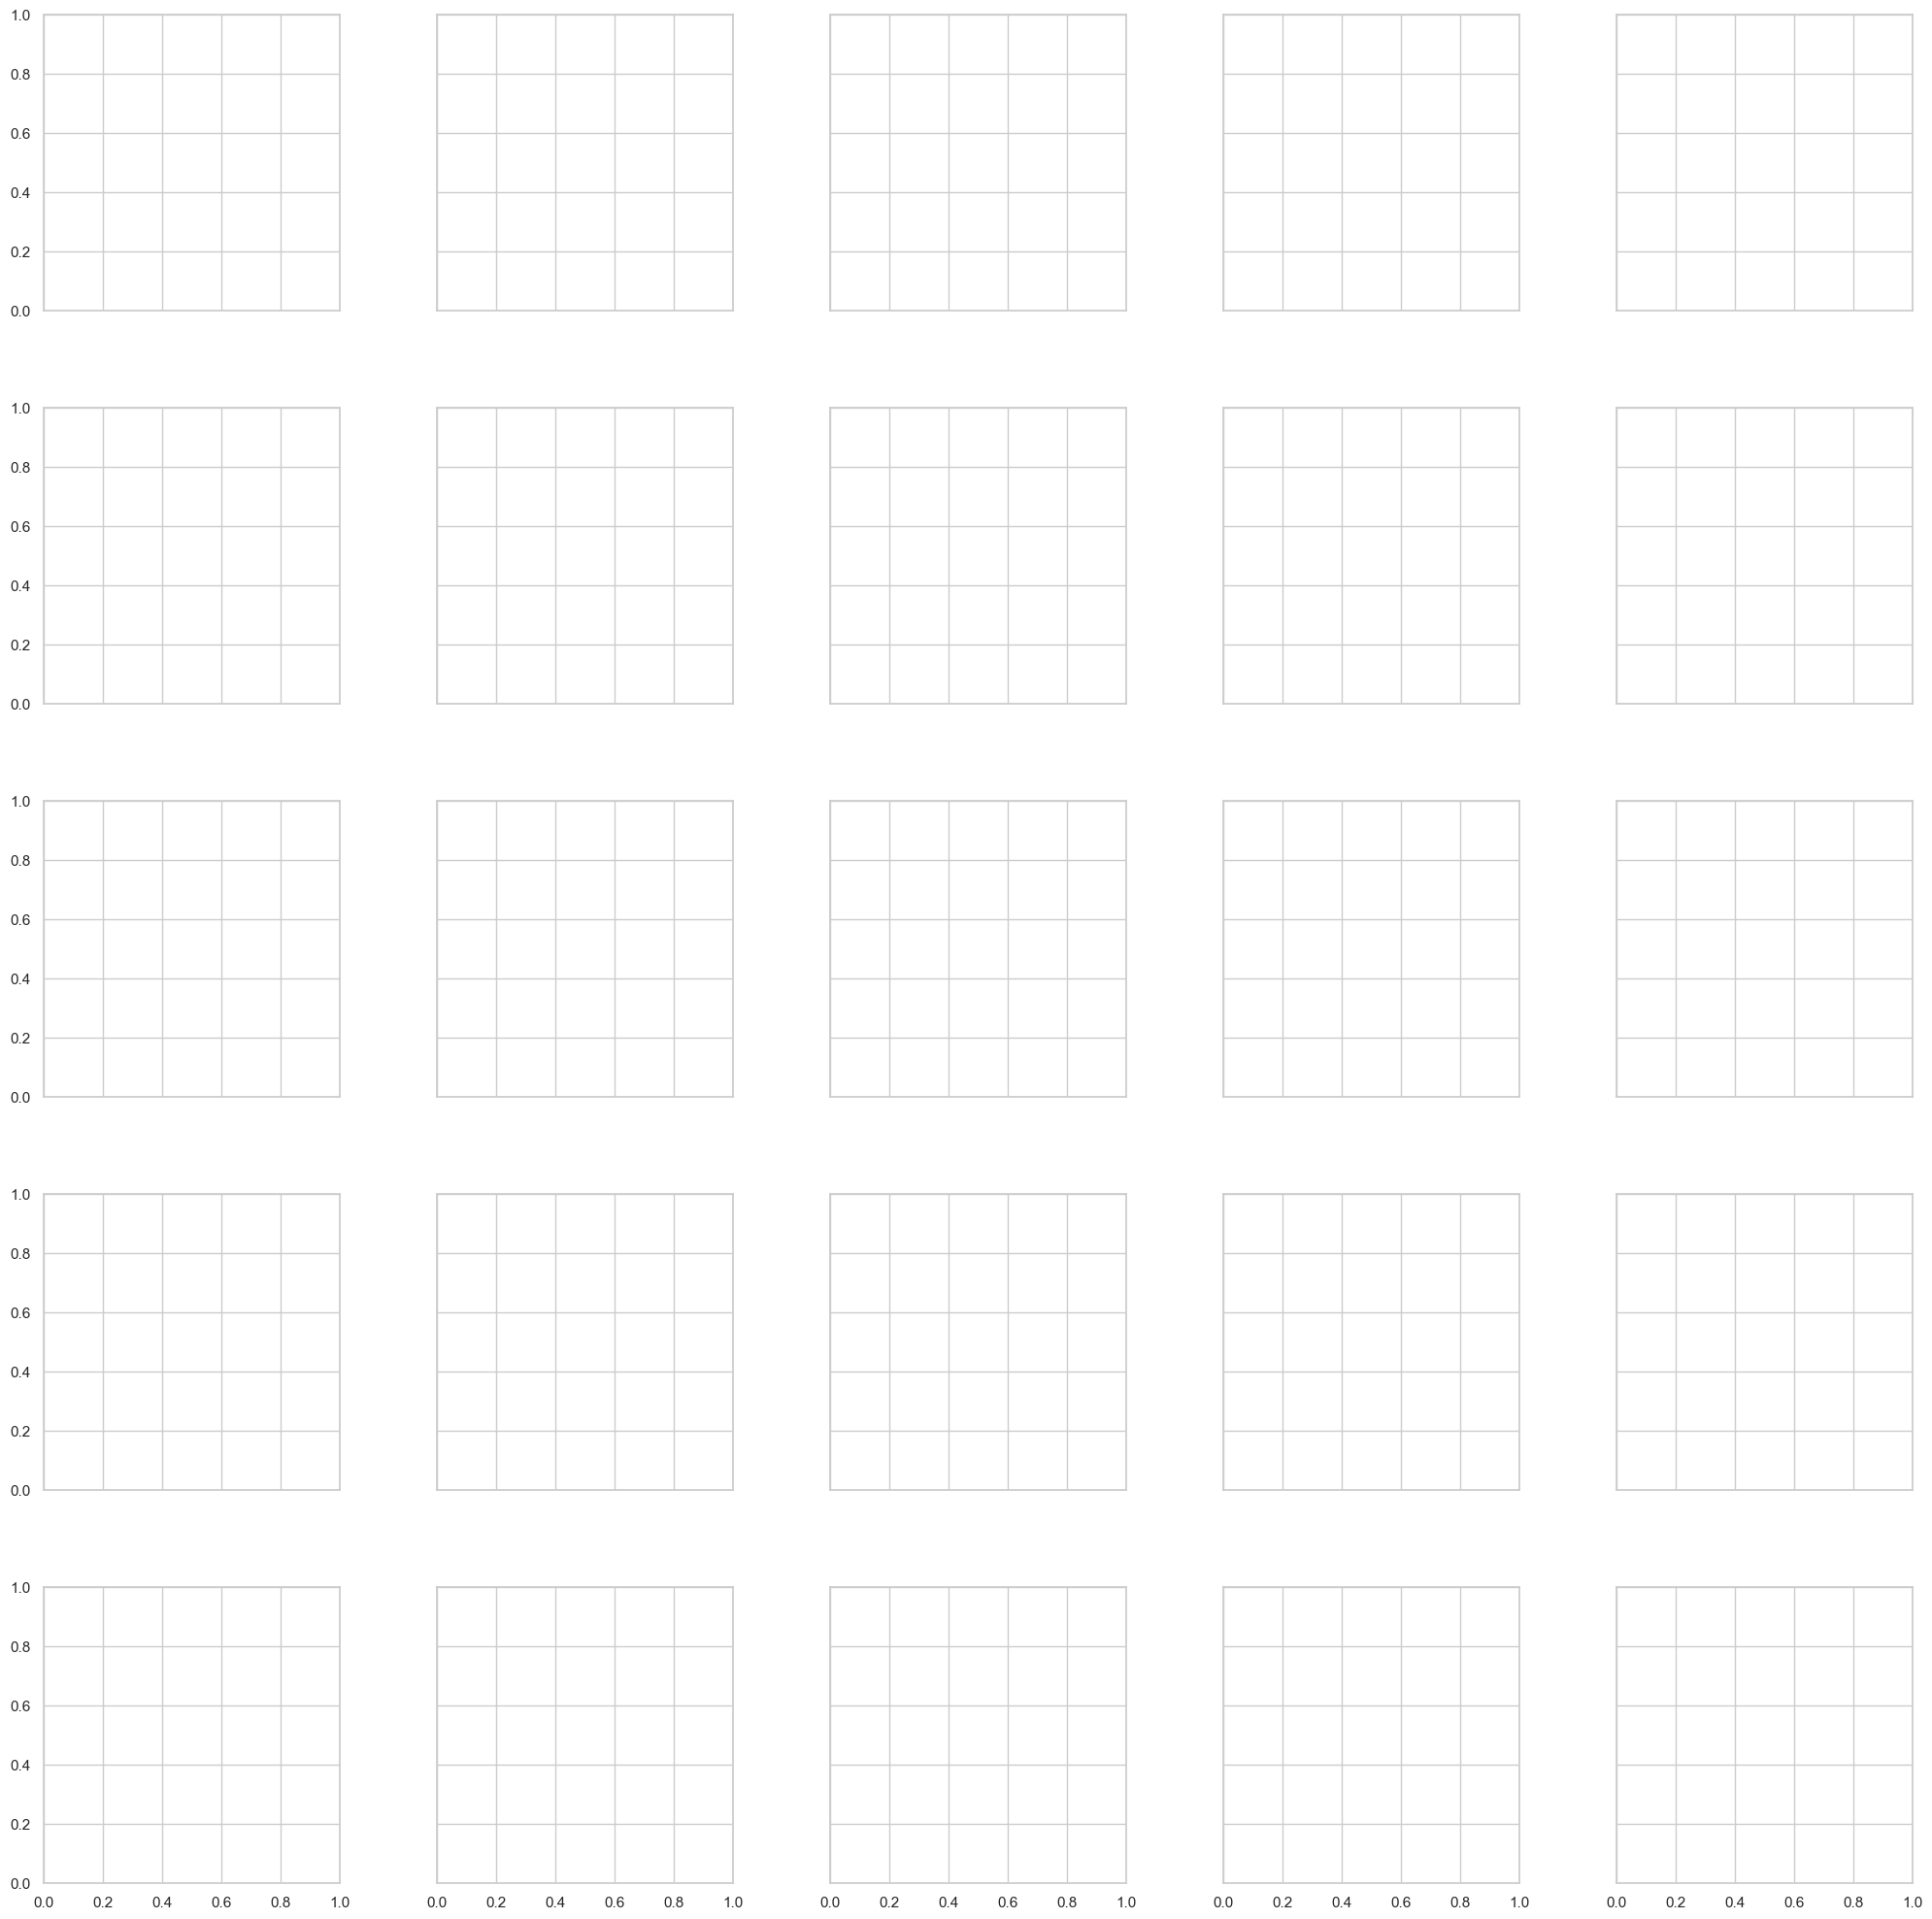

Rank 128 Checkpoint 1000


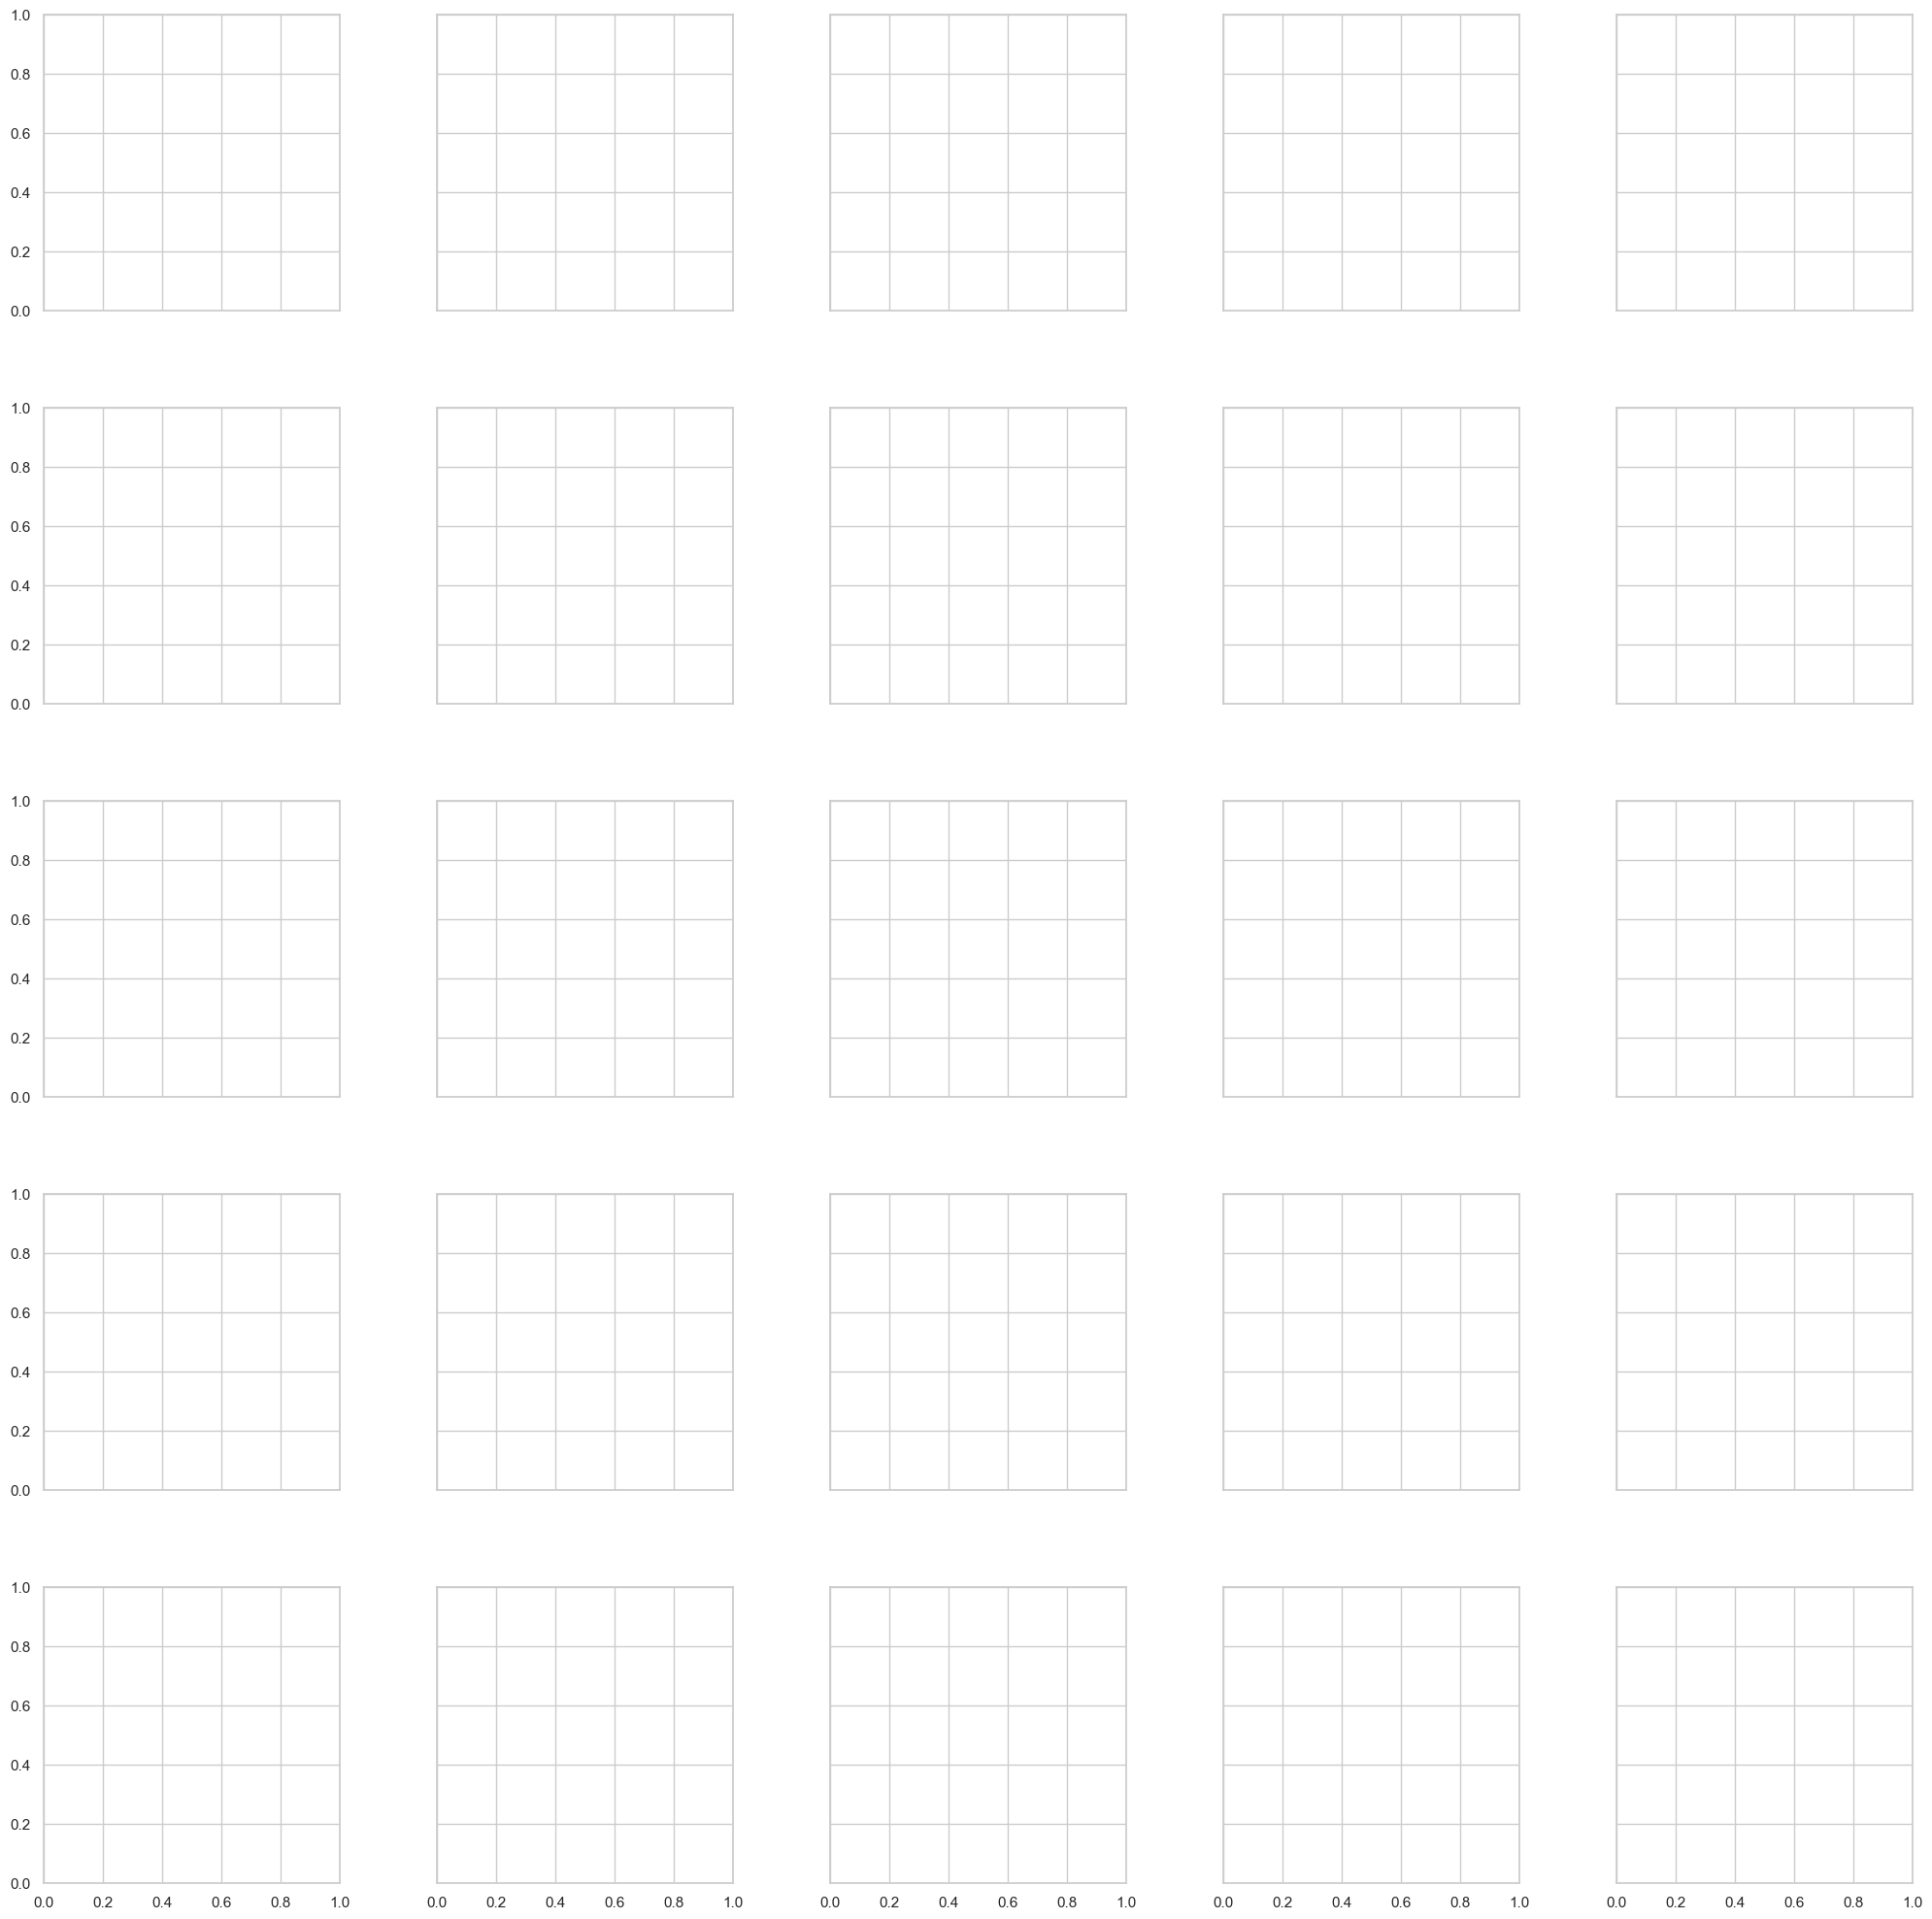

Rank 128 Checkpoint 2000


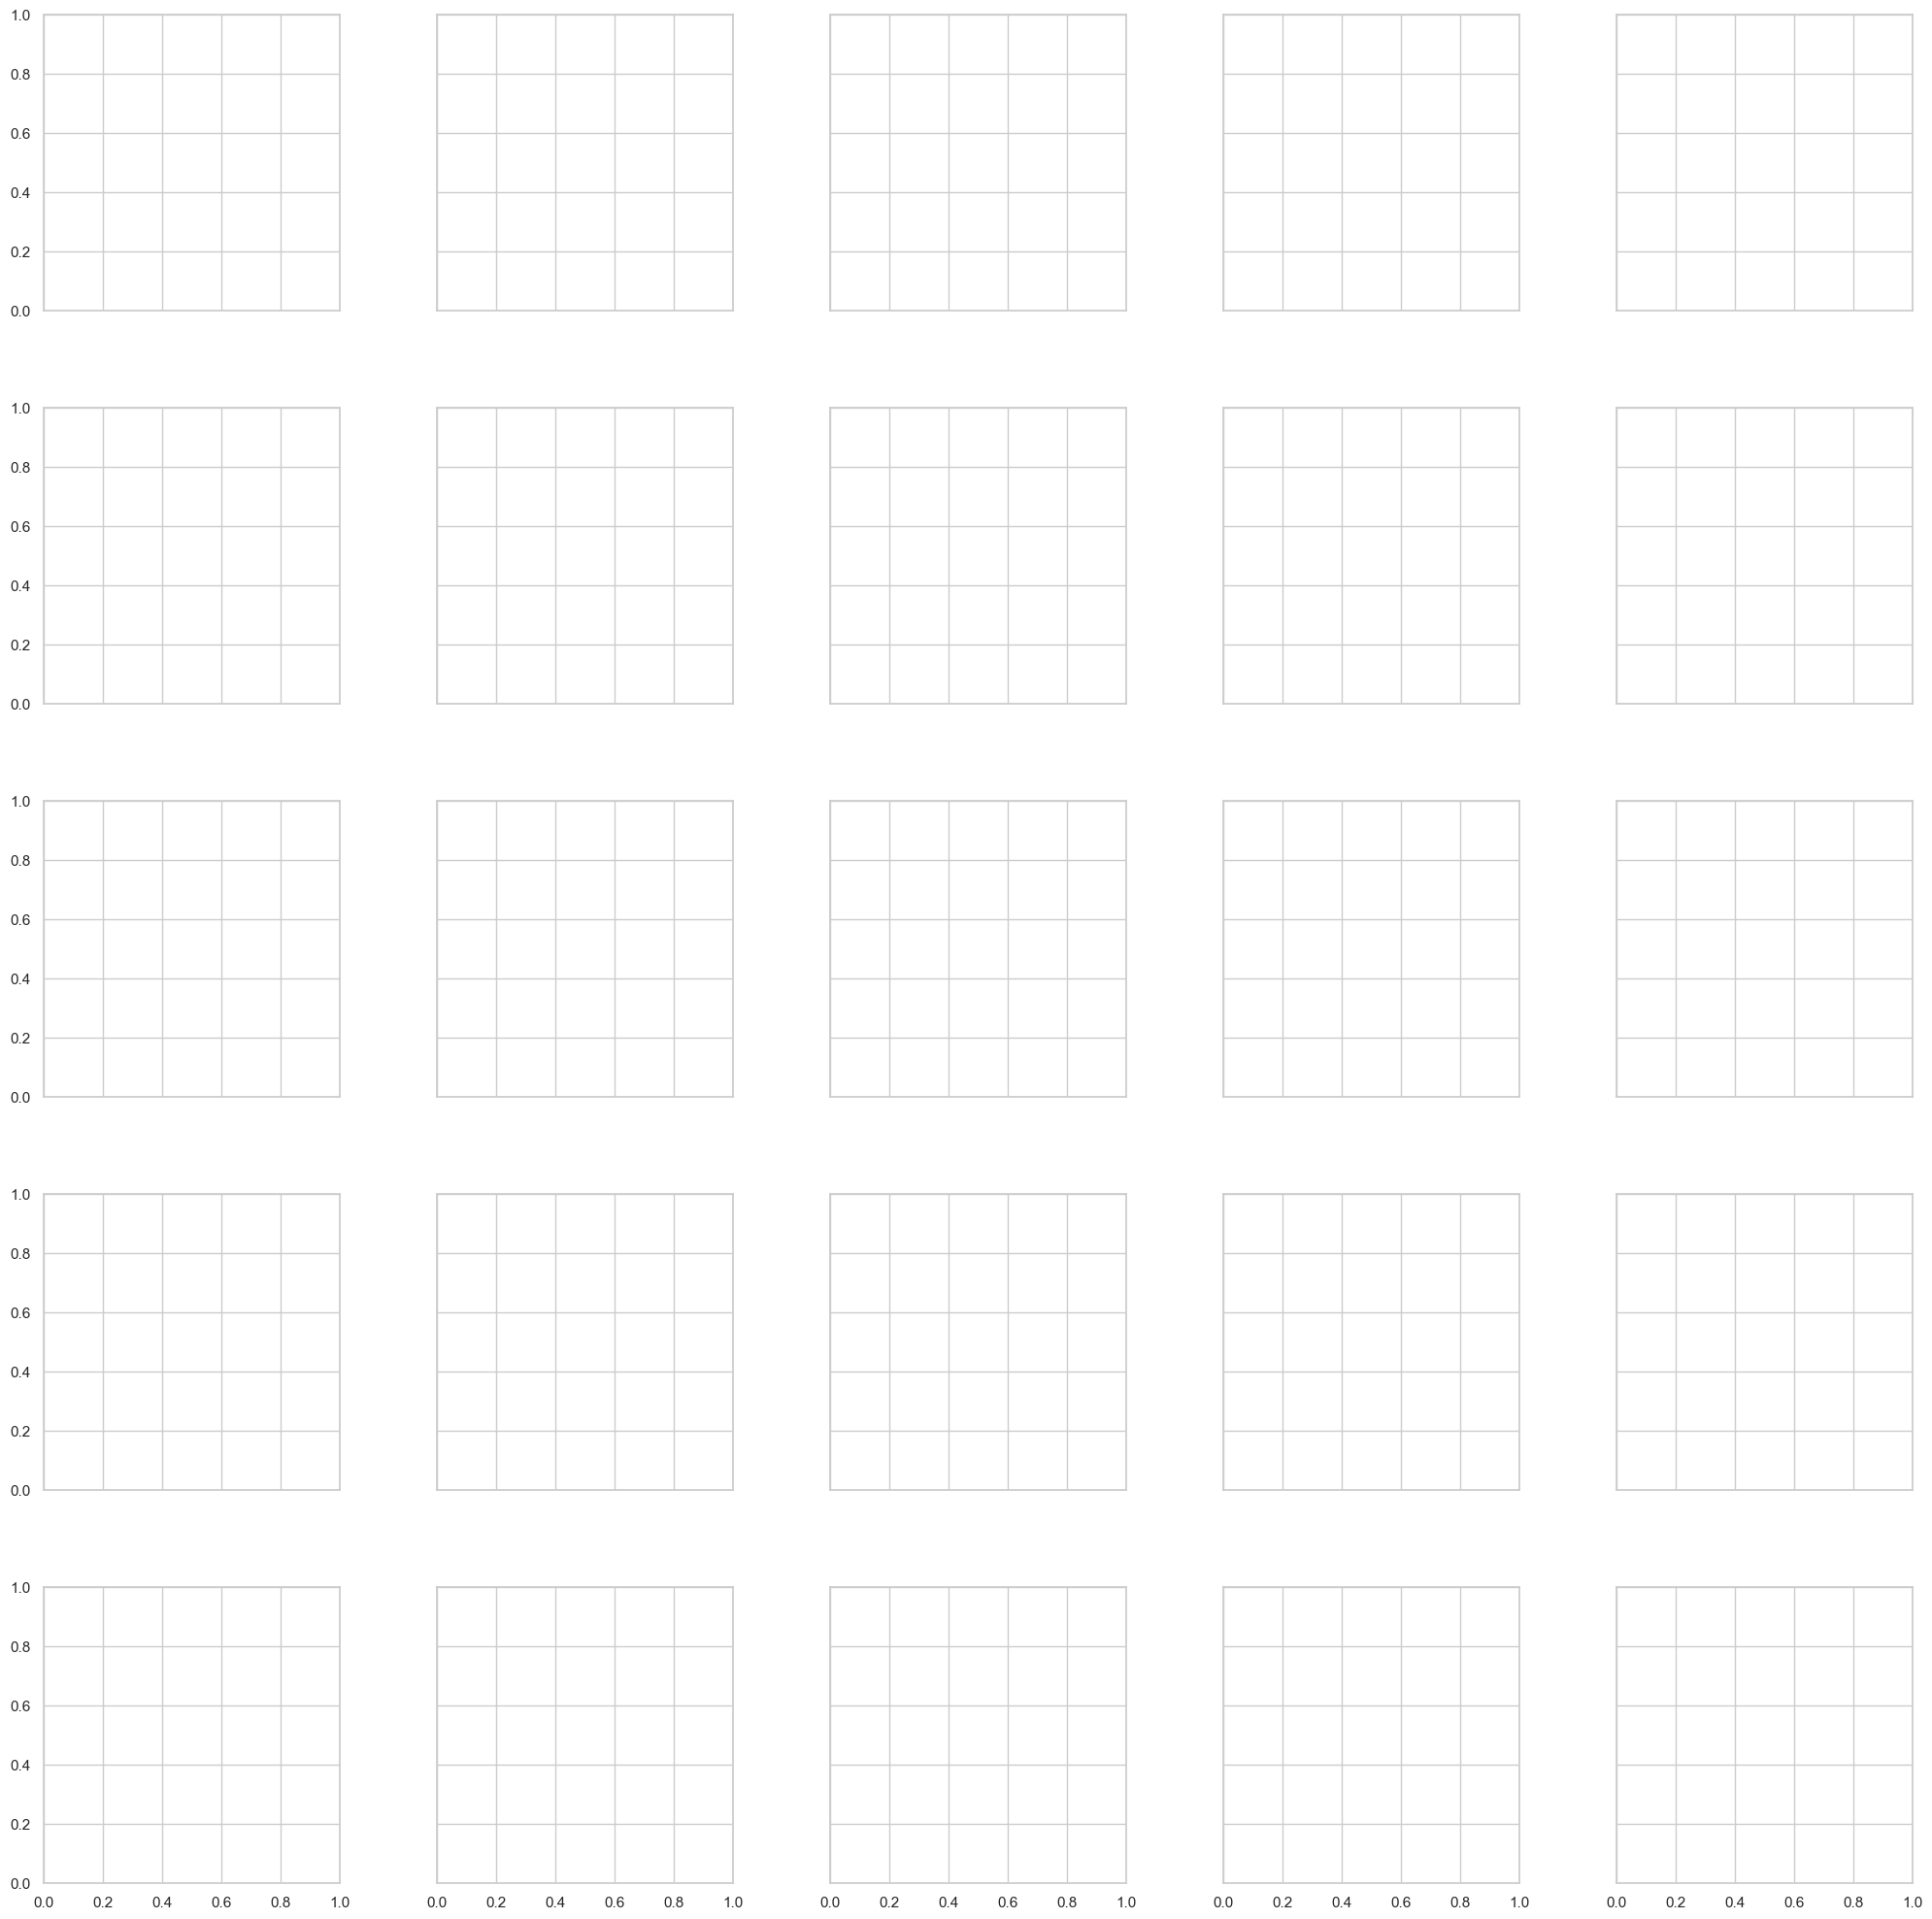

Rank 256 Checkpoint 500


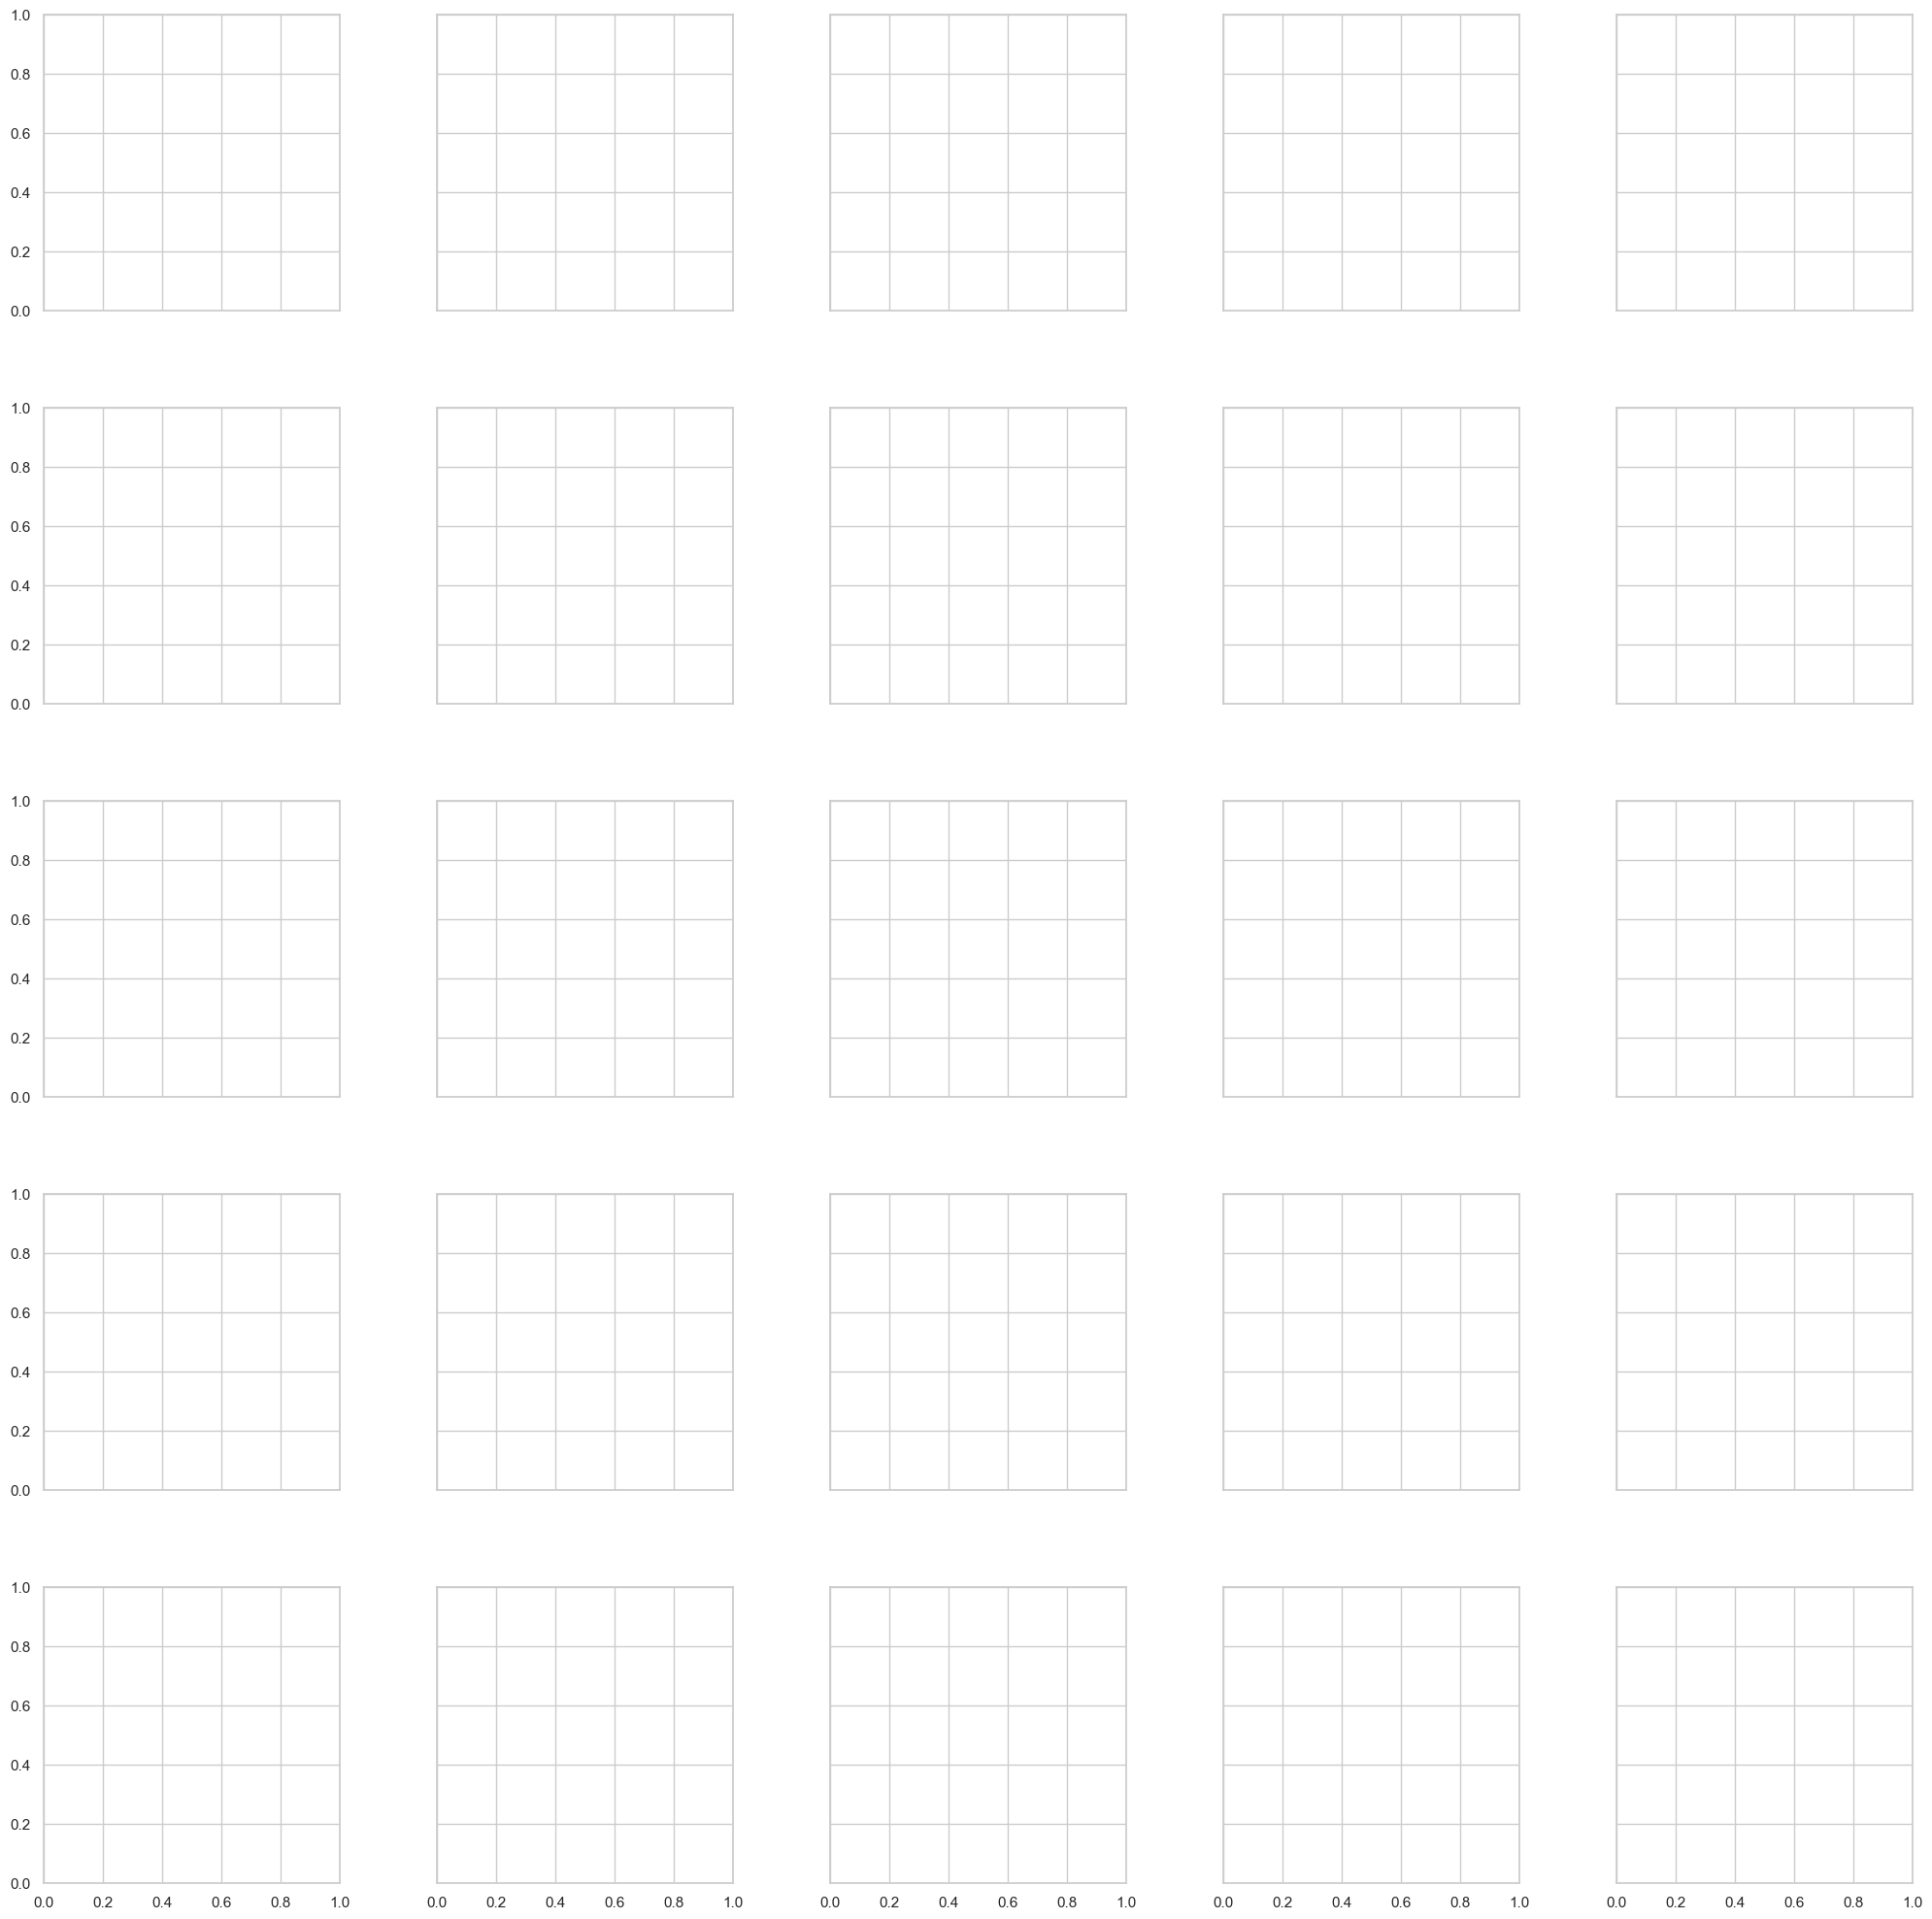

Rank 256 Checkpoint 1000


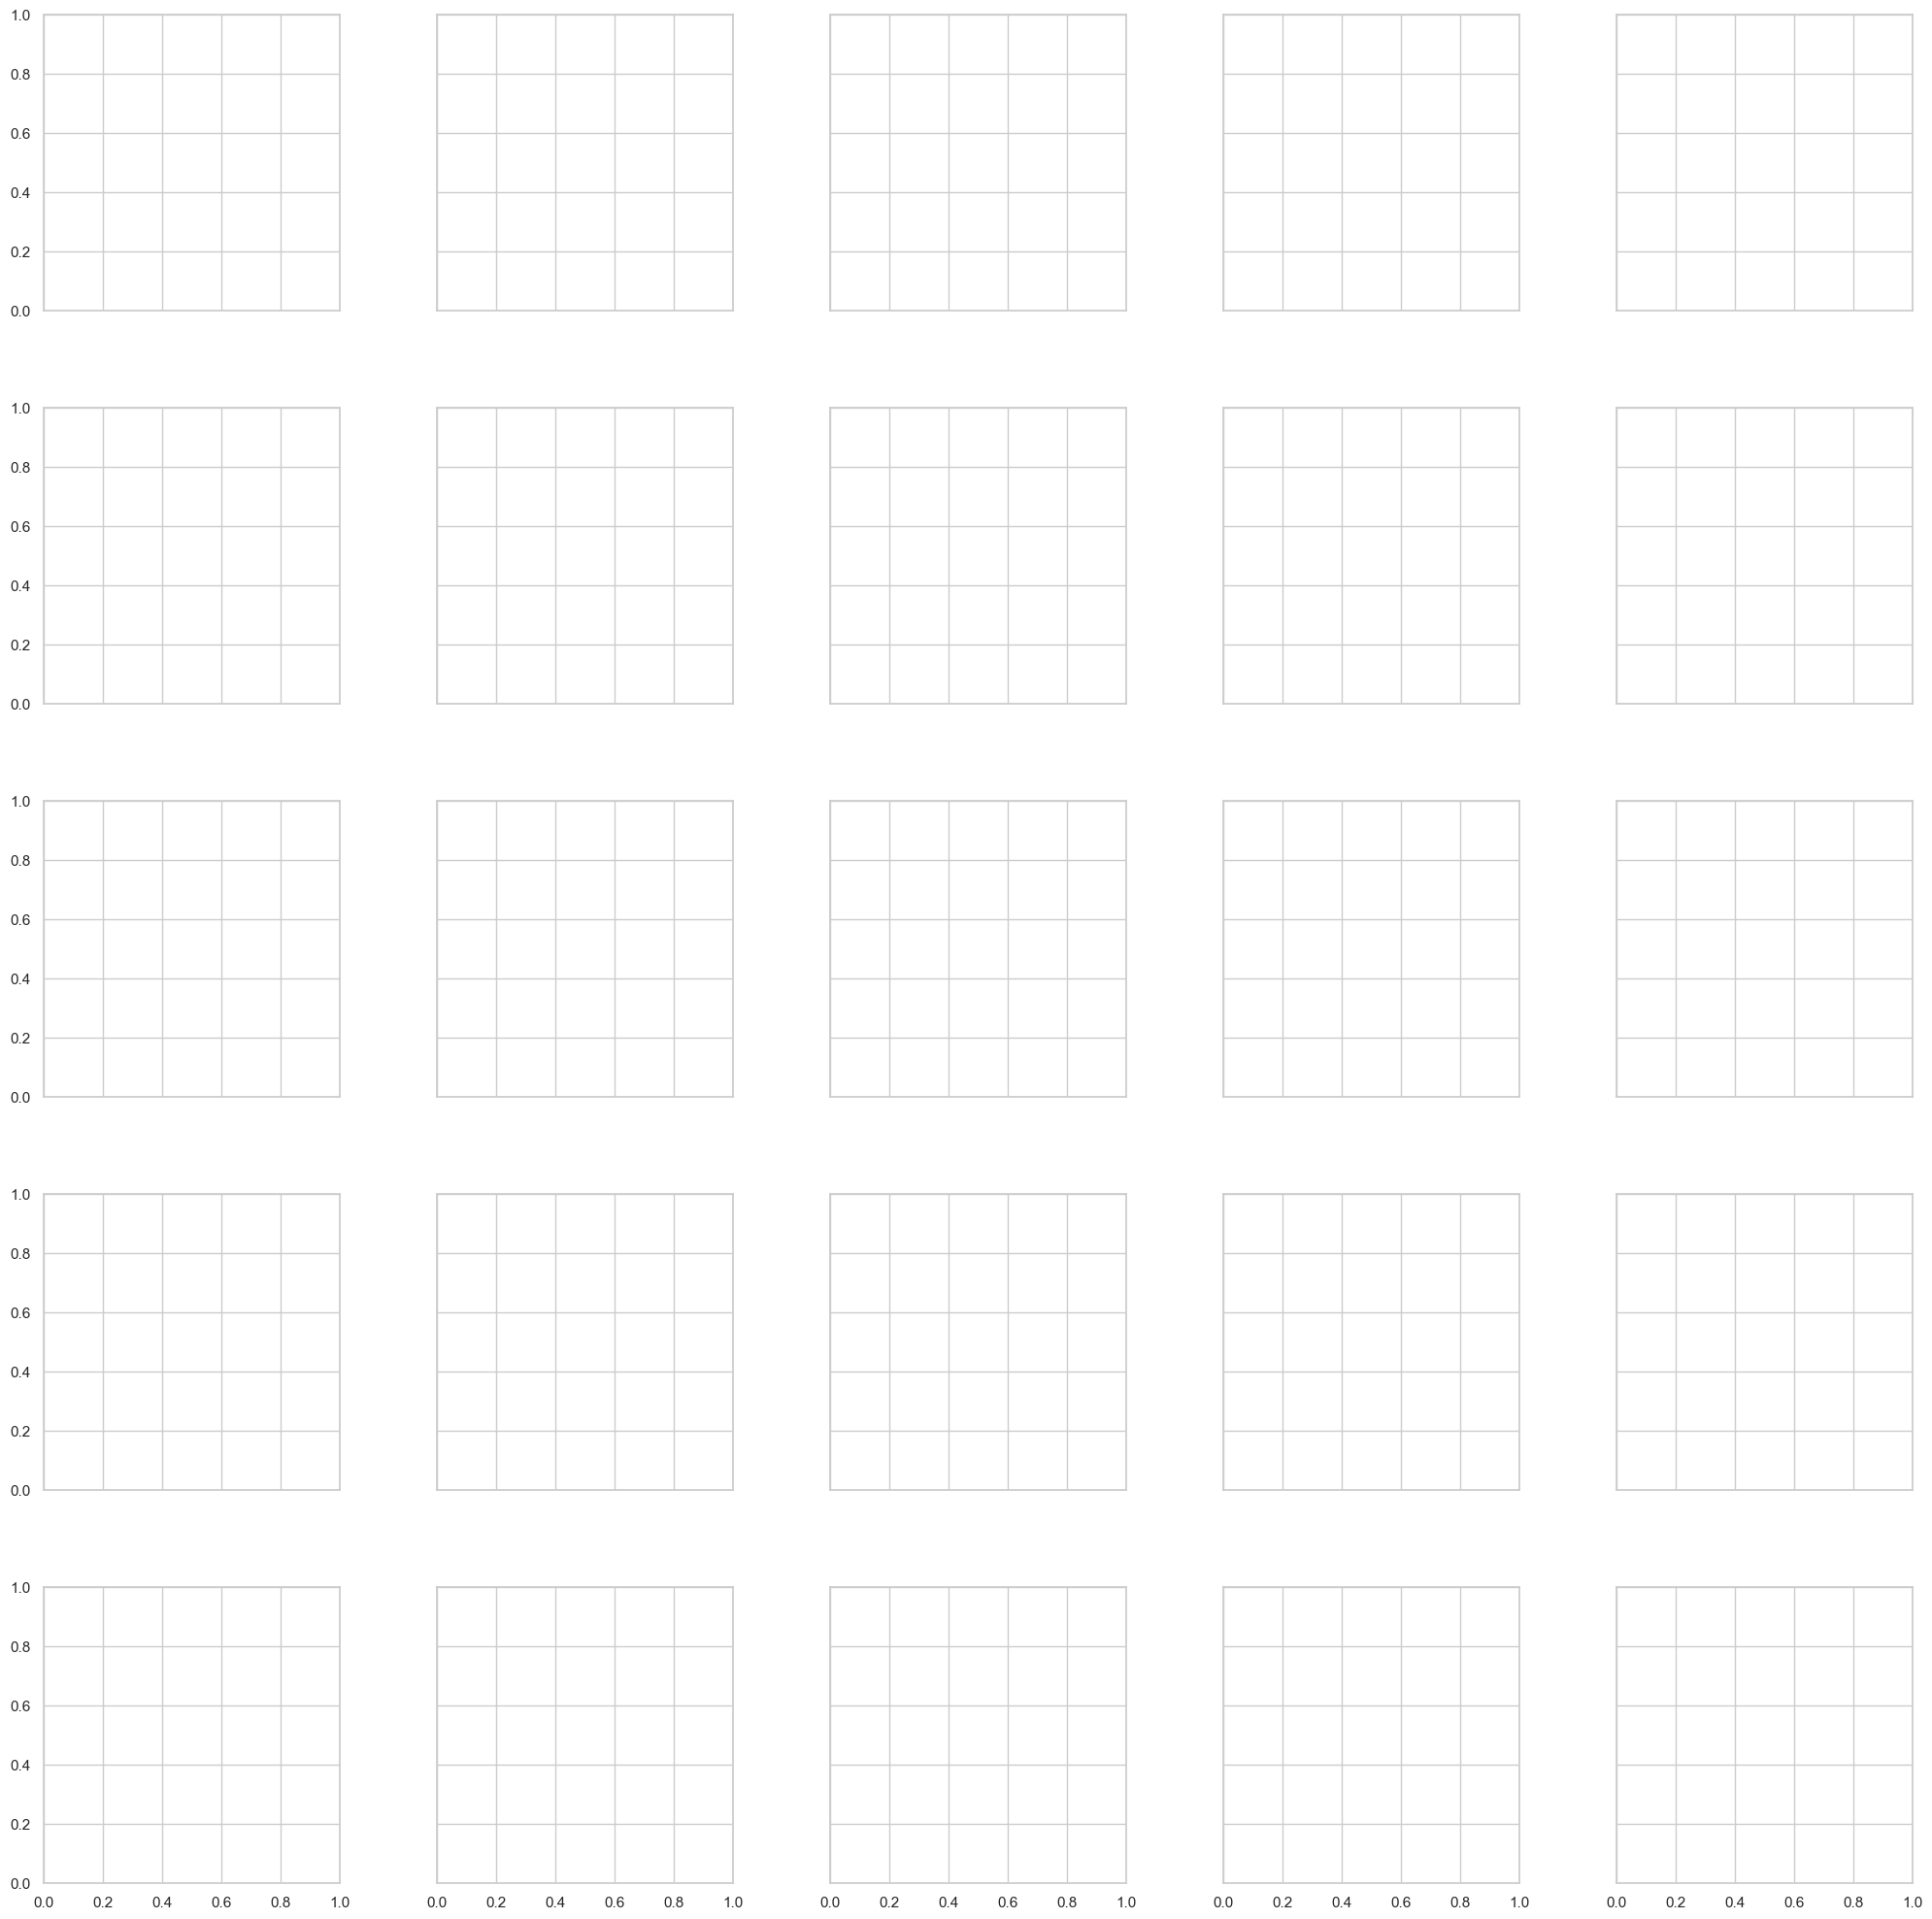

Rank 256 Checkpoint 2000


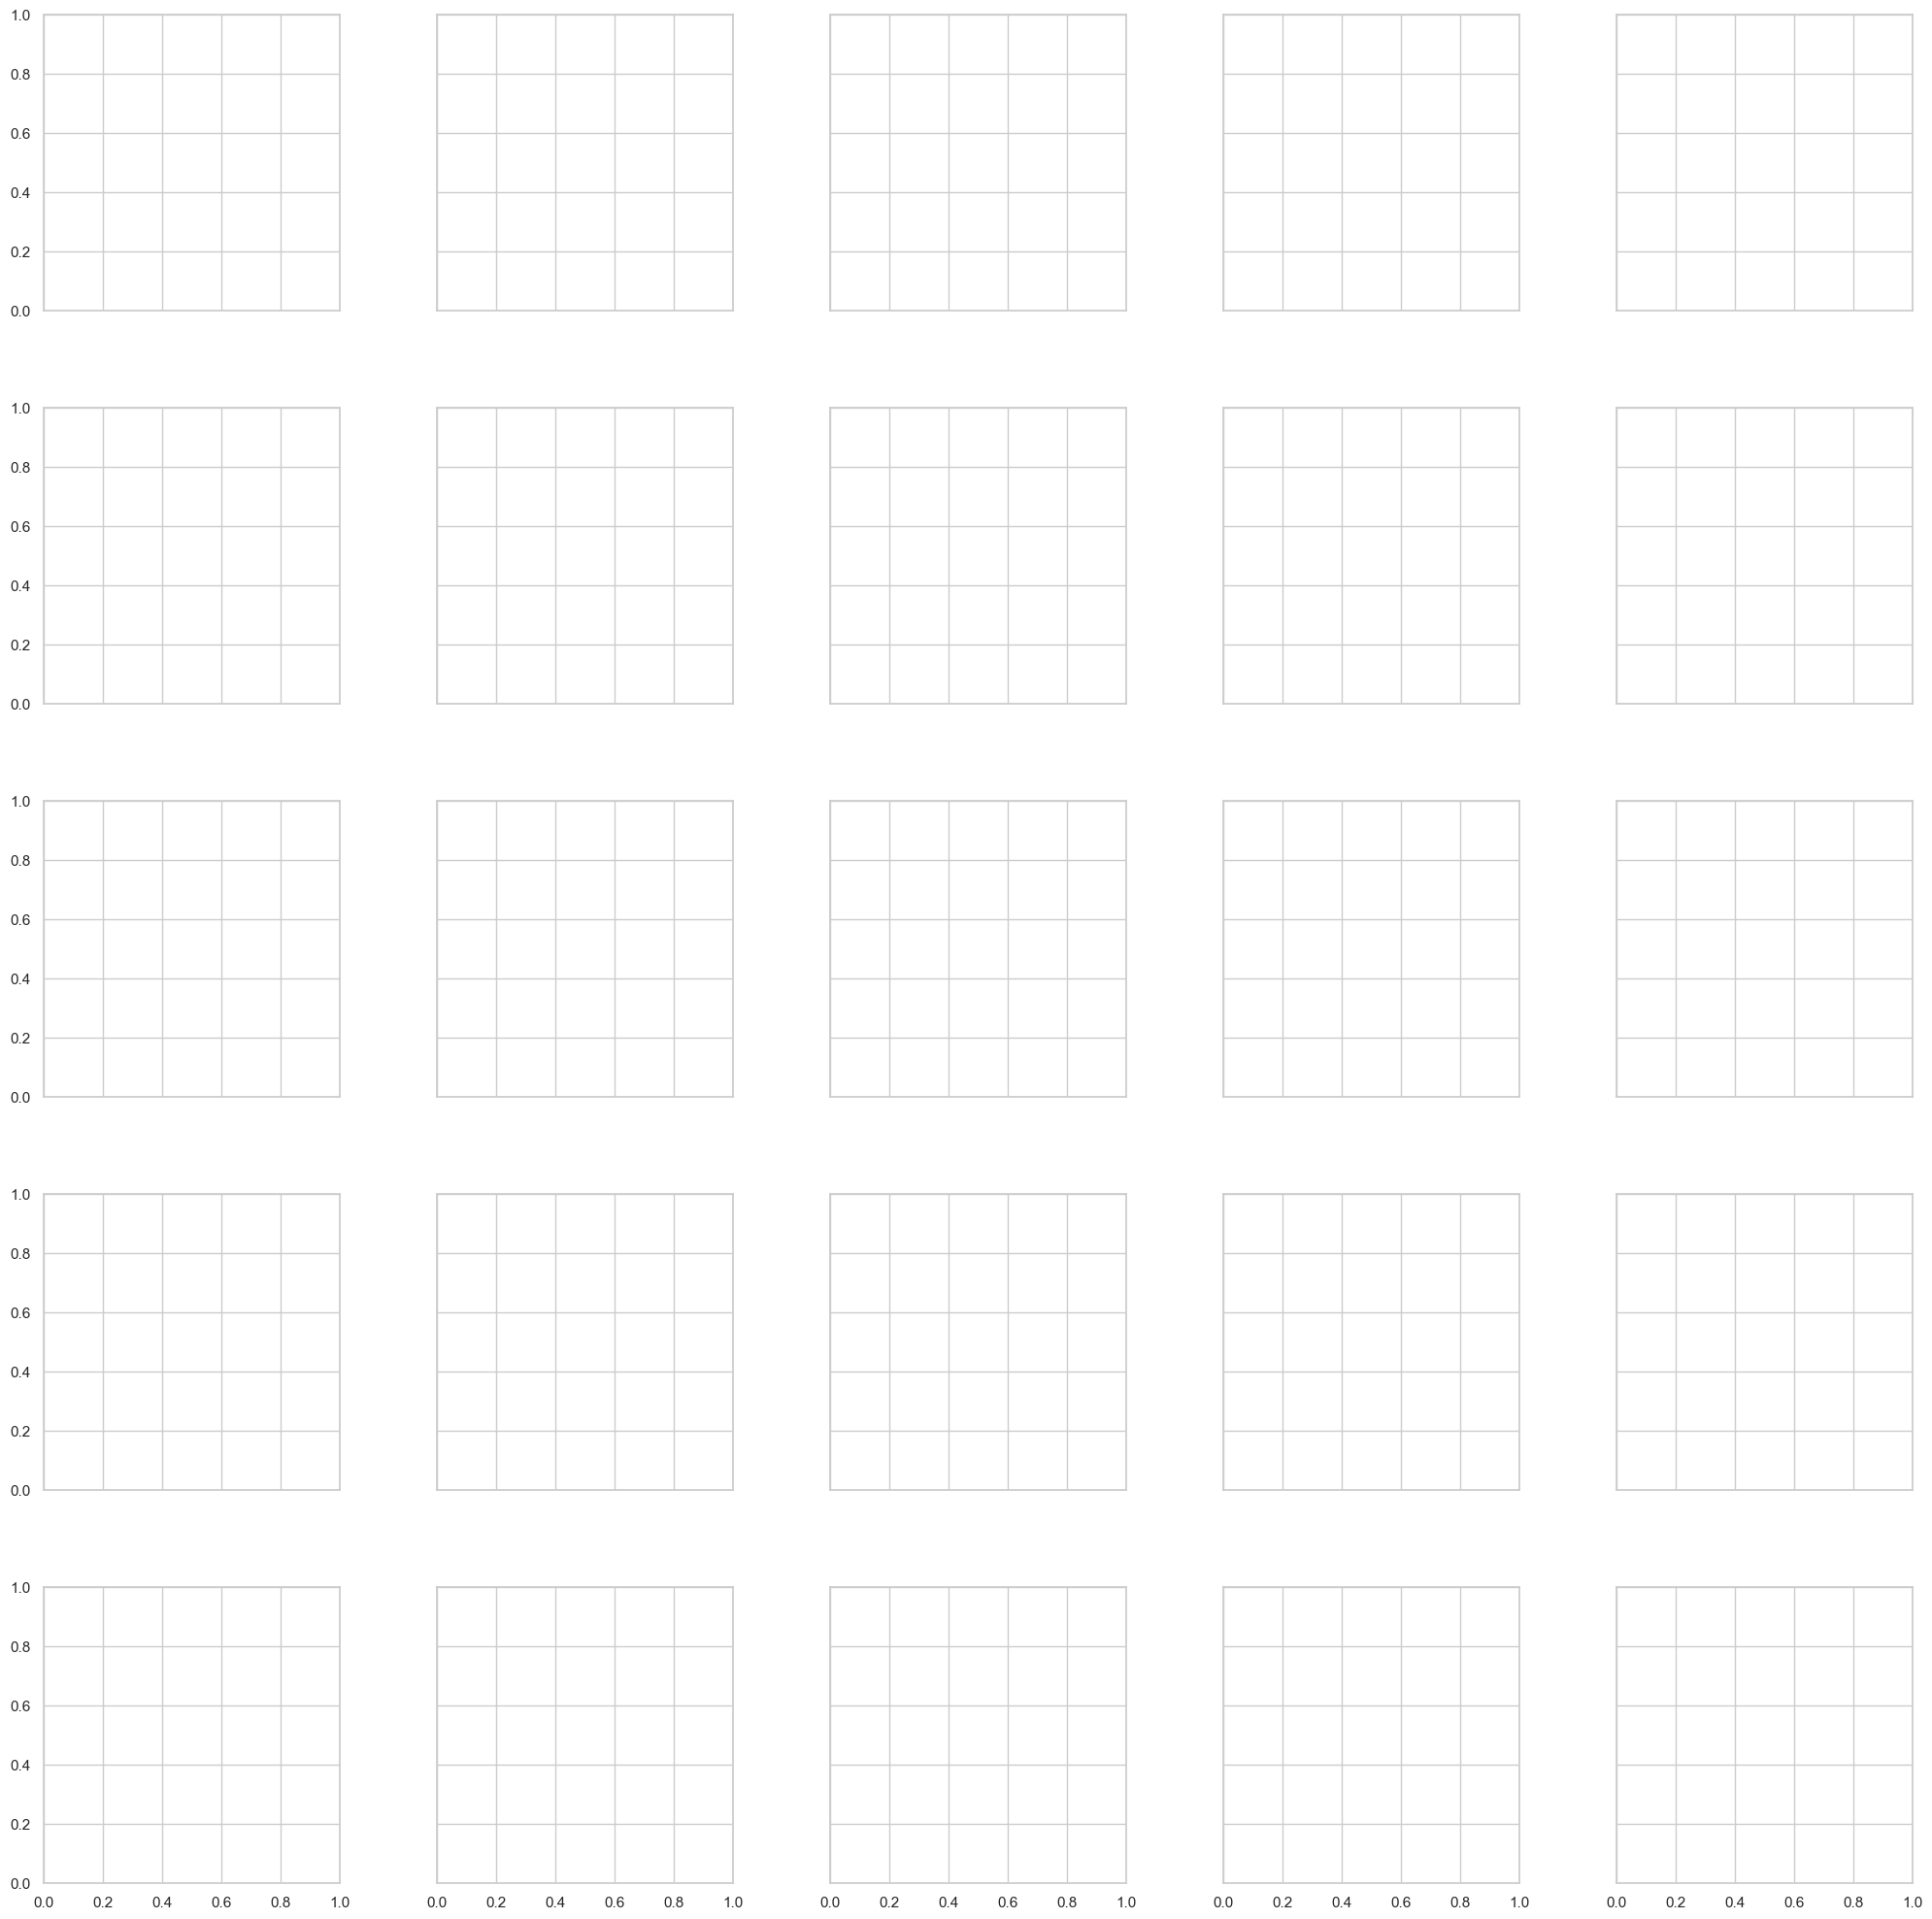

In [28]:
for i in range(2, 9):
    for c in [500, 1000, 2000]:
        j = 2 ** i
        examples = get_examples(f'../inference/generated_images/backpack/t2i/lora_checkpoint_{c}_rank_{j}')
        print(f"Rank {j} Checkpoint {c}")
        draw_examples(examples)

Concept: cat

Rank 4 Checkpoint 500


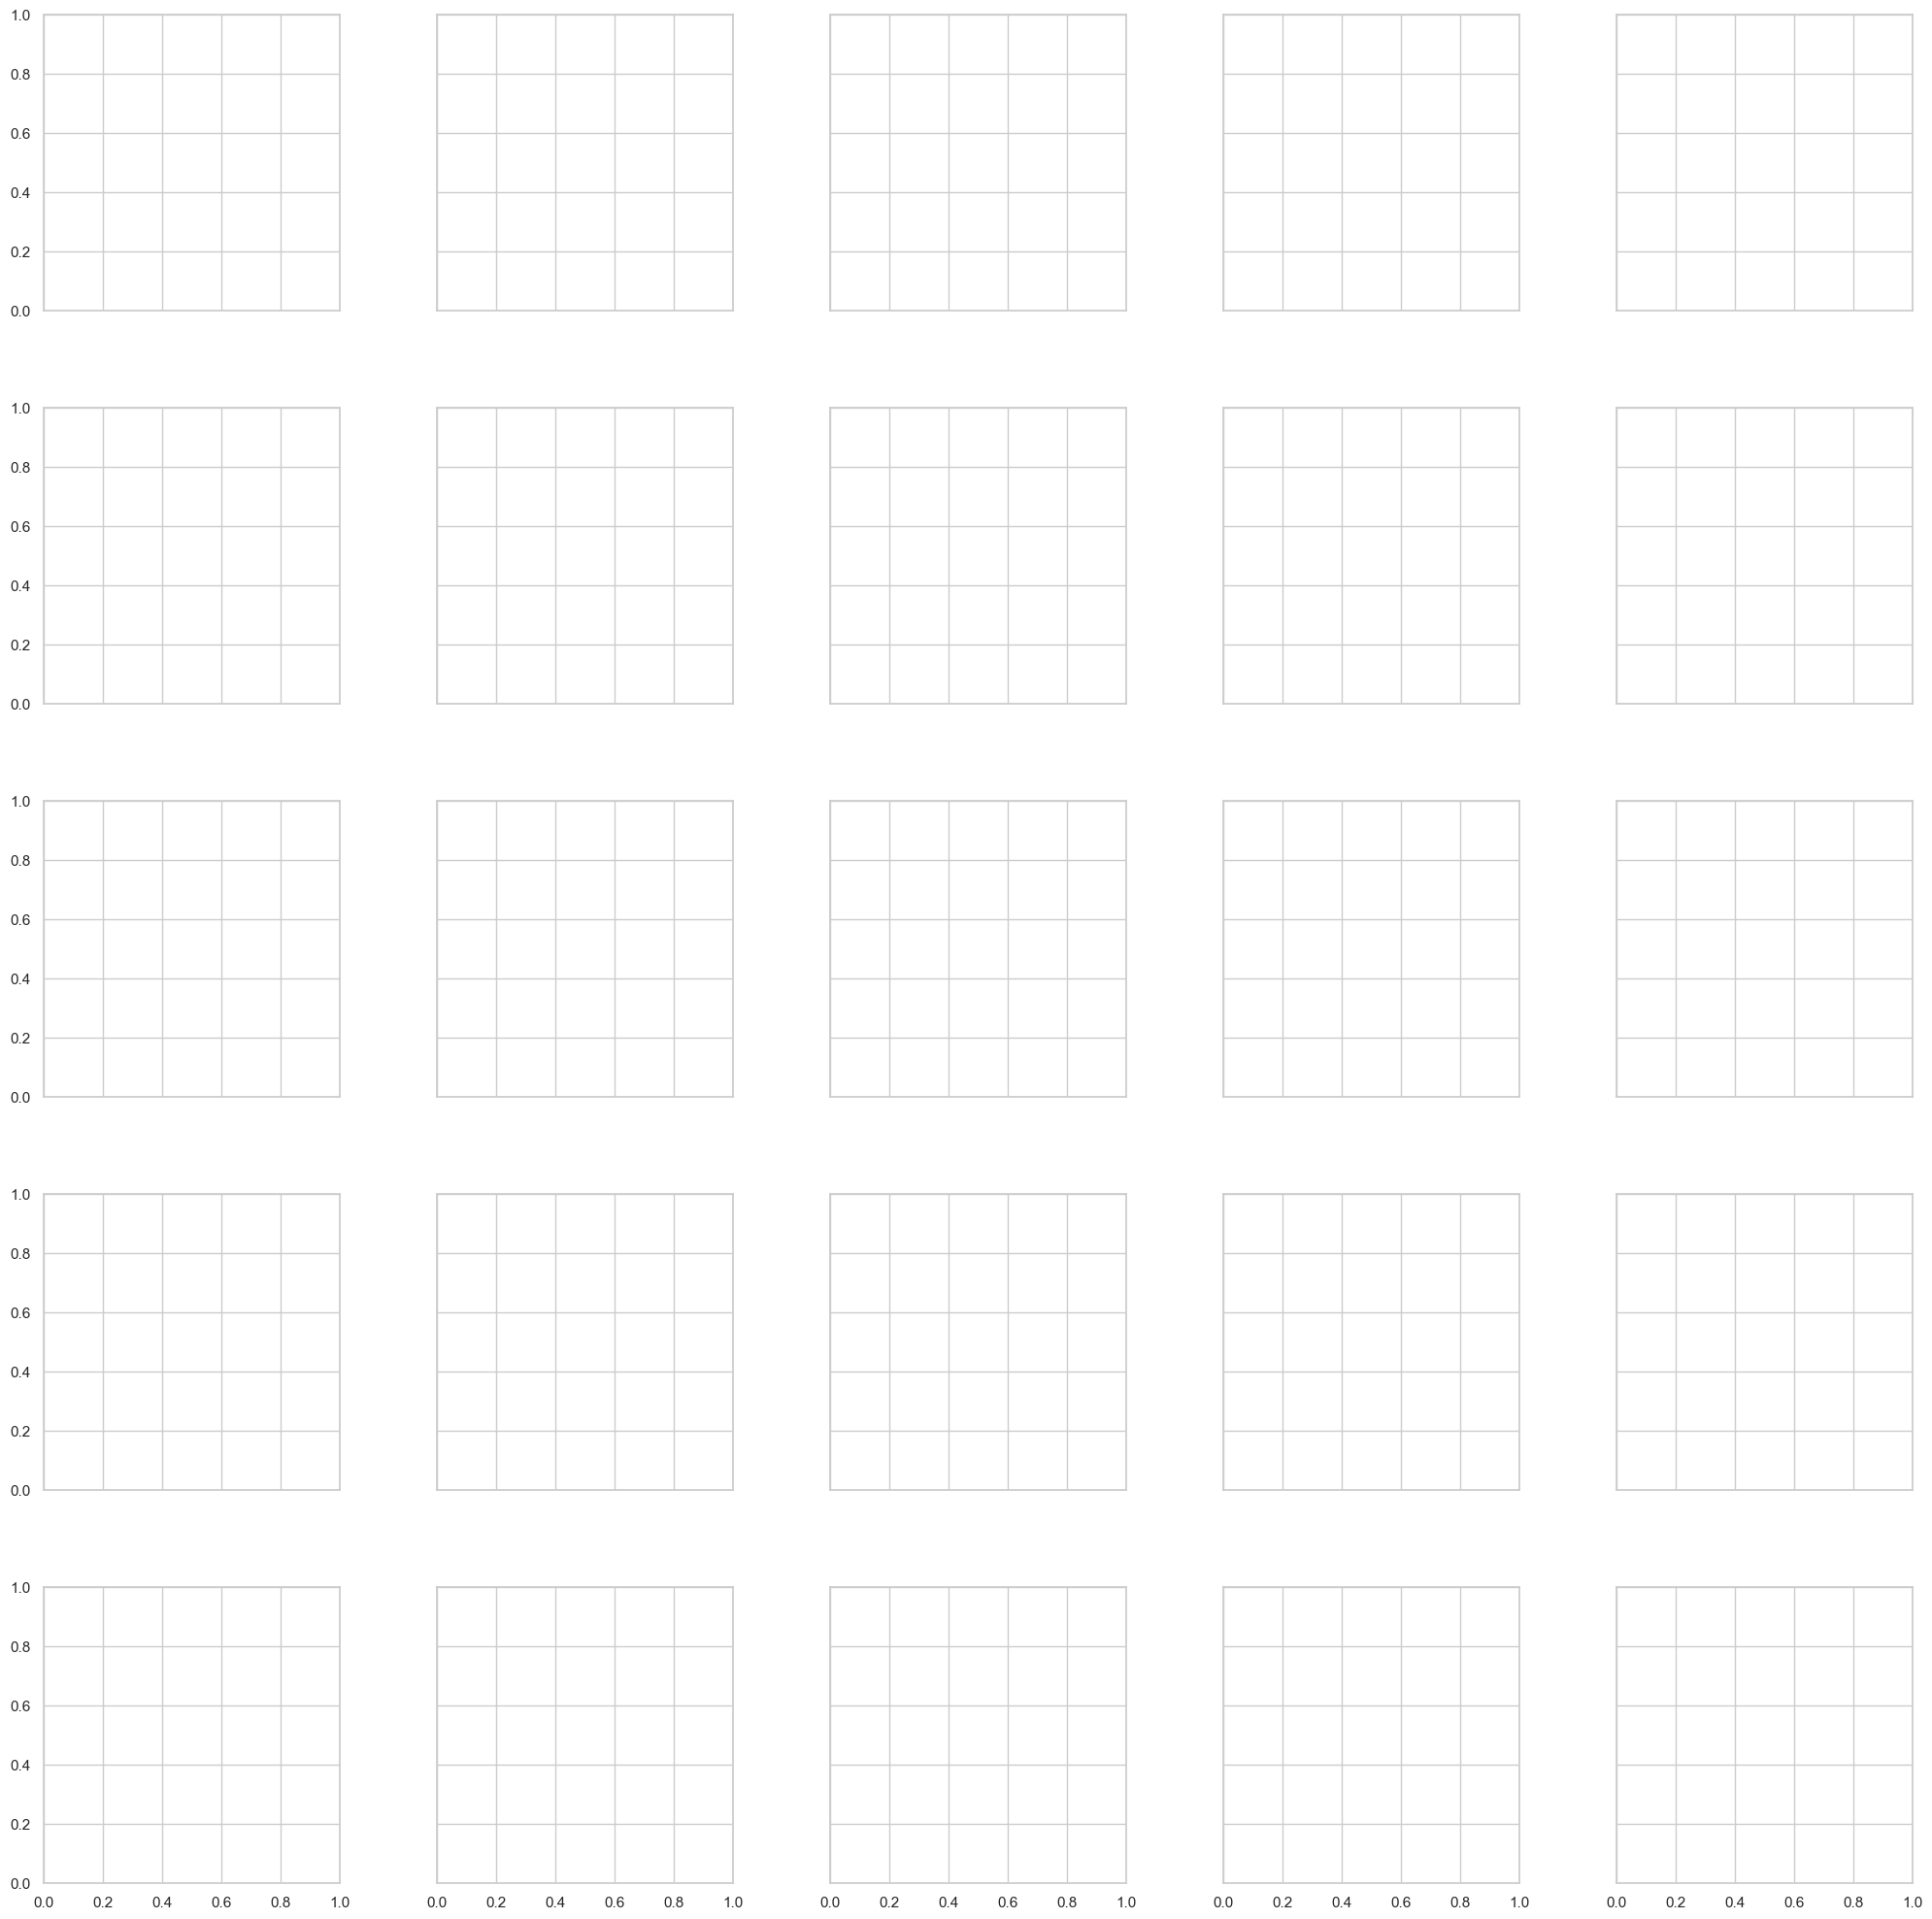

Rank 4 Checkpoint 1000


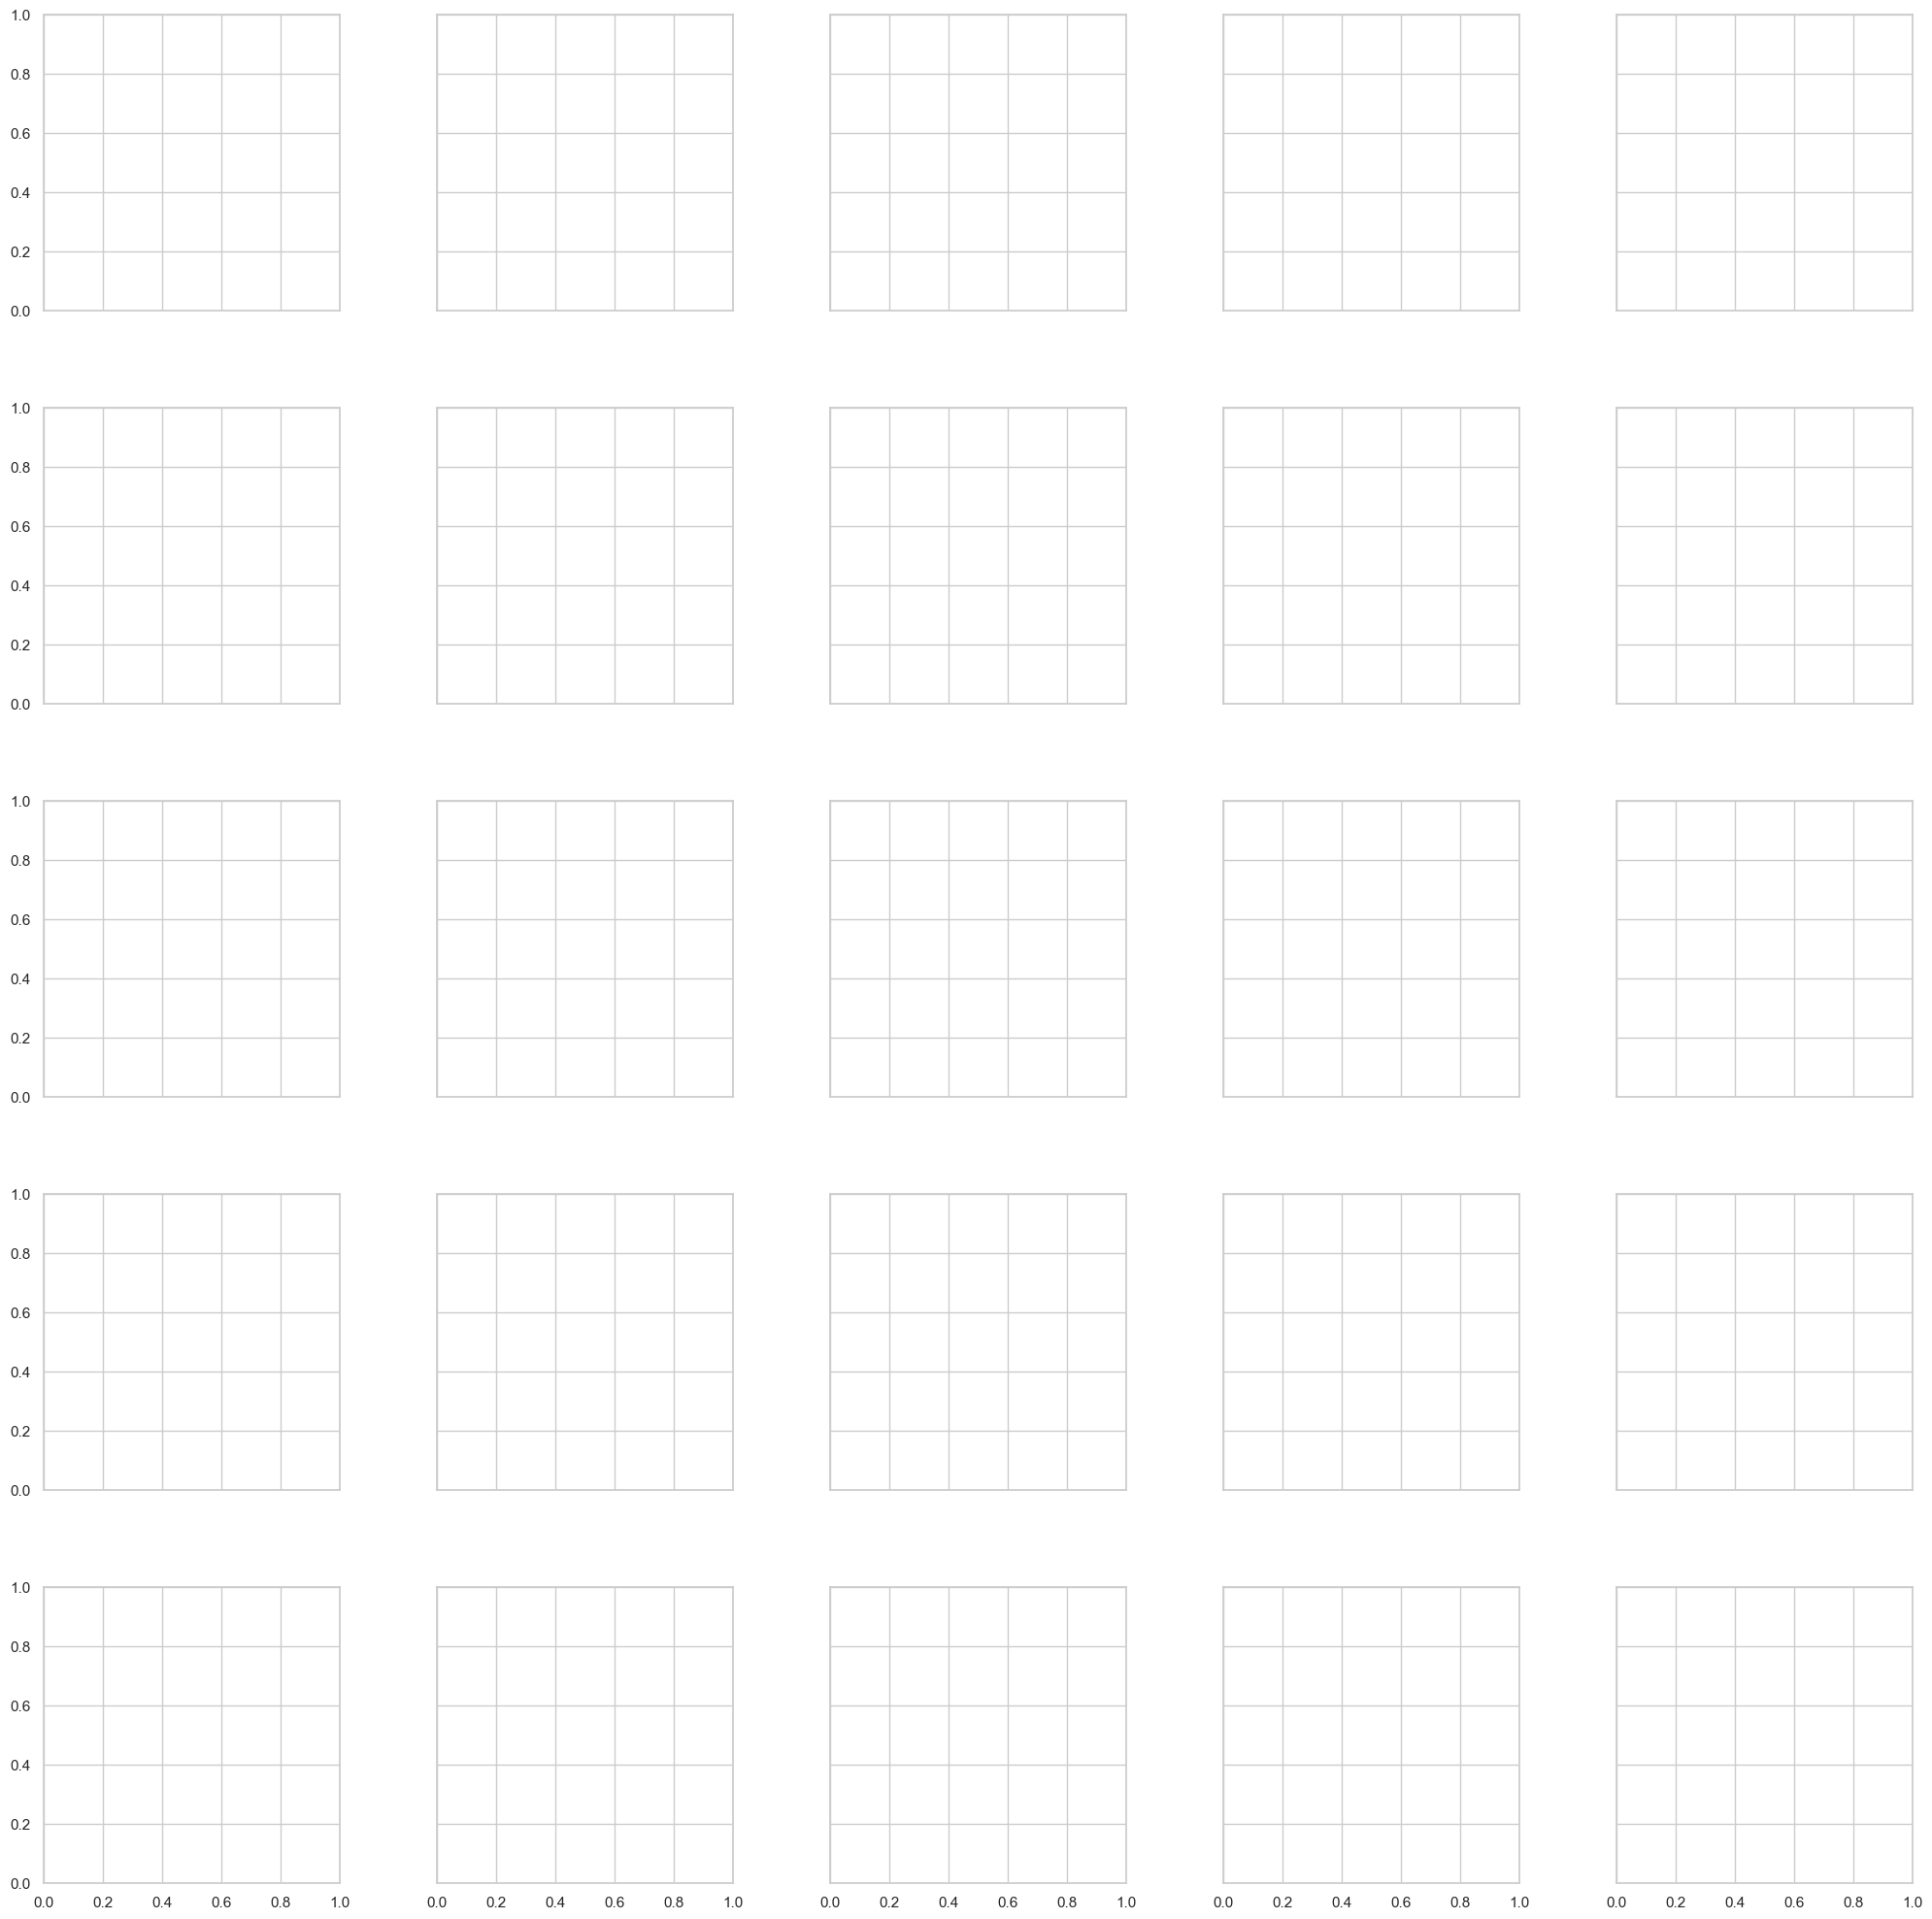

Rank 4 Checkpoint 2000


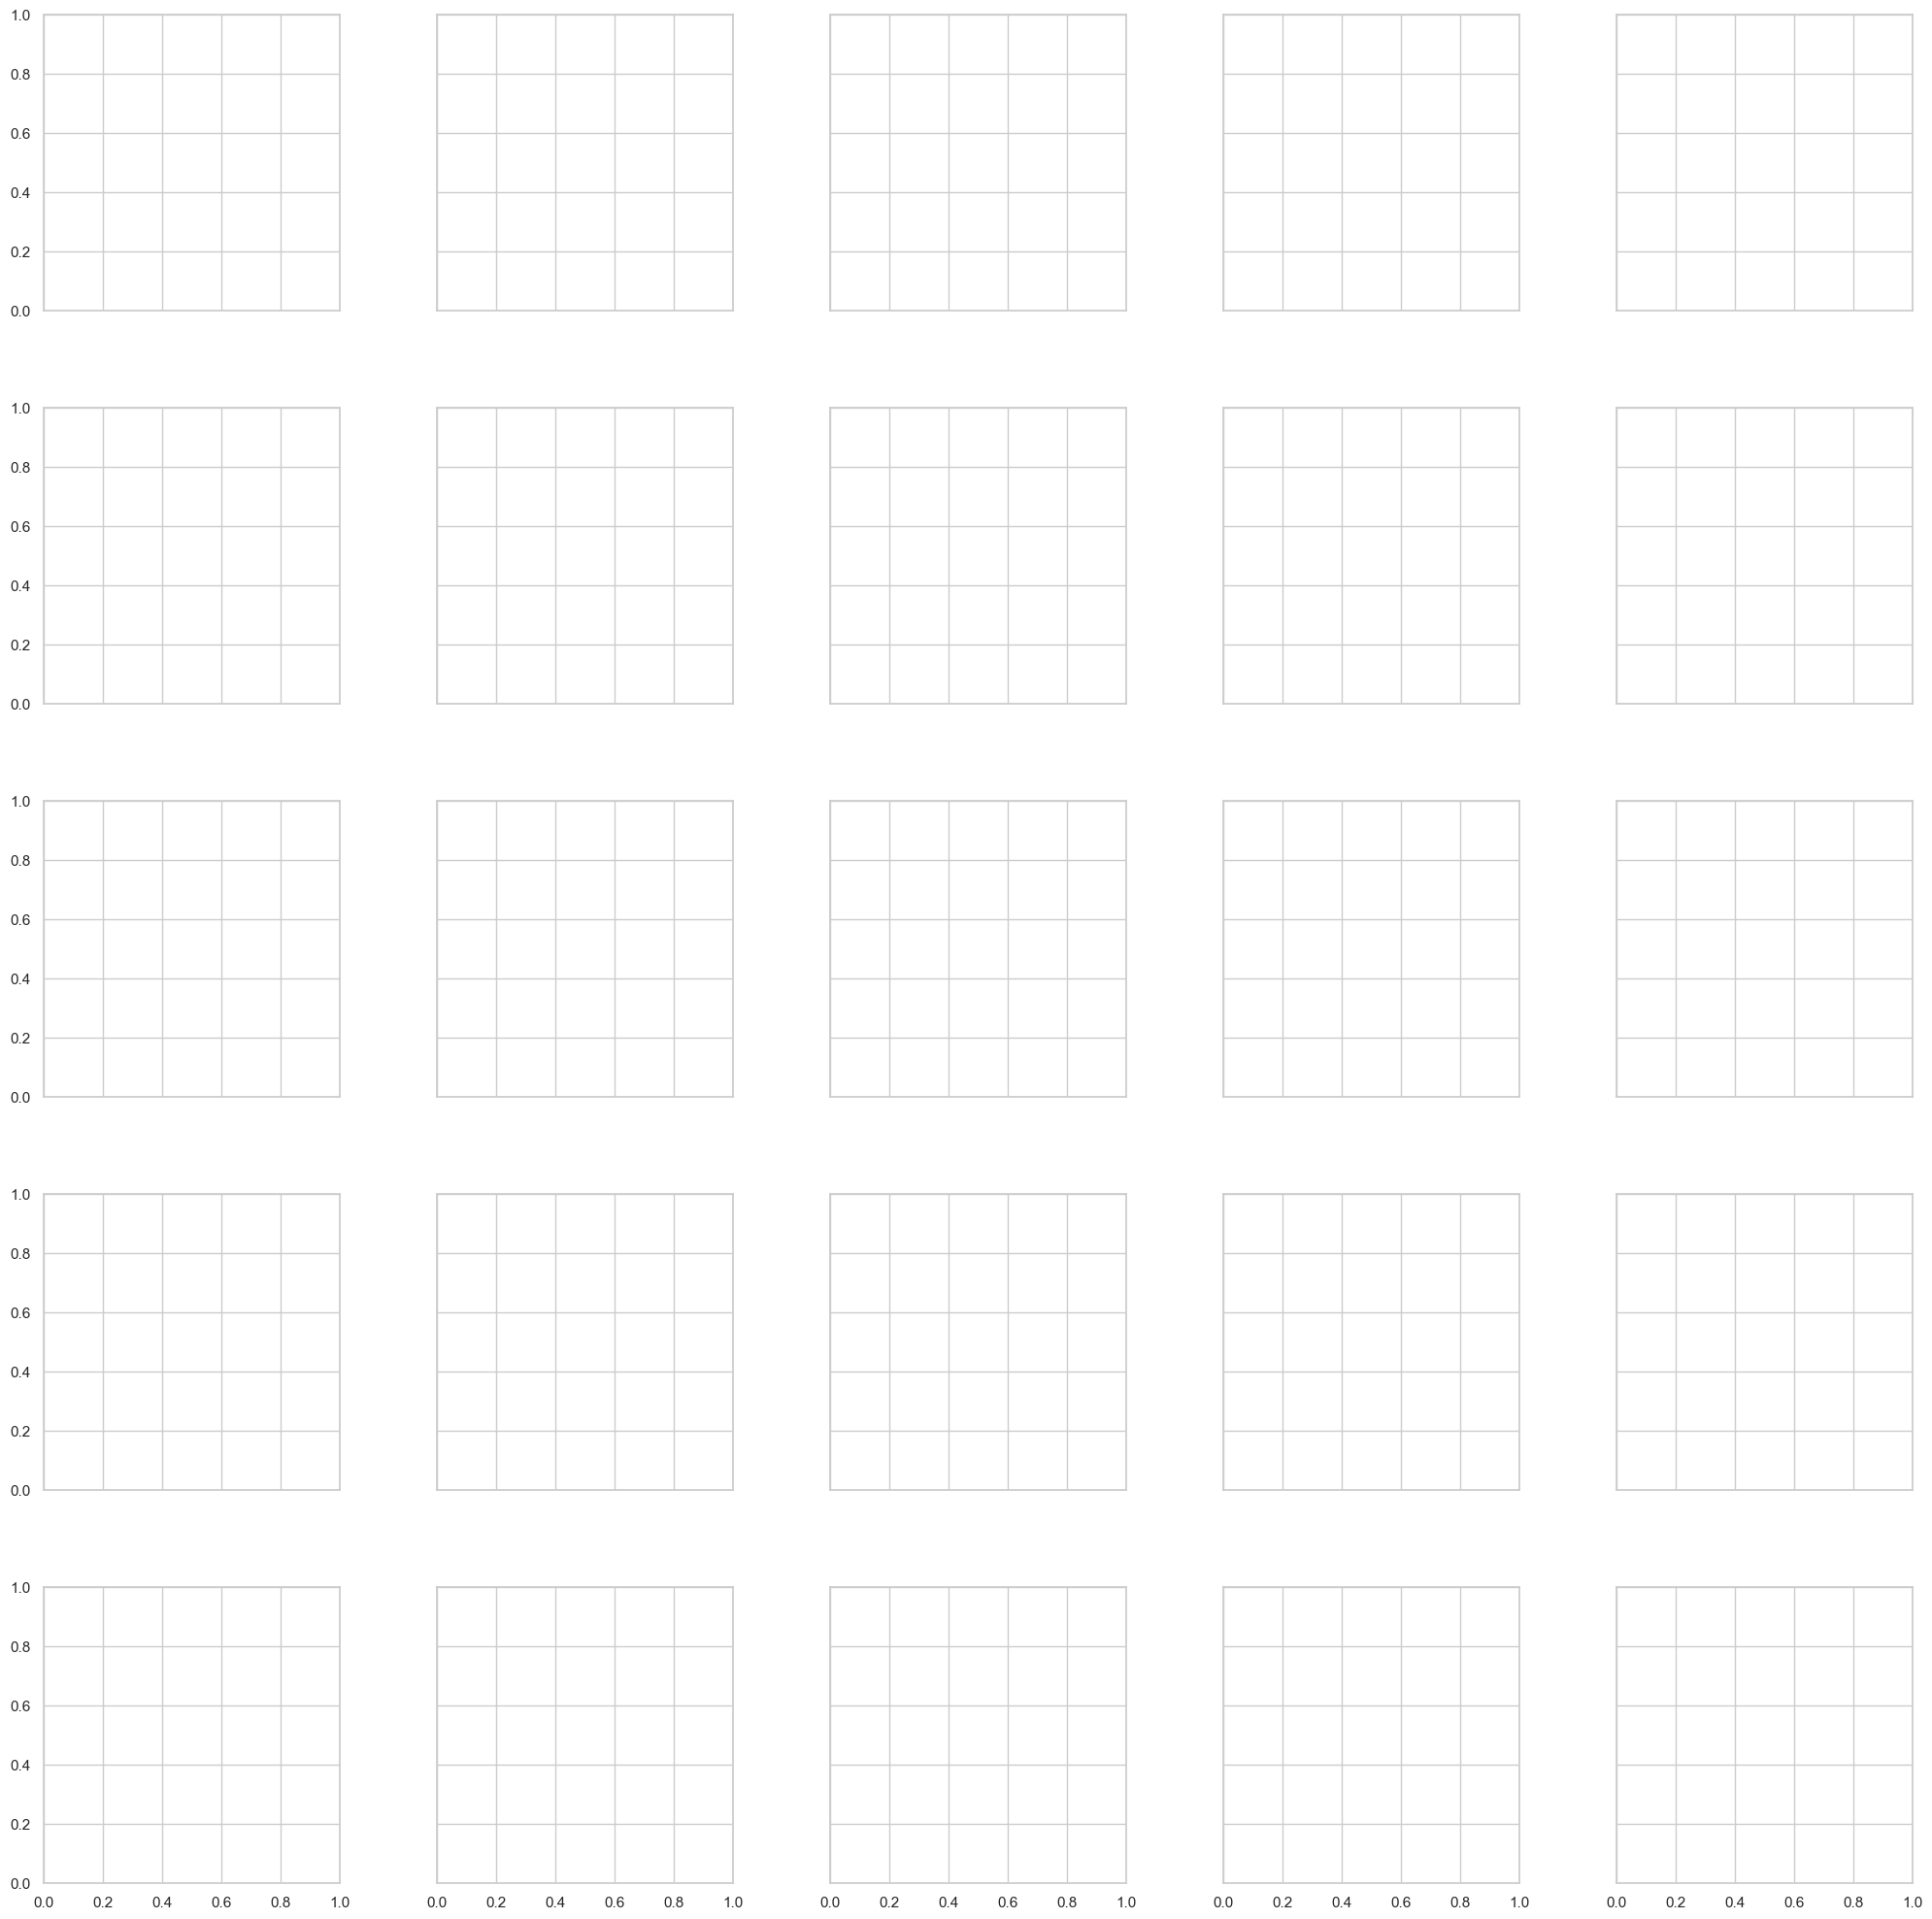

Rank 8 Checkpoint 500


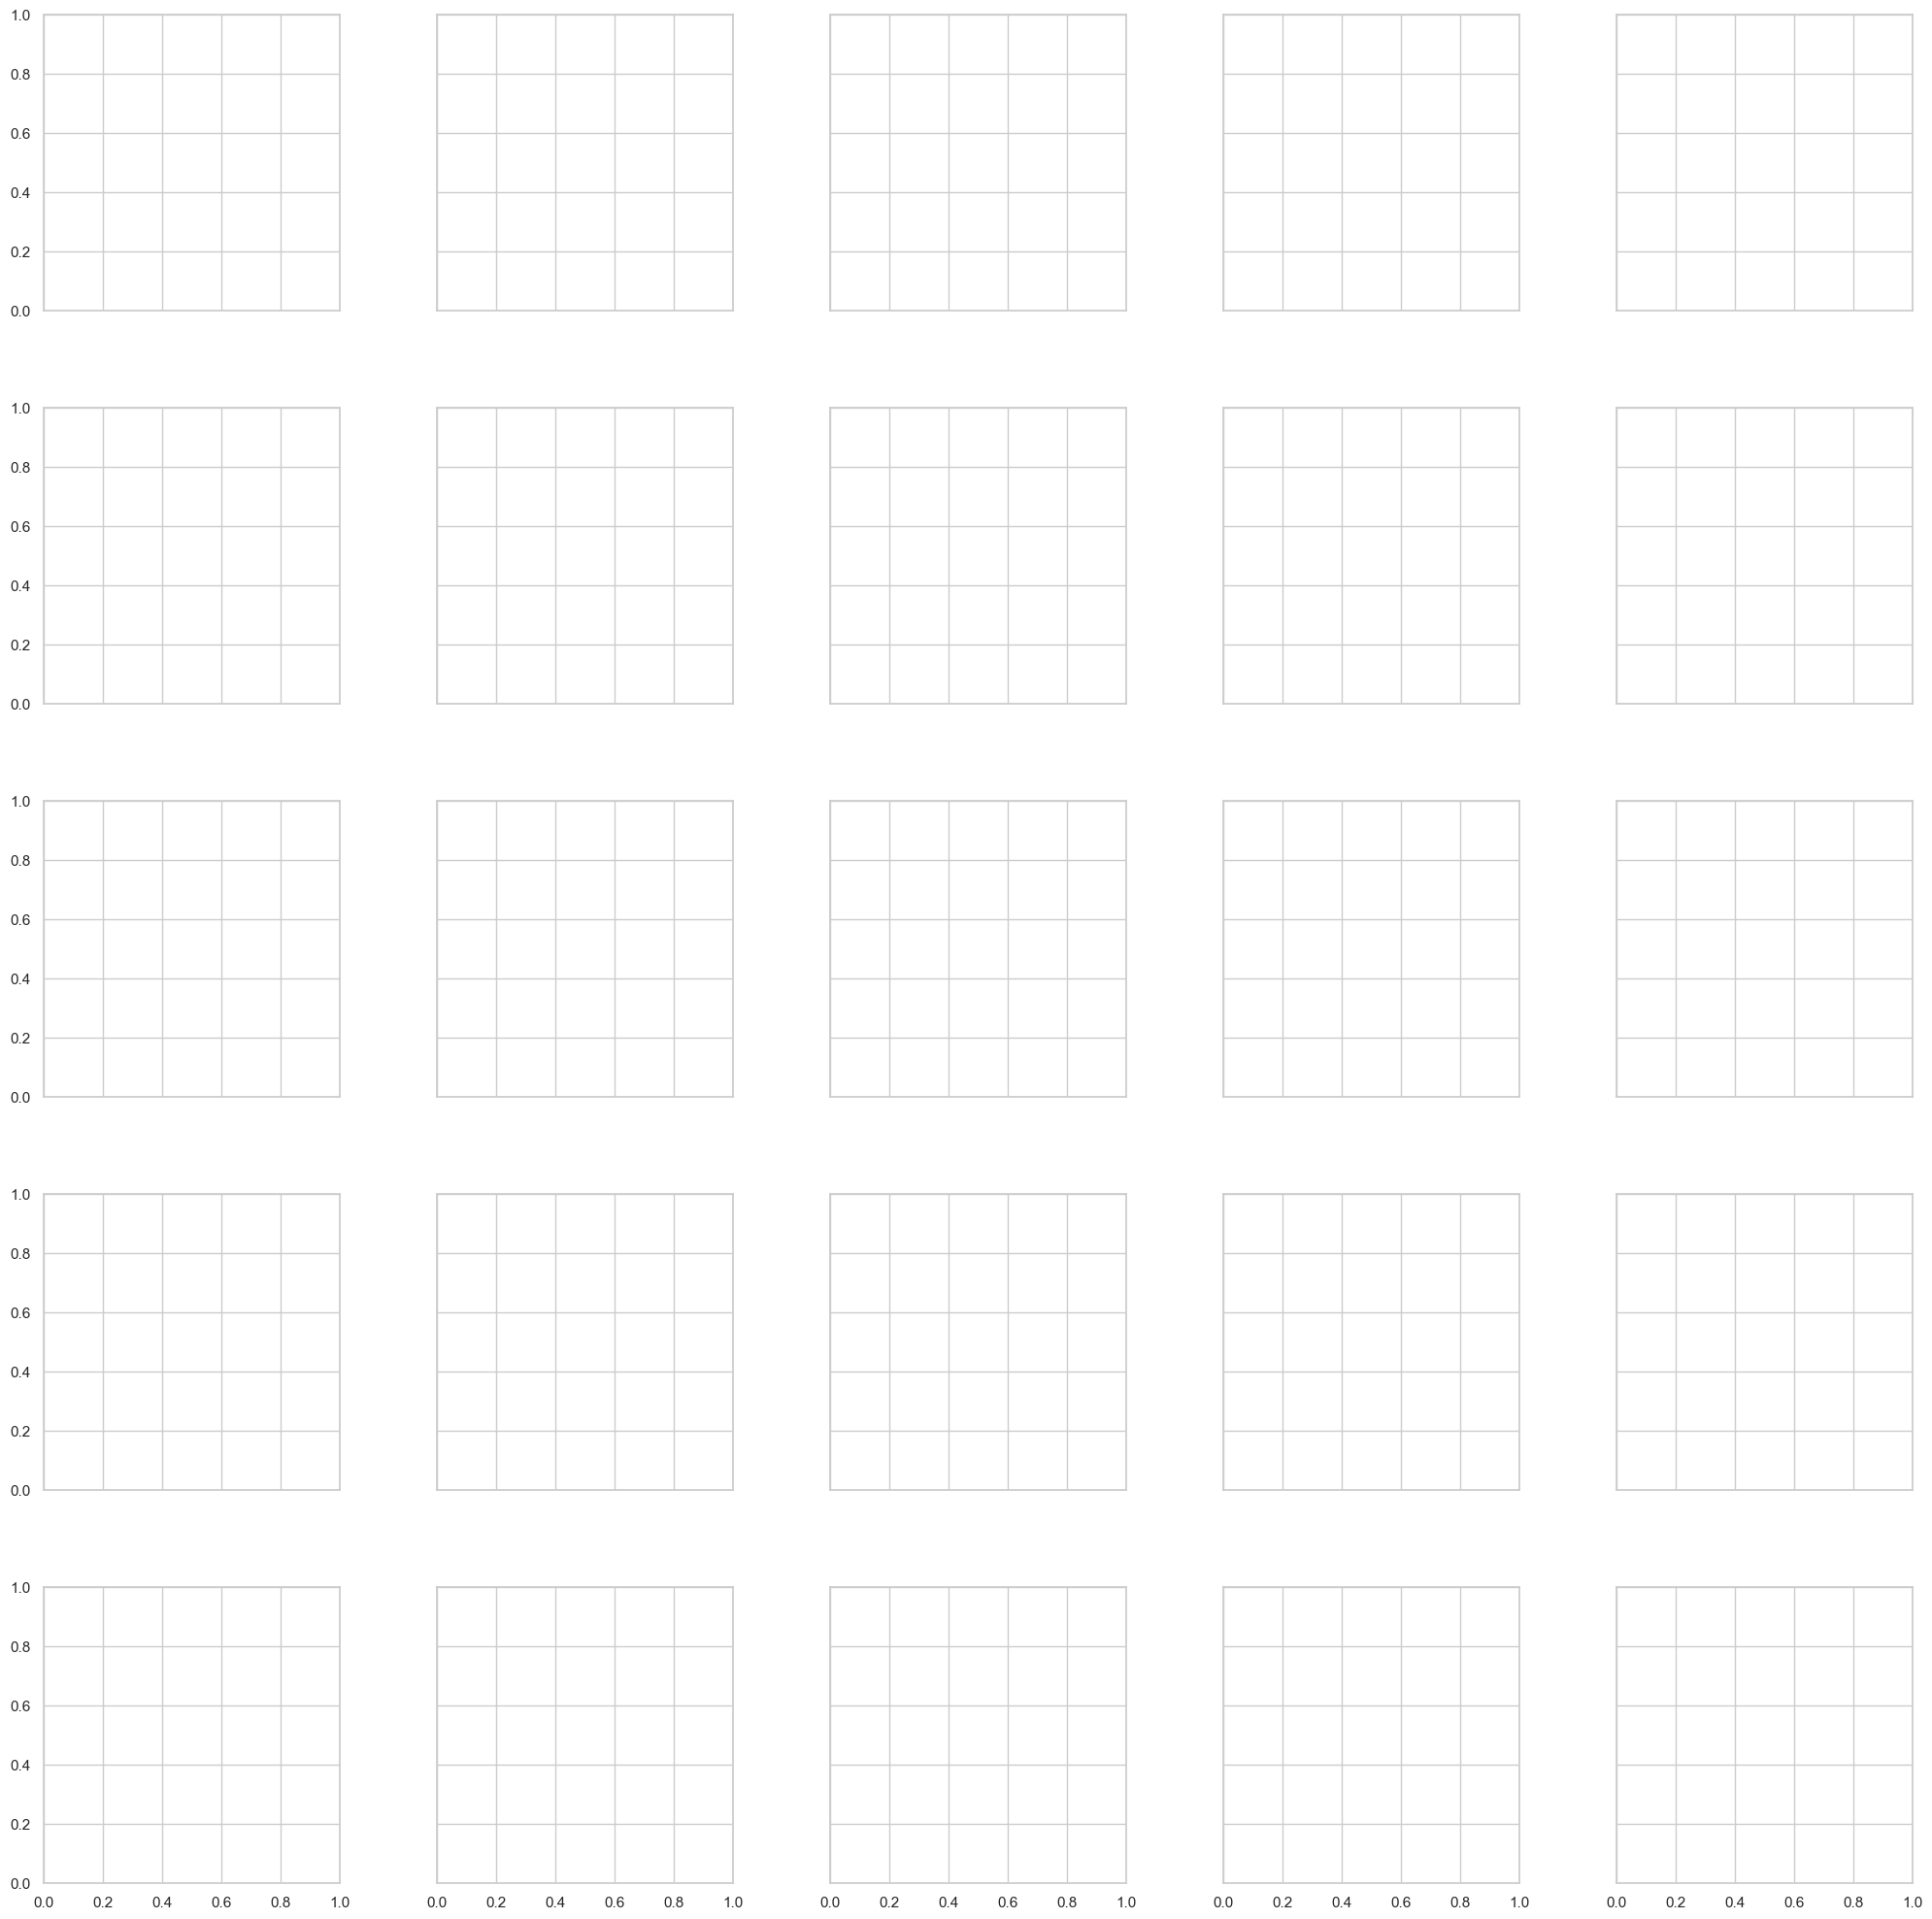

Rank 8 Checkpoint 1000


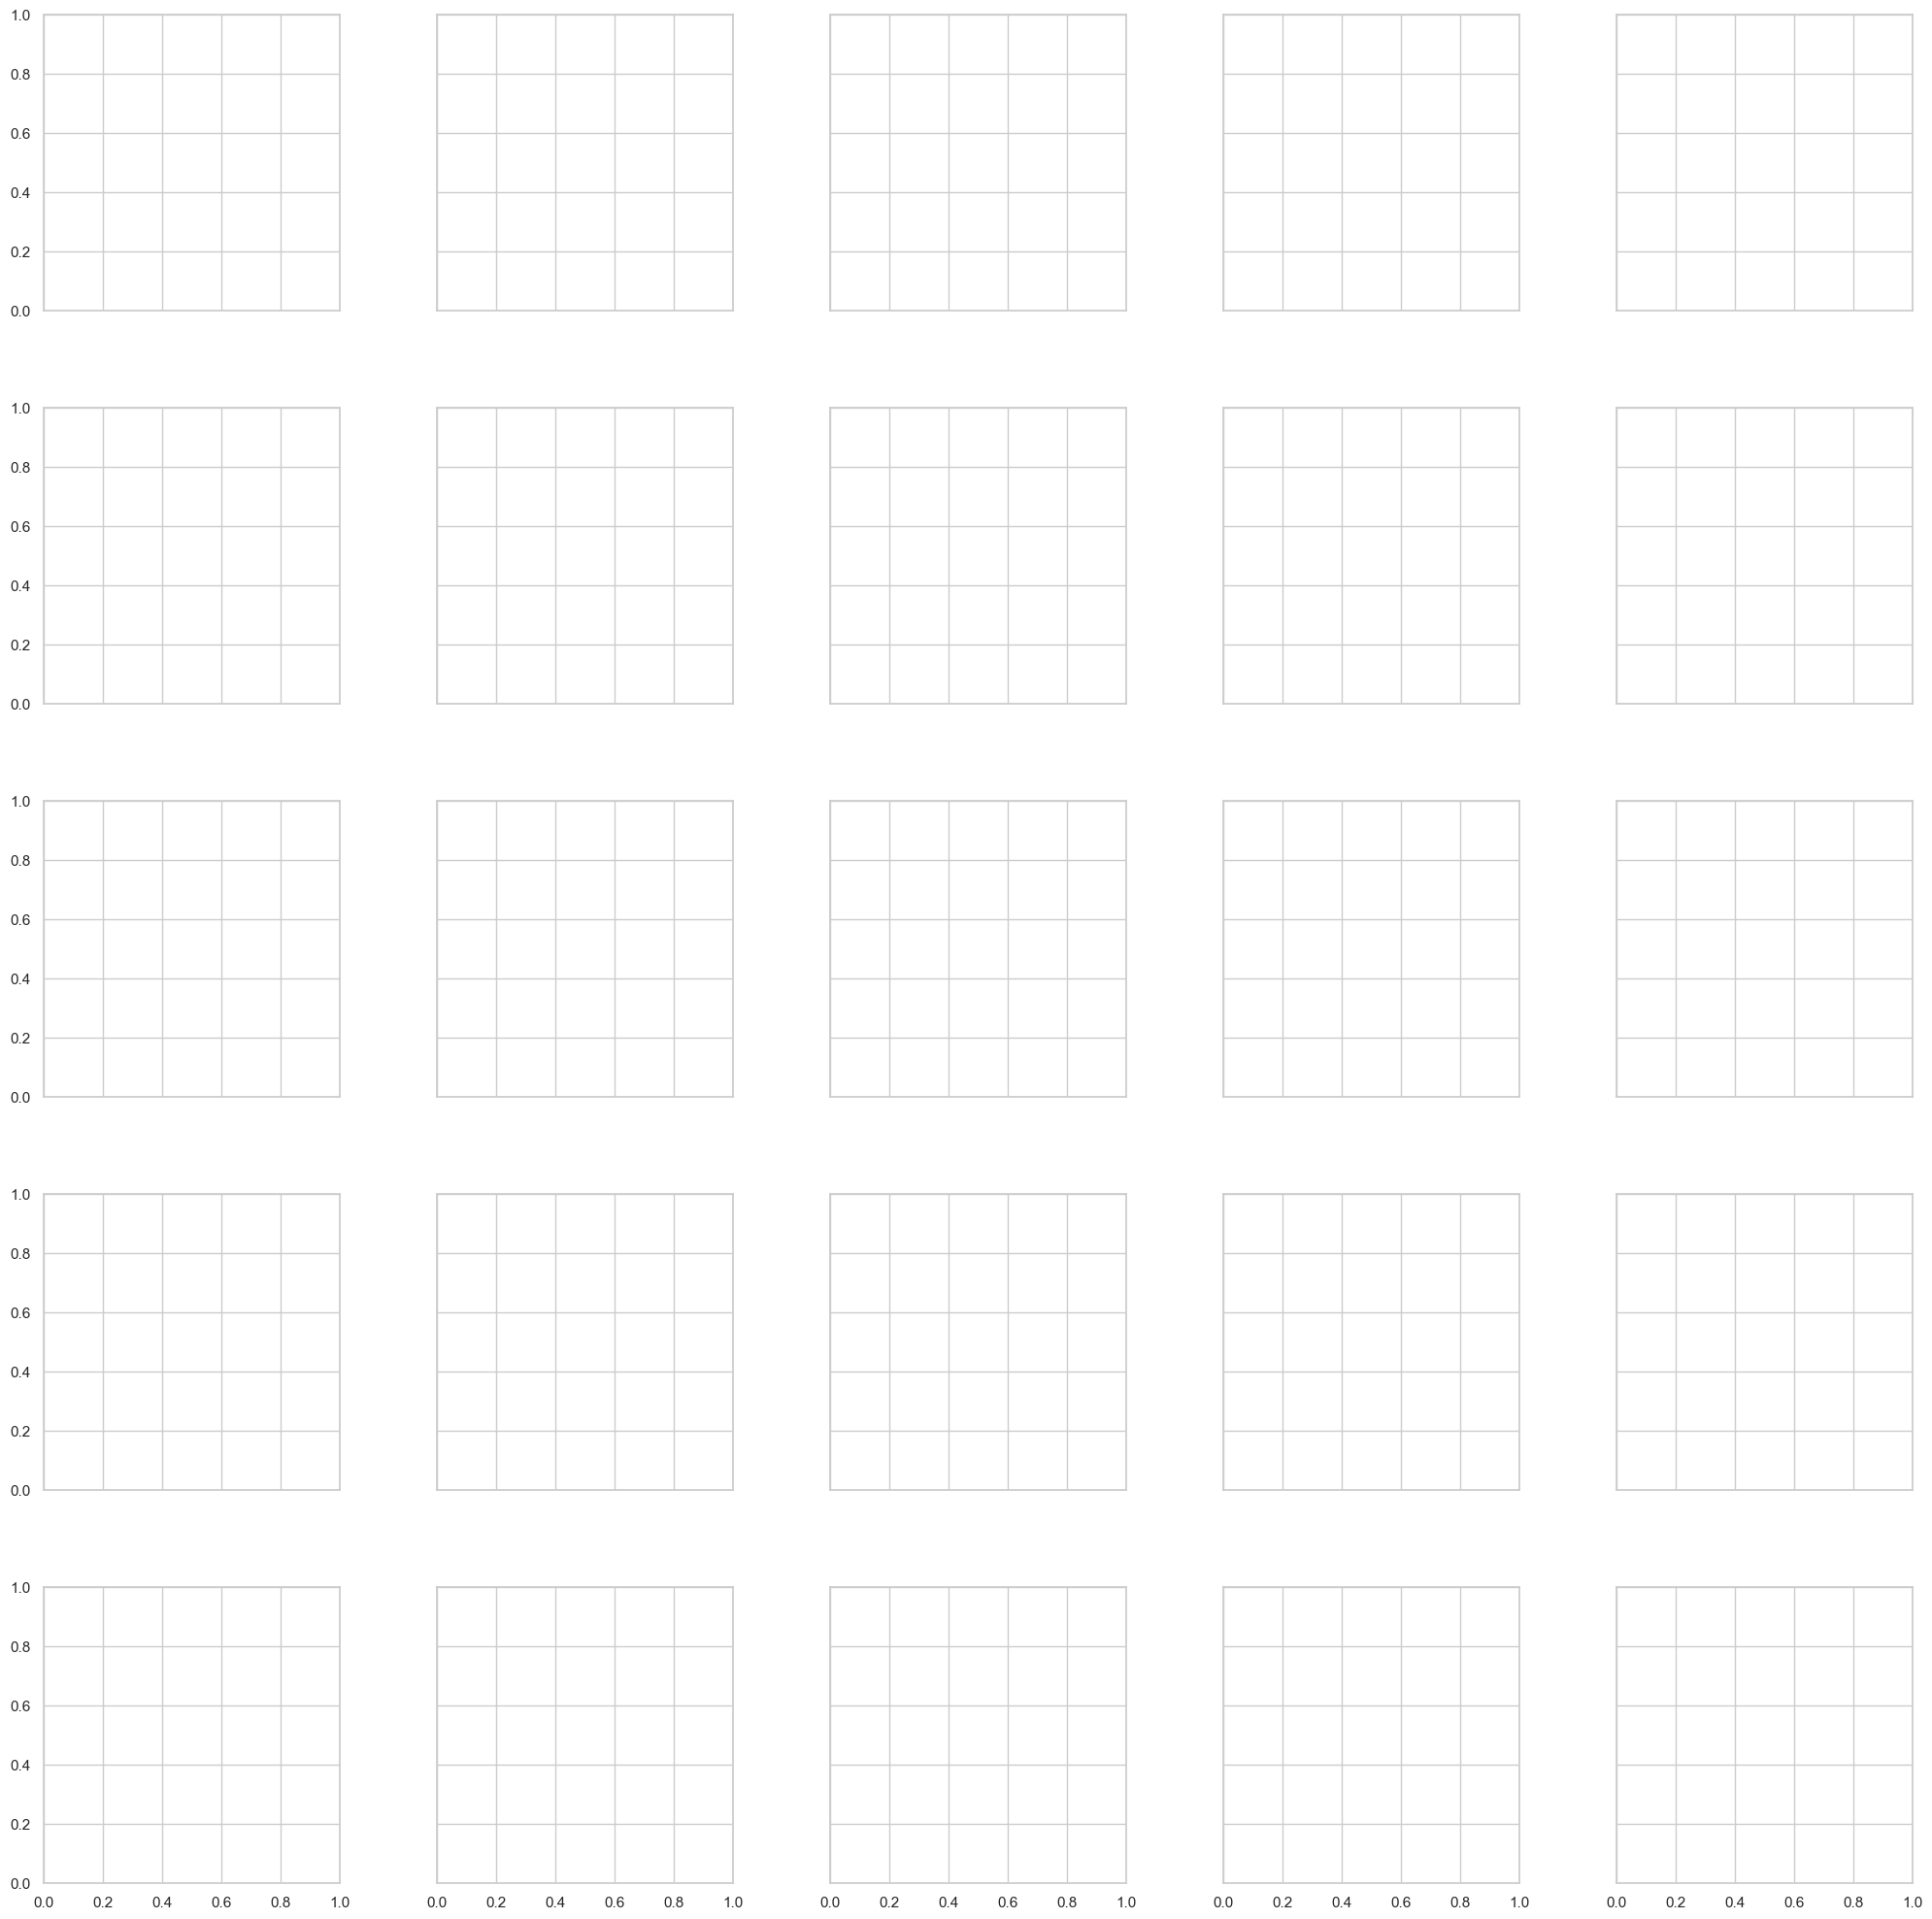

Rank 8 Checkpoint 2000


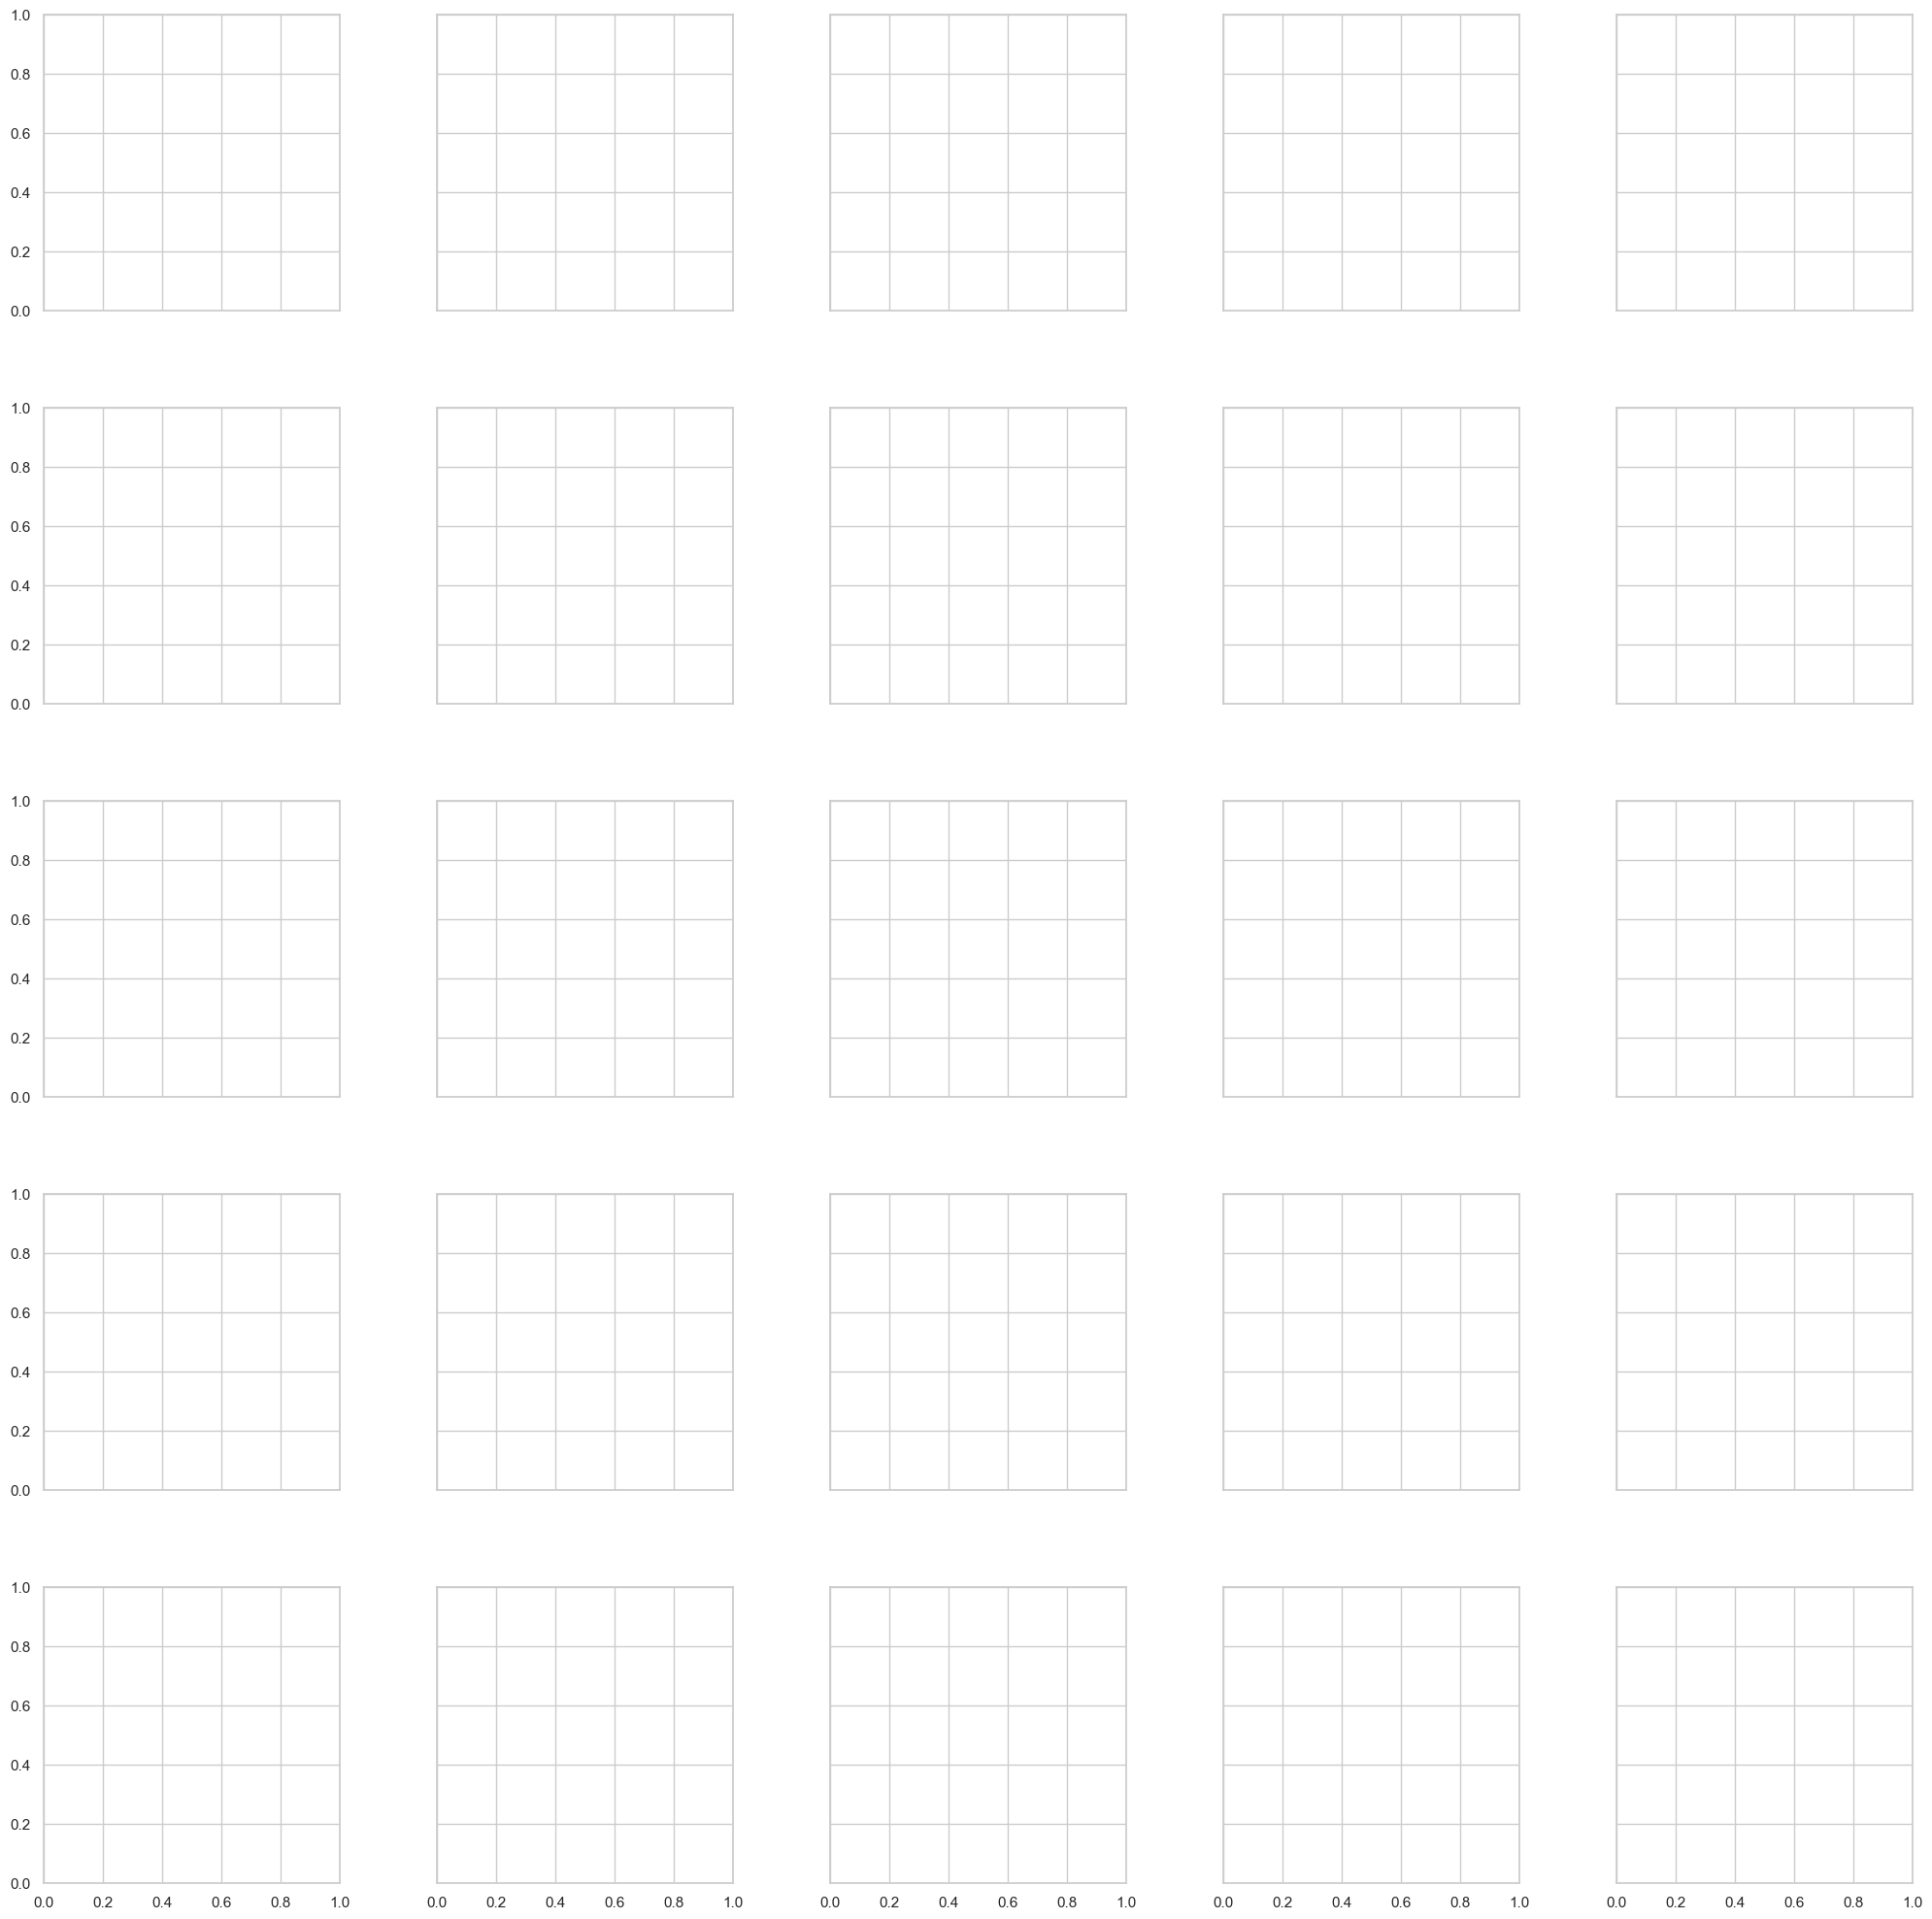

Rank 16 Checkpoint 500


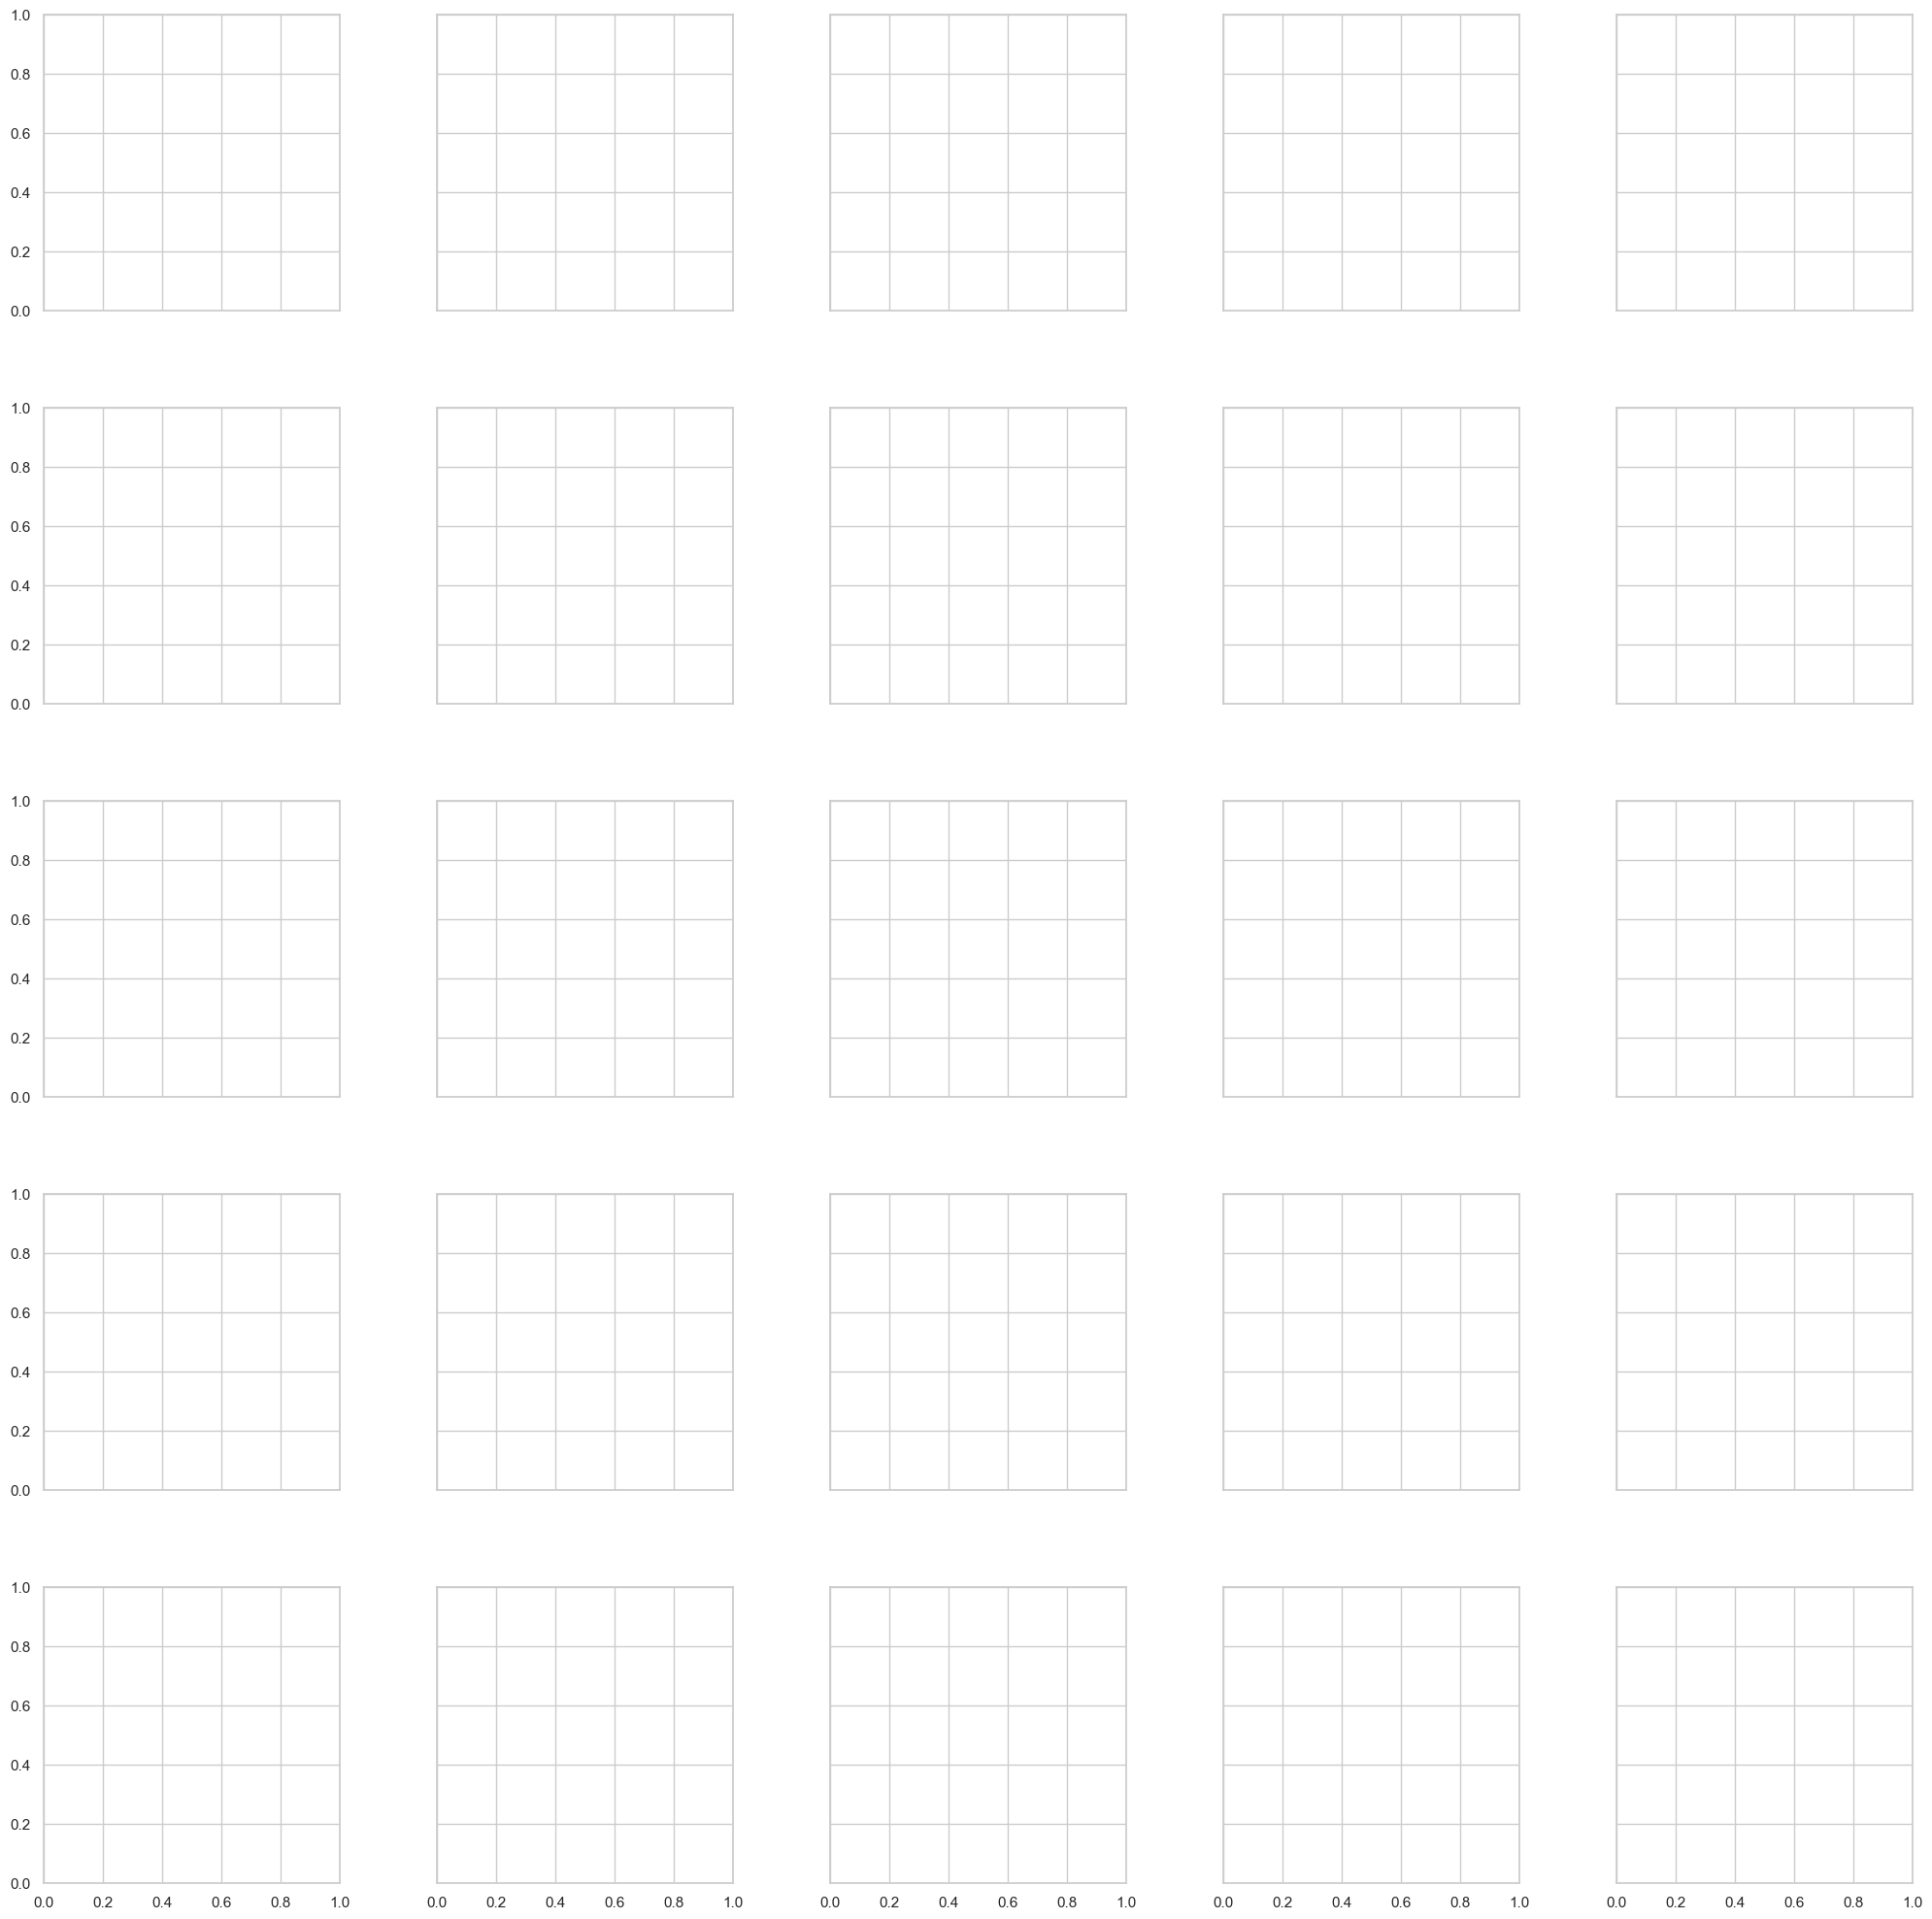

Rank 16 Checkpoint 1000


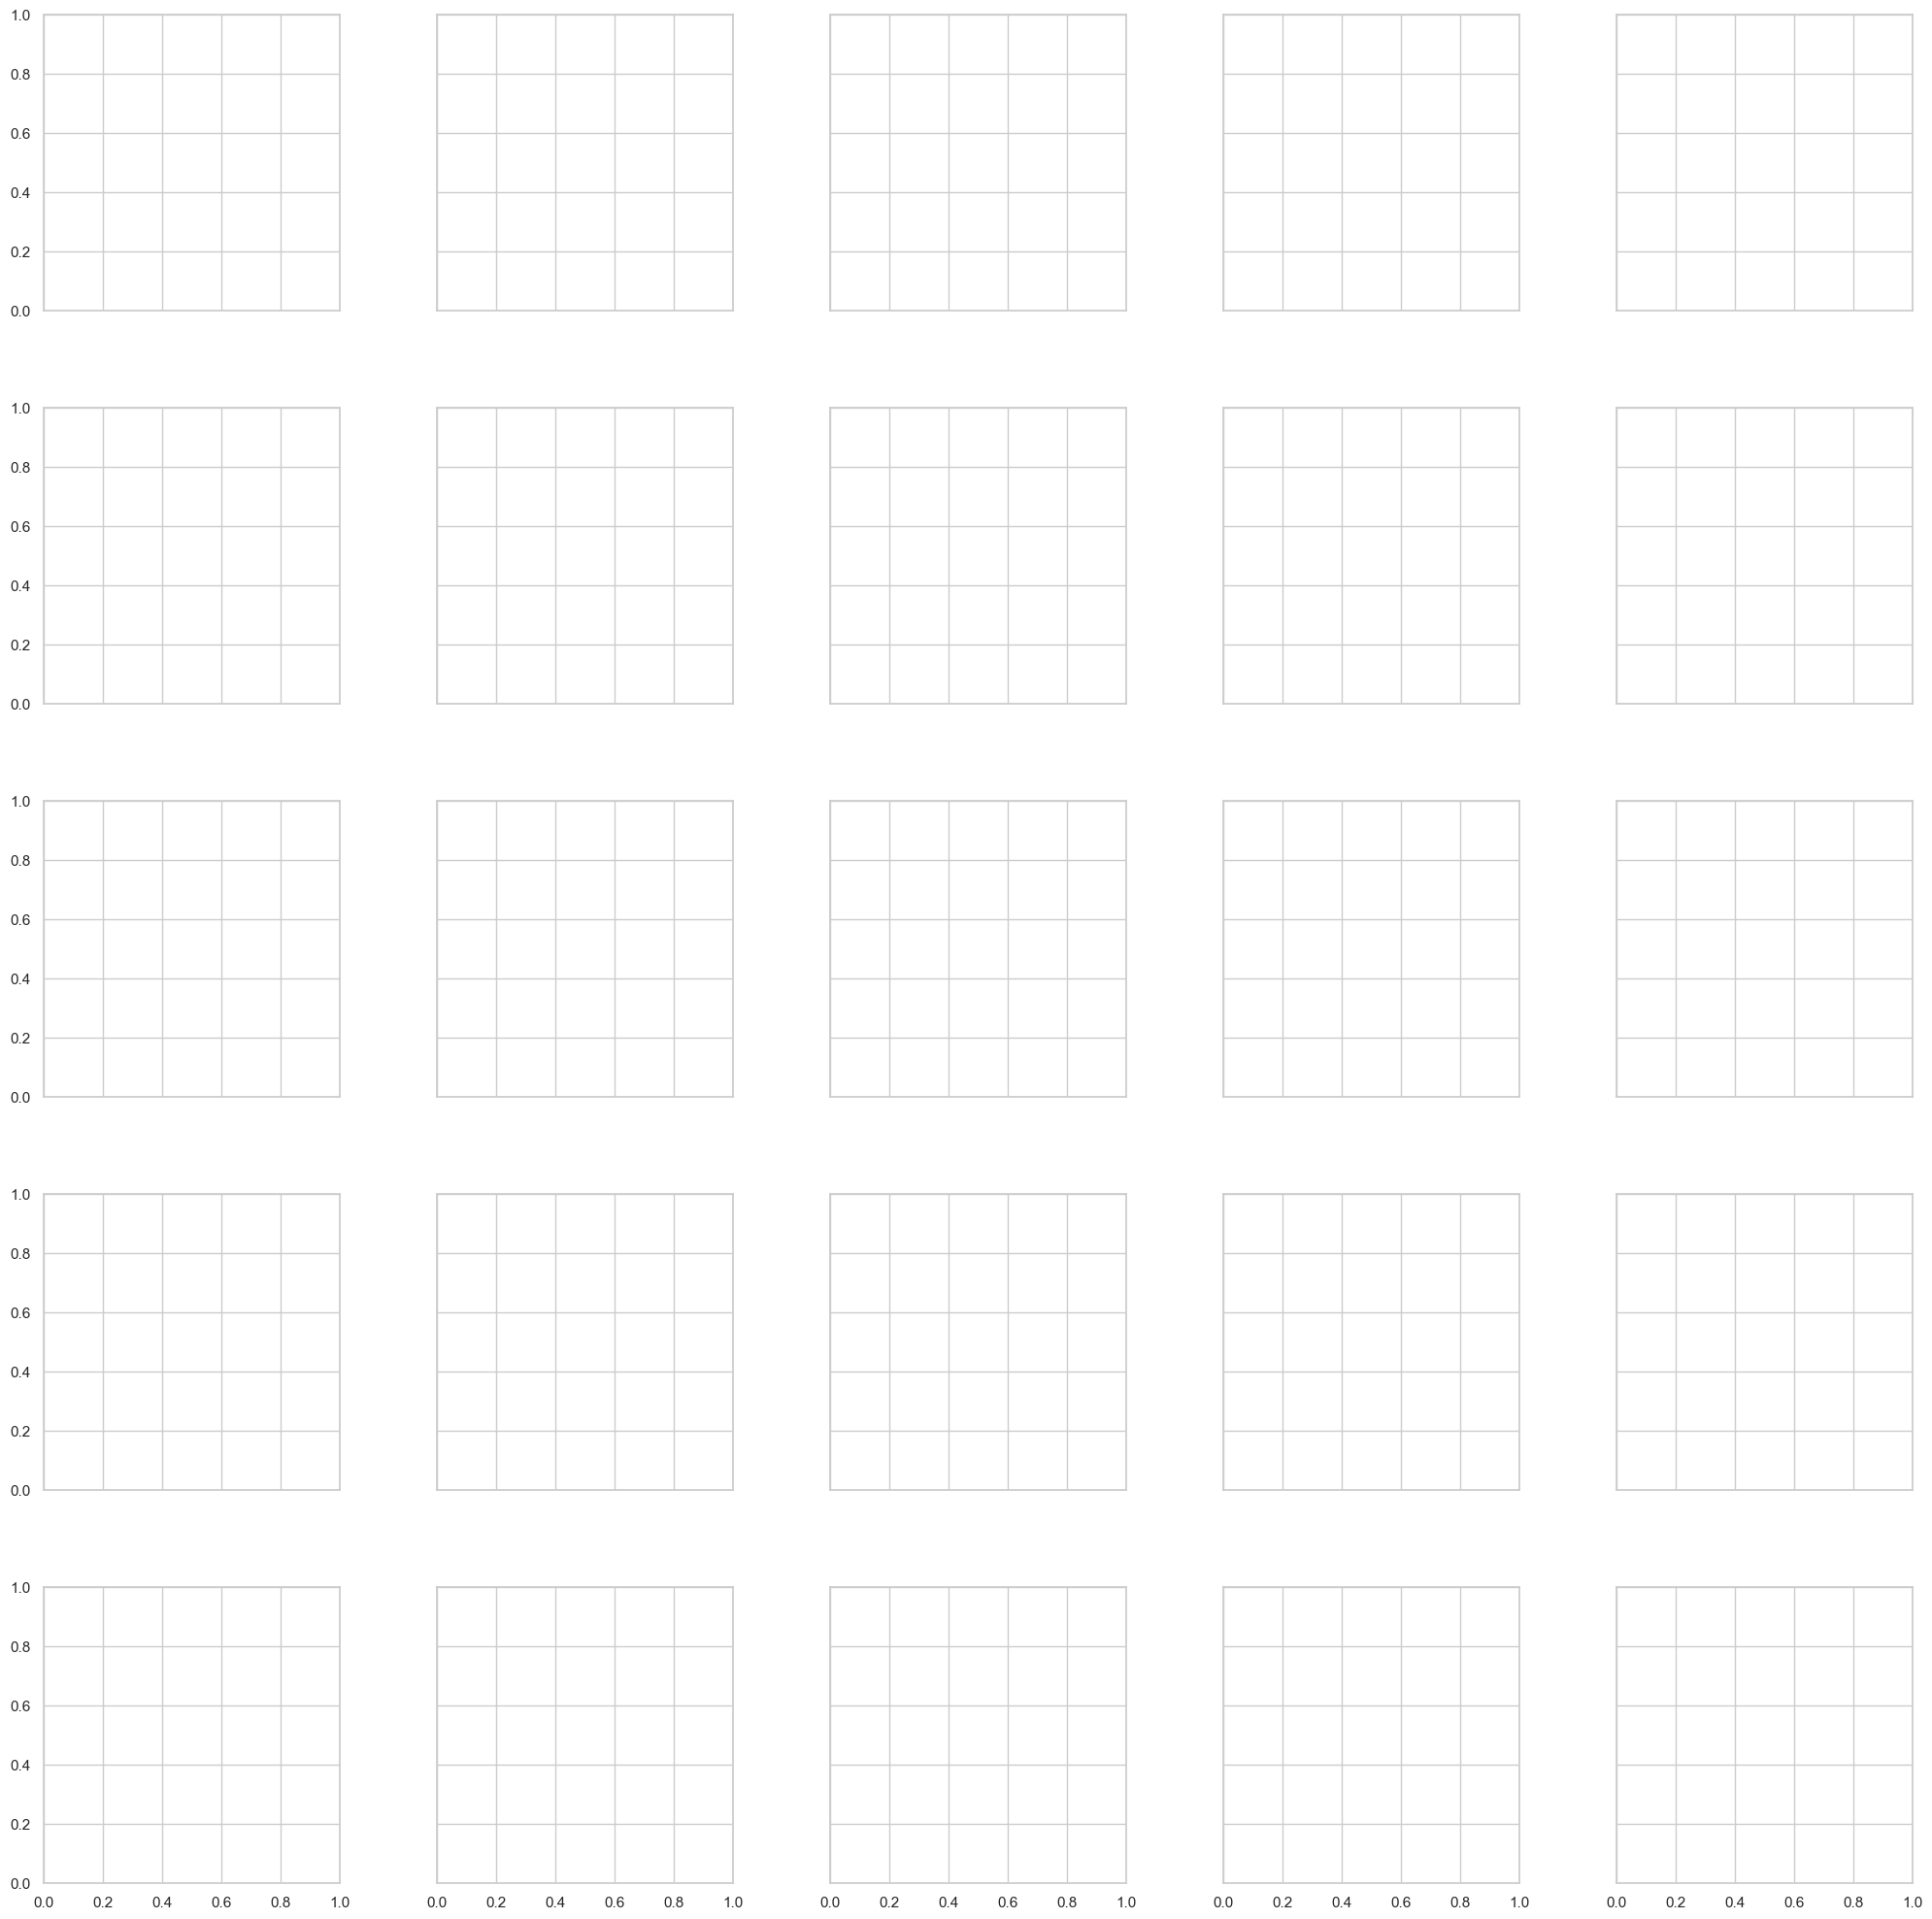

Rank 16 Checkpoint 2000


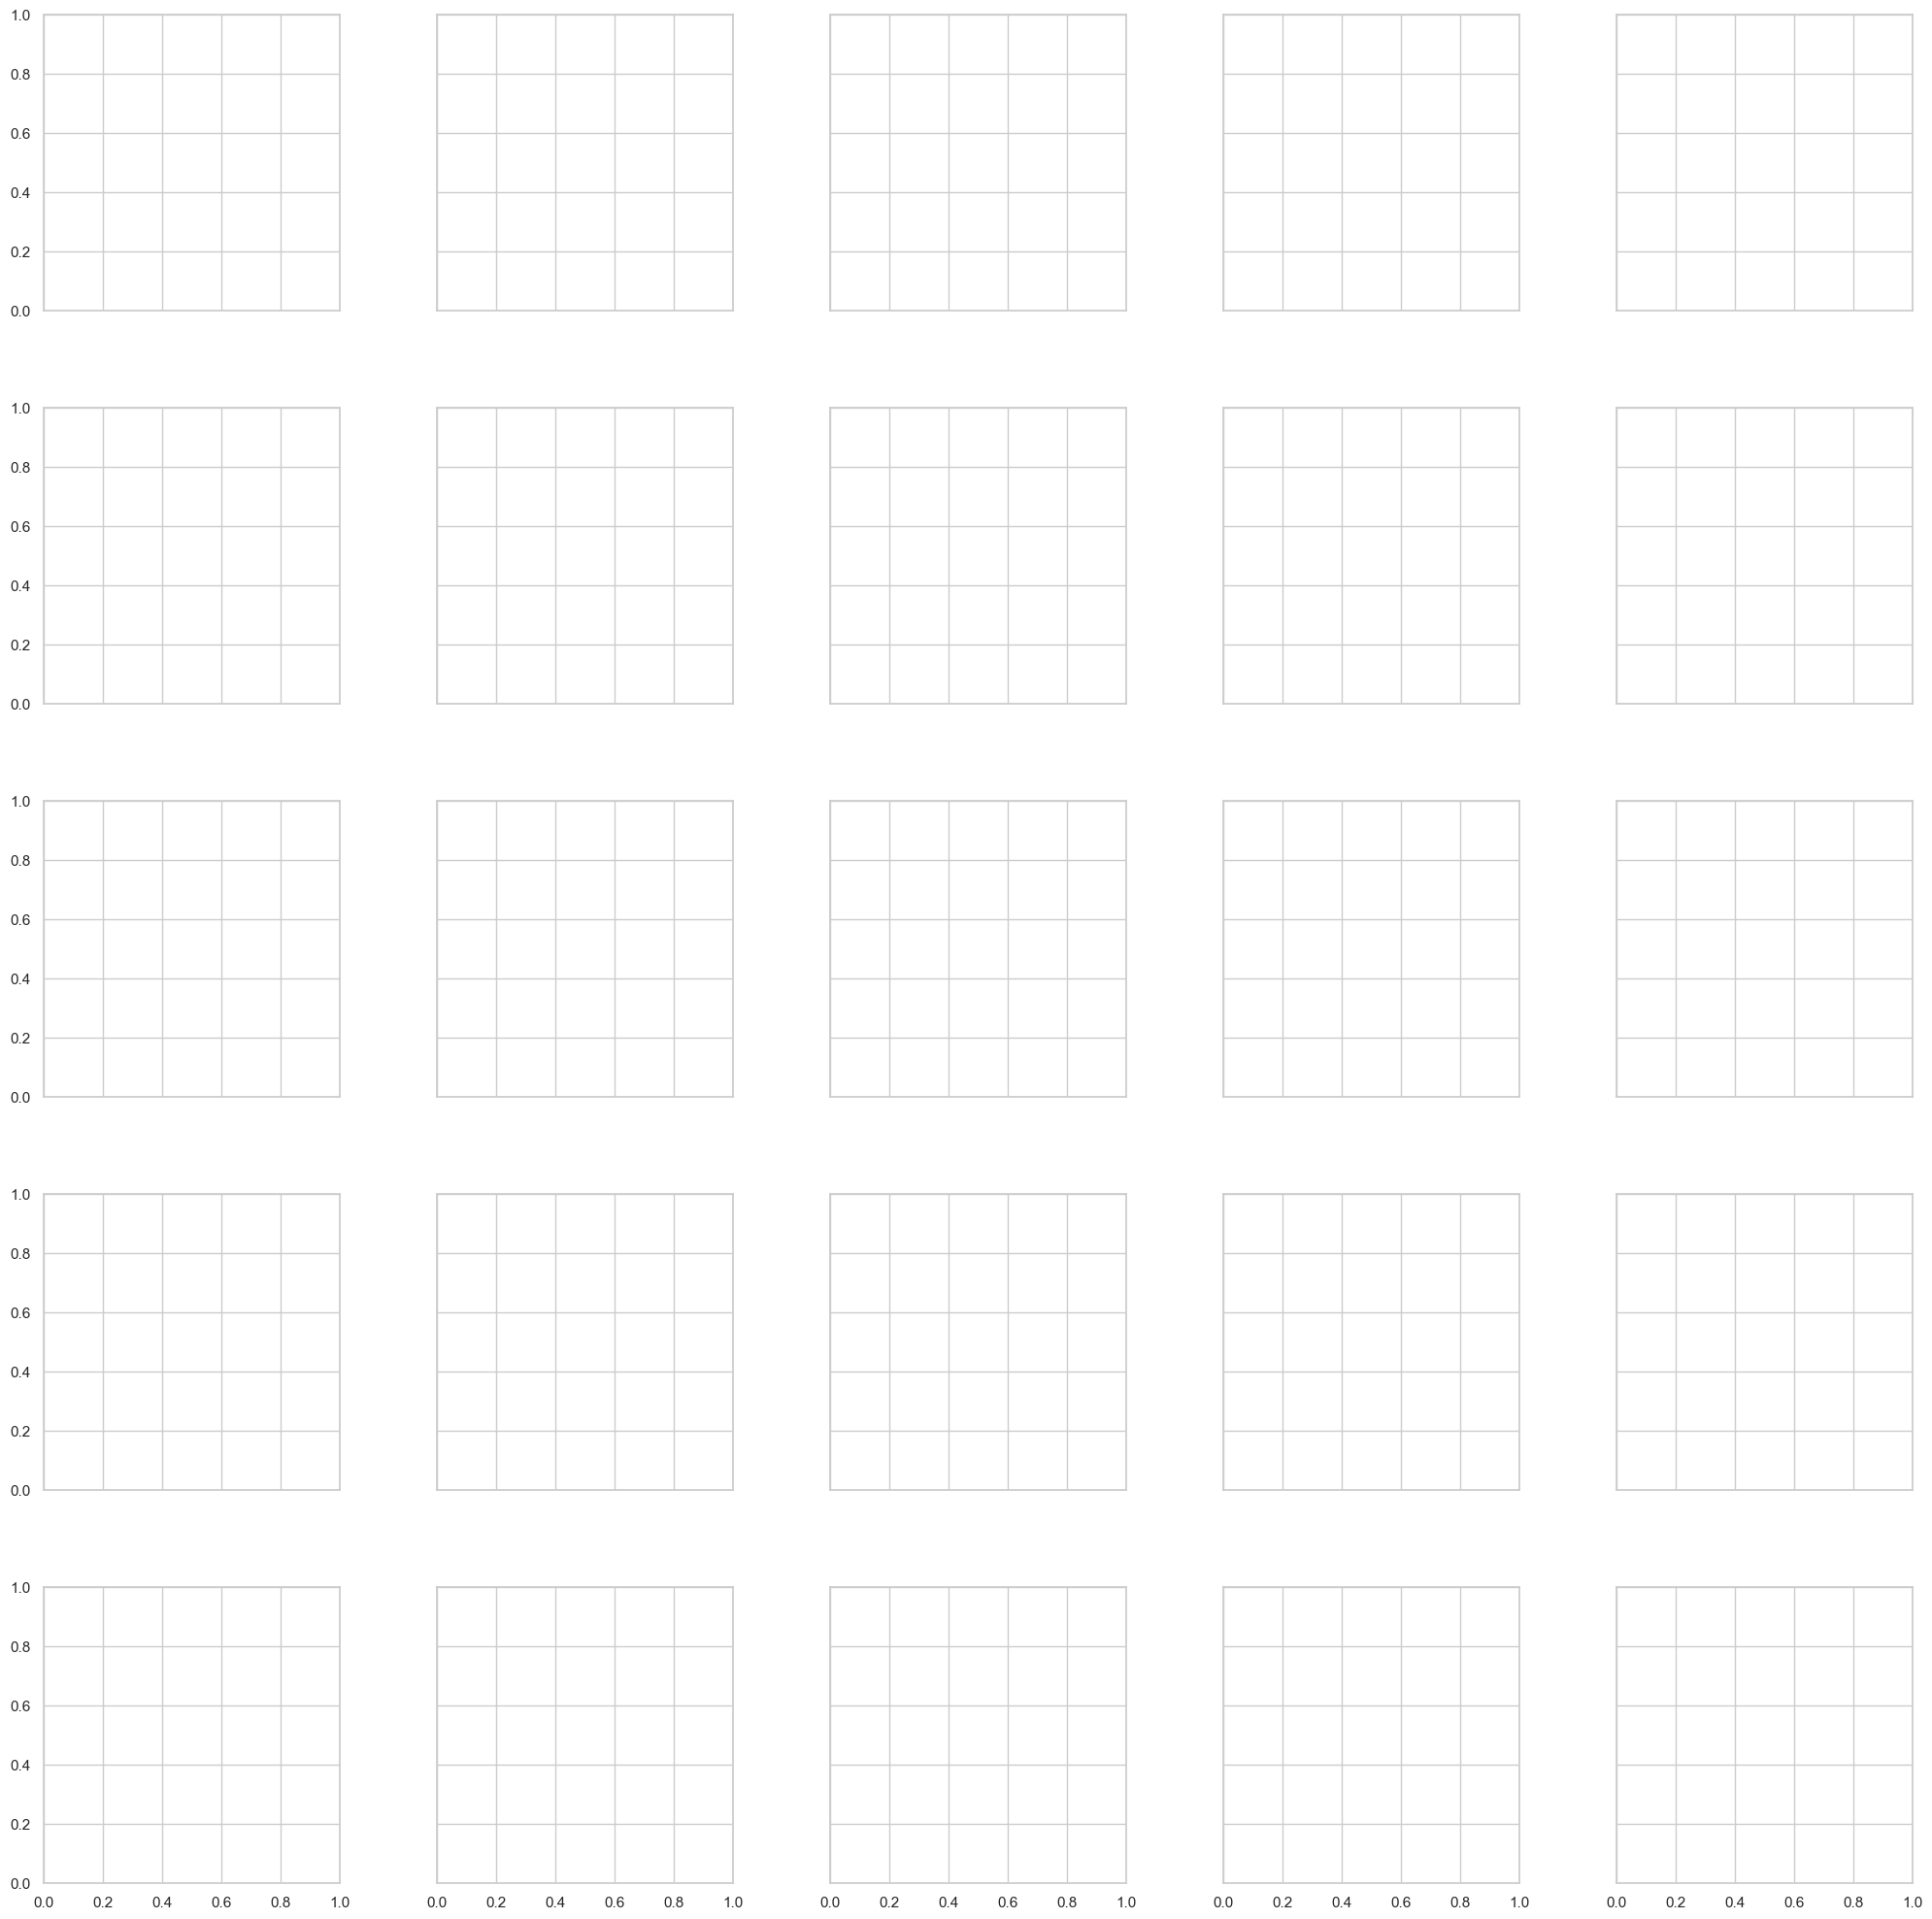

Rank 32 Checkpoint 500


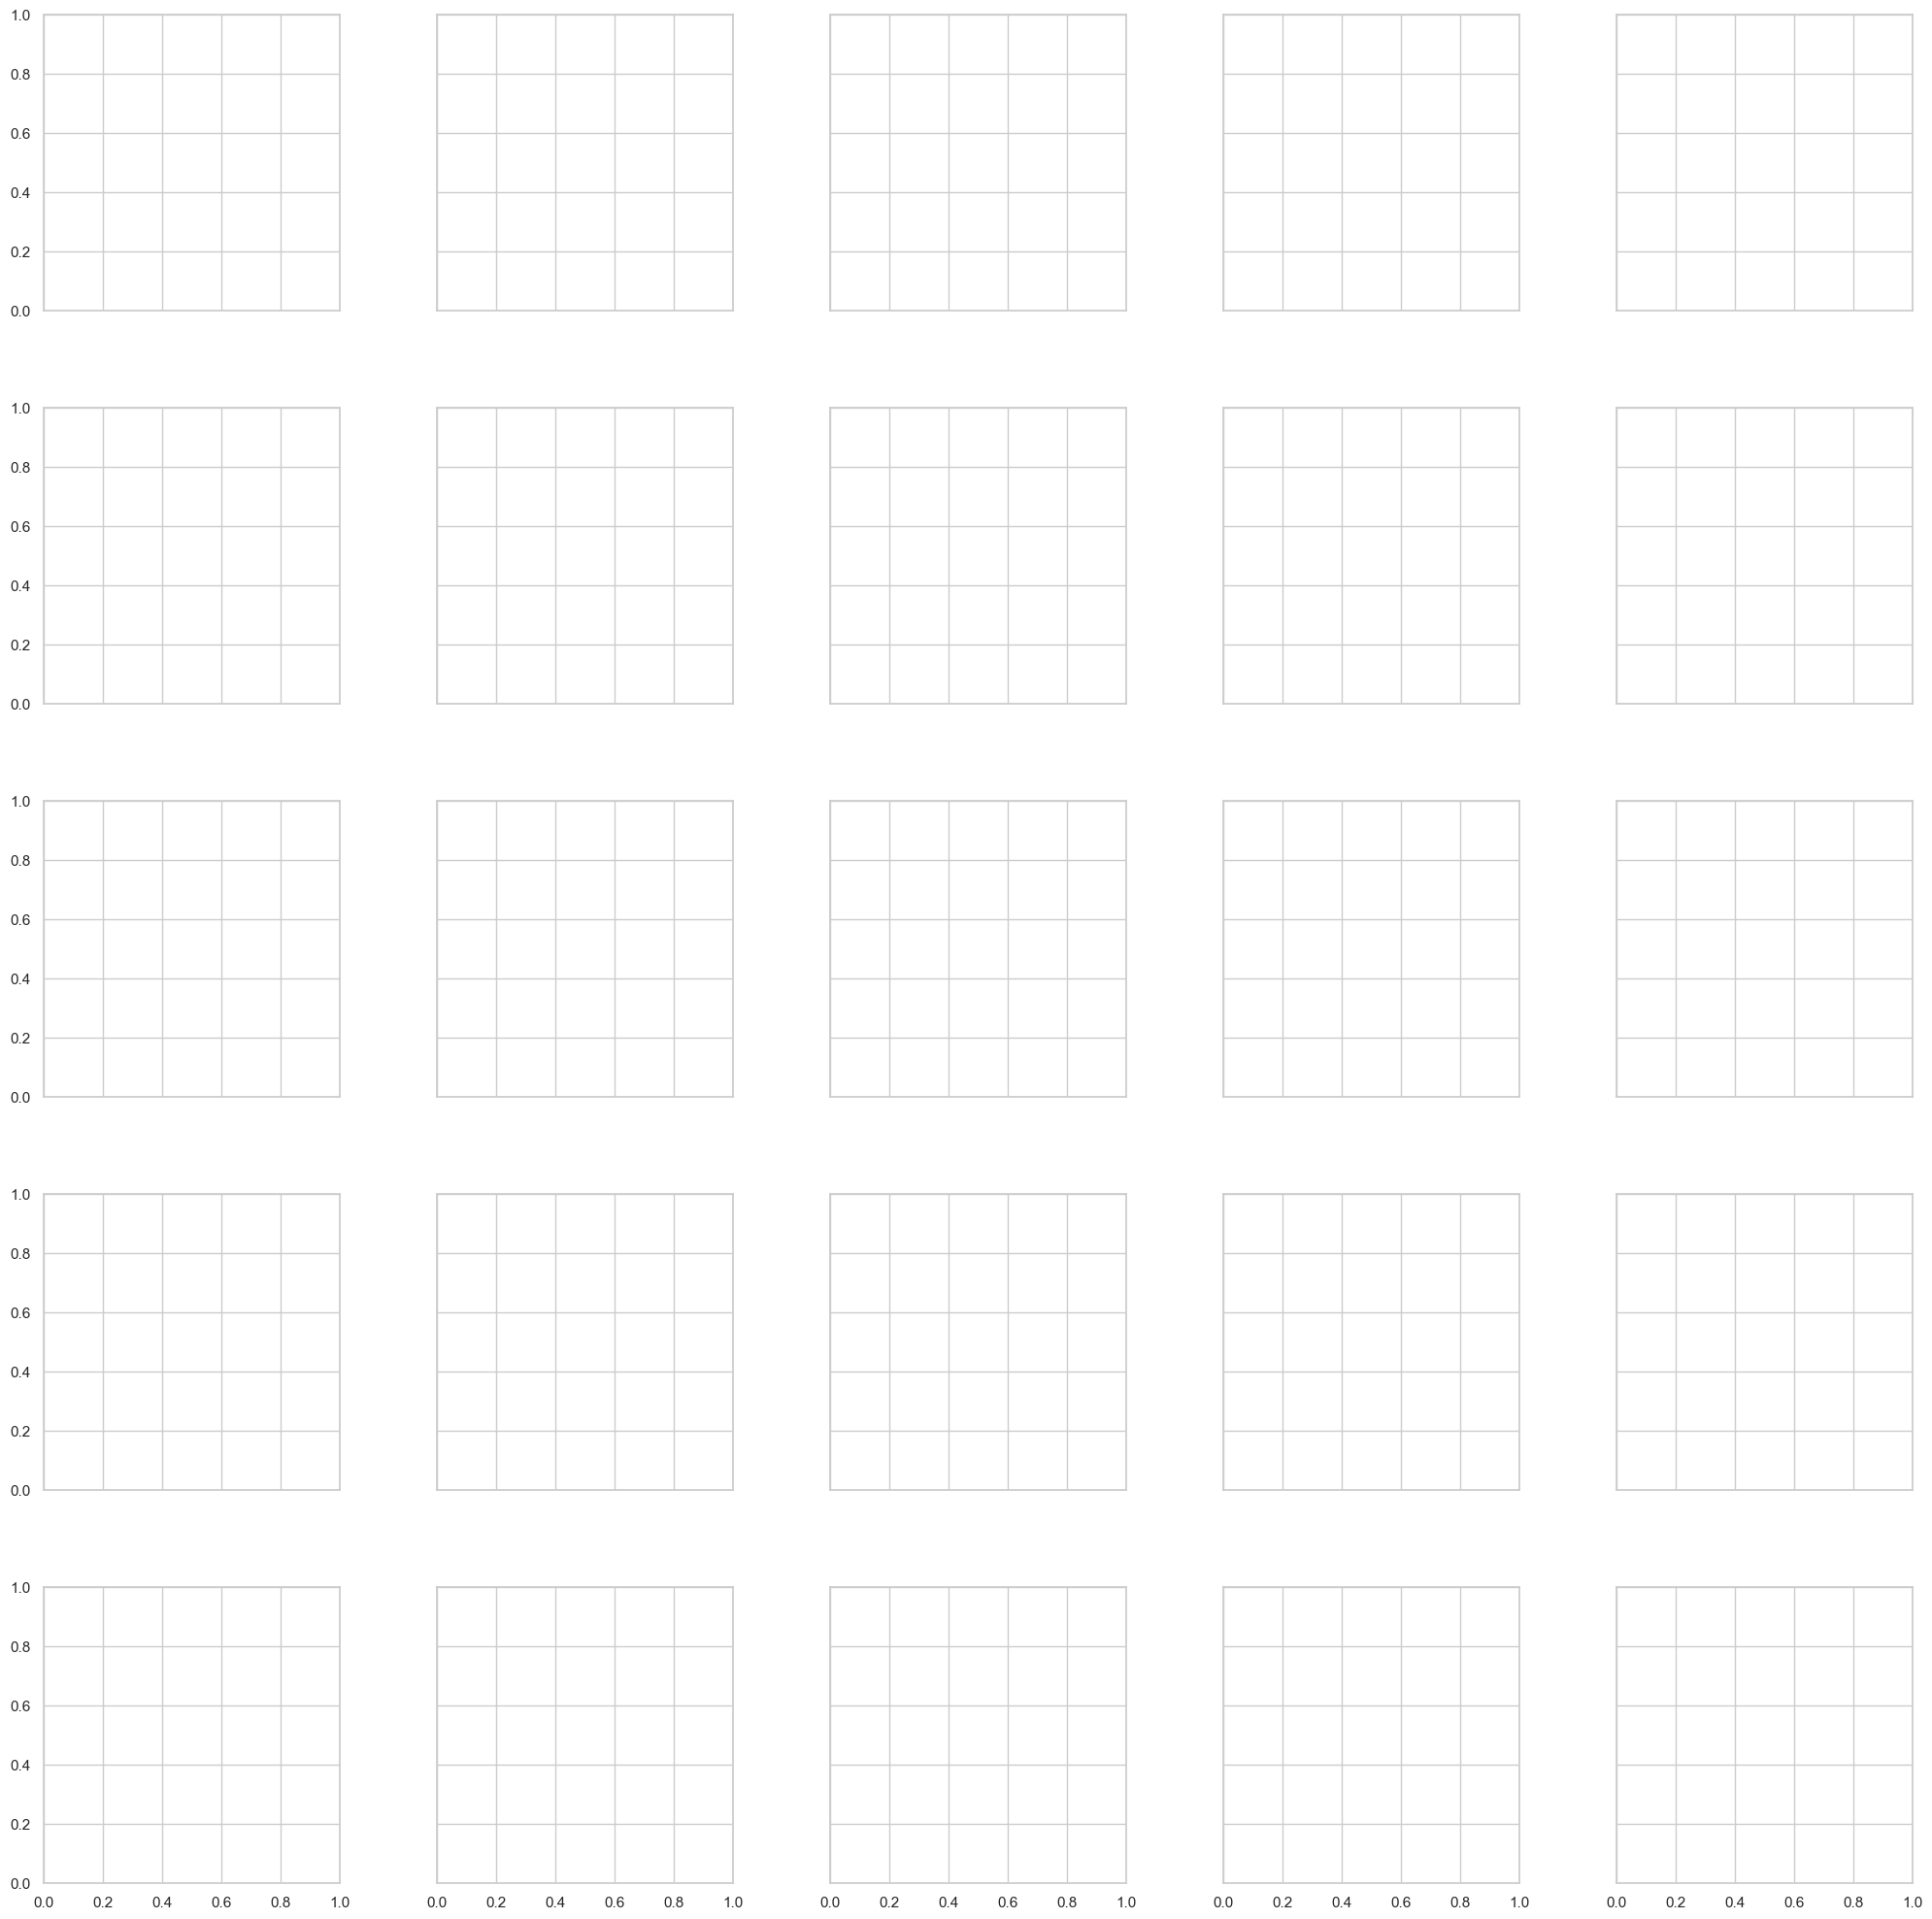

Rank 32 Checkpoint 1000


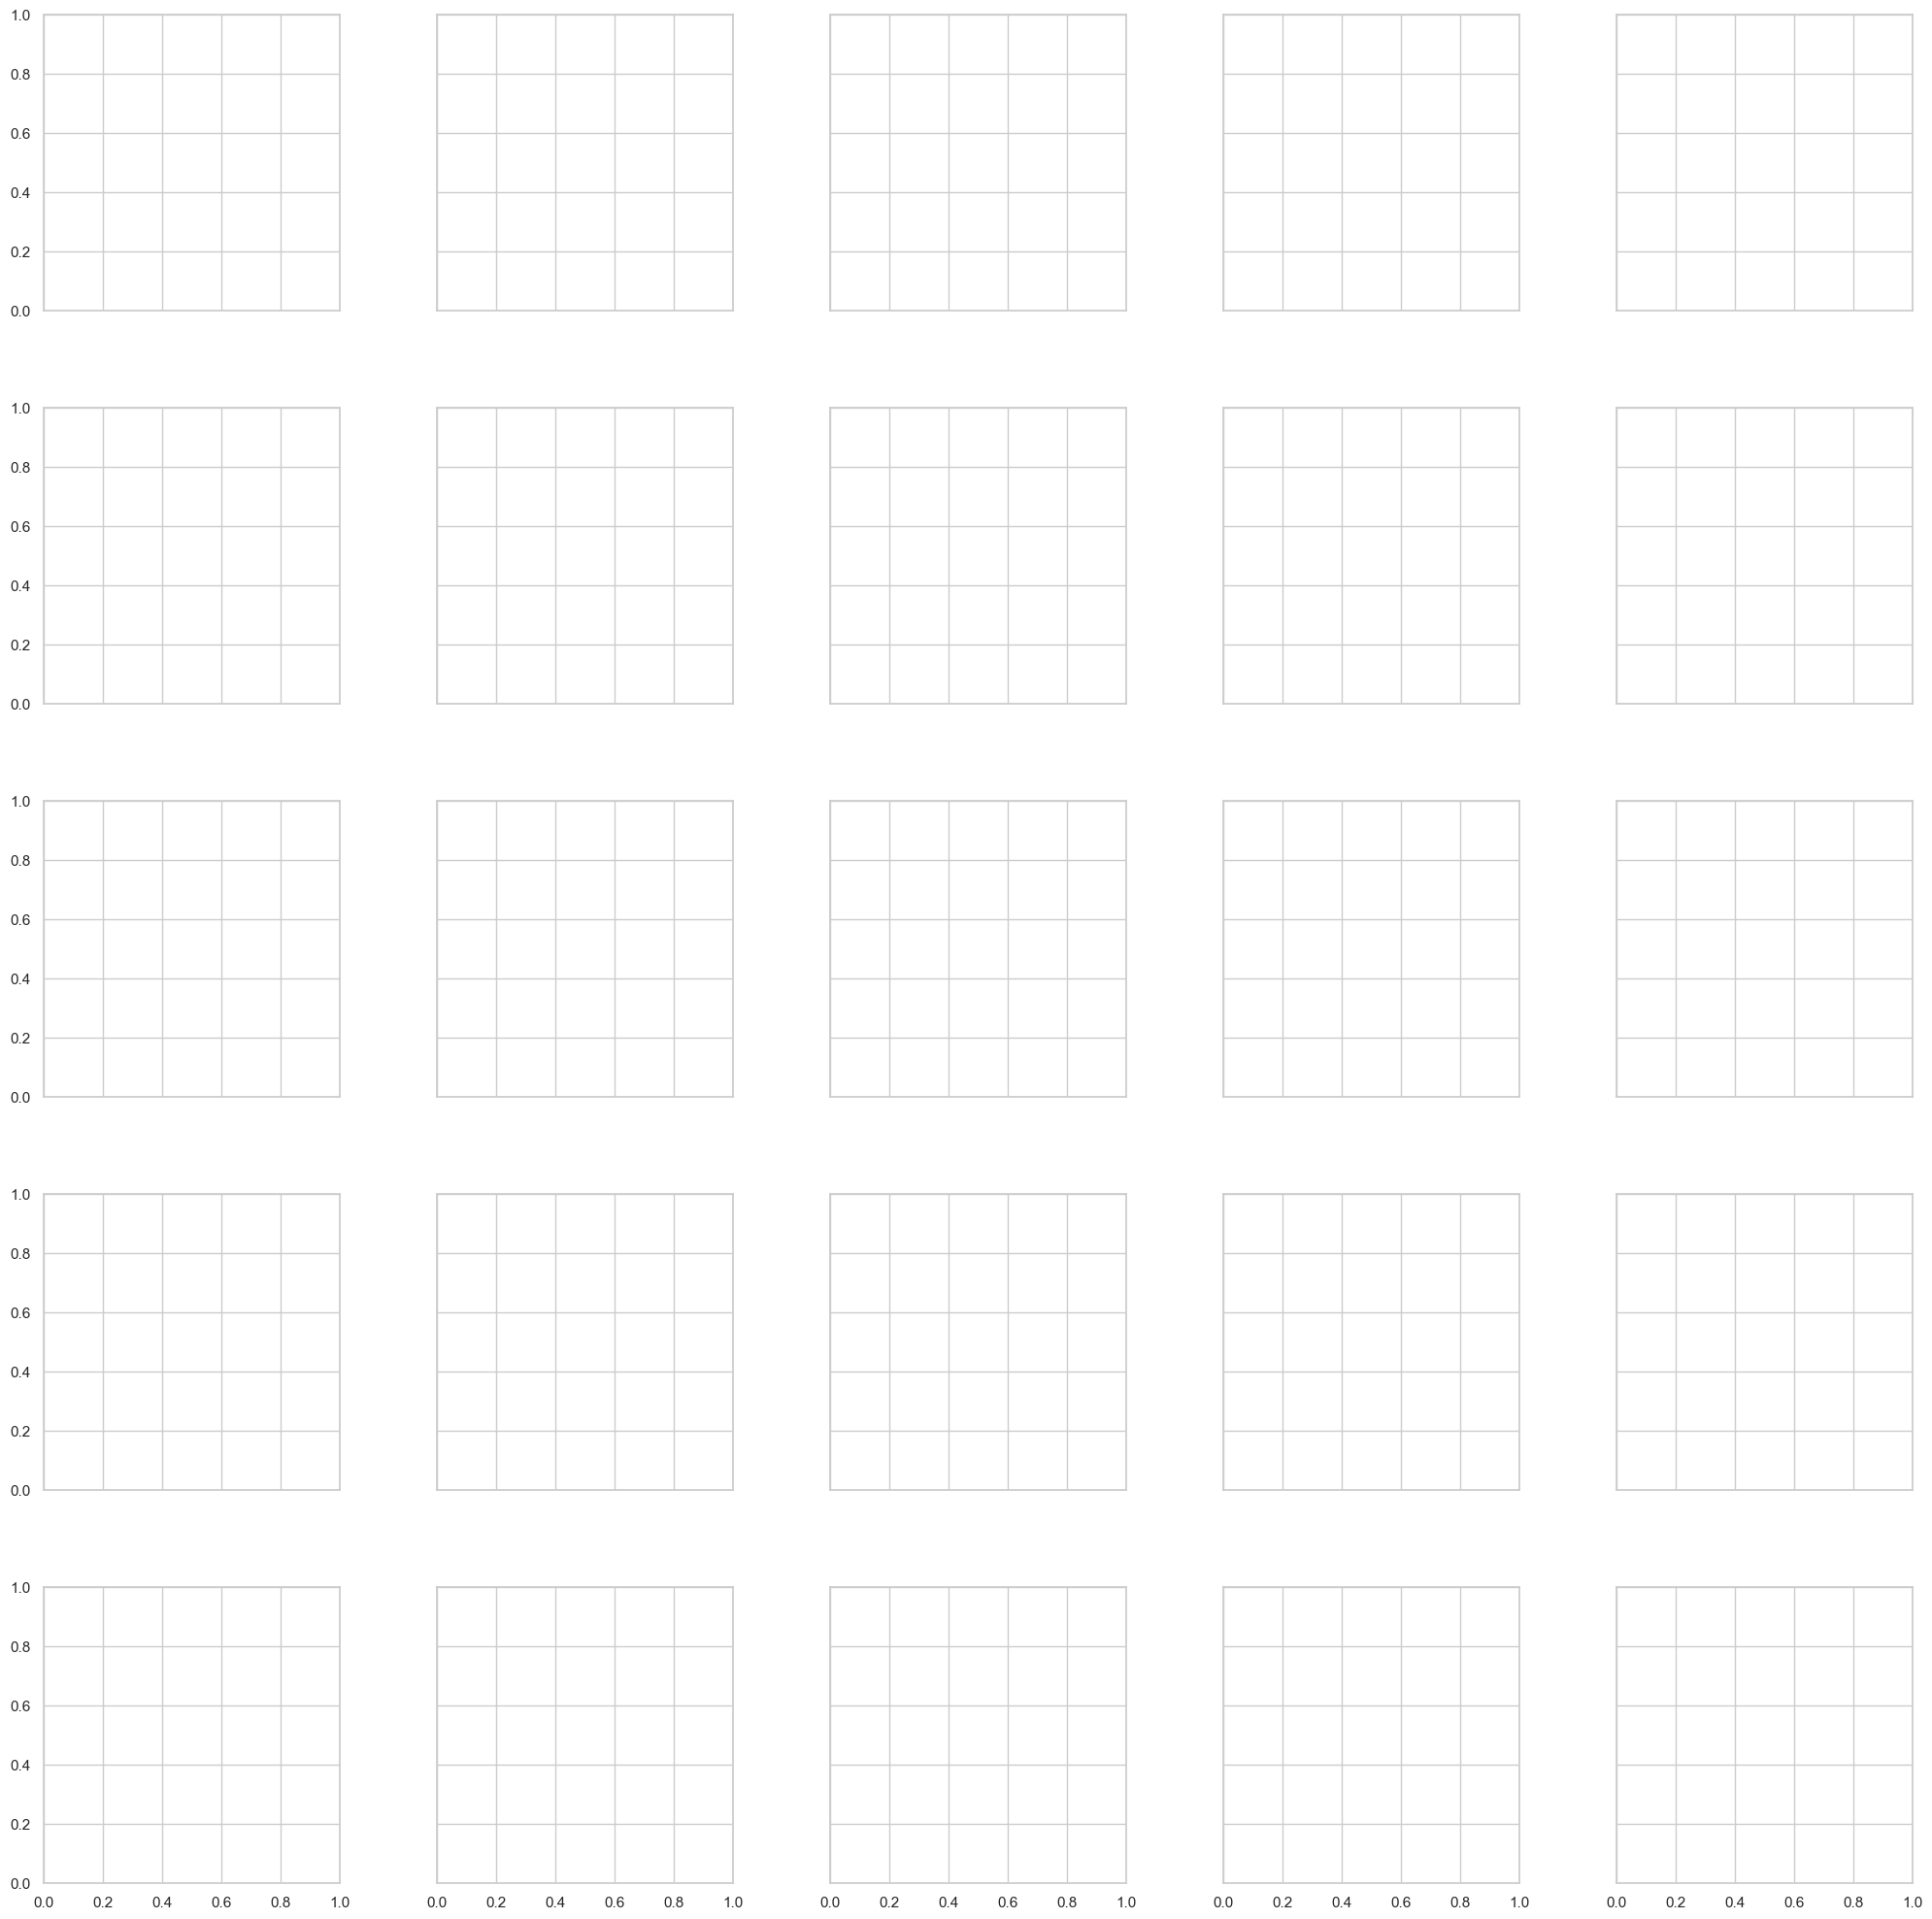

Rank 32 Checkpoint 2000


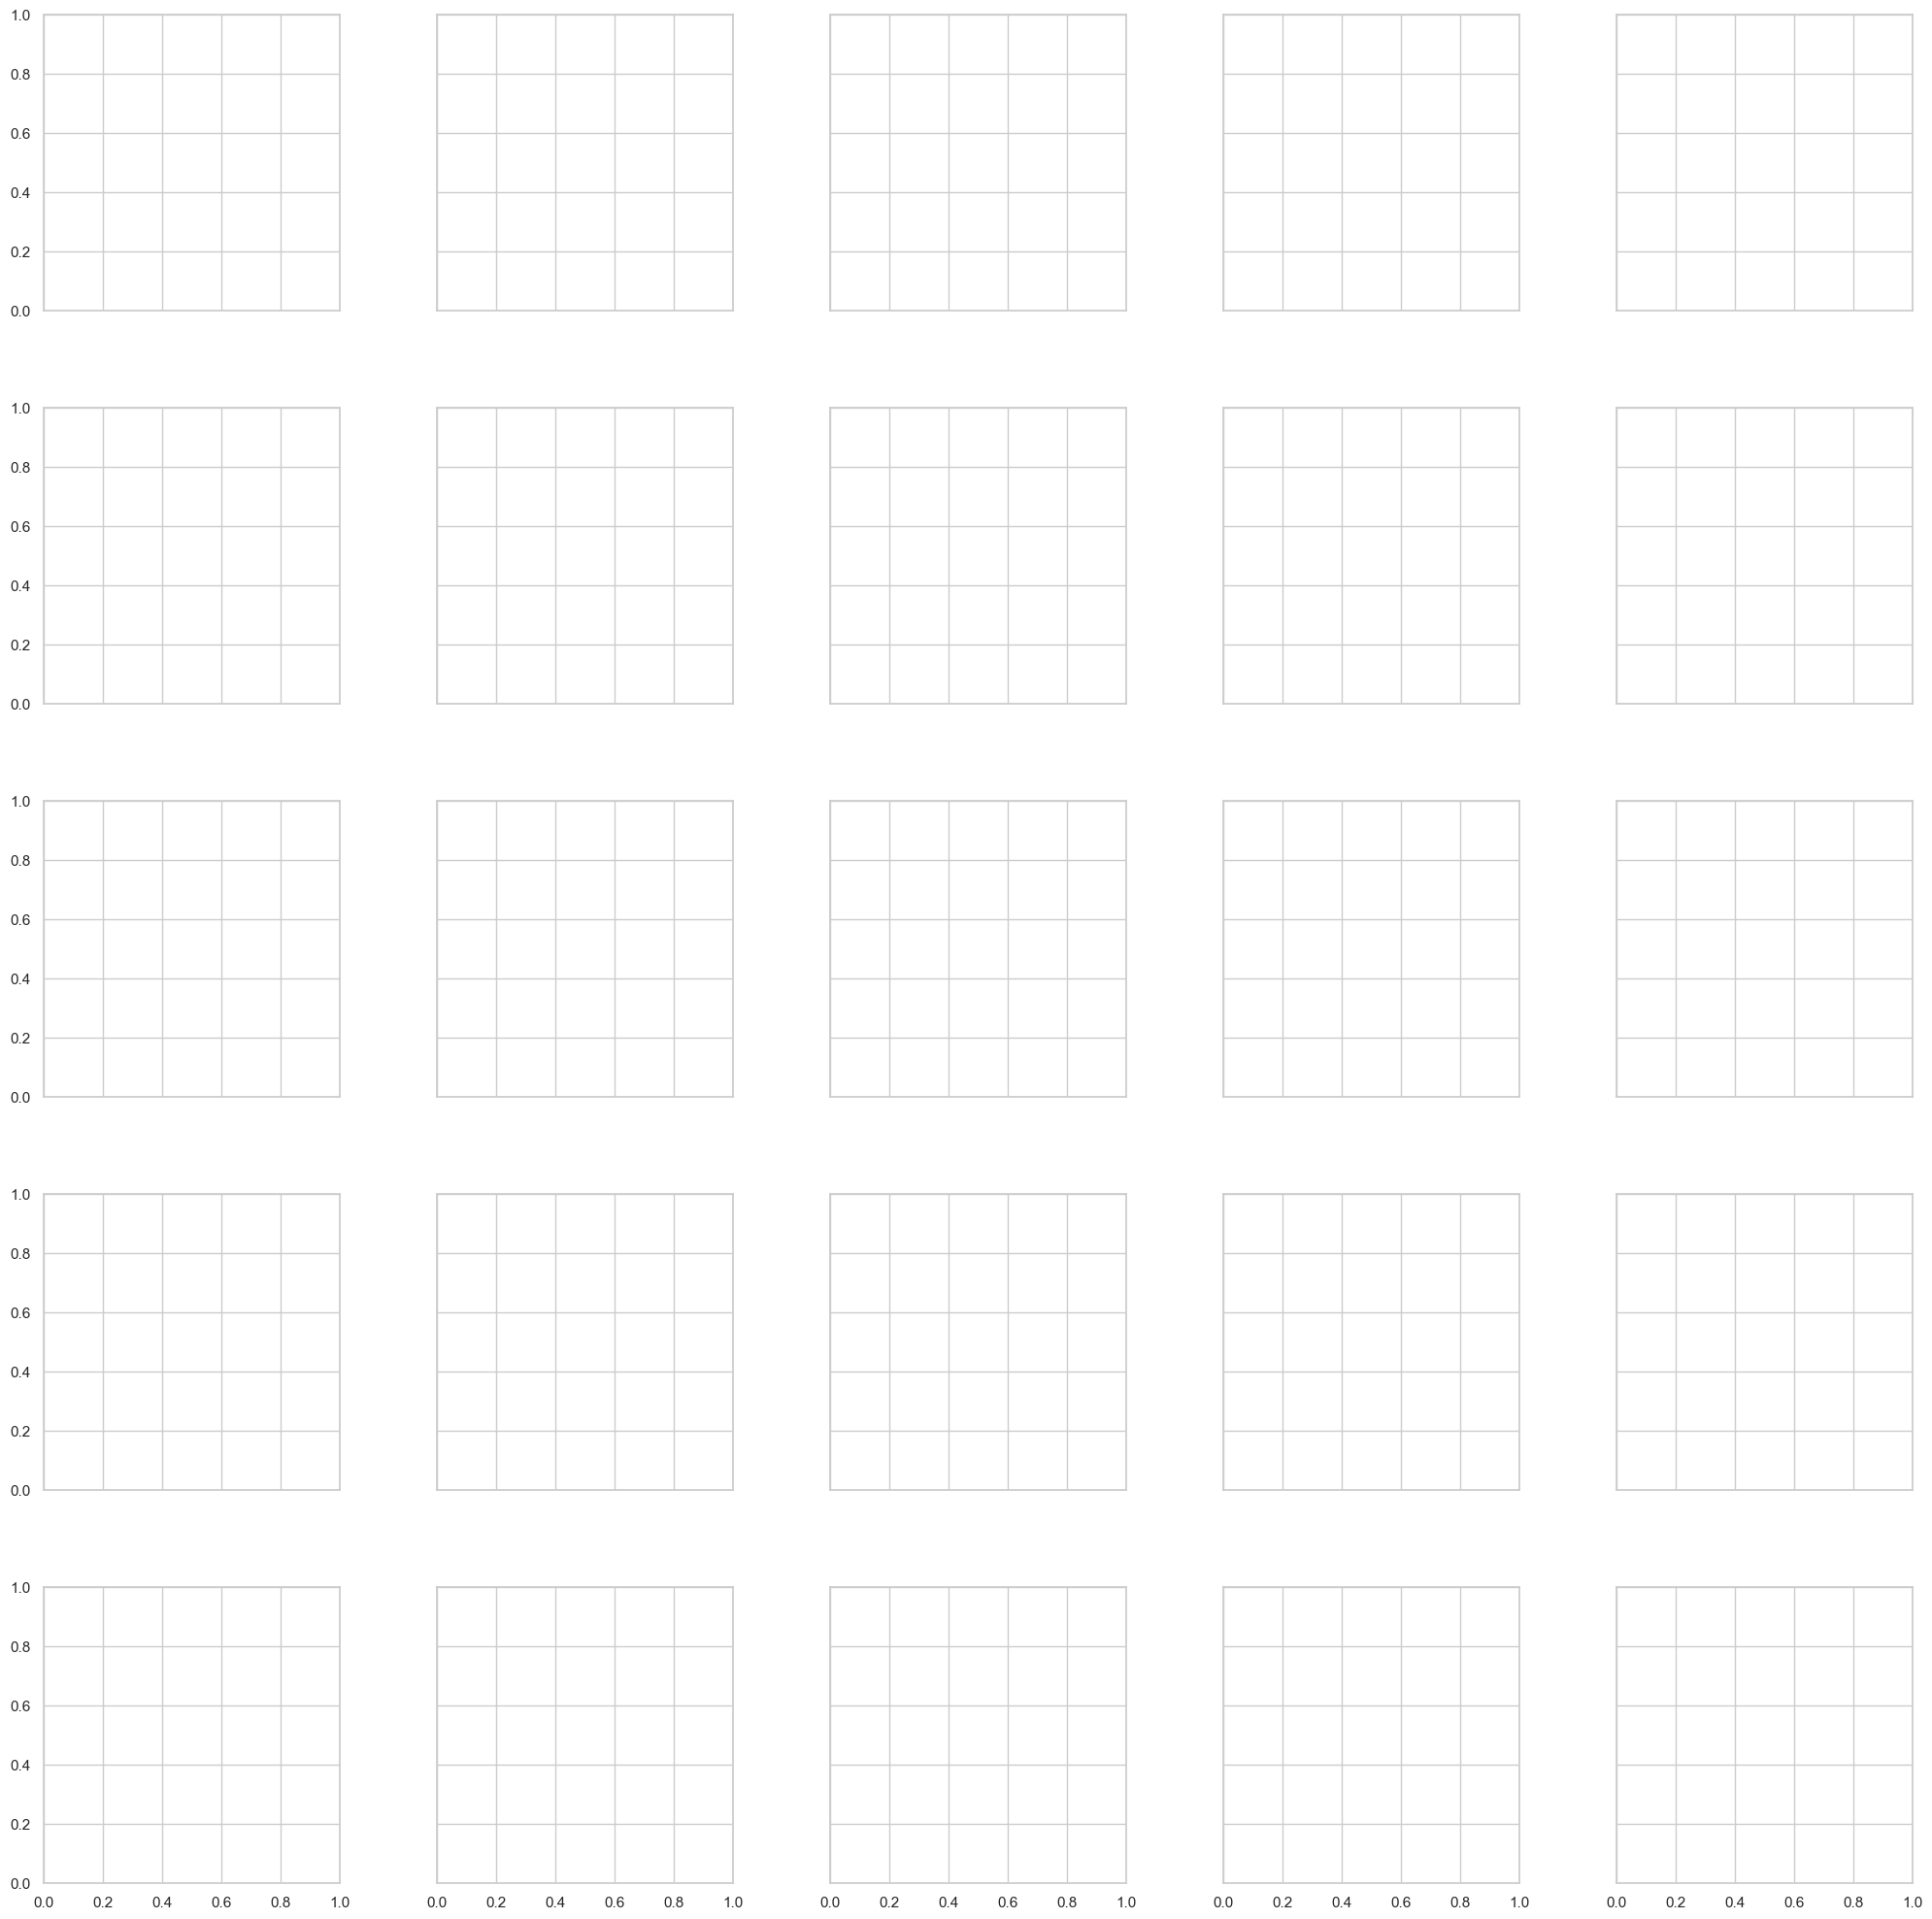

Rank 64 Checkpoint 500


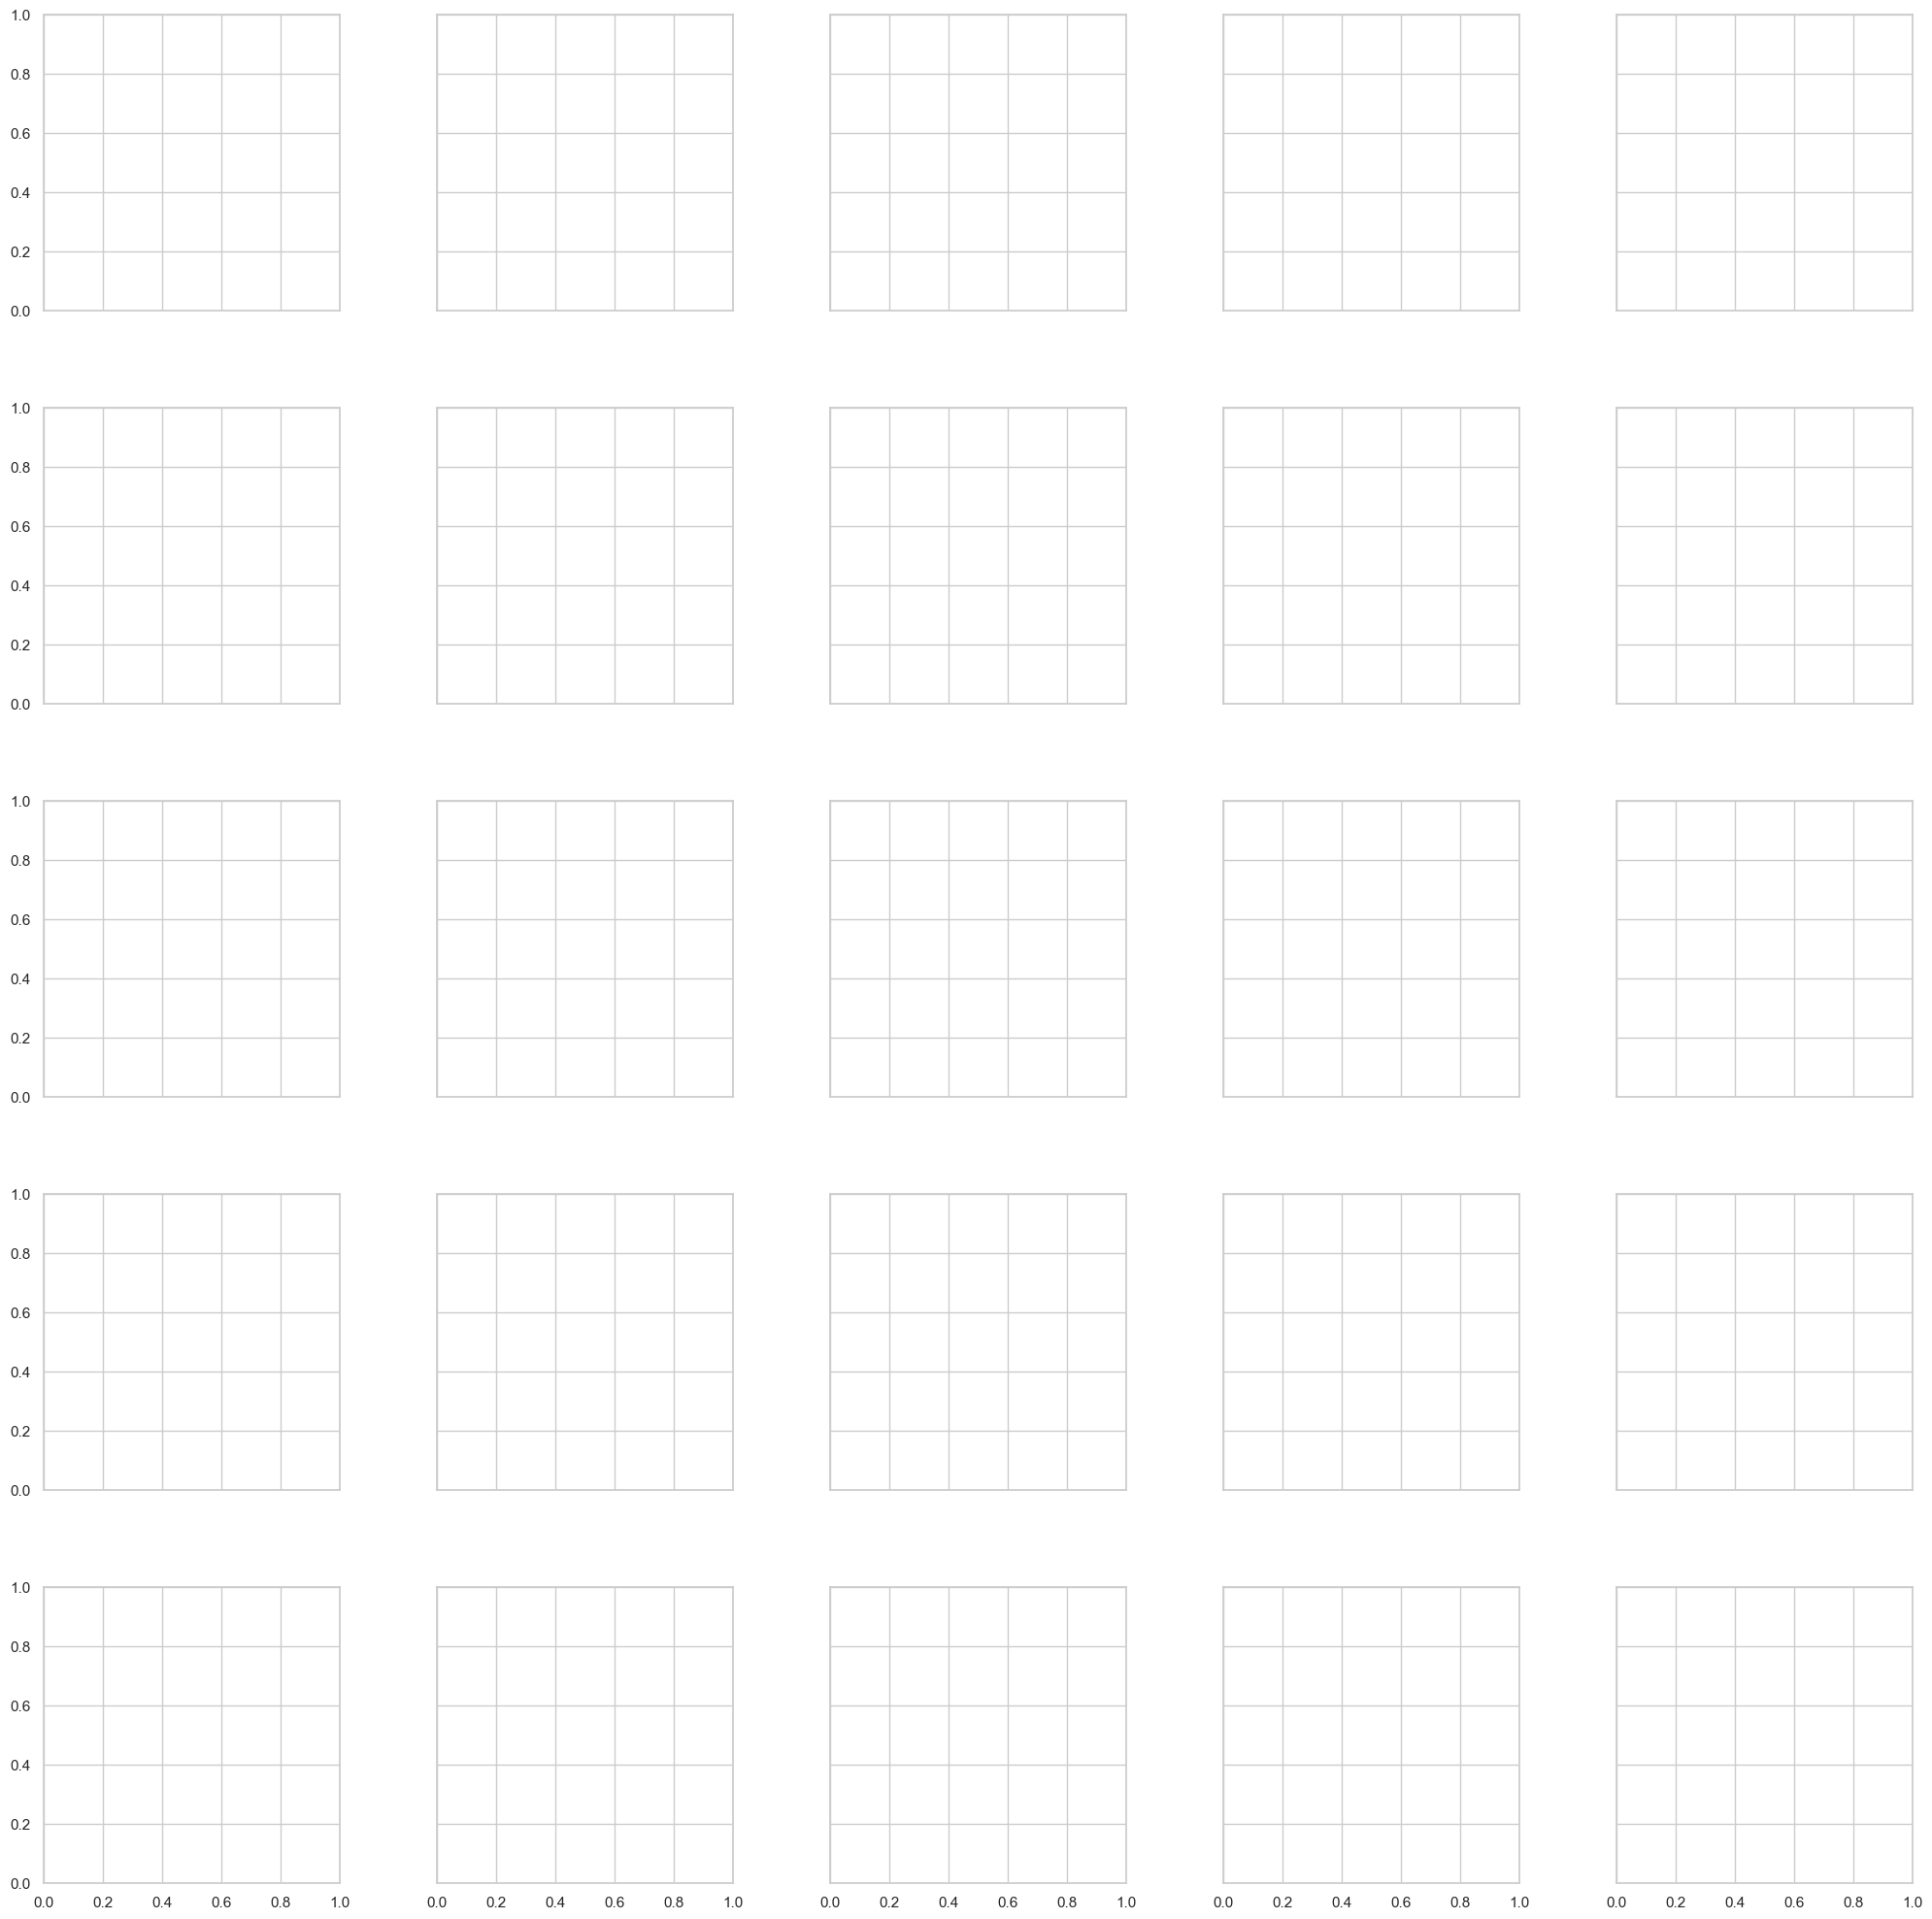

Rank 64 Checkpoint 1000


KeyboardInterrupt: 

In [29]:
for i in range(2, 9):
    for c in [500, 1000, 2000]:
        j = 2 ** i
        examples = get_examples(f'../inference/generated_images/cat/t2i/lora_checkpoint_{c}_rank_{j}')
        print(f"Rank {j} Checkpoint {c}")
        draw_examples(examples)